# Brazilian E-Commerce : Forecasting


Created by : Theta Group
- Fajar Santoso
- Muhammad Raihan Muhith
- Siti Hanifah Sadiah

# Data Download

# Libraries

In [1]:
## IMPORTING LIBRARIES

# Data Manipulation Libraries
import pandas as pd
import numpy as np
from datetime import datetime as dt
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, RobustScaler
from sklearn.compose import ColumnTransformer

# Visuals
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly
import plotly.graph_objs as go
%matplotlib inline

# Modeling
from sklearn.linear_model import LinearRegression
from pmdarima import auto_arima
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost
from sklearn.pipeline import Pipeline
from sklearn.model_selection import TimeSeriesSplit, cross_val_score

# Evaluation Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report

sns.set_style("whitegrid")

# Reading the Dataframes

In [2]:
df_order = pd.read_csv('olist_orders_dataset.csv')  # Temp path
df_order_reviews = pd.read_csv('olist_order_reviews_dataset.csv')
df_order_items = pd.read_csv('olist_order_items_dataset.csv')
df_product = pd.read_csv('olist_products_dataset.csv')
df_translation = pd.read_csv('product_category_name_translation.csv')
df_payments = pd.read_csv('olist_order_payments_dataset.csv')
df_customers = pd.read_csv('olist_customers_dataset.csv')
df_geolocation = pd.read_csv('olist_geolocation_dataset.csv')
df_olist_sellers = pd.read_csv('olist_sellers_dataset.csv')

# Problem Statement

## Olist At A Glance

Olist was founded in 2015 by Tiago Dalvi. The company is headquartered in Curitiba, Parana, Brazil. Olist is backed by Wellington Management, SoftBank, Goldman Sachs Asset Management, Redpoint eventures, Valor Capital Group, FJ Labs, Corton Capital, Globo Ventures, and others.

</br>

Olist operates a Software as a Service platform (SaaS) that connects merchants and their products to the main marketplaces of Brazil. Olist's technology enables small merchants to gain market share across the country through a SaaS licensing model to businesses of all sizes, including small to medium enterprises.

</br>

They've recently recieved Series E round funding in December 15, 2021.

</br>

The following is an overview of the Olist business model.

### Olist's Company Statements

**Disclaimer:
Most of these information were obtained through Olist website which is only available in Portuguese. The translation is provided by Google web translation.**

<br/>

**Olist Slogan:**
* Tech DNA with retail heart.
* We create the future of e-commerce.

**Olist Vision :**
The sales ecosystem that turns businesses around the world into e-commerce giants

**Olist Mission :**
* Born to empower digital retail and provide **real growth opportunities** for small, medium and large businesses.
* Remove obstacles and help retailers **sell more**.
* Break down barriers and transform what is face-to-face into online, **accelerating results** for all entrepreneurs looking for **their space on the internet**.

**Olist Strategic Objectives :**
* Olist is Practical : Easing access means **simplifying**. Less contracts, more results. That's why we created **a unique ecosystem** of integrated technology, solutions and services to make your sales operation more **efficient and profitable**.
* Olist is Experience : Our evolution is continuous. All this so that you have **the best experience** at each stage of yout journey. Your customer service has to be excellent. The technology has to be excellent. Practicality has to be excellent. Your performance has to be excellent. That's why **we deliver the best solutions to sell more and better** in an intuitive way, with **a total focus on growing your store**.
* Olist is Technological : we build **code that transforms businesses**. We are always one step ahead in the development and improvement of **solutions that demystify e-commerce** and facilitate your access to **sell anywhere** on the internet.
* Olist is neither B2B nor B2C, we are B2P : **we do everything for people!** After all, people do the trading, not the other way around. That's why **we are dedicated to the success of our customers** and their routines are our creative engine. **We are people, we develop for people, we sell for people**.

### Olist Business Model Graph

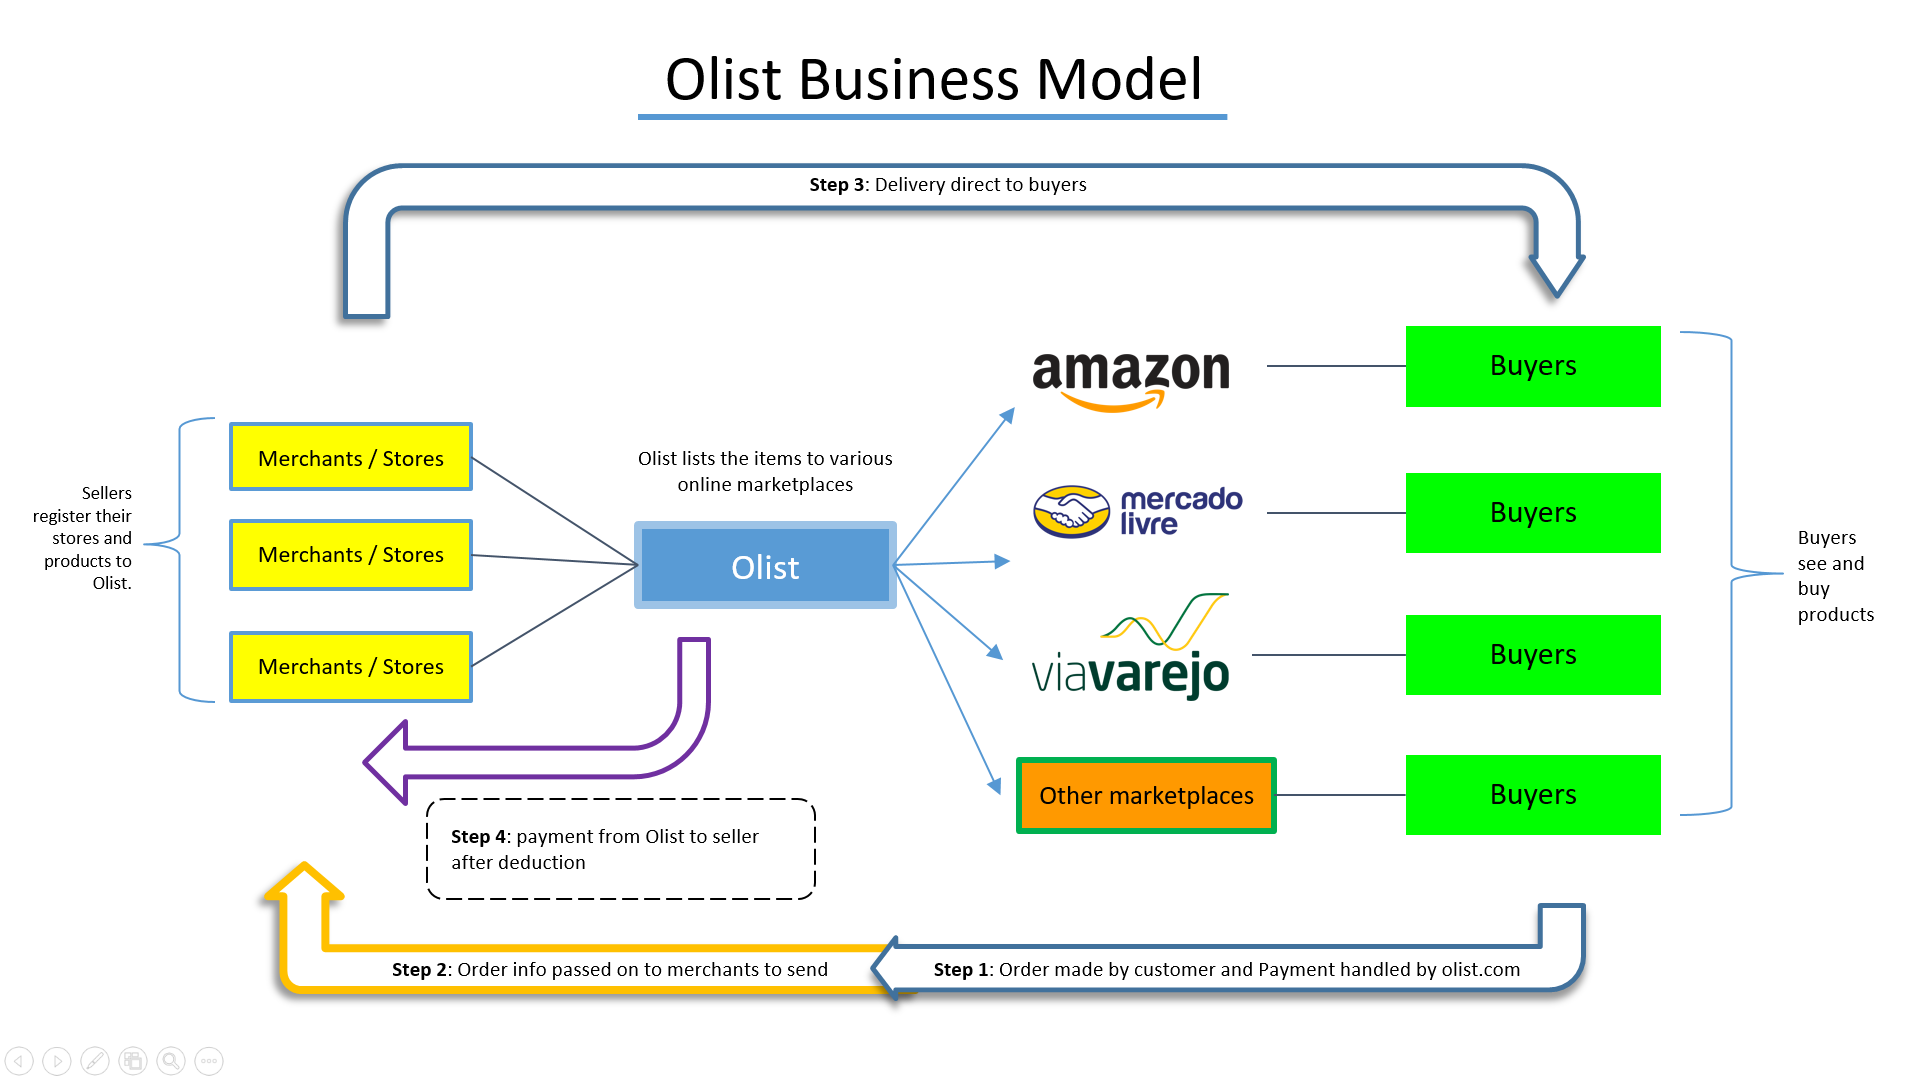

**Brief explanation of the business process:**

- Various merchants register their stores and products to Olist.
- Olist helps the merchants market their products on various e-commerce marketplaces through the Olist Store.
- The products are then bought by end-customers through the various online marketplace.
- Payment from the customer is handled by Olist and Olist informs the merchants of the order.
- Merchants then sends the orders directly to the customers based on the information provided by Olist.
- Once the transaction is concluded, Olist pays the merchants the payment they've recieved from end-customers after deducting a fee.





#### **Examples of products listed by Olist on major e-commerce.**

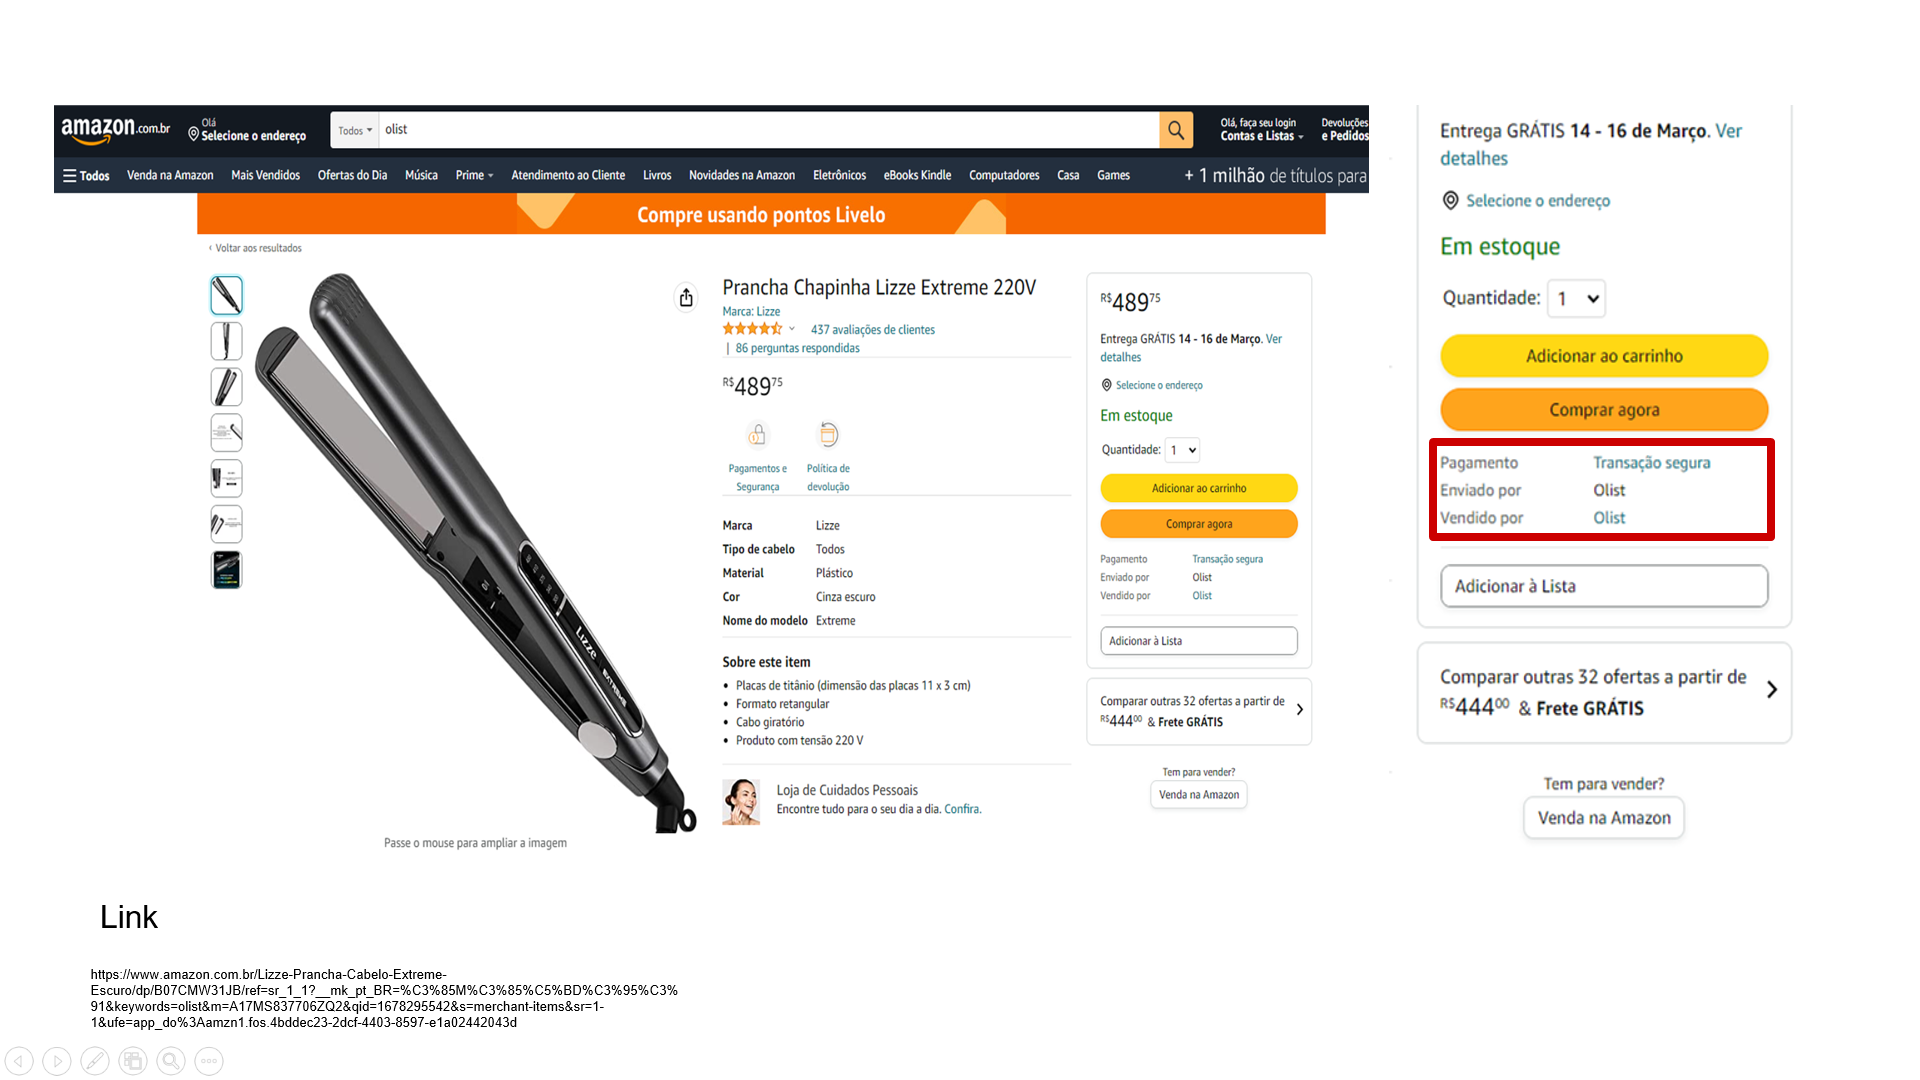

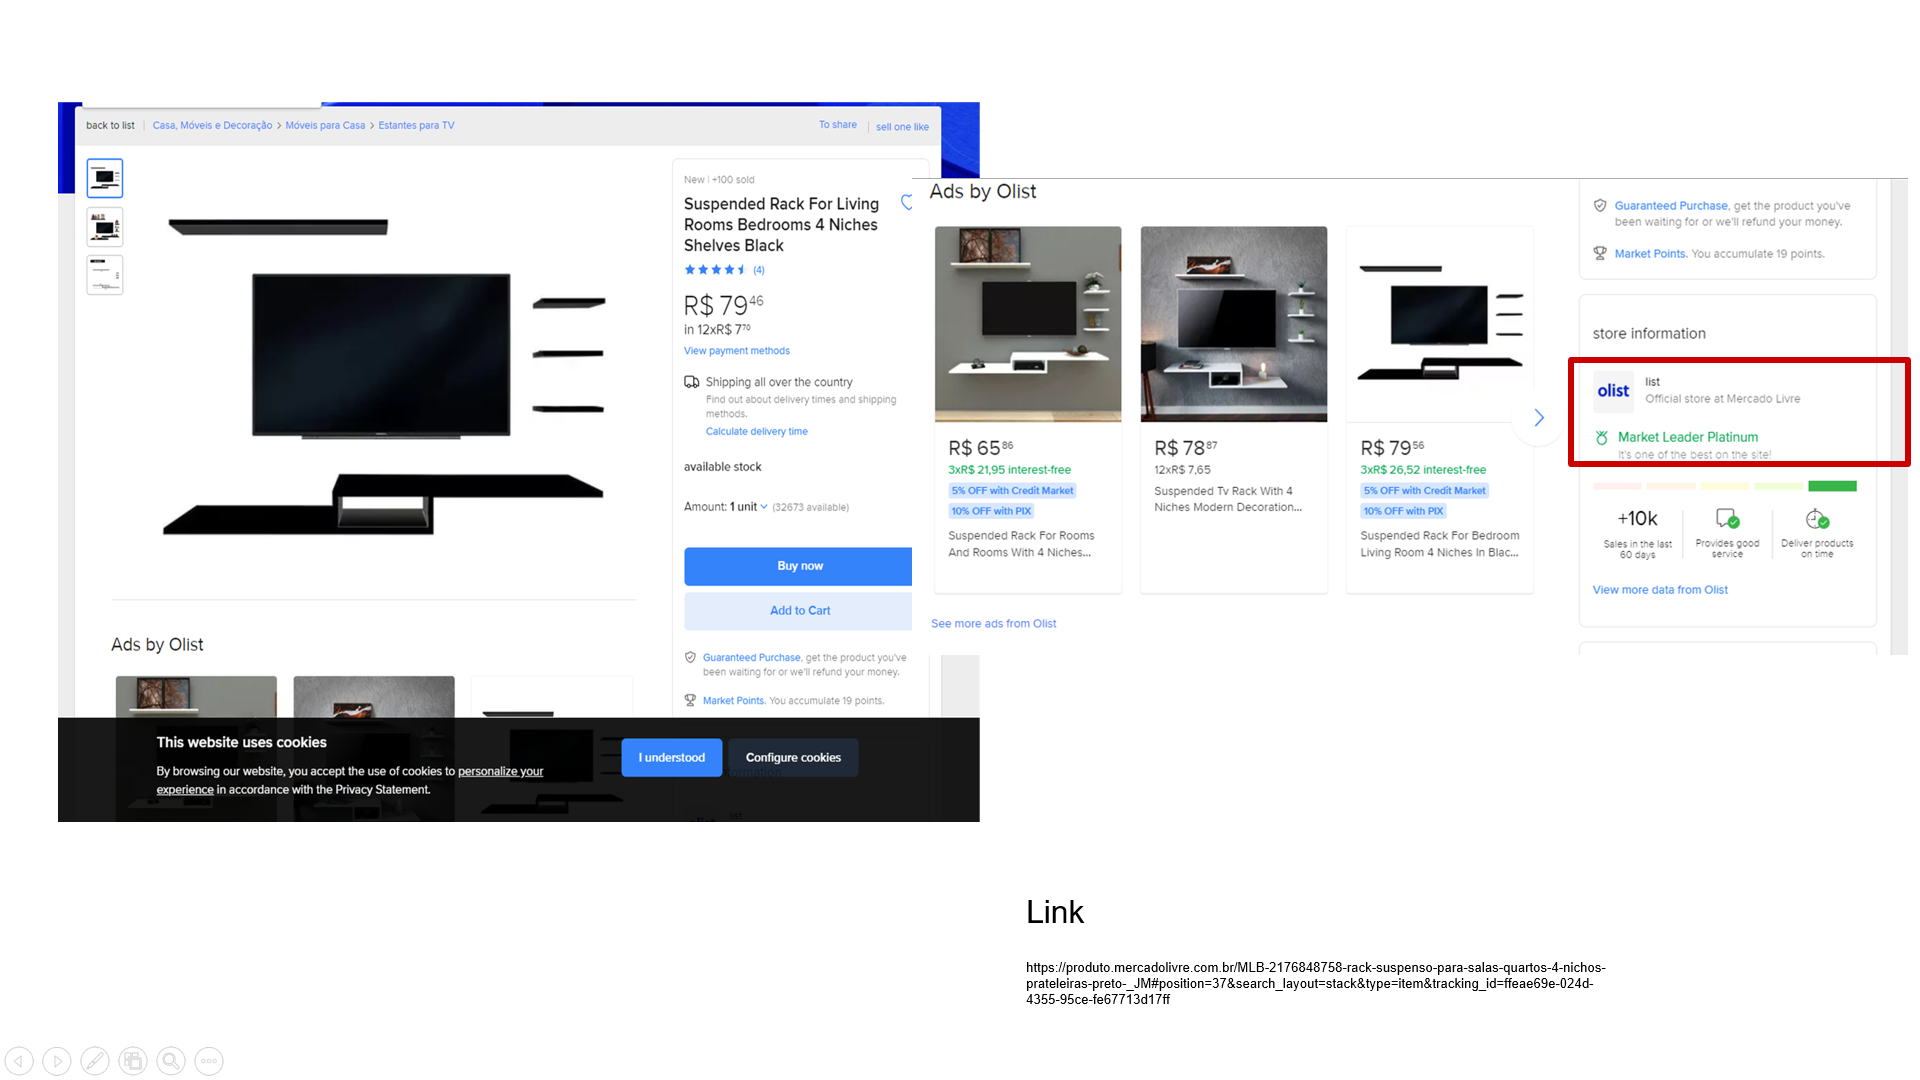

From an end-customer's perspective on Amazon, it totally makes sense to see Olist as a digital department store because it pools all sorts of stuff sold in Brazil (like electronics, toasters, mugs, furniture, candy) which are then sold on mass e-commerce marketplaces.

In Indonesia, think of Transmart that sells TVs, washing machines, clothes, food, furniture, dinner plates, detergent. Olist is practically an online version of Transmart that registers as one merchant in many online marketplaces.

## Problem Statement

Olist is a company that focuses on selling items online for merchants. They help remove the obstacles of many merchants that do not sell online by simplifying the online selling process and help them market the products of these merchants on major e-commerce marketplaces.

Olist has two types of customers, one is the buyers that purchases products listed by Olist on major marketplaces but the other, their true customers, are the businesses that they represent and help sell products online. To avoid confusion, we’ll refer to the customers that buy the products as end-customers and Olist’s main customers as merchants.

The only way for Olist to succeed is to by first having their customer’s succeed because, through the contract between the vendors and Olist, Olist charges a fee for every merchant item they’ve successfully sold. In other words, if the merchants are successful, Olist in turn is also successful.

After seeing the business model and the main focus of Olist, we’ve decided to use one of Olist’s most basic but most important aspect of any business, demand.

Demand and supply is a [fundamental](https://https://www.sumup.com/en-gb/invoices/dictionary/supply-and-demand/) concept in a market and the ability to understand demand and even know the demand in the future could help decide important decision that could directly impact both profit and efficiency for both Olist and its customers. 

Because Olist represents merchants in various online platforms and they have explicitly stated on their website that their mission is to "empower digital retail and provide real growth opportunities for small, medium, and large businesses", they can better deliver their services to their customers through the following:

* By being able to know when product demands are high, merchants could accurately decide how many products to stock. 
* Through accurate stocking, businesses could minimize risks and expenses of overstocking and understocking, such as loss caused by product expiration and loss of potential revenue caused by items out of stock.
* Being able to know the demand gives the merchants better insight on when to stock more on products which better ensures demand fulfillment and ultimately translates to optimized revenue.
* Overall, by being able to capture the demand conditions in the future and providing said information to the merchants, Olist help their merchants to grow even further. 

For Olist itself there are many benefits in being able to know the demand:

-	Olist as a business holds many positions, not only does it represent the merchants in the e-commerce marketplace, it also represents itself as a brand. Being able to know the demand means Olist has a better chance in minimizing risk of negative experiences caused by items not in stock due to low supply.
-	The increased revenue of Olist’s merchant translates directly to the increase of their revenue as well. 
-	Through providing key and useful information to their clientele, they can encourage growth of their merchants which in turn could inspire other merchants to join Olist and thus growing Olist as a business.
-	Most importantly, it creates credibility towards Olist as a brand in the eyes of all of its stakeholders because through this Olist proves that they remain true to their goal, to help businesses grow. 




### Our Approach

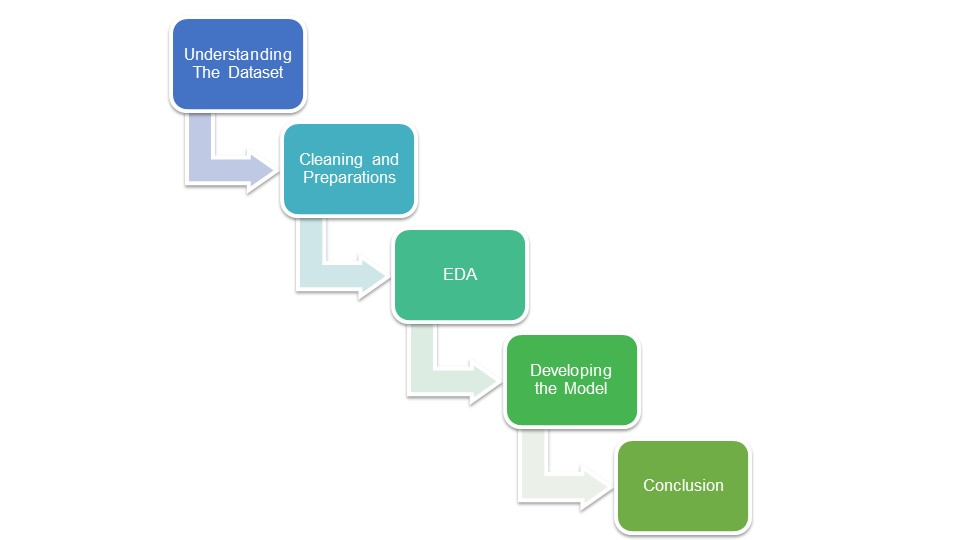

### Explanation of each stages

The following is a brief explanation of each stages of the process:

**Understanding the Dataset**

- Understanding the columns.

- Knowing which dataframes will be our focus.

- Identifying anomalies and discussing how to address them.

- Seeing available data to decide our focus.

**Cleaning and Preparations**
- Cleaning and combining the dataframes.

- Deciding on which columns are relevant and which columns are to leave out.

- Finalizing the dataframe for EDA.

**Exploratory Data Analysis**
- Exploring overall condition relevant to our objective.

- Narrowing down on a more focused scope based on our initial finding.

- EDA on the narrowed scope to understand the condition and find useful patterns. 

**Developing the Model**
- Through the insights from the EDA, we prepare the basic data needed for the model.

- Modelling.

- Model performance review.

**Conclusion** 
- Summarizing our findings through the EDA.

- Summarizing the model.

- Recommendations based on our findings. 

# Data Understanding

Data source : https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce?select=olist_products_dataset.csv

This dataset is a public dataset provided by Olist of orders that were made at Olist Store. The dataset has information of 100,000 orders ranging from 2016 to 2018 made in multiplace marketplaces in Brazil.

As stated on the Kaggle description, this is real commercial data that has been anonymised.

This dataset is divided into 8 tables and are connected as explained in the following schema.

<img src='https://i.imgur.com/HRhd2Y0.png'>

First we prepare all of the dataframes in advance to avoid confusion in the future, considering the amount.

Considering the very broad but at the same time incomplete and oftentimes cryptic dataset, our approach begins by first understanding the dataset and see which approach is both realistic and approachable, but at the same time impactful.

## Order Table

As it is mentioned in our problem statement, we intend to focus on the demand aspect which is represented by sales volume in this dataset, which makes this table not only the core of the dataset but also the core of our approach.

Each rows consists of information of buying transaction recorded by Olist. The following are the details of the variables in this table.

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
|order_id | Object |	unique identifier of the order.|
|customer_id | Object | key to the customer dataset. Each order has a unique customer_id.|
|order_status | Object |	Reference to the order status (delivered, shipped, etc).|
|order_purchase_timestamp | Object | Shows the purchase timestamp.|
|order_approved_at | Object |	Shows the payment approval timestamp.|
|order_delivered_carrier_date | Object |	Shows the order posting timestamp. When it was handled to the logistic partner.|
|order_delivered_customer_date | Object |	Shows the actual order delivery date to the customer.|
|order_estimated_delivery_date | Object |	Shows the estimated delivery date that was informed to customer at the purchase moment.|



In [3]:
df_order.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  
0           2017-10-18 00:00:00  
1           2018-08-13 00:00:00  
2           2018-09-04 00:00:00  
3           2017-12-15 00:00:00  
4           2018-02-26 00:00:00

In [4]:
df_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [5]:
# Checking for detail information for each feature

listItem = []

for col in df_order.columns:
    listItem.append([col, df_order[col].dtype, df_order[col].isna().sum(), round((df_order[col].isna().sum()/len(df_order[col]))*100, 2),
                    df_order[col].nunique(), list(df_order[col].drop_duplicates().values)]);

df_order_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
df_order_desc

dataFeatures dataType  null  nullPct  unique  \
0                       order_id   object     0     0.00   99441   
1                    customer_id   object     0     0.00   99441   
2                   order_status   object     0     0.00       8   
3       order_purchase_timestamp   object     0     0.00   98875   
4              order_approved_at   object   160     0.16   90733   
5   order_delivered_carrier_date   object  1783     1.79   81018   
6  order_delivered_customer_date   object  2965     2.98   95664   
7  order_estimated_delivery_date   object     0     0.00     459   

                                        uniqueSample  
0  [e481f51cbdc54678b7cc49136f2d6af7, 53cdb2fc8bc...  
1  [9ef432eb6251297304e76186b10a928d, b0830fb4747...  
2  [delivered, invoiced, shipped, processing, una...  
3  [2017-10-02 10:56:33, 2018-07-24 20:41:37, 201...  
4  [2017-10-02 11:07:15, 2018-07-26 03:24:27, 201...  
5  [2017-10-04 19:55:00, 2018-07-26 14:31:00, 201...  
6  [2017-10-10 21:25:13, 2018-08-07 15:27:45, 201...  
7  [2017-10-18 00:00:00, 2018-08-13 00:00:00, 201...

Based on the table above we could see that there is a total of 99,441 transactions from 2016 to 2018. 

In [6]:
# Simple Statistics Summary

print("First Order :",df_order['order_purchase_timestamp'].min())
print("Last Order  :",df_order['order_purchase_timestamp'].max())
print("Most Order Status :",df_order['order_status'].mode()[0])

First Order : 2016-09-04 21:15:19
Last Order  : 2018-10-17 17:30:18
Most Order Status : delivered


In [7]:
from datetime import date

start_date = date(2016, 9, 4)
end_date = date(2018, 10, 17)

num_days = (end_date - start_date).days
num_days

773

From the information above, we could see the boundaries of our dataset. 

In total we have 773 days worth of order data that we could work with.

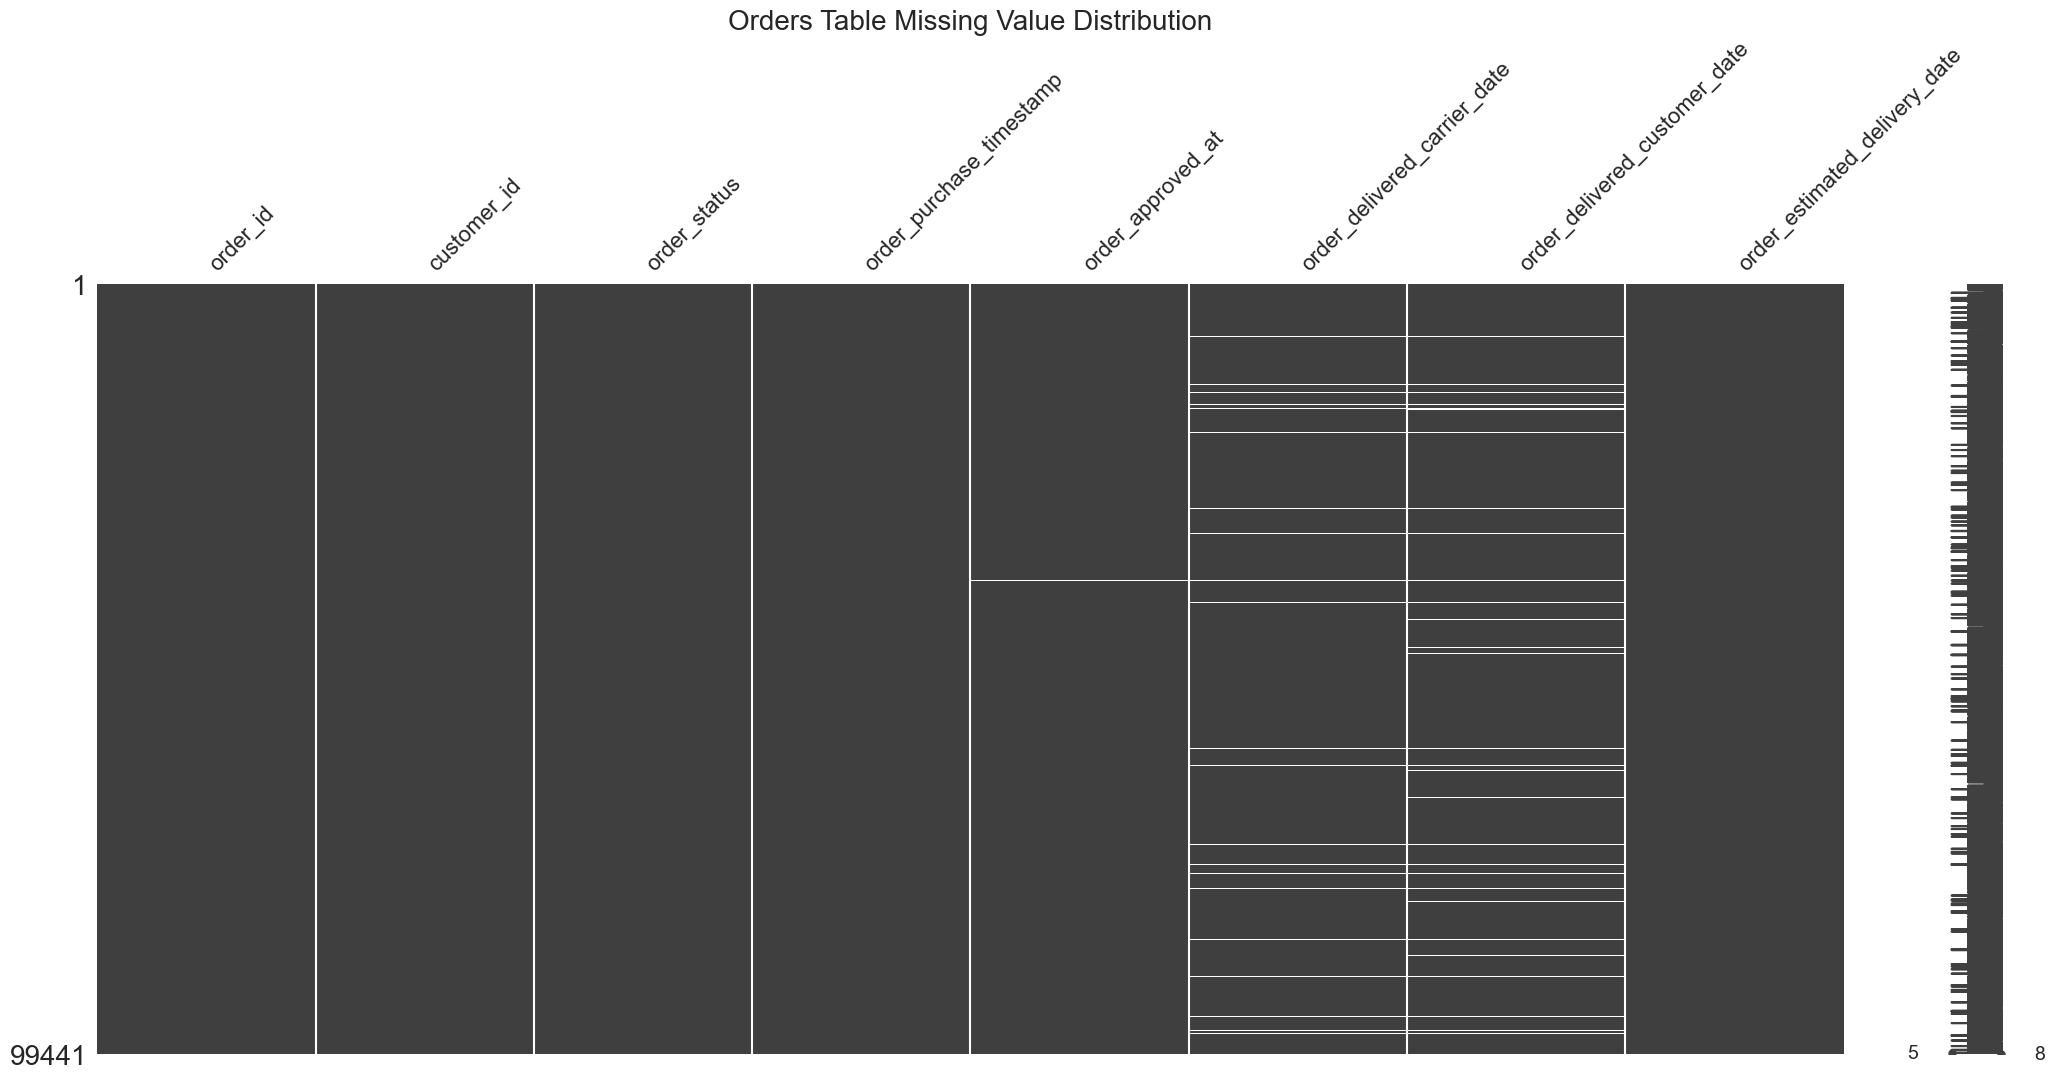

In [8]:
# Visualize missing value

msno.matrix(df_order)
plt.title('Orders Table Missing Value Distribution',fontdict={'fontsize':20})
plt.show()

From the MSNO visualization above we could see there are some missing values in:
  - order_approved_at
  - order_delivered_carrier_date
  - order_delivered_customer_date

Considering the white lines show a distinct pattern and are under columns relevant to one another, there's a relation between the missing values (e.g: missing values in `order_approved_at` will also cause missing values in `order_delivered_carrier_date` and `order_delivered_customer_date`).

A demonstration of this intercolumn null value relationship could be seen below.

In [9]:
# Example of the null value relationship between one column to another

df_order[(df_order['order_delivered_carrier_date'].isnull()) & (df_order['order_status']=='unavailable')].head()

order_id                       customer_id  \
266   8e24261a7e58791d10cb1bf9da94df5c  64a254d30eed42cd0e6c36dddb88adf0   
586   c272bcd21c287498b4883c7512019702  9582c5bbecc65eb568e2c1d839b5cba1   
687   37553832a3a89c9b2db59701c357ca67  7607cd563696c27ede287e515812d528   
737   d57e15fb07fd180f06ab3926b39edcd2  470b93b3f1cde85550fc74cd3a476c78   
1160  2f634e2cebf8c0283e7ef0989f77d217  7353b0fb8e8d9675e3a704c60ca44ebe   

     order_status order_purchase_timestamp    order_approved_at  \
266   unavailable      2017-11-16 15:09:28  2017-11-16 15:26:57   
586   unavailable      2018-01-31 11:31:37  2018-01-31 14:23:50   
687   unavailable      2017-08-14 17:38:02  2017-08-17 00:15:18   
737   unavailable      2018-01-08 19:39:03  2018-01-09 07:26:08   
1160  unavailable      2017-09-27 20:55:33  2017-09-28 01:32:50   

     order_delivered_carrier_date order_delivered_customer_date  \
266                           NaN                           NaN   
586                           NaN                           NaN   
687                           NaN                           NaN   
737                           NaN                           NaN   
1160                          NaN                           NaN   

     order_estimated_delivery_date  
266            2017-12-05 00:00:00  
586            2018-02-16 00:00:00  
687            2017-09-05 00:00:00  
737            2018-02-06 00:00:00  
1160           2017-10-27 00:00:00

We then will try to understand the nature of these missing values by checking for anomalies.

In [10]:
# Identify Missing Value at order_approved_at variable

df_order[df_order['order_approved_at'].isnull()]['order_status'].value_counts()

canceled     141
delivered     14
created        5
Name: order_status, dtype: int64

If we take a look at the amount of null values of `order_approved_at` paired with `order_status` we can conclude:
  - It makes sense for canceled and created status to have null values because the order process was never concluded.
  - It doesn't make sense for an order to be delivered but not have an approved date, so null values with **delivered** status are considered anomalies. 

  
Next we will check for anomalies in `order_delivered_carrier_date`.

In [11]:
# Identify Missing Value in order_delivered_carrier_date variable

df_order[df_order['order_delivered_carrier_date'].isnull()]['order_status'].value_counts()

unavailable    609
canceled       550
invoiced       314
processing     301
created          5
approved         2
delivered        2
Name: order_status, dtype: int64

Missing values in `order_delivered_carrier_date` with the following status:

| **Status** | **Description** |
| --- | --- | 
| unavailable |  No item to order |
canceled | Either party cancels
created | Order is created
invoiced  | Invoice has been sent
approved | Order passed approval
processing | Order being processed
shipped | Order is in delivery process but not yet delivered


is reasonable because the orders are either never concluded or is still in the process of delivery therefore couldn't be labeled as delivered, which in turn makes null values with delivered status an anomaly.


In [12]:
# Identify Missing Value at order_delivered_customer_date variable

df_order[df_order['order_delivered_customer_date'].isnull()]['order_status'].value_counts()

shipped        1107
canceled        619
unavailable     609
invoiced        314
processing      301
delivered         8
created           5
approved          2
Name: order_status, dtype: int64

Since `order_delivered_customer_date` is the actual delivery date to the customer, in other words when the customer actually recieves the order, all missing values with order status other than delivered makes sense. 

With that said, the 8 `order_delivered_customer_date` null values with the delivered status are anomalies.

In [13]:
# Taking a peek at the 8 anomalies

df_order[(df_order['order_delivered_customer_date'].isnull()) & (df_order['order_status']=='delivered')]

order_id                       customer_id  \
3002   2d1e2d5bf4dc7227b3bfebb81328c15f  ec05a6d8558c6455f0cbbd8a420ad34f   
20618  f5dd62b788049ad9fc0526e3ad11a097  5e89028e024b381dc84a13a3570decb4   
43834  2ebdfc4f15f23b91474edf87475f108e  29f0540231702fda0cfdee0a310f11aa   
79263  e69f75a717d64fc5ecdfae42b2e8e086  cfda40ca8dd0a5d486a9635b611b398a   
82868  0d3268bad9b086af767785e3f0fc0133  4f1d63d35fb7c8999853b2699f5c7649   
92643  2d858f451373b04fb5c984a1cc2defaf  e08caf668d499a6d643dafd7c5cc498a   
97647  ab7c89dc1bf4a1ead9d6ec1ec8968a84  dd1b84a7286eb4524d52af4256c0ba24   
98038  20edc82cf5400ce95e1afacc25798b31  28c37425f1127d887d7337f284080a0f   

      order_status order_purchase_timestamp    order_approved_at  \
3002     delivered      2017-11-28 17:44:07  2017-11-28 17:56:40   
20618    delivered      2018-06-20 06:58:43  2018-06-20 07:19:05   
43834    delivered      2018-07-01 17:05:11  2018-07-01 17:15:12   
79263    delivered      2018-07-01 22:05:55  2018-07-01 22:15:14   
82868    delivered      2018-07-01 21:14:02  2018-07-01 21:29:54   
92643    delivered      2017-05-25 23:22:43  2017-05-25 23:30:16   
97647    delivered      2018-06-08 12:09:39  2018-06-08 12:36:39   
98038    delivered      2018-06-27 16:09:12  2018-06-27 16:29:30   

      order_delivered_carrier_date order_delivered_customer_date  \
3002           2017-11-30 18:12:23                           NaN   
20618          2018-06-25 08:05:00                           NaN   
43834          2018-07-03 13:57:00                           NaN   
79263          2018-07-03 13:57:00                           NaN   
82868          2018-07-03 09:28:00                           NaN   
92643                          NaN                           NaN   
97647          2018-06-12 14:10:00                           NaN   
98038          2018-07-03 19:26:00                           NaN   

      order_estimated_delivery_date  
3002            2017-12-18 00:00:00  
20618           2018-07-16 00:00:00  
43834           2018-07-30 00:00:00  
79263           2018-07-30 00:00:00  
82868           2018-07-24 00:00:00  
92643           2017-06-23 00:00:00  
97647           2018-06-26 00:00:00  
98038           2018-07-19 00:00:00

On the table above we could see the orders that has the delivered status but no delivered date.

We can also see one very peculiar anomaly where there is null value in both `order_delivered_carrier_date` and `order_delivered_customer_date`. It could be delivered without the logistic partner services, it could be a system error, but surely it will be handled. 

## Product Table

This table covers the data of products that Olist sells.

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| product_id | Object | Unique product identifier. |
| product_category_name |	Object | Root category of product, in Portuguese. |
| product_name_lenght |	Float64 | number of Characters extracted from the product name. |
| product_description_lenght |	Float64 | Number of characters extracted from the product description. |
| product_photos_qty |	Float64 | Number of product published photos |
| product_weight_g |	Float64 | Product weight measured in grams. |
| product_length_cm |	Float64 | Product length measured in centimeters. |
| product_height_cm |	Float64 | Product height measured in centimeters. |
| product_width_cm |	Float64 | Product width measured in centimeters. |

In [14]:
df_product.head()

product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   
3                 27.0                       261.0                 1.0   
4                 37.0                       402.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  
0             225.0               16.0               10.0              14.0  
1            1000.0               30.0               18.0              20.0  
2             154.0               18.0                9.0              15.0  
3             371.0               26.0                4.0              26.0  
4             625.0               20.0               17.0              13.0

In [15]:
# Table Information

df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [16]:
# Variable Information

listItem = []

for col in df_product.columns:
    listItem.append([col, df_product[col].dtype, df_product[col].isna().sum(), round((df_product[col].isna().sum()/len(df_product[col]))*100, 2),
                    df_product[col].nunique(), list(df_product[col].drop_duplicates().values)]);

df_products_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'number of unique', 'uniqueSample'],
                     data=listItem)
df_products_desc

dataFeatures dataType  null  nullPct  number of unique  \
0                  product_id   object     0     0.00             32951   
1       product_category_name   object   610     1.85                73   
2         product_name_lenght  float64   610     1.85                66   
3  product_description_lenght  float64   610     1.85              2960   
4          product_photos_qty  float64   610     1.85                19   
5            product_weight_g  float64     2     0.01              2204   
6           product_length_cm  float64     2     0.01                99   
7           product_height_cm  float64     2     0.01               102   
8            product_width_cm  float64     2     0.01                95   

                                        uniqueSample  
0  [1e9e8ef04dbcff4541ed26657ea517e5, 3aa071139cb...  
1  [perfumaria, artes, esporte_lazer, bebes, util...  
2  [40.0, 44.0, 46.0, 27.0, 37.0, 60.0, 56.0, 57....  
3  [287.0, 276.0, 250.0, 261.0, 402.0, 745.0, 127...  
4  [1.0, 4.0, 2.0, 3.0, 5.0, 9.0, 6.0, nan, 7.0, ...  
5  [225.0, 1000.0, 154.0, 371.0, 625.0, 200.0, 18...  
6  [16.0, 30.0, 18.0, 26.0, 20.0, 38.0, 70.0, 40....  
7  [10.0, 18.0, 9.0, 4.0, 17.0, 5.0, 24.0, 8.0, 1...  
8  [14.0, 20.0, 15.0, 26.0, 13.0, 11.0, 44.0, 40....

From the product description we can see there are some columns that are relevant to our focus such as `product_id`, `product_category_name` and some that aren't too relevant for us such as the product name and descripton length, photo quantity, and product dimension.

In [17]:
# Simple Statistics Summary

display(df_product.describe())

product_name_lenght  product_description_lenght  product_photos_qty  \
count         32341.000000                32341.000000        32341.000000   
mean             48.476949                  771.495285            2.188986   
std              10.245741                  635.115225            1.736766   
min               5.000000                    4.000000            1.000000   
25%              42.000000                  339.000000            1.000000   
50%              51.000000                  595.000000            1.000000   
75%              57.000000                  972.000000            3.000000   
max              76.000000                 3992.000000           20.000000   

       product_weight_g  product_length_cm  product_height_cm  \
count      32949.000000       32949.000000       32949.000000   
mean        2276.472488          30.815078          16.937661   
std         4282.038731          16.914458          13.637554   
min            0.000000           7.000000           2.000000   
25%          300.000000          18.000000           8.000000   
50%          700.000000          25.000000          13.000000   
75%         1900.000000          38.000000          21.000000   
max        40425.000000         105.000000         105.000000   

       product_width_cm  
count      32949.000000  
mean          23.196728  
std           12.079047  
min            6.000000  
25%           15.000000  
50%           20.000000  
75%           30.000000  
max          118.000000

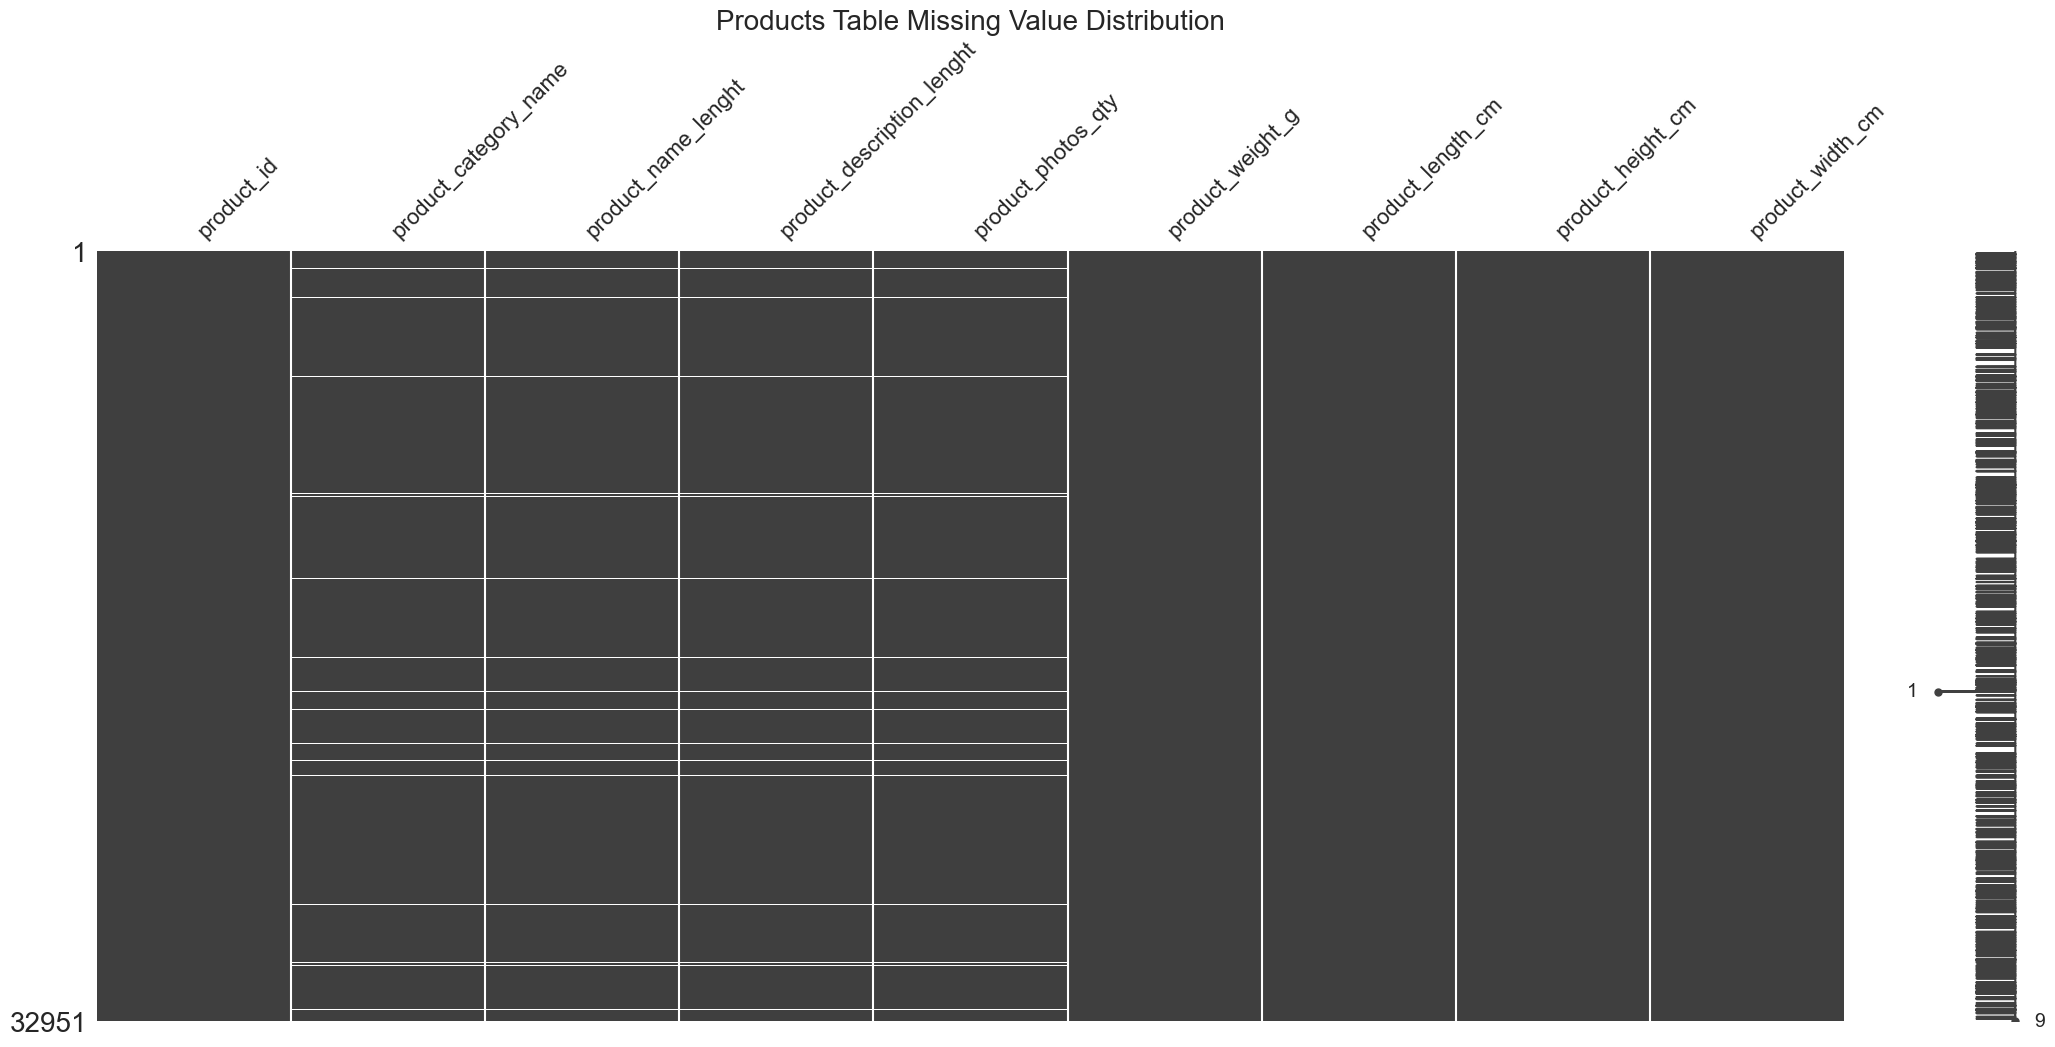

In [18]:
# Visualize Missing Values

msno.matrix(df_product)
plt.title('Products Table Missing Value Distribution',fontdict={'fontsize':20})
plt.show()

From the MSNO visualization there appears to be a clear relation between the missing values and the columns. It seems these null values are, for what ever reason, products without product descriptions but are with size descriptions.

In [19]:
# Simple Statistics Summary for Categorical Variable

display(df_product.describe(include=object))

product_id product_category_name
count                              32951                 32341
unique                             32951                    73
top     1e9e8ef04dbcff4541ed26657ea517e5       cama_mesa_banho
freq                                   1                  3029

In [20]:
# Count of Missing Value Each Column

df_product.isnull().sum()


product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

From the table above we can see the amount of unique items sold in Olist.

At a glance there appears to be an anomaly in `product_category_name` due to the uneven amount with `product_id`, and through further investigation there is a total of 610 products without names, description, or photos -or at least not registered.


In [21]:
df_product["product_category_name"].isnull().sum() / len (df_product)* 100

1.8512336499650999

For the record, the products with missing category names makes up only 1.85% of the total product category amount.

In [22]:
# Identify Missing Value at product_category_name Variable

df_product[df_product['product_category_name'].isnull()].head()

product_id product_category_name  \
105  a41e356c76fab66334f36de622ecbd3a                   NaN   
128  d8dee61c2034d6d075997acef1870e9b                   NaN   
145  56139431d72cd51f19eb9f7dae4d1617                   NaN   
154  46b48281eb6d663ced748f324108c733                   NaN   
197  5fb61f482620cb672f5e586bb132eae9                   NaN   

     product_name_lenght  product_description_lenght  product_photos_qty  \
105                  NaN                         NaN                 NaN   
128                  NaN                         NaN                 NaN   
145                  NaN                         NaN                 NaN   
154                  NaN                         NaN                 NaN   
197                  NaN                         NaN                 NaN   

     product_weight_g  product_length_cm  product_height_cm  product_width_cm  
105             650.0               17.0               14.0              12.0  
128             300.0               16.0                7.0              20.0  
145             200.0               20.0               20.0              20.0  
154           18500.0               41.0               30.0              41.0  
197             300.0               35.0                7.0              12.0

Above is an example of the products with missing values.

In [23]:
# Identify Missing Value at product_weight_g Variable

df_product[df_product['product_weight_g'].isnull()]

product_id product_category_name  \
8578   09ff539a621711667c43eba6a3bd8466                 bebes   
18851  5eb564652db742ff8f28759cd8d2652a                   NaN   

       product_name_lenght  product_description_lenght  product_photos_qty  \
8578                  60.0                       865.0                 3.0   
18851                  NaN                         NaN                 NaN   

       product_weight_g  product_length_cm  product_height_cm  \
8578                NaN                NaN                NaN   
18851               NaN                NaN                NaN   

       product_width_cm  
8578                NaN  
18851               NaN

There is also 1 missing value anomaly in product_weight_g value with the product name bebes or baby. 

## Payments Table

This dataset includes data about the orders payment options. The description of each variables are as of the following:

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
|order_id | Object |	unique identifier of an order.|
|payment_sequential | Int64 |	a customer may pay an order with more than one payment method. If he does so, a sequence will be created to|
|payment_type | Object |	method of payment chosen by the customer.|
|payment_installments | Int64 |	number of installments chosen by the customer.|
|payment_value | Float64 |	transaction value.|

In [24]:
df_payments.head()

order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  
2                     1          65.71  
3                     8         107.78  
4                     2         128.45

In [25]:
# Table Information

df_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [26]:
# Variable Information

listItem = []

for col in df_payments.columns:
    listItem.append([col, df_payments[col].dtype, df_payments[col].isna().sum(), round((df_payments[col].isna().sum()/len(df_payments[col]))*100, 2),
                    df_payments[col].nunique(), list(df_payments[col].drop_duplicates().values)]);

df_payments_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'number of unique', 'uniqueSample'],
                     data=listItem)
df_payments_desc

dataFeatures dataType  null  nullPct  number of unique  \
0              order_id   object     0      0.0             99440   
1    payment_sequential    int64     0      0.0                29   
2          payment_type   object     0      0.0                 5   
3  payment_installments    int64     0      0.0                24   
4         payment_value  float64     0      0.0             29077   

                                        uniqueSample  
0  [b81ef226f3fe1789b1e8b2acac839d17, a9810da8291...  
1  [1, 2, 4, 5, 3, 8, 6, 7, 10, 11, 17, 19, 27, 1...  
2  [credit_card, boleto, voucher, debit_card, not...  
3  [8, 1, 2, 3, 6, 5, 4, 10, 7, 12, 9, 13, 15, 24...  
4  [99.33, 24.39, 65.71, 107.78, 128.45, 96.12, 8...

There are no missing values identified but based on the table information and the variable information, we can see there's an amount mismatch between number of unique entries and total length of the dataset. Later we realized that there are duplicates in the order_id because of the way the payment sequential is recorded. 

First we'll try to find the scenario where the customer has a remarkable 29 payment sequence.

In [27]:
#The reason behind duplicates

df_payments[df_payments["payment_sequential"] == 29]

order_id  payment_sequential payment_type  \
39108  fa65dad1b0e818e3ccc5cb0e39231352                  29      voucher   

       payment_installments  payment_value  
39108                     1          19.26

Now we've found the order_id, we'll take a look at how the duplicates look like.

In [28]:
special_sequence = df_payments[df_payments["order_id"] == "fa65dad1b0e818e3ccc5cb0e39231352"]
special_sequence.head(5)

order_id  payment_sequential payment_type  \
4885   fa65dad1b0e818e3ccc5cb0e39231352                  27      voucher   
9985   fa65dad1b0e818e3ccc5cb0e39231352                   4      voucher   
14321  fa65dad1b0e818e3ccc5cb0e39231352                   1      voucher   
17274  fa65dad1b0e818e3ccc5cb0e39231352                   9      voucher   
19565  fa65dad1b0e818e3ccc5cb0e39231352                  10      voucher   

       payment_installments  payment_value  
4885                      1          66.02  
9985                      1          29.16  
14321                     1           3.71  
17274                     1           1.08  
19565                     1          12.86

To prove our initial assumption, we're going to compare the total value of this one single transaction in the `df_payments` dataframe to the one in `df_order_items` using the `order_id` primary key.

In [29]:
df_order_items[df_order_items["order_id"] == "fa65dad1b0e818e3ccc5cb0e39231352"]

order_id  order_item_id  \
110202  fa65dad1b0e818e3ccc5cb0e39231352              1   

                              product_id                         seller_id  \
110202  1aecdb5fa3add74e385f25c6c527a462  06532f10282704ef4c69168b914b77be   

        shipping_limit_date   price  freight_value  
110202  2017-04-27 09:10:13  392.55          65.44

In [30]:
special_order = df_order_items[df_order_items["order_id"] == "fa65dad1b0e818e3ccc5cb0e39231352"]
payment_total = special_sequence["payment_value"].sum()
order_total = special_order["price"] + special_order["freight_value"]

print (f"Total value in df_payments: {payment_total}", 
       f"\nTotal value in df_order_items: {order_total.values[0]}")

Total value in df_payments: 457.99 
Total value in df_order_items: 457.99


Simply put, the total of 457.99 is paid through 29 different methods with 29 different amounts and thus it is registered by the system in 29 different rows and making these duplicates contextual.

We'll keep it as it is for now and further process it later in this analysis.

In [31]:
# Simple Statistics Summary 

display(df_payments.describe())
print('Most payment type :',df_payments['payment_type'].mode()[0])

payment_sequential  payment_installments  payment_value
count       103886.000000         103886.000000  103886.000000
mean             1.092679              2.853349     154.100380
std              0.706584              2.687051     217.494064
min              1.000000              0.000000       0.000000
25%              1.000000              1.000000      56.790000
50%              1.000000              1.000000     100.000000
75%              1.000000              4.000000     171.837500
max             29.000000             24.000000   13664.080000

Most payment type : credit_card


<AxesSubplot: xlabel='payment_value'>

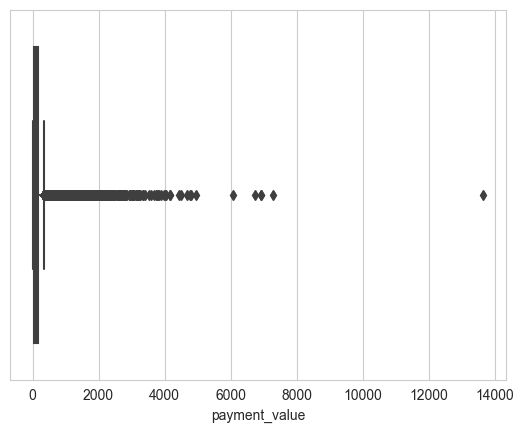

In [32]:
sns.boxplot(x=df_payments["payment_value"])

In [33]:
df_payments[df_payments["payment_value"] == 13664.080000]


order_id  payment_sequential payment_type  \
52107  03caa2c082116e1d31e67e9ae3700499                   1  credit_card   

       payment_installments  payment_value  
52107                     1       13664.08

A quick statistics summary and outlier detection shows us that the distribution of the payment_value is not evenly distributed and there are many outliers and also we've found payment values of 0 which are from voucher and not_defined payment types.

Hopefully things will become clearer once the dataframes are combined.

In [34]:
df_payments[df_payments["payment_value"]== 0]

order_id  payment_sequential payment_type  \
19922   8bcbe01d44d147f901cd3192671144db                   4      voucher   
36822   fa65dad1b0e818e3ccc5cb0e39231352                  14      voucher   
43744   6ccb433e00daae1283ccc956189c82ae                   4      voucher   
51280   4637ca194b6387e2d538dc89b124b0ee                   1  not_defined   
57411   00b1cb0320190ca0daa2c88b35206009                   1  not_defined   
62674   45ed6e85398a87c253db47c2d9f48216                   3      voucher   
77885   fa65dad1b0e818e3ccc5cb0e39231352                  13      voucher   
94427   c8c528189310eaa44a745b8d9d26908b                   1  not_defined   
100766  b23878b3e8eb4d25a158f57d96331b18                   4      voucher   

        payment_installments  payment_value  
19922                      1            0.0  
36822                      1            0.0  
43744                      1            0.0  
51280                      1            0.0  
57411                      1            0.0  
62674                      1            0.0  
77885                      1            0.0  
94427                      1            0.0  
100766                     1            0.0

## Customers Table

This dataset has information about the customer and its location. It is used to identify unique customers in the orders dataset and to find the orders delivery location.

</br>

Description from Kaggle:

_At our system each order is assigned to a unique customer_id. This means that the same customer will get different id's for different orders. The purpose of having a customer_unique_id on the dataset is to allow you to identify customers that made repurchases at the store. Otherwise you would find that each order had a different customer associated with._


| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
|customer_id | Object |	Key to the orders dataset. Each order has a unique customer_id.|
|customer_unique_id | Object | Unique identifier of a customer.|
|customer_zip_code_prefix | int64 |	First five digits of customer zip code.|
|customer_city | Object | Customer city name.|
|customer_state | Object |	Customer state.|

In [35]:
df_customers.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP

In [36]:
# Checking for detail info of each feature

listItem = []

for col in df_customers.columns:
    listItem.append([col, df_customers[col].dtype, df_customers[col].isna().sum(), round((df_customers[col].isna().sum()/len(df_customers[col]))*100, 2),
                    df_customers[col].nunique(), list(df_customers[col].drop_duplicates().values)]);

df_customers_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
df_customers_desc

dataFeatures dataType  null  nullPct  unique  \
0               customer_id   object     0      0.0   99441   
1        customer_unique_id   object     0      0.0   96096   
2  customer_zip_code_prefix    int64     0      0.0   14994   
3             customer_city   object     0      0.0    4119   
4            customer_state   object     0      0.0      27   

                                        uniqueSample  
0  [06b8999e2fba1a1fbc88172c00ba8bc7, 18955e83d33...  
1  [861eff4711a542e4b93843c6dd7febb0, 290c77bc529...  
2  [14409, 9790, 1151, 8775, 13056, 89254, 4534, ...  
3  [franca, sao bernardo do campo, sao paulo, mog...  
4  [SP, SC, MG, PR, RJ, RS, PA, GO, ES, BA, MA, M...

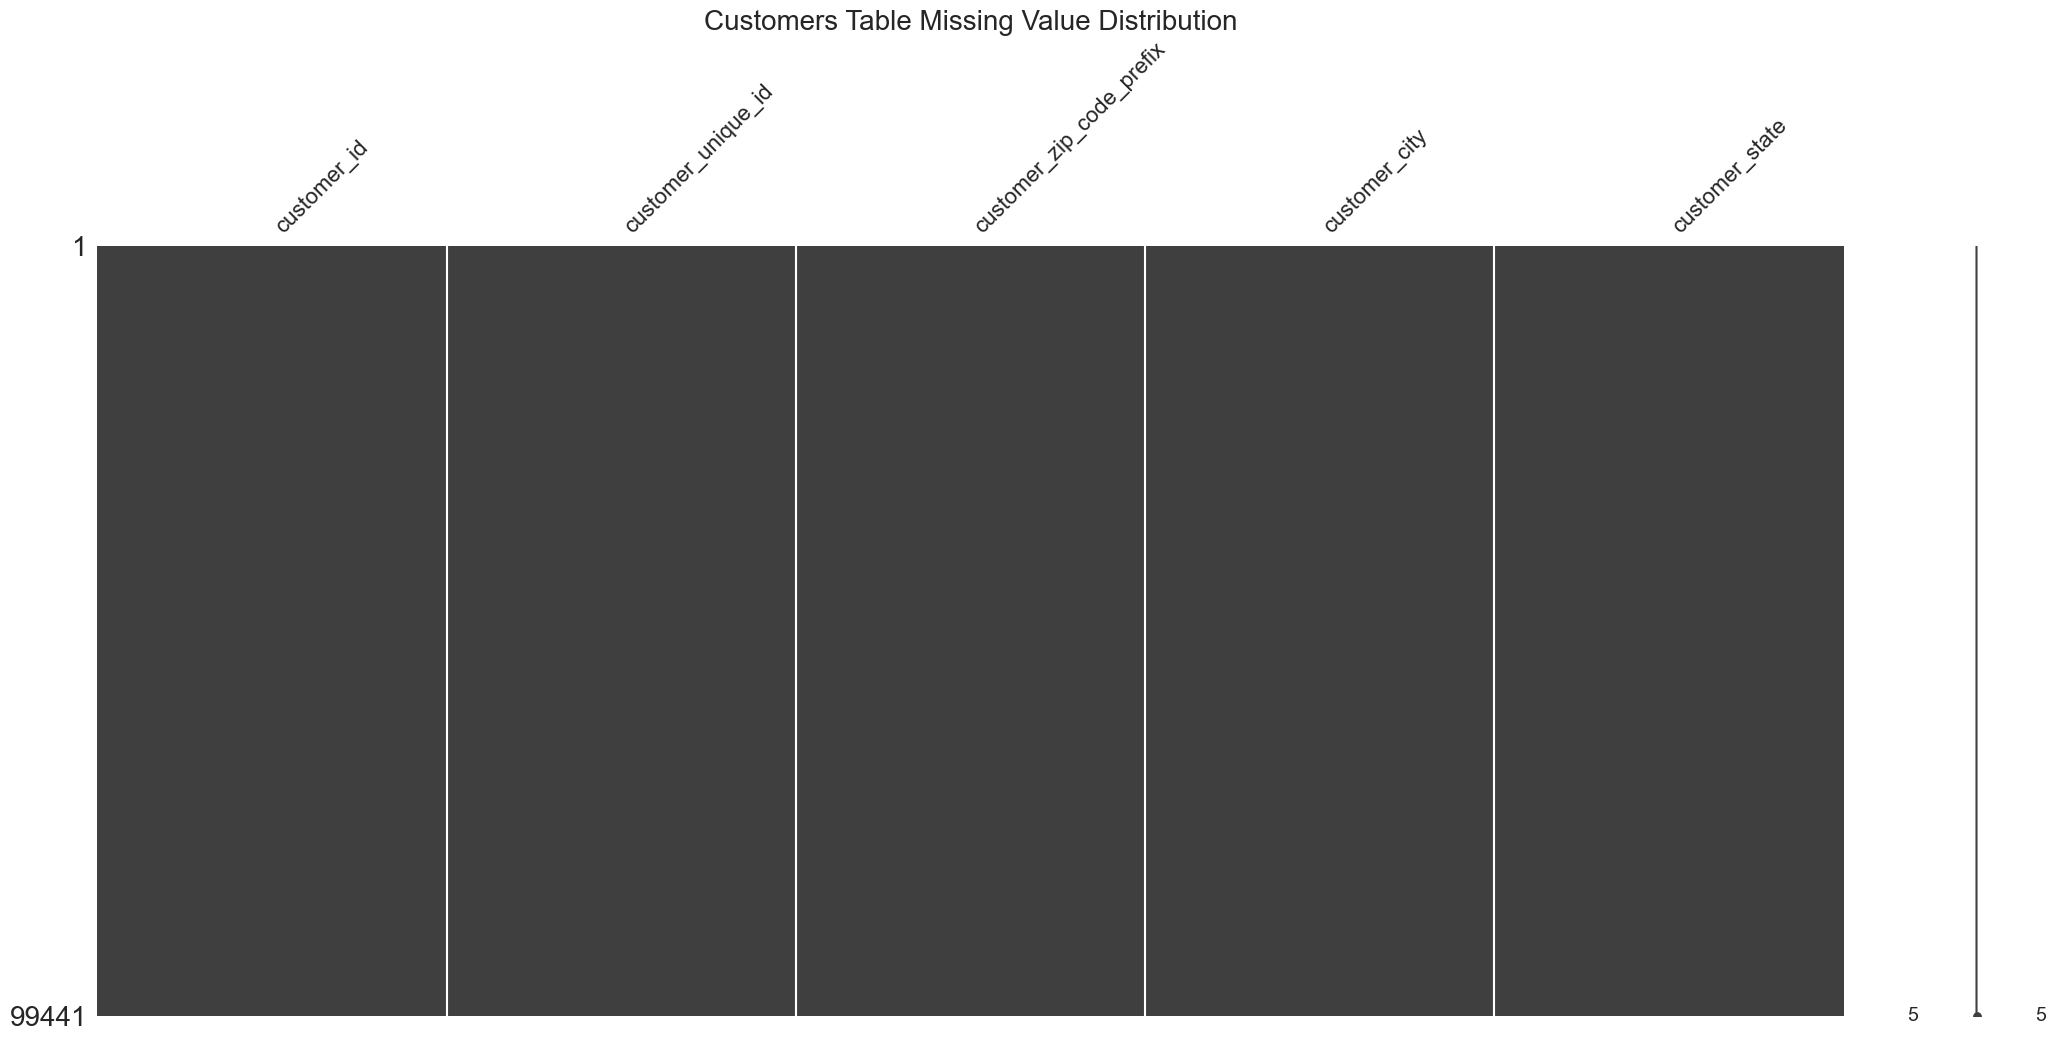

In [37]:
#Visualize missing value

msno.matrix(df_customers)
plt.title('Customers Table Missing Value Distribution',fontdict={'fontsize':20})
plt.show()

In [38]:
#Identify Number of Order Made by Each End-Customers

order_amount = df_customers.groupby(['customer_unique_id'])[['customer_id']].count().sort_values(by=['customer_id'], ascending=False).reset_index()
order_amount

customer_unique_id  customer_id
0      8d50f5eadf50201ccdcedfb9e2ac8455           17
1      3e43e6105506432c953e165fb2acf44c            9
2      6469f99c1f9dfae7733b25662e7f1782            7
3      ca77025e7201e3b30c44b472ff346268            7
4      1b6c7548a2a1f9037c1fd3ddfed95f33            7
...                                 ...          ...
96091  5657dfebff5868c4dc7e8355fea865c4            1
96092  5657596addb4d7b07b32cd330614bdf8            1
96093  5656eb169546146caeab56c3ffc3d268            1
96094  5656a8fabc8629ff96b2bc14f8c09a27            1
96095  ffffd2657e2aad2907e67c3e9daecbeb            1

[96096 rows x 2 columns]

In [39]:
#Identify Percentage of End-Customers that Repeated Order and Not

print(f"End-Customer that Repeated Order : {round((order_amount[order_amount['customer_id']>1].shape[0]/order_amount.shape[0]*100),2)}%")
print(f"End-Customer only once ordered : {round((order_amount[order_amount['customer_id']==1].shape[0]/order_amount.shape[0]*100),2)}%")

End-Customer that Repeated Order : 3.12%
End-Customer only once ordered : 96.88%


**Summary:**

1. There are 96,096 end-customers that are have been identified to purchase from Olist.
2. Only 3.12% end-customers have repeated orders through Olist.
3. There are no missing values in the Customers table.
4. End-customers come from 4,119 different cities and 27 different states. For clarification, there is a total of 26 states in Brazil with an additional federal district, which is listed down as a state in this table.

## Geolocation Table

This dataset has information Brazilian zip codes and its lat/lng coordinates. Use it to plot maps and find distances between sellers and customers.


| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
|geolocation_zip_code_prefix | int64 |	First 5 digits of zip code.|
|geolocation_lat | float64 | Latitude.|
|geolocation_lng | float64 |	Longitude.|
|geolocation_city | Object | City name.|
|geolocation_state | Object |	State.|

In [40]:
df_geolocation.head()

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037       -23.545621       -46.639292   
1                         1046       -23.546081       -46.644820   
2                         1046       -23.546129       -46.642951   
3                         1041       -23.544392       -46.639499   
4                         1035       -23.541578       -46.641607   

  geolocation_city geolocation_state  
0        sao paulo                SP  
1        sao paulo                SP  
2        sao paulo                SP  
3        sao paulo                SP  
4        sao paulo                SP

In [41]:
# Checking for detail info of each feature

listItem = []

for col in df_geolocation.columns:
    listItem.append([col, df_geolocation[col].dtype, df_geolocation[col].isna().sum(), round((df_geolocation[col].isna().sum()/len(df_geolocation[col]))*100, 2),
                    df_geolocation[col].nunique(), list(df_geolocation[col].drop_duplicates().values)]);

df_geolocation_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
df_geolocation_desc

dataFeatures dataType  null  nullPct  unique  \
0  geolocation_zip_code_prefix    int64     0      0.0   19015   
1              geolocation_lat  float64     0      0.0  717360   
2              geolocation_lng  float64     0      0.0  717613   
3             geolocation_city   object     0      0.0    8011   
4            geolocation_state   object     0      0.0      27   

                                        uniqueSample  
0  [1037, 1046, 1041, 1035, 1012, 1047, 1013, 102...  
1  [-23.54562128115268, -23.54608112703553, -23.5...  
2  [-46.63929204800168, -46.64482029837157, -46.6...  
3  [sao paulo, são paulo, sao bernardo do campo, ...  
4  [SP, RN, AC, RJ, ES, MG, BA, SE, PE, AL, PB, C...

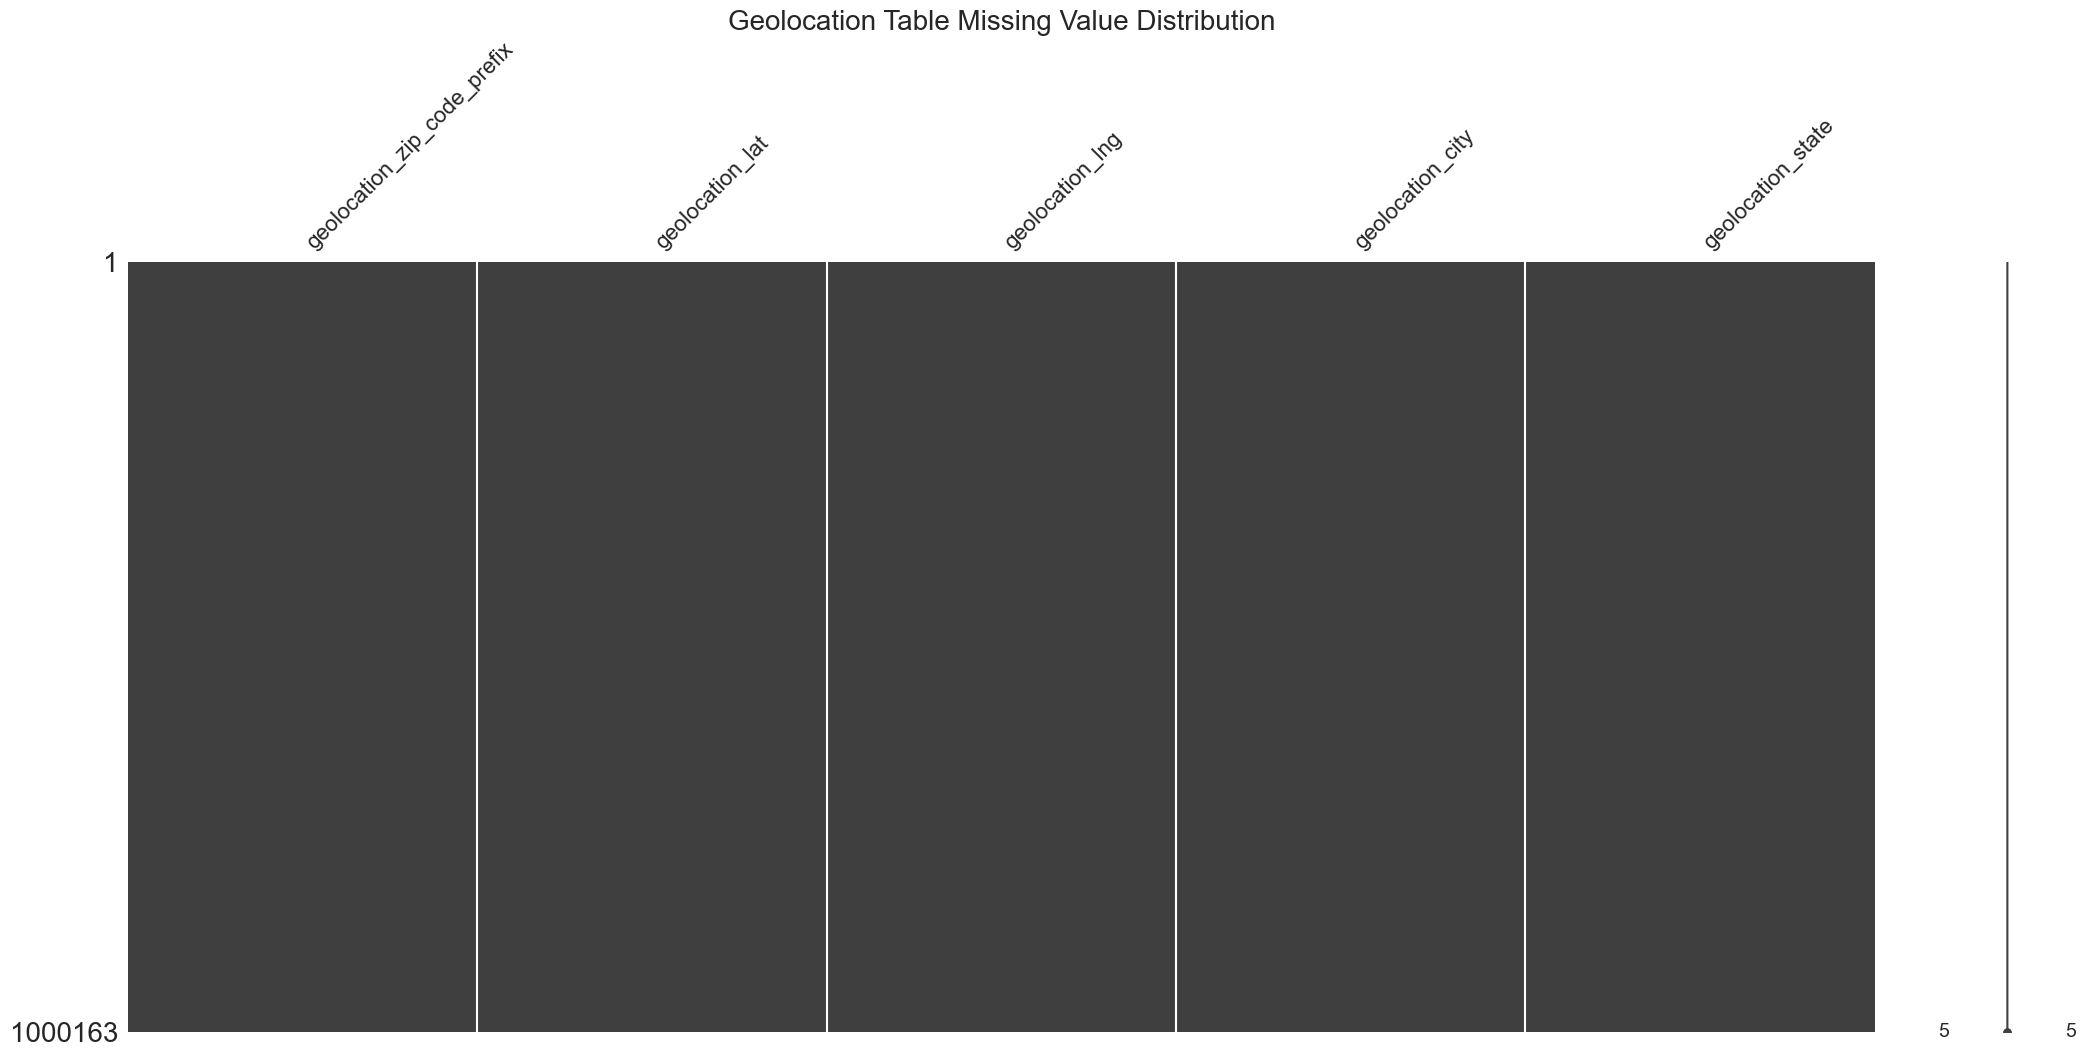

In [42]:
# Visualize missing value

msno.matrix(df_geolocation)
plt.title('Geolocation Table Missing Value Distribution',fontdict={'fontsize':20})
plt.show()

In [43]:
# Identify End-Customer City Towards Overall City in Brazil

print(f"End-Customer City Towards Overall City in Brazil : {round((df_customers['customer_city'].nunique()/df_geolocation['geolocation_city'].nunique()*100),2)}%")

End-Customer City Towards Overall City in Brazil : 51.42%


**Summary:**

1.	There are no missing values in the Geolocation table, the table is ready to use for the next project.
2.	On customers table, end-customers come from 4119 cities but there are 8011 cities in the Geolocation table, so the end-customers only comes from only some cities in brazil. 
3.	There are 27 states both in the customers and geolocation table


## Category Name Translation Table

Translates the product_category_name to english.

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
|product_category_name | object |	category name in Portuguese.|
|product_category_name_english | object | category name in English.|

In [44]:
df_translation.head()



product_category_name product_category_name_english
0            beleza_saude                 health_beauty
1  informatica_acessorios         computers_accessories
2              automotivo                          auto
3         cama_mesa_banho                bed_bath_table
4        moveis_decoracao               furniture_decor

In [45]:
listItem = []

# Data condition & detail

for col in df_translation.columns:
    listItem.append([col, df_translation[col].dtype, df_translation[col].isna().sum(), round((df_translation[col].isna().sum()/len(df_translation[col]))*100, 2),
                    df_translation[col].nunique(), list(df_translation[col].drop_duplicates().values)]);

df_translation_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
df_translation_desc

dataFeatures dataType  null  nullPct  unique  \
0          product_category_name   object     0      0.0      71   
1  product_category_name_english   object     0      0.0      71   

                                        uniqueSample  
0  [beleza_saude, informatica_acessorios, automot...  
1  [health_beauty, computers_accessories, auto, b...

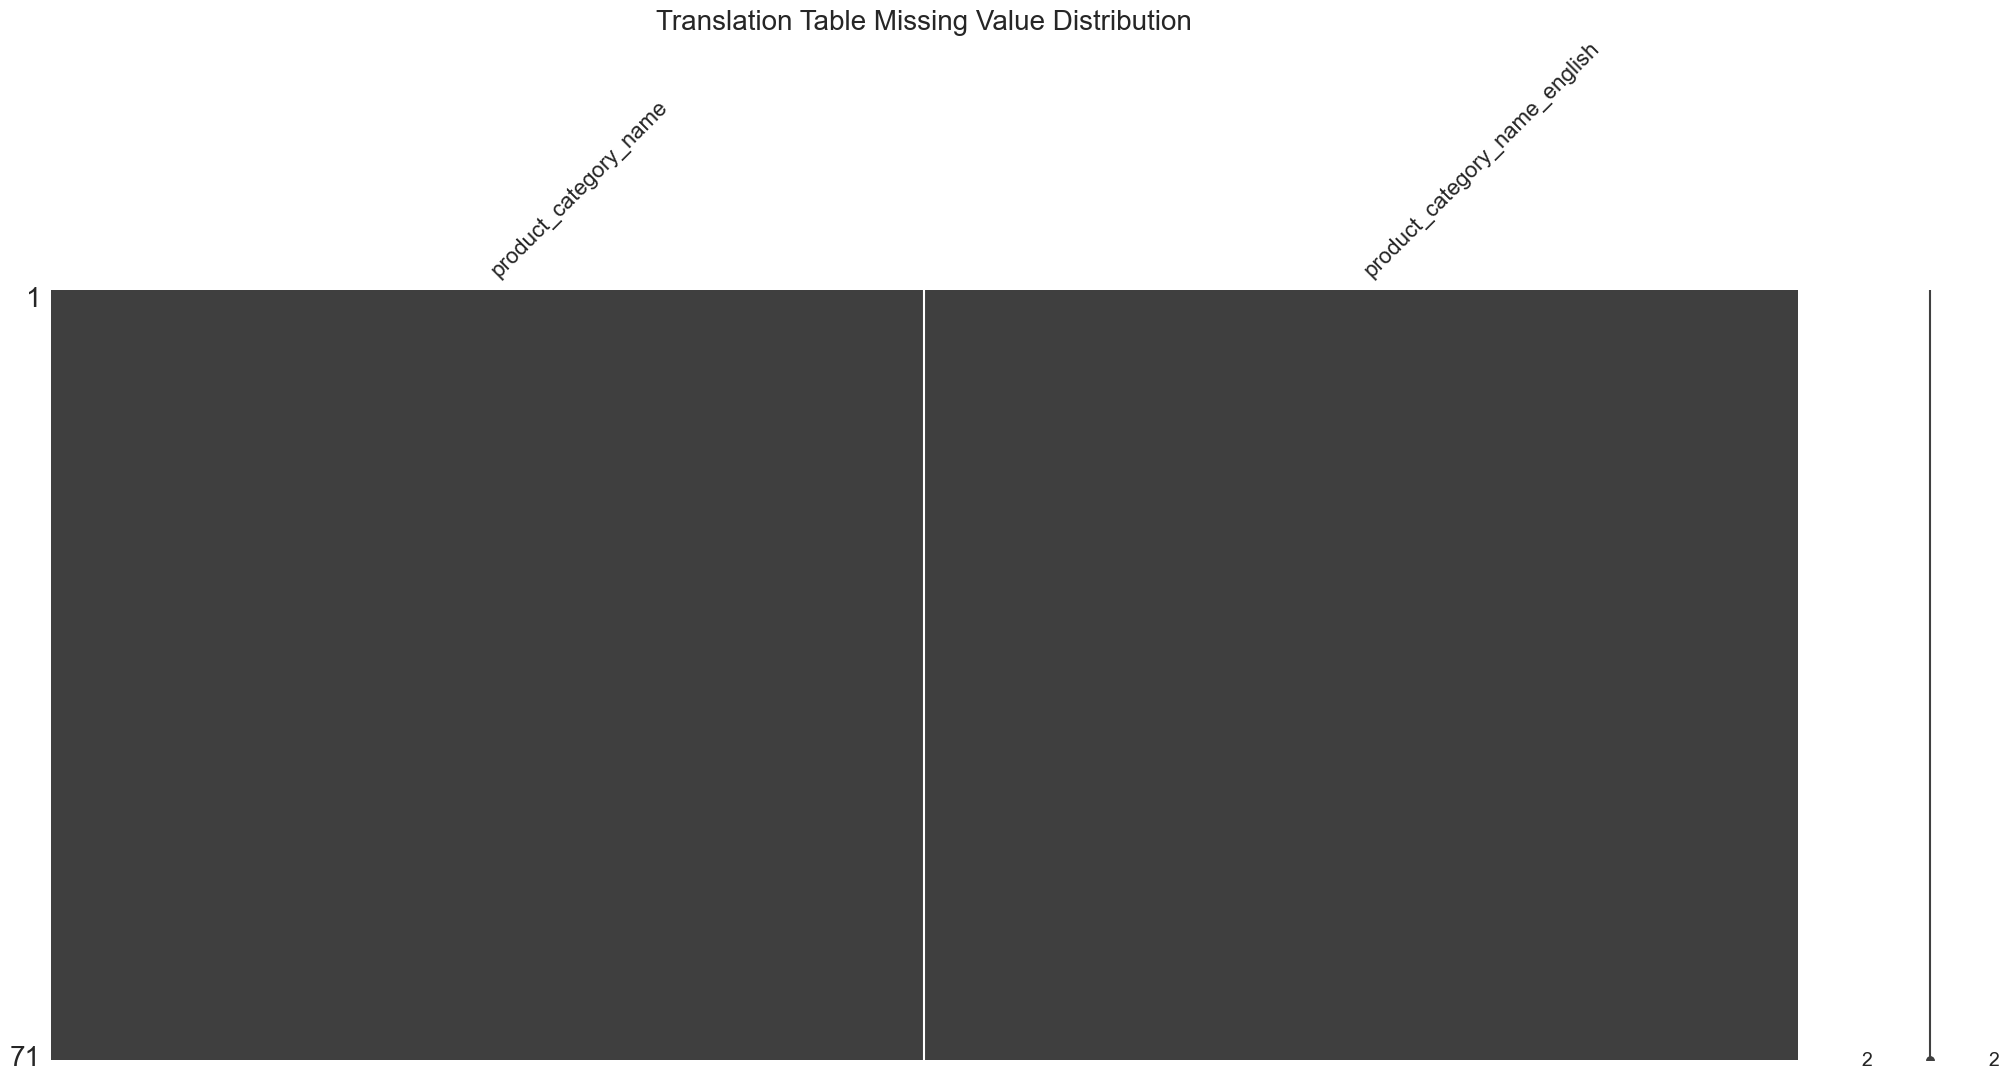

In [46]:
# Visualize missing value

msno.matrix(df_translation)
plt.title('Translation Table Missing Value Distribution',fontdict={'fontsize':20})
plt.show()

**Summary:**

1.	There are no missing values in the Category Name Translation table, making the table ready for use.
2.	On the Product table, `product_category_name` has 73 unique values, a mismatch with the 71 unique values of the Category Name Translation dataframe. There’s a possibility that there are two untranslated product which will be handled later on.


## Order Items Dataset

This dataset includes data about the items purchased within each order.

Example:
The order_id = 00143d0f86d6fbd9f9b38ab440ac16f5 has 3 items (same product). Each item has the freight calculated accordingly to its measures and weight. To get the total freight value for each order you just have to sum.

The total order_item value is: 21.33 * 3 = 63.99

The total freight value is: 15.10 * 3 = 45.30

The total order value (product + freight) is: 45.30 + 63.99 = 109.29

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
|order_id | Object |	Key to the orders dataset. Each order represents a unique entry.|
|order_item_id | int64 | Sequential number identifying number of items included within the same order.|
|product_id | Object |	Product unique identifier.|
|seller_id| Object | Seller unique identifier.|
|shipping_limit_date | Object |	Date of when order is handed over to logistic partner.|
|price | float64 |	Item Price.|
|freight_value | float64 |	Item freight value (if order has more than one item, the freight value is splitted between items.)|

In [47]:
df_order_items.head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  
0  2017-09-19 09:45:35   58.90          13.29  
1  2017-05-03 11:05:13  239.90          19.93  
2  2018-01-18 14:48:30  199.00          17.87  
3  2018-08-15 10:10:18   12.99          12.79  
4  2017-02-13 13:57:51  199.90          18.14

In [48]:
listItem = []

# Data condition & detail

for col in df_order_items.columns:
    listItem.append([col, df_order_items[col].dtype, df_order_items[col].isna().sum(), round((df_order_items[col].isna().sum()/len(df_order_items[col]))*100, 2),
                    df_order_items[col].nunique(), list(df_order_items[col].drop_duplicates().values)]);

df_order_items_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
df_order_items_desc

dataFeatures dataType  null  nullPct  unique  \
0             order_id   object     0      0.0   98666   
1        order_item_id    int64     0      0.0      21   
2           product_id   object     0      0.0   32951   
3            seller_id   object     0      0.0    3095   
4  shipping_limit_date   object     0      0.0   93318   
5                price  float64     0      0.0    5968   
6        freight_value  float64     0      0.0    6999   

                                        uniqueSample  
0  [00010242fe8c5a6d1ba2dd792cb16214, 00018f77f2f...  
1  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...  
2  [4244733e06e7ecb4970a6e2683c13e61, e5f2d52b802...  
3  [48436dade18ac8b2bce089ec2a041202, dd7ddc04e1b...  
4  [2017-09-19 09:45:35, 2017-05-03 11:05:13, 201...  
5  [58.9, 239.9, 199.0, 12.99, 199.9, 21.9, 19.9,...  
6  [13.29, 19.93, 17.87, 12.79, 18.14, 12.69, 11....

In [49]:
df_order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


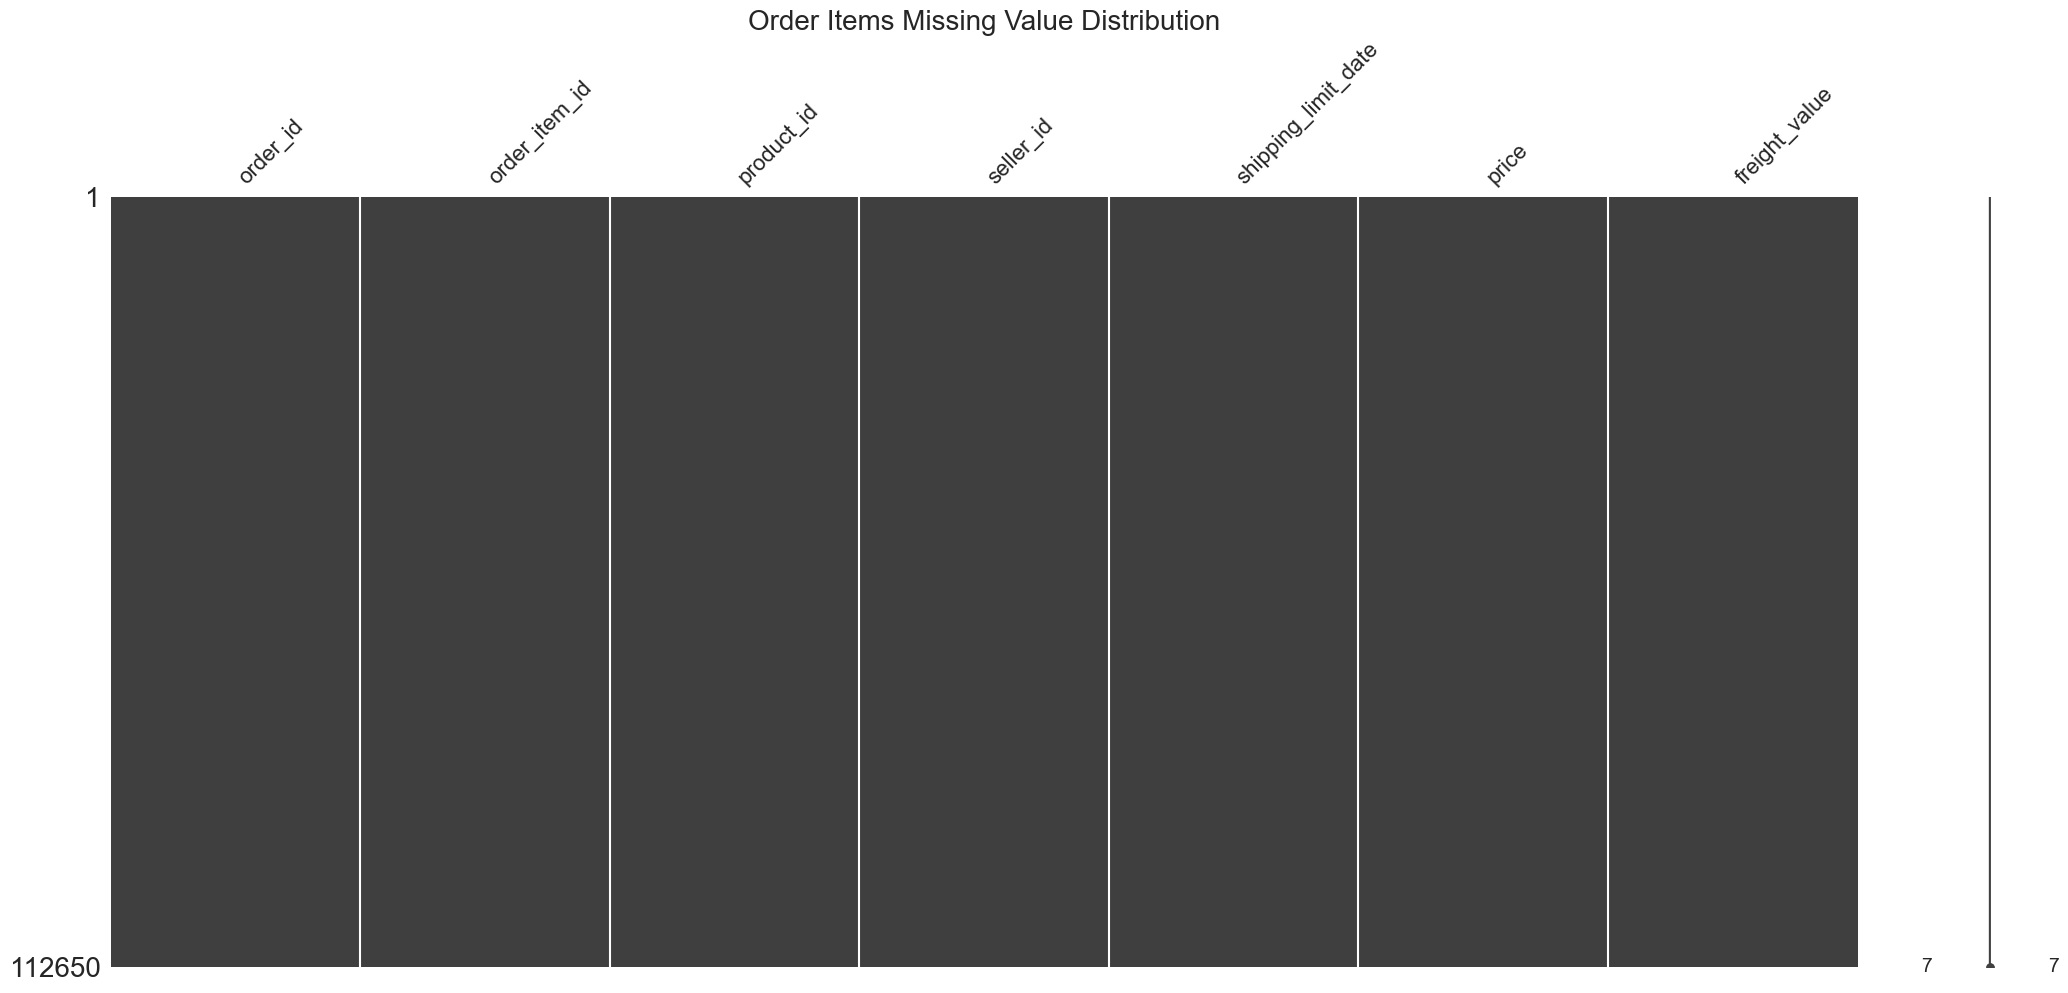

In [50]:
msno.matrix(df_order_items)
plt.title('Order Items Missing Value Distribution',fontdict={'fontsize':20})
plt.show()

In [51]:
df_order_items.describe()

order_item_id          price  freight_value
count  112650.000000  112650.000000  112650.000000
mean        1.197834     120.653739      19.990320
std         0.705124     183.633928      15.806405
min         1.000000       0.850000       0.000000
25%         1.000000      39.900000      13.080000
50%         1.000000      74.990000      16.260000
75%         1.000000     134.900000      21.150000
max        21.000000    6735.000000     409.680000

In [52]:
df_order_items.describe(include=object)

order_id                        product_id  \
count                             112650                            112650   
unique                             98666                             32951   
top     8272b63d03f5f79c56e9e4120aec44ef  aca2eb7d00ea1a7b8ebd4e68314663af   
freq                                  21                               527   

                               seller_id  shipping_limit_date  
count                             112650               112650  
unique                              3095                93318  
top     6560211a19b47992c3666cc44a7e94c0  2017-07-21 18:25:23  
freq                                2033                   21

In [53]:
id_dupes = df_order_items[df_order_items.duplicated(subset=['order_id'])].shape
id_product_dupes = df_order_items[df_order_items.duplicated(subset=['order_id','product_id'])].shape

print(f"order_id duplicate total: {id_dupes[0]}",
      f"\norder_id and product_id duplicates total: {id_product_dupes[0]}")

order_id duplicate total: 13984 
order_id and product_id duplicates total: 10225


**Summary:**

There are no missing values but there are duplicated data under order_id column caused by order_item_id, the sequential number that identifies the order of items within the same order.

Considering there are valid reasons to both remove and keep the duplicate datas as it is, the duplicates will not be changed now and adjusted later on based on how it will be used.  

## Olist Order Review 

This dataset includes data about the reviews made by the customers.

After a customer purchases the product from Olist Store a seller gets notified to fulfill that order. Once the customer receives the product, or the estimated delivery date is due, the customer gets a satisfaction survey by email where he can give a note for the purchase experience and write down some comments. (kaggle description)

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
|review_id | Object |	Unique review primary key.|
|order_id | Object | Unique order identifier.|
|review_score | int64 |	Score on a scale of 1 to 5 given by customer through satisfaction survey sent by email.|
|review_comment_title| Object | Comment title from the review left by the customer, in Portuguese.|
|review_comment_message | Object |	Comment message from the review left by the customer, in Portuguese.|
|review_creation_date | Object |	Shows the date in which the satisfaction survey was sent to the customer.|
|review_answer_timestamp | Object |	Shows satisfaction survey answer timestamp.|




In [54]:
df_order_reviews.head()

review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                  NaN   
1             5                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   

                              review_comment_message review_creation_date  \
0                                                NaN  2018-01-18 00:00:00   
1                                                NaN  2018-03-10 00:00:00   
2                                                NaN  2018-02-17 00:00:00   
3              Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00   
4  Parabéns lojas lannister adorei comprar pela I...  2018-03-01 00:00:00   

  review_answer_timestamp  
0     2018-01-18 21:46:59  
1     2018-03-11 03:05:13  
2     2018-02-18 14:36:24  
3     2017-04-21 22:02:06  
4     2018-03-02 10:26:53

In [55]:
# Data condition & detail

listItem = []

for col in df_order_reviews.columns:
    listItem.append([col, df_order_reviews[col].dtype, df_order_reviews[col].isna().sum(), round((df_order_reviews[col].isna().sum()/len(df_order_reviews[col]))*100, 2),
                    df_order_reviews[col].nunique(), list(df_order_reviews[col].drop_duplicates().values)])

df_order_reviews_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
df_order_reviews_desc

dataFeatures dataType   null  nullPct  unique  \
0                review_id   object      0     0.00   98410   
1                 order_id   object      0     0.00   98673   
2             review_score    int64      0     0.00       5   
3     review_comment_title   object  87656    88.34    4527   
4   review_comment_message   object  58247    58.70   36159   
5     review_creation_date   object      0     0.00     636   
6  review_answer_timestamp   object      0     0.00   98248   

                                        uniqueSample  
0  [7bc2406110b926393aa56f80a40eba40, 80e641a11e5...  
1  [73fc7af87114b39712e6da79b0a377eb, a548910a1c6...  
2                                    [4, 5, 1, 3, 2]  
3  [nan, recomendo, Super recomendo, Não chegou m...  
4  [nan, Recebi bem antes do prazo estipulado., P...  
5  [2018-01-18 00:00:00, 2018-03-10 00:00:00, 201...  
6  [2018-01-18 21:46:59, 2018-03-11 03:05:13, 201...

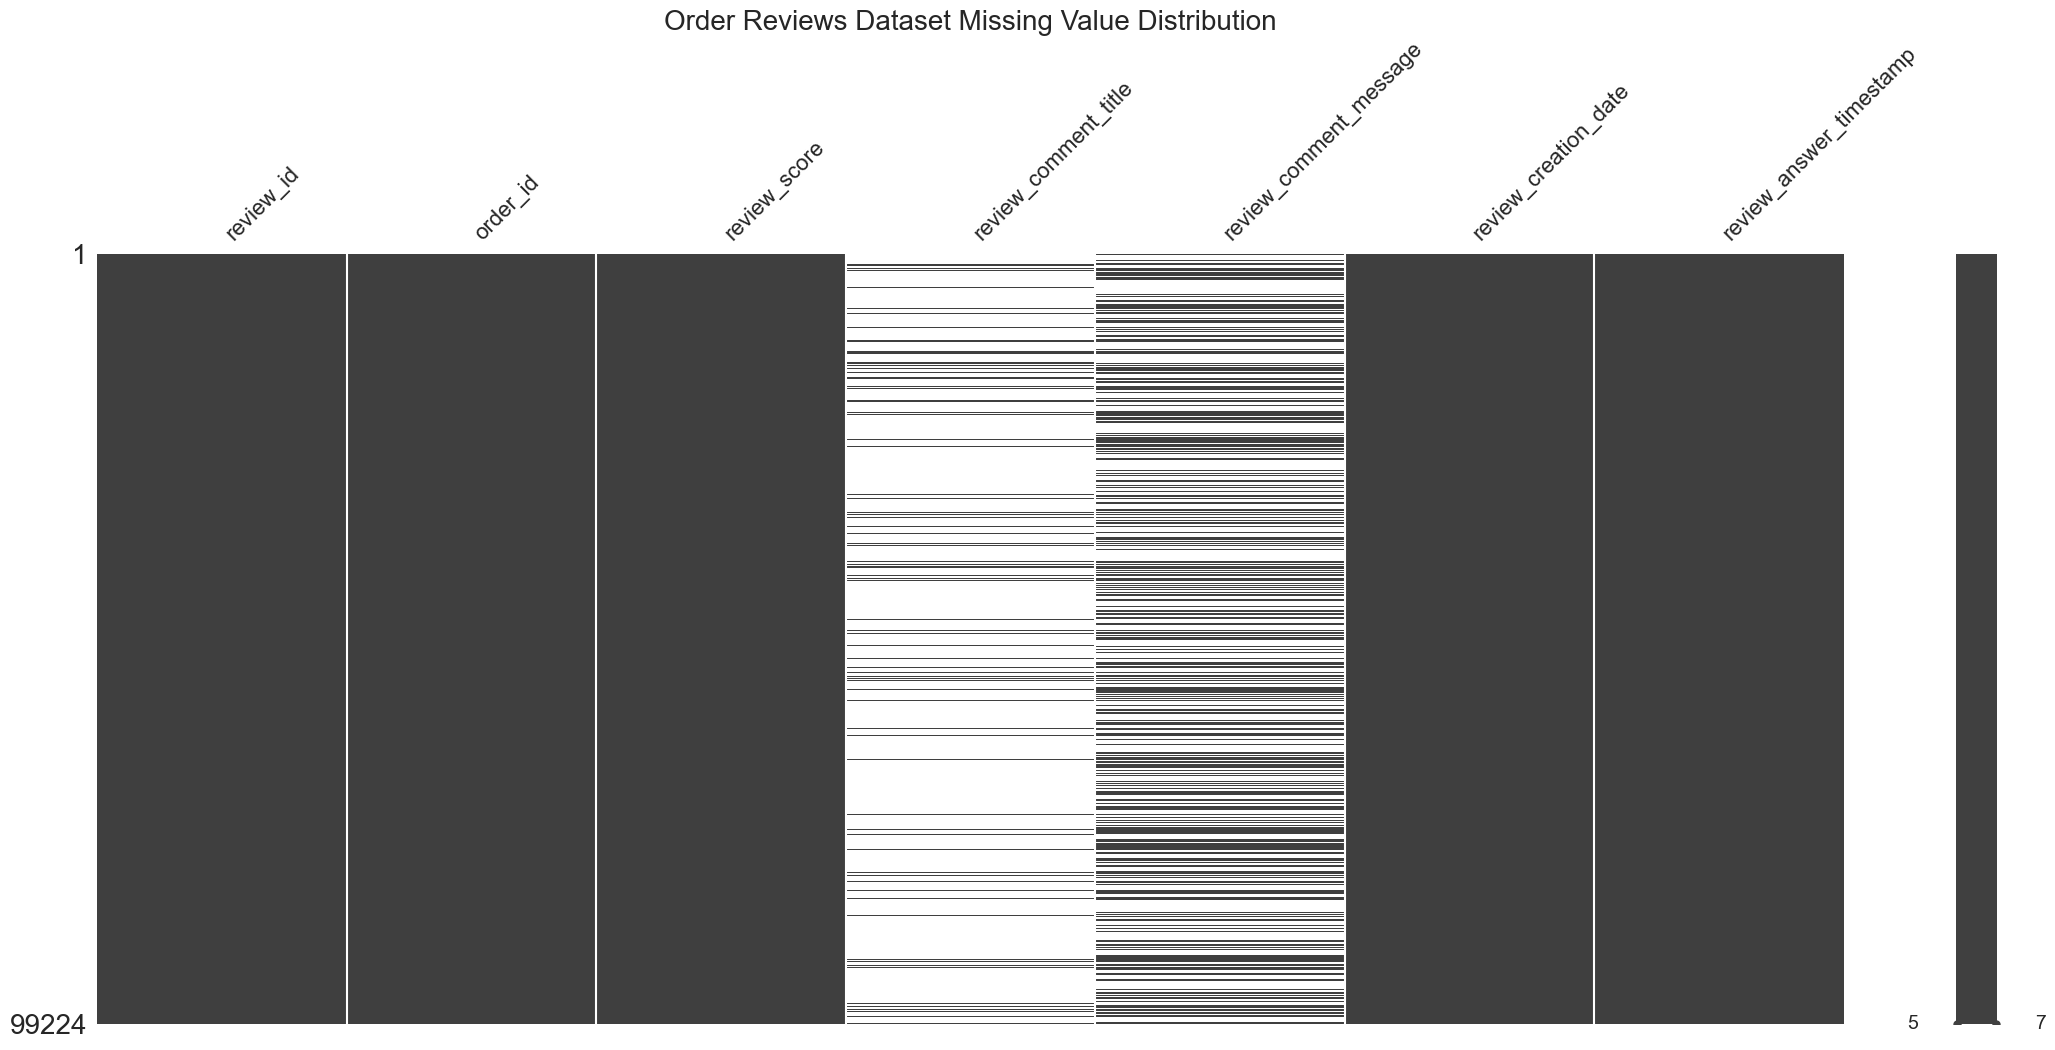

In [56]:
msno.matrix(df_order_reviews)
plt.title('Order Reviews Dataset Missing Value Distribution',fontdict={'fontsize':20})
plt.show()

In [57]:
df_order_reviews.describe()

review_score
count  99224.000000
mean       4.086421
std        1.347579
min        1.000000
25%        4.000000
50%        5.000000
75%        5.000000
max        5.000000

In [58]:
review_score = df_order_reviews['review_score'].value_counts().reset_index()
review_score['review_score_precentage'] = review_score['review_score']/df_order_reviews.shape[0]
review_score

index  review_score  review_score_precentage
0      5         57328                 0.577763
1      4         19142                 0.192917
2      1         11424                 0.115133
3      3          8179                 0.082430
4      2          3151                 0.031756

**Summary:**

1.	Average customer score is 4.09. 
2.	`review_score` breakdown: 
  -	5 makes up 57.78%
  -	4 makes up 19.29%
  -	1, being the lowest score, makes up 11.51%
3.	There are some missing values in `review_comment_title` and `review_comment_message`. Due to the fact there are more missing values in `review_comment_title`, it’s possible customers that leave a review do not include a title.
4.	There are 98,673 `order_id` with reviews. If combined with order_id, it will cause missing values because the customers might not leave a review or might not have accepted their purchased products.


## Olist Sellers Dataset

This dataset includes data about sellers that fulfilled orders made at Olist. This dataset could be used to identify which seller fulfilled each product. 

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
|seller_id	 | Object |	Seller unique key.|
|seller_zip_code_prefix | int64 | First 5 digits of seller zip code.|
|seller_city | Object |	Seller city name.|
|seller_state| Object | Seller state.|

In [59]:
df_olist_sellers.head()

seller_id  seller_zip_code_prefix  \
0  3442f8959a84dea7ee197c632cb2df15                   13023   
1  d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
2  ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
3  c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
4  51a04a8a6bdcb23deccc82b0b80742cf                   12914   

         seller_city seller_state  
0           campinas           SP  
1         mogi guacu           SP  
2     rio de janeiro           RJ  
3          sao paulo           SP  
4  braganca paulista           SP

In [60]:
# Data condition & detail

listItem = []

for col in df_olist_sellers.columns:
    listItem.append([col, df_olist_sellers[col].dtype, df_olist_sellers[col].isna().sum(), round((df_olist_sellers[col].isna().sum()/len(df_olist_sellers[col]))*100, 2),
                    df_olist_sellers[col].nunique(), list(df_olist_sellers[col].drop_duplicates().values)])

df_olist_sellers_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
df_olist_sellers_desc

dataFeatures dataType  null  nullPct  unique  \
0               seller_id   object     0      0.0    3095   
1  seller_zip_code_prefix    int64     0      0.0    2246   
2             seller_city   object     0      0.0     611   
3            seller_state   object     0      0.0      23   

                                        uniqueSample  
0  [3442f8959a84dea7ee197c632cb2df15, d1b65fc7deb...  
1  [13023, 13844, 20031, 4195, 12914, 20920, 5532...  
2  [campinas, mogi guacu, rio de janeiro, sao pau...  
3  [SP, RJ, PE, PR, GO, SC, BA, DF, RS, MG, RN, M...

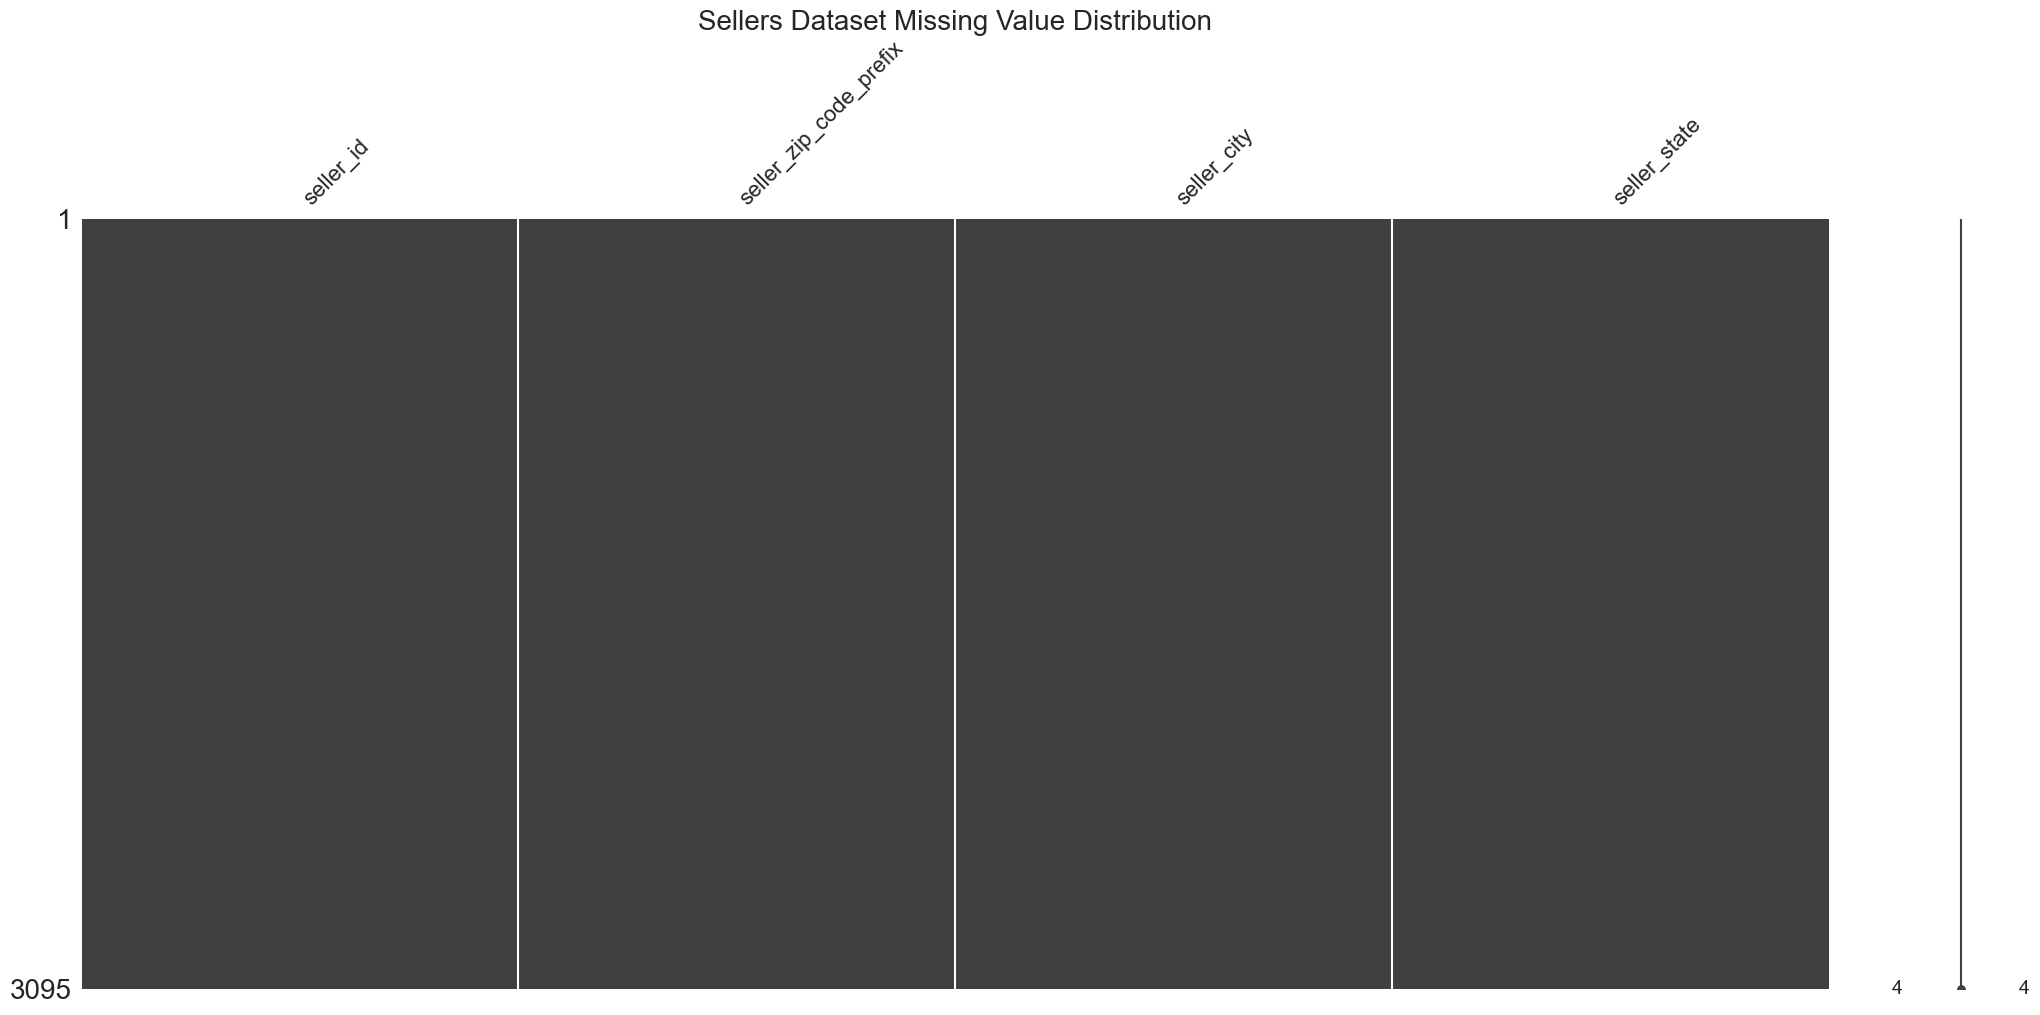

In [61]:
msno.matrix(df_olist_sellers)
plt.title('Sellers Dataset Missing Value Distribution',fontdict={'fontsize':20})
plt.show()

In [62]:
df_olist_sellers.describe(include=object)

seller_id seller_city seller_state
count                               3095        3095         3095
unique                              3095         611           23
top     3442f8959a84dea7ee197c632cb2df15   sao paulo           SP
freq                                   1         694         1849

**Summary:**

1.	There are 3,095 sellers that have fulfilled customer orders.
2.	There are no missing values in the Olist Sellers table and it’s ready to use for the next process.
3.	As mentioned before, the Geolocation dataframe shows 27 states but the sellers are only in 23 different states. 


# Data Prep and Cleaning

## Combining the datasets

Our approach to this very rich dataset is simple:
- Put them together
- Throw away irrelevant information
- Keep the essential information
- Clean

Considering `olist_orders_dataset` is the core, we'll start there.

### Some finder function we made

In [63]:
#I'm lazy, function so I don't have to type so much to look for stuff
def finder(df,col,val,more_less_or_equal):
  if more_less_or_equal == "equal": return df[df[col] == val]
  elif more_less_or_equal == "more": return df[df[col] > val]
  elif more_less_or_equal == "less" : return df[df[col] < val]

In [64]:
#Testing
finder(df_order,"order_id","00010242fe8c5a6d1ba2dd792cb16214","equal")

order_id                       customer_id  \
85267  00010242fe8c5a6d1ba2dd792cb16214  3ce436f183e68e07877b285a838db11a   

      order_status order_purchase_timestamp    order_approved_at  \
85267    delivered      2017-09-13 08:59:02  2017-09-13 09:45:35   

      order_delivered_carrier_date order_delivered_customer_date  \
85267          2017-09-19 18:34:16           2017-09-20 23:43:48   

      order_estimated_delivery_date  
85267           2017-09-29 00:00:00

In [65]:
#Testing 2
finder(df_order_items,"order_item_id",2,"more")

order_id  order_item_id  \
34      00143d0f86d6fbd9f9b38ab440ac16f5              3   
44      001ab0a7578dd66cd4b0a71f5b6e1e41              3   
139     00526a9d4ebde463baee25f386963ddc              3   
140     00526a9d4ebde463baee25f386963ddc              4   
153     005d9a5423d47281ac463a968b3936fb              3   
...                                  ...            ...   
112536  ffb9a9cd00c74c11c24aa30b3d78e03b              4   
112576  ffd6f465cab015b452d398ac1f5d978a              3   
112617  ffecd5a79a0084f6a592288c67e3c298              3   
112642  fffb9224b6fc7c43ebb0904318b10b5f              3   
112643  fffb9224b6fc7c43ebb0904318b10b5f              4   

                              product_id                         seller_id  \
34      e95ee6822b66ac6058e2e4aff656071a  a17f621c590ea0fab3d5d883e1630ec6   
44      0b0172eb0fd18479d29c3bc122c058c2  5656537e588803a555b8eb41f07a944b   
139     0c4a0f8ab44f9acd2d04e7024f9ba362  7210cd29727d674c00741e5e387b3ccd   
140     0c4a0f8ab44f9acd2d04e7024f9ba362  7210cd29727d674c00741e5e387b3ccd   
153     4c3ae5db49258df0784827bdacf3b396  d98eec89afa3380e14463da2aabaea72   
...                                  ...                               ...   
112536  3321ad579f19476d0d668f726f8dffec  da8622b14eb17ae2831f4ac5b9dab84a   
112576  fdcf45aa23bb8312ecc0027d6e1ef1c4  113e3a788b935f48aad63e1c41dac1bd   
112617  50fd2b788dc166edd20512370dac54df  8b321bb669392f5163d04c59e235e066   
112642  43423cdffde7fda63d0414ed38c11a73  b1fc4f64df5a0e8b6913ab38803c57a9   
112643  43423cdffde7fda63d0414ed38c11a73  b1fc4f64df5a0e8b6913ab38803c57a9   

        shipping_limit_date   price  freight_value  
34      2017-10-20 16:07:52   21.33          15.10  
44      2018-01-04 02:33:42   24.89          17.63  
139     2018-08-14 22:15:22   33.89           8.40  
140     2018-08-14 22:15:22   33.89           8.40  
153     2017-10-24 12:28:16   24.99          13.58  
...                     ...     ...            ...  
112536  2017-03-22 17:20:21  219.90          22.18  
112576  2018-05-03 09:30:37    7.84          22.06  
112617  2018-03-05 20:15:27   21.90          15.79  
112642  2017-11-03 02:55:58   55.00          34.19  
112643  2017-11-03 02:55:58   55.00          34.19  

[4181 rows x 7 columns]

### Merging English product category with df_product

In [66]:
# A reminder of what df_product looks like
df_product

product_id              product_category_name  \
0      1e9e8ef04dbcff4541ed26657ea517e5                         perfumaria   
1      3aa071139cb16b67ca9e5dea641aaa2f                              artes   
2      96bd76ec8810374ed1b65e291975717f                      esporte_lazer   
3      cef67bcfe19066a932b7673e239eb23d                              bebes   
4      9dc1a7de274444849c219cff195d0b71              utilidades_domesticas   
...                                 ...                                ...   
32946  a0b7d5a992ccda646f2d34e418fff5a0                   moveis_decoracao   
32947  bf4538d88321d0fd4412a93c974510e6  construcao_ferramentas_iluminacao   
32948  9a7c6041fa9592d9d9ef6cfe62a71f8c                    cama_mesa_banho   
32949  83808703fc0706a22e264b9d75f04a2e             informatica_acessorios   
32950  106392145fca363410d287a815be6de4                    cama_mesa_banho   

       product_name_lenght  product_description_lenght  product_photos_qty  \
0                     40.0                       287.0                 1.0   
1                     44.0                       276.0                 1.0   
2                     46.0                       250.0                 1.0   
3                     27.0                       261.0                 1.0   
4                     37.0                       402.0                 4.0   
...                    ...                         ...                 ...   
32946                 45.0                        67.0                 2.0   
32947                 41.0                       971.0                 1.0   
32948                 50.0                       799.0                 1.0   
32949                 60.0                       156.0                 2.0   
32950                 58.0                       309.0                 1.0   

       product_weight_g  product_length_cm  product_height_cm  \
0                 225.0               16.0               10.0   
1                1000.0               30.0               18.0   
2                 154.0               18.0                9.0   
3                 371.0               26.0                4.0   
4                 625.0               20.0               17.0   
...                 ...                ...                ...   
32946           12300.0               40.0               40.0   
32947            1700.0               16.0               19.0   
32948            1400.0               27.0                7.0   
32949             700.0               31.0               13.0   
32950            2083.0               12.0                2.0   

       product_width_cm  
0                  14.0  
1                  20.0  
2                  15.0  
3                  26.0  
4                  13.0  
...                 ...  
32946              40.0  
32947              16.0  
32948              27.0  
32949              20.0  
32950               7.0  

[32951 rows x 9 columns]

In [67]:
#Merged the translation, got rid of unused columns like product length and description length and product dimension
df_product_translated = pd.merge(df_product, df_translation, on='product_category_name', how="left")

#items without english translations
df_product_translated[(df_product_translated['product_category_name_english'].isnull()) & (df_product_translated['product_category_name'].notnull())]

product_id  \
1628   0105b5323d24fc655f73052694dbbb3a   
5821   6fd83eb3e0799b775e4f946bd66657c0   
7325   5d923ead886c44b86845f69e50520c3e   
7478   6727051471a0fc4a0e7737b57bff2549   
8819   bed164d9d628cf0593003389c535c6e0   
11039  1220978a08a6b29a202bc015b18250e9   
14266  ae62bb0f95af63d64eae5f93dddea8d3   
16182  1954739d84629e7323a4295812a3e0ec   
16930  dbe520fb381ad695a7e1f2807d20c765   
17800  c7a3f1a7f9eef146cc499368b578b884   
18610  7afdd65f79f63819ff5bee328843fa37   
26890  a4756663d007b0cd1af865754d08d968   
29919  cb9d764f38ee4d0c00af64d5c388f837   

                               product_category_name  product_name_lenght  \
1628                                        pc_gamer                 59.0   
5821   portateis_cozinha_e_preparadores_de_alimentos                 52.0   
7325   portateis_cozinha_e_preparadores_de_alimentos                 58.0   
7478                                        pc_gamer                 60.0   
8819   portateis_cozinha_e_preparadores_de_alimentos                 54.0   
11039  portateis_cozinha_e_preparadores_de_alimentos                 46.0   
14266  portateis_cozinha_e_preparadores_de_alimentos                 59.0   
16182  portateis_cozinha_e_preparadores_de_alimentos                 58.0   
16930                                       pc_gamer                 60.0   
17800  portateis_cozinha_e_preparadores_de_alimentos                 52.0   
18610  portateis_cozinha_e_preparadores_de_alimentos                 48.0   
26890  portateis_cozinha_e_preparadores_de_alimentos                 60.0   
29919  portateis_cozinha_e_preparadores_de_alimentos                 57.0   

       product_description_lenght  product_photos_qty  product_weight_g  \
1628                        621.0                 4.0            2839.0   
5821                        280.0                 1.0            1200.0   
7325                        284.0                 1.0            1200.0   
7478                       1532.0                 3.0             650.0   
8819                        382.0                 2.0             850.0   
11039                       280.0                 1.0            1200.0   
14266                       927.0                 1.0           10600.0   
16182                       792.0                 4.0             750.0   
16930                       840.0                 6.0             800.0   
17800                      1372.0                 5.0            7350.0   
18610                       305.0                 1.0             750.0   
26890                      1304.0                 4.0             650.0   
29919                       306.0                 1.0             625.0   

       product_length_cm  product_height_cm  product_width_cm  \
1628                19.0               16.0              18.0   
5821                25.0               33.0              25.0   
7325                25.0               33.0              25.0   
7478                16.0               22.0              20.0   
8819                30.0               21.0              22.0   
11039               25.0               33.0              25.0   
14266               40.0               20.0              38.0   
16182               30.0               30.0              30.0   
16930               18.0               22.0              22.0   
17800               40.0               30.0              23.0   
18610               20.0               20.0              20.0   
26890               22.0                6.0              14.0   
29919               28.0               27.0              24.0   

      product_category_name_english  
1628                            NaN  
5821                            NaN  
7325                            NaN  
7478                            NaN  
8819                            NaN  
11039                           NaN  
14266                           NaN  
16182                           NaN  
16930                           NaN  
17800

In [68]:
df_product_translated.loc[df_product_translated['product_category_name'] == 'pc_gamer', 'product_category_name_english'] = 'pc_gamer'
df_product_translated.loc[df_product_translated['product_category_name'] == 'portateis_cozinha_e_preparadores_de_alimentos', 'product_category_name_english'] = 'portable_kitchen_and_food_processors'

In [69]:
df_product_translated.isna().sum()

product_id                         0
product_category_name            610
product_name_lenght              610
product_description_lenght       610
product_photos_qty               610
product_weight_g                   2
product_length_cm                  2
product_height_cm                  2
product_width_cm                   2
product_category_name_english    610
dtype: int64

In [70]:
df_product_translated = df_product_translated.loc[:, ['product_id', 'product_category_name_english']]
df_product_translated

product_id product_category_name_english
0      1e9e8ef04dbcff4541ed26657ea517e5                     perfumery
1      3aa071139cb16b67ca9e5dea641aaa2f                           art
2      96bd76ec8810374ed1b65e291975717f                sports_leisure
3      cef67bcfe19066a932b7673e239eb23d                          baby
4      9dc1a7de274444849c219cff195d0b71                    housewares
...                                 ...                           ...
32946  a0b7d5a992ccda646f2d34e418fff5a0               furniture_decor
32947  bf4538d88321d0fd4412a93c974510e6     construction_tools_lights
32948  9a7c6041fa9592d9d9ef6cfe62a71f8c                bed_bath_table
32949  83808703fc0706a22e264b9d75f04a2e         computers_accessories
32950  106392145fca363410d287a815be6de4                bed_bath_table

[32951 rows x 2 columns]

In [71]:
finder(df_product_translated,"product_id","5769ef0a239114ac3a854af00df129e4","equal")

product_id product_category_name_english
25620  5769ef0a239114ac3a854af00df129e4               fixed_telephony

In [72]:
df_order_items.nunique()

order_id               98666
order_item_id             21
product_id             32951
seller_id               3095
shipping_limit_date    93318
price                   5968
freight_value           6999
dtype: int64

In [73]:
df_order_items.describe()

order_item_id          price  freight_value
count  112650.000000  112650.000000  112650.000000
mean        1.197834     120.653739      19.990320
std         0.705124     183.633928      15.806405
min         1.000000       0.850000       0.000000
25%         1.000000      39.900000      13.080000
50%         1.000000      74.990000      16.260000
75%         1.000000     134.900000      21.150000
max        21.000000    6735.000000     409.680000

### Merging translated categories with df_order_items

In [74]:
df_order_items.nunique()

order_id               98666
order_item_id             21
product_id             32951
seller_id               3095
shipping_limit_date    93318
price                   5968
freight_value           6999
dtype: int64

In [75]:
#putting a name on the item orders 
df_product_order_items = pd.merge(df_order_items, df_product_translated, on='product_id')
df_product_order_items

order_id  order_item_id  \
0       00010242fe8c5a6d1ba2dd792cb16214              1   
1       130898c0987d1801452a8ed92a670612              1   
2       532ed5e14e24ae1f0d735b91524b98b9              1   
3       6f8c31653edb8c83e1a739408b5ff750              1   
4       7d19f4ef4d04461989632411b7e588b9              1   
...                                  ...            ...   
112645  ffebd80e3291e811c308365936897efd              1   
112646  ffee31fb4b5e35c9123608015637c495              1   
112647  fff7c4452f050315db1b3f24d9df5fcd              1   
112648  fffa82886406ccf10c7b4e35c4ff2788              1   
112649  fffe41c64501cc87c801fd61db3f6244              1   

                              product_id                         seller_id  \
0       4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1       4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
2       4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
3       4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
4       4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
...                                  ...                               ...   
112645  4cc4d02efc8f249c13355147fb44e34d  d1c7fa84e48cfa21a0e595167c1c500e   
112646  b10ecf8e33aaaea419a9fa860ea80fb5  0241d4d5d36f10f80c644447315af0bd   
112647  dd469c03ad67e201bc2179ef077dcd48  7e93a43ef30c4f03f38b393420bc753a   
112648  bbe7651fef80287a816ead73f065fc4b  8f2ce03f928b567e3d56181ae20ae952   
112649  350688d9dc1e75ff97be326363655e01  f7ccf836d21b2fb1de37564105216cc1   

        shipping_limit_date  price  freight_value  \
0       2017-09-19 09:45:35   58.9          13.29   
1       2017-07-05 02:44:11   55.9          17.96   
2       2018-05-23 10:56:25   64.9          18.33   
3       2017-08-07 18:55:08   58.9          16.17   
4       2017-08-16 22:05:11   58.9          13.29   
...                     ...    ...            ...   
112645  2018-07-18 20:23:55  129.9          51.20   
112646  2018-08-21 10:10:11   99.0          13.52   
112647  2017-06-07 17:05:23  736.0          20.91   
112648  2017-12-22 17:31:42  229.9          44.02   
112649  2018-06-12 17:10:13   43.0          12.79   

       product_category_name_english  
0                         cool_stuff  
1                         cool_stuff  
2                         cool_stuff  
3                         cool_stuff  
4                         cool_stuff  
...                              ...  
112645                  garden_tools  
112646               furniture_decor  
112647                 watches_gifts  
112648                sports_leisure  
112649                bed_bath_table  

[112650 rows x 8 columns]

In [76]:
#checking for duplicates, was wondering if we should keep the duplicates from order_item_id or aggregate it, but decided on keeping it.
df_product_order_items[df_product_order_items["order_id"].duplicated(keep=False)]

order_id  order_item_id  \
7       c9ef97d2854afe64a3b4488bc2836af6              2   
11      45211f00dfa76aed1c20d6910d973222              2   
45      09268d8b25dd31ae78b464efd453d069              1   
55      398545ae905dad286c70f01c7e7311e1              1   
56      398545ae905dad286c70f01c7e7311e1              2   
...                                  ...            ...   
112634  ffd6f465cab015b452d398ac1f5d978a              1   
112635  ffd6f465cab015b452d398ac1f5d978a              2   
112636  ffd6f465cab015b452d398ac1f5d978a              3   
112641  ffe4b41e99d39f0b837a239110260530              1   
112642  ffe4b41e99d39f0b837a239110260530              2   

                              product_id                         seller_id  \
7       4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
11      c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
45      d63c1011f49d98b976c352955b1c4bea  cc419e0650a3c5ba77189a1882b7556a   
55      d63c1011f49d98b976c352955b1c4bea  cc419e0650a3c5ba77189a1882b7556a   
56      d63c1011f49d98b976c352955b1c4bea  cc419e0650a3c5ba77189a1882b7556a   
...                                  ...                               ...   
112634  fdcf45aa23bb8312ecc0027d6e1ef1c4  113e3a788b935f48aad63e1c41dac1bd   
112635  fdcf45aa23bb8312ecc0027d6e1ef1c4  113e3a788b935f48aad63e1c41dac1bd   
112636  fdcf45aa23bb8312ecc0027d6e1ef1c4  113e3a788b935f48aad63e1c41dac1bd   
112641  e97df839917a6e93404867b1d0319bfc  42bde9fef835393bb8a8849cb6b7f245   
112642  e97df839917a6e93404867b1d0319bfc  42bde9fef835393bb8a8849cb6b7f245   

        shipping_limit_date   price  freight_value  \
7       2017-08-14 04:25:34   58.90          18.12   
11      2017-11-06 15:46:14  199.00          20.08   
45      2018-06-14 04:57:05   59.99           3.03   
55      2018-04-12 03:28:44   59.99          19.39   
56      2018-04-12 03:28:44   59.99          19.39   
...                     ...     ...            ...   
112634  2018-05-03 09:30:37    7.84          22.06   
112635  2018-05-03 09:30:37    7.84          22.06   
112636  2018-05-03 09:30:37    7.84          22.06   
112641  2017-09-07 21:25:40   19.00          15.79   
112642  2017-09-07 21:25:40   19.00          15.79   

       product_category_name_english  
7                         cool_stuff  
11                   furniture_decor  
45                     health_beauty  
55                     health_beauty  
56                     health_beauty  
...                              ...  
112634            christmas_supplies  
112635            christmas_supplies  
112636            christmas_supplies  
112641                          toys  
112642                          toys  

[23787 rows x 8 columns]

The order_id represents the different orders but there could be multiple different products within those orders. Considering we're focusing on sales volume in this analysis, we're going to keep the duplicates and not aggregate it for ease of locating and grouping the different products. 

In [77]:
#Total amount of order feature addition
df_product_order_items['sum_items_in_order'] = df_product_order_items.groupby('order_id')['order_id'].transform('size')
df_product_order_items


order_id  order_item_id  \
0       00010242fe8c5a6d1ba2dd792cb16214              1   
1       130898c0987d1801452a8ed92a670612              1   
2       532ed5e14e24ae1f0d735b91524b98b9              1   
3       6f8c31653edb8c83e1a739408b5ff750              1   
4       7d19f4ef4d04461989632411b7e588b9              1   
...                                  ...            ...   
112645  ffebd80e3291e811c308365936897efd              1   
112646  ffee31fb4b5e35c9123608015637c495              1   
112647  fff7c4452f050315db1b3f24d9df5fcd              1   
112648  fffa82886406ccf10c7b4e35c4ff2788              1   
112649  fffe41c64501cc87c801fd61db3f6244              1   

                              product_id                         seller_id  \
0       4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1       4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
2       4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
3       4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
4       4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
...                                  ...                               ...   
112645  4cc4d02efc8f249c13355147fb44e34d  d1c7fa84e48cfa21a0e595167c1c500e   
112646  b10ecf8e33aaaea419a9fa860ea80fb5  0241d4d5d36f10f80c644447315af0bd   
112647  dd469c03ad67e201bc2179ef077dcd48  7e93a43ef30c4f03f38b393420bc753a   
112648  bbe7651fef80287a816ead73f065fc4b  8f2ce03f928b567e3d56181ae20ae952   
112649  350688d9dc1e75ff97be326363655e01  f7ccf836d21b2fb1de37564105216cc1   

        shipping_limit_date  price  freight_value  \
0       2017-09-19 09:45:35   58.9          13.29   
1       2017-07-05 02:44:11   55.9          17.96   
2       2018-05-23 10:56:25   64.9          18.33   
3       2017-08-07 18:55:08   58.9          16.17   
4       2017-08-16 22:05:11   58.9          13.29   
...                     ...    ...            ...   
112645  2018-07-18 20:23:55  129.9          51.20   
112646  2018-08-21 10:10:11   99.0          13.52   
112647  2017-06-07 17:05:23  736.0          20.91   
112648  2017-12-22 17:31:42  229.9          44.02   
112649  2018-06-12 17:10:13   43.0          12.79   

       product_category_name_english  sum_items_in_order  
0                         cool_stuff                   1  
1                         cool_stuff                   1  
2                         cool_stuff                   1  
3                         cool_stuff                   1  
4                         cool_stuff                   1  
...                              ...                 ...  
112645                  garden_tools                   1  
112646               furniture_decor                   1  
112647                 watches_gifts                   1  
112648                sports_leisure                   1  
112649                bed_bath_table                   1  

[112650 rows x 9 columns]

Making a column, `sum_items_in_order` to avoid confusion with the sequence format of order_item_id, in case it's needed in our analysis.

In [78]:
df_product_order_items.describe()

order_item_id          price  freight_value  sum_items_in_order
count  112650.000000  112650.000000  112650.000000       112650.000000
mean        1.197834     120.653739      19.990320            1.395668
std         0.705124     183.633928      15.806405            1.120101
min         1.000000       0.850000       0.000000            1.000000
25%         1.000000      39.900000      13.080000            1.000000
50%         1.000000      74.990000      16.260000            1.000000
75%         1.000000     134.900000      21.150000            1.000000
max        21.000000    6735.000000     409.680000           21.000000

### Merging with df_order

In [79]:
df_order.nunique()

order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90733
order_delivered_carrier_date     81018
order_delivered_customer_date    95664
order_estimated_delivery_date      459
dtype: int64

In [80]:
#making a copy so it won't mess things up
df_order_temp = df_order

#joining left because there are some items with unavailable status with no product category
df_product_order_order_items = pd.merge(df_order_temp, df_product_order_items, on='order_id', how='left')
df_product_order_order_items

order_id                       customer_id  \
0       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1       53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2       47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3       949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4       ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
...                                  ...                               ...   
113420  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
113421  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
113422  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
113423  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
113424  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

       order_status order_purchase_timestamp    order_approved_at  \
0         delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1         delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2         delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3         delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4         delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   
...             ...                      ...                  ...   
113420    delivered      2018-02-06 12:58:58  2018-02-06 13:10:37   
113421    delivered      2017-08-27 14:46:43  2017-08-27 15:04:16   
113422    delivered      2018-01-08 21:28:27  2018-01-08 21:36:21   
113423    delivered      2018-01-08 21:28:27  2018-01-08 21:36:21   
113424    delivered      2018-03-08 20:57:30  2018-03-09 11:20:28   

       order_delivered_carrier_date order_delivered_customer_date  \
0               2017-10-04 19:55:00           2017-10-10 21:25:13   
1               2018-07-26 14:31:00           2018-08-07 15:27:45   
2               2018-08-08 13:50:00           2018-08-17 18:06:29   
3               2017-11-22 13:39:59           2017-12-02 00:28:42   
4               2018-02-14 19:46:34           2018-02-16 18:17:02   
...                             ...                           ...   
113420          2018-02-07 23:22:42           2018-02-28 17:37:56   
113421          2017-08-28 20:52:26           2017-09-21 11:24:17   
113422          2018-01-12 15:35:03           2018-01-25 23:32:54   
113423          2018-01-12 15:35:03           2018-01-25 23:32:54   
113424          2018-03-09 22:11:59           2018-03-16 13:08:30   

       order_estimated_delivery_date  order_item_id  \
0                2017-10-18 00:00:00            1.0   
1                2018-08-13 00:00:00            1.0   
2                2018-09-04 00:00:00            1.0   
3                2017-12-15 00:00:00            1.0   
4                2018-02-26 00:00:00            1.0   
...                              ...            ...   
113420           2018-03-02 00:00:00            1.0   
113421           2017-09-27 00:00:00            1.0   
113422           2018-02-15 00:00:00            1.0   
113423           2018-02-15 00:00:00            2.0   
113424           2018-04-03 00:00:00            1.0   

                              product_id                         seller_id  \
0       87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
1       595fac2a385ac33a80bd5114aec74eb8  289cdb325fb7e7f891c38608bf9e0962   
2       aa4383b373c6aca5d8797843e5594415  4869f7a5dfa277a7dca6462dcf3b52b2   
3       d0b61bfb1de832b15ba9d266ca96e5b0  66922902710d126a0e7d26b0e3805106   
4       65266b2da20d04dbe00c5c2d3bb7859e  2c9e548be18521d1c43cde1c582c6de8   
...                                  ...                               ...   
113420  f1d4ce8c6dd66c47bbaa8c6781c2a923  1f9ab4708f3056ede07124aad39a2554   
113421  b80910977a37536adeddd63663f916ad  d50d79cb34e38265a8649c383dcffd48   
113422  d1c427060a0f73f6b889a5c7c61f2ac4  a1043bafd471dff536d0c462352beb48

In [81]:
df_product_order_order_items.nunique()

order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90733
order_delivered_carrier_date     81018
order_delivered_customer_date    95664
order_estimated_delivery_date      459
order_item_id                       21
product_id                       32951
seller_id                         3095
shipping_limit_date              93318
price                             5968
freight_value                     6999
product_category_name_english       73
sum_items_in_order                  17
dtype: int64

In [82]:
finder(df_product_order_order_items,"order_status","unavailable","equal")

order_id                       customer_id  \
306     8e24261a7e58791d10cb1bf9da94df5c  64a254d30eed42cd0e6c36dddb88adf0   
671     c272bcd21c287498b4883c7512019702  9582c5bbecc65eb568e2c1d839b5cba1   
791     37553832a3a89c9b2db59701c357ca67  7607cd563696c27ede287e515812d528   
850     d57e15fb07fd180f06ab3926b39edcd2  470b93b3f1cde85550fc74cd3a476c78   
1326    2f634e2cebf8c0283e7ef0989f77d217  7353b0fb8e8d9675e3a704c60ca44ebe   
...                                  ...                               ...   
113090  6cf5c427fb11bc5fe8abefa86aa7ba0b  91ac14a1e50bc022eeecf0c2ba37006a   
113184  1c7c8ab324927f5b6e52338bd110bef4  95b1767df51d6fa09402267d8de314df   
113204  aaab15da689073f8f9aa978a390a69d1  df20748206e4b865b2f14a5eabbfcf34   
113325  a69ba794cc7deb415c3e15a0a3877e69  726f0894b5becdf952ea537d5266e543   
113397  5fabc81b6322c8443648e1b21a6fef21  32c9df889d41b0ee8309a5efb6855dcb   

       order_status order_purchase_timestamp    order_approved_at  \
306     unavailable      2017-11-16 15:09:28  2017-11-16 15:26:57   
671     unavailable      2018-01-31 11:31:37  2018-01-31 14:23:50   
791     unavailable      2017-08-14 17:38:02  2017-08-17 00:15:18   
850     unavailable      2018-01-08 19:39:03  2018-01-09 07:26:08   
1326    unavailable      2017-09-27 20:55:33  2017-09-28 01:32:50   
...             ...                      ...                  ...   
113090  unavailable      2017-10-17 10:53:48  2017-10-19 03:12:43   
113184  unavailable      2017-12-23 18:48:09  2017-12-23 18:54:22   
113204  unavailable      2018-01-16 14:27:59  2018-01-17 03:37:34   
113325  unavailable      2017-08-23 16:28:04  2017-08-28 15:44:47   
113397  unavailable      2017-10-10 10:50:03  2017-10-14 18:35:57   

       order_delivered_carrier_date order_delivered_customer_date  \
306                             NaN                           NaN   
671                             NaN                           NaN   
791                             NaN                           NaN   
850                             NaN                           NaN   
1326                            NaN                           NaN   
...                             ...                           ...   
113090                          NaN                           NaN   
113184                          NaN                           NaN   
113204                          NaN                           NaN   
113325                          NaN                           NaN   
113397                          NaN                           NaN   

       order_estimated_delivery_date  order_item_id product_id seller_id  \
306              2017-12-05 00:00:00            NaN        NaN       NaN   
671              2018-02-16 00:00:00            NaN        NaN       NaN   
791              2017-09-05 00:00:00            NaN        NaN       NaN   
850              2018-02-06 00:00:00            NaN        NaN       NaN   
1326             2017-10-27 00:00:00            NaN        NaN       NaN   
...                              ...            ...        ...       ...   
113090           2017-10-27 00:00:00            NaN        NaN       NaN   
113184           2018-01-19 00:00:00            NaN        NaN       NaN   
113204           2018-02-06 00:00:00            NaN        NaN       NaN   
113325           2017-09-15 00:00:00            NaN        NaN       NaN   
113397           2017-10-23 00:00:00            NaN        NaN       NaN   

       shipping_limit_date  price  freight_value  \
306                    NaN    NaN            NaN   
671                    NaN    NaN            NaN   
791                    NaN    NaN            NaN   
850                    NaN    NaN            NaN   
1326                   NaN    NaN            NaN   
...                    ...    ...            ...   
113090                 NaN    NaN            NaN   
113184                 NaN    NaN            NaN   
113204                 NaN    NaN            NaN   
1133

In [83]:
#dropping unused columns, we only care about order status, when the order is made, when it's estimated to arrive (to see if it's late), and when it's delivered.

df_product_order_order_items = df_product_order_order_items.drop(["order_approved_at","order_delivered_carrier_date","shipping_limit_date"],axis=1)

In [84]:
df_product_order_order_items

order_id                       customer_id  \
0       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1       53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2       47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3       949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4       ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
...                                  ...                               ...   
113420  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
113421  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
113422  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
113423  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
113424  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

       order_status order_purchase_timestamp order_delivered_customer_date  \
0         delivered      2017-10-02 10:56:33           2017-10-10 21:25:13   
1         delivered      2018-07-24 20:41:37           2018-08-07 15:27:45   
2         delivered      2018-08-08 08:38:49           2018-08-17 18:06:29   
3         delivered      2017-11-18 19:28:06           2017-12-02 00:28:42   
4         delivered      2018-02-13 21:18:39           2018-02-16 18:17:02   
...             ...                      ...                           ...   
113420    delivered      2018-02-06 12:58:58           2018-02-28 17:37:56   
113421    delivered      2017-08-27 14:46:43           2017-09-21 11:24:17   
113422    delivered      2018-01-08 21:28:27           2018-01-25 23:32:54   
113423    delivered      2018-01-08 21:28:27           2018-01-25 23:32:54   
113424    delivered      2018-03-08 20:57:30           2018-03-16 13:08:30   

       order_estimated_delivery_date  order_item_id  \
0                2017-10-18 00:00:00            1.0   
1                2018-08-13 00:00:00            1.0   
2                2018-09-04 00:00:00            1.0   
3                2017-12-15 00:00:00            1.0   
4                2018-02-26 00:00:00            1.0   
...                              ...            ...   
113420           2018-03-02 00:00:00            1.0   
113421           2017-09-27 00:00:00            1.0   
113422           2018-02-15 00:00:00            1.0   
113423           2018-02-15 00:00:00            2.0   
113424           2018-04-03 00:00:00            1.0   

                              product_id                         seller_id  \
0       87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
1       595fac2a385ac33a80bd5114aec74eb8  289cdb325fb7e7f891c38608bf9e0962   
2       aa4383b373c6aca5d8797843e5594415  4869f7a5dfa277a7dca6462dcf3b52b2   
3       d0b61bfb1de832b15ba9d266ca96e5b0  66922902710d126a0e7d26b0e3805106   
4       65266b2da20d04dbe00c5c2d3bb7859e  2c9e548be18521d1c43cde1c582c6de8   
...                                  ...                               ...   
113420  f1d4ce8c6dd66c47bbaa8c6781c2a923  1f9ab4708f3056ede07124aad39a2554   
113421  b80910977a37536adeddd63663f916ad  d50d79cb34e38265a8649c383dcffd48   
113422  d1c427060a0f73f6b889a5c7c61f2ac4  a1043bafd471dff536d0c462352beb48   
113423  d1c427060a0f73f6b889a5c7c61f2ac4  a1043bafd471dff536d0c462352beb48   
113424  006619bbed68b000c8ba3f8725d5409e  ececbfcff9804a2d6b40f589df8eef2b   

         price  freight_value product_category_name_english  \
0        29.99           8.72                    housewares   
1       118.70          22.76                     perfumery   
2       159.90          19.22                          auto   
3        45.00          27.20                      pet_shop   
4        19.90           8.72                    stationery   
...        ...            ...                           ...   
113420  174.90          20.10                          baby   
113421  205.99          65.02             home_appliance

### Tweaking and merging df_order_reviews

In [85]:
#another copy to not mess things up
df_order_reviews_temp = df_order_reviews.drop_duplicates(subset='order_id', keep='last')

df_order_reviews_temp



review_id                          order_id  \
0      7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1      80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2      228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3      e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4      f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   
...                                 ...                               ...   
99219  574ed12dd733e5fa530cfd4bbf39d7c9  2a8c23fee101d4d5662fa670396eb8da   
99220  f3897127253a9592a73be9bdfdf4ed7a  22ec9f0669f784db00fa86d035cf8602   
99221  b3de70c89b1510c4cd3d0649fd302472  55d4004744368f5571d1f590031933e4   
99222  1adeb9d84d72fe4e337617733eb85149  7725825d039fc1f0ceb7635e3f7d9206   
99223  efe49f1d6f951dd88b51e6ccd4cc548f  90531360ecb1eec2a1fbb265a0db0508   

       review_score review_comment_title  \
0                 4                  NaN   
1                 5                  NaN   
2                 5                  NaN   
3                 5                  NaN   
4                 5                  NaN   
...             ...                  ...   
99219             5                  NaN   
99220             5                  NaN   
99221             5                  NaN   
99222             4                  NaN   
99223             1                  NaN   

                                  review_comment_message review_creation_date  \
0                                                    NaN  2018-01-18 00:00:00   
1                                                    NaN  2018-03-10 00:00:00   
2                                                    NaN  2018-02-17 00:00:00   
3                  Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00   
4      Parabéns lojas lannister adorei comprar pela I...  2018-03-01 00:00:00   
...                                                  ...                  ...   
99219                                                NaN  2018-07-07 00:00:00   
99220                                                NaN  2017-12-09 00:00:00   
99221  Excelente mochila, entrega super rápida. Super...  2018-03-22 00:00:00   
99222                                                NaN  2018-07-01 00:00:00   
99223  meu produto chegou e ja tenho que devolver, po...  2017-07-03 00:00:00   

      review_answer_timestamp  
0         2018-01-18 21:46:59  
1         2018-03-11 03:05:13  
2         2018-02-18 14:36:24  
3         2017-04-21 22:02:06  
4         2018-03-02 10:26:53  
...                       ...  
99219     2018-07-14 17:18:30  
99220     2017-12-11 20:06:42  
99221     2018-03-23 09:10:43  
99222     2018-07-02 12:59:13  
99223     2017-07-03 21:01:49  

[98673 rows x 7 columns]

In [86]:
df_order_reviews_temp[df_order_reviews_temp["review_id"].duplicated(keep=False)]

review_id                          order_id  \
200    28642ce6250b94cc72bc85960aec6c62  e239d280236cdd3c40cb2c033f681d1c   
346    f4d74b17cd63ee35efa82cd2567de911  f269e83a82f64baa3de97c2ebf3358f6   
360    ecbaf1fce7d2c09bfab46f89065afeaf  2451b9756f310d4cff5c7987b393870d   
433    957011305e7a4b6c8a266eeeb8e0316d  54b4da510fed5dc3cf3e7a8e50a5f224   
508    b34f4a786bf00b7c8486141ba482783b  b2501eb5c292d415f52576b3d4b5de74   
...                                 ...                               ...   
98887  63c51abb0488ed1346fe3215f1571f15  177200d363504ea94b5064b05929e2e6   
99085  0a6ec47c5d78509672e16b95efcff53b  e504f586e9ffc862cad95482af740af4   
99124  6ec93e77f444e0b1703740a69122e35d  e1fdc6e9d1ca132377e862593a7c0bd4   
99167  017808d29fd1f942d97e50184dfb4c13  b1461c8882153b5fe68307c46a506e39   
99178  44d1e9165ec54b1d89d33594856af859  a7dbcf5043158d6fa72859eead2f3d10   

       review_score review_comment_title  \
200               5                  NaN   
346               3                  NaN   
360               5                  NaN   
433               4                  NaN   
508               3                  NaN   
...             ...                  ...   
98887             1                  NaN   
99085             5                  NaN   
99124             5                  NaN   
99167             5                  NaN   
99178             4                  NaN   

                                  review_comment_message review_creation_date  \
200                                                  NaN  2018-03-25 00:00:00   
346    A embalagem deixou a desejar, por pouco o prod...  2018-01-12 00:00:00   
360                                                  NaN  2017-07-27 00:00:00   
433                                                  NaN  2018-03-10 00:00:00   
508                                                  NaN  2017-05-04 00:00:00   
...                                                  ...                  ...   
98887  RECEBI SOMENTE UMA MAQUINA DE MOER CARNE SENDO...  2018-07-28 00:00:00   
99085                                                NaN  2017-05-08 00:00:00   
99124              Vendedor compromisso do vou o cliente  2017-10-07 00:00:00   
99167                                                NaN  2018-03-02 00:00:00   
99178                                                NaN  2017-05-24 00:00:00   

      review_answer_timestamp  
200       2018-03-25 21:03:02  
346       2018-01-13 18:46:10  
360       2017-07-28 16:57:18  
433       2018-03-10 23:35:51  
508       2017-05-22 12:02:34  
...                       ...  
98887     2018-07-30 11:53:34  
99085     2017-05-08 17:57:57  
99124     2017-10-07 19:47:11  
99167     2018-03-05 01:43:30  
99178     2017-05-24 23:15:21  

[1076 rows x 7 columns]

In [87]:
finder(df_order_reviews_temp,"review_id","a0a641414ff718ca079b3967ef5c2495","equal")

review_id                          order_id  \
27356  a0a641414ff718ca079b3967ef5c2495  4e93b736e8d687bca088c6ee496437e8   

       review_score review_comment_title review_comment_message  \
27356             5                  NaN                    NaN   

      review_creation_date review_answer_timestamp  
27356  2018-03-04 00:00:00     2018-03-06 20:12:53

In [88]:
#we really don't care about the comment title and we don't speak portuguese that well so we might as well do something about it
df_order_reviews_temp = df_order_reviews_temp.drop("review_comment_title",axis=1)

#checking for comments or not
df_order_reviews_temp["comment_is_null"] = df_order_reviews_temp["review_comment_message"].isnull()

#no hablo portuguese
def is_comment (col): 
  if col == True:
    return "No comment"

  else:
    return "Has comment"

#Applying it
df_order_reviews_temp["comment"] = df_order_reviews_temp["comment_is_null"].apply(is_comment)

#making sure function worked
df_order_reviews_temp


review_id                          order_id  \
0      7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1      80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2      228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3      e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4      f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   
...                                 ...                               ...   
99219  574ed12dd733e5fa530cfd4bbf39d7c9  2a8c23fee101d4d5662fa670396eb8da   
99220  f3897127253a9592a73be9bdfdf4ed7a  22ec9f0669f784db00fa86d035cf8602   
99221  b3de70c89b1510c4cd3d0649fd302472  55d4004744368f5571d1f590031933e4   
99222  1adeb9d84d72fe4e337617733eb85149  7725825d039fc1f0ceb7635e3f7d9206   
99223  efe49f1d6f951dd88b51e6ccd4cc548f  90531360ecb1eec2a1fbb265a0db0508   

       review_score                             review_comment_message  \
0                 4                                                NaN   
1                 5                                                NaN   
2                 5                                                NaN   
3                 5              Recebi bem antes do prazo estipulado.   
4                 5  Parabéns lojas lannister adorei comprar pela I...   
...             ...                                                ...   
99219             5                                                NaN   
99220             5                                                NaN   
99221             5  Excelente mochila, entrega super rápida. Super...   
99222             4                                                NaN   
99223             1  meu produto chegou e ja tenho que devolver, po...   

      review_creation_date review_answer_timestamp  comment_is_null  \
0      2018-01-18 00:00:00     2018-01-18 21:46:59             True   
1      2018-03-10 00:00:00     2018-03-11 03:05:13             True   
2      2018-02-17 00:00:00     2018-02-18 14:36:24             True   
3      2017-04-21 00:00:00     2017-04-21 22:02:06            False   
4      2018-03-01 00:00:00     2018-03-02 10:26:53            False   
...                    ...                     ...              ...   
99219  2018-07-07 00:00:00     2018-07-14 17:18:30             True   
99220  2017-12-09 00:00:00     2017-12-11 20:06:42             True   
99221  2018-03-22 00:00:00     2018-03-23 09:10:43            False   
99222  2018-07-01 00:00:00     2018-07-02 12:59:13             True   
99223  2017-07-03 00:00:00     2017-07-03 21:01:49            False   

           comment  
0       No comment  
1       No comment  
2       No comment  
3      Has comment  
4      Has comment  
...            ...  
99219   No comment  
99220   No comment  
99221  Has comment  
99222   No comment  
99223  Has comment  

[98673 rows x 8 columns]

Based on the findings above, the handling of these duplicates are a bit tricky because on one hand you want to narrow it down to how many unique review incidints did olist get but you also want to see which products that got reviews. 

Considering we're focusing on the orders and sales, and not fully a review, we will keep it the way it is.

In [89]:
#Dropping the original comment message and getting ready to combine
df_order_reviews_temp = df_order_reviews_temp.drop(["comment_is_null","review_id","review_creation_date","review_answer_timestamp","review_comment_message"],axis=1)
df_order_reviews_temp

order_id  review_score      comment
0      73fc7af87114b39712e6da79b0a377eb             4   No comment
1      a548910a1c6147796b98fdf73dbeba33             5   No comment
2      f9e4b658b201a9f2ecdecbb34bed034b             5   No comment
3      658677c97b385a9be170737859d3511b             5  Has comment
4      8e6bfb81e283fa7e4f11123a3fb894f1             5  Has comment
...                                 ...           ...          ...
99219  2a8c23fee101d4d5662fa670396eb8da             5   No comment
99220  22ec9f0669f784db00fa86d035cf8602             5   No comment
99221  55d4004744368f5571d1f590031933e4             5  Has comment
99222  7725825d039fc1f0ceb7635e3f7d9206             4   No comment
99223  90531360ecb1eec2a1fbb265a0db0508             1  Has comment

[98673 rows x 3 columns]

In [90]:
#Combining
df_product_order_order_reviews_items = pd.merge(df_product_order_order_items, df_order_reviews_temp, on='order_id', how="left") 
df_product_order_order_reviews_items

order_id                       customer_id  \
0       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1       53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2       47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3       949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4       ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
...                                  ...                               ...   
113420  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
113421  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
113422  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
113423  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
113424  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

       order_status order_purchase_timestamp order_delivered_customer_date  \
0         delivered      2017-10-02 10:56:33           2017-10-10 21:25:13   
1         delivered      2018-07-24 20:41:37           2018-08-07 15:27:45   
2         delivered      2018-08-08 08:38:49           2018-08-17 18:06:29   
3         delivered      2017-11-18 19:28:06           2017-12-02 00:28:42   
4         delivered      2018-02-13 21:18:39           2018-02-16 18:17:02   
...             ...                      ...                           ...   
113420    delivered      2018-02-06 12:58:58           2018-02-28 17:37:56   
113421    delivered      2017-08-27 14:46:43           2017-09-21 11:24:17   
113422    delivered      2018-01-08 21:28:27           2018-01-25 23:32:54   
113423    delivered      2018-01-08 21:28:27           2018-01-25 23:32:54   
113424    delivered      2018-03-08 20:57:30           2018-03-16 13:08:30   

       order_estimated_delivery_date  order_item_id  \
0                2017-10-18 00:00:00            1.0   
1                2018-08-13 00:00:00            1.0   
2                2018-09-04 00:00:00            1.0   
3                2017-12-15 00:00:00            1.0   
4                2018-02-26 00:00:00            1.0   
...                              ...            ...   
113420           2018-03-02 00:00:00            1.0   
113421           2017-09-27 00:00:00            1.0   
113422           2018-02-15 00:00:00            1.0   
113423           2018-02-15 00:00:00            2.0   
113424           2018-04-03 00:00:00            1.0   

                              product_id                         seller_id  \
0       87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
1       595fac2a385ac33a80bd5114aec74eb8  289cdb325fb7e7f891c38608bf9e0962   
2       aa4383b373c6aca5d8797843e5594415  4869f7a5dfa277a7dca6462dcf3b52b2   
3       d0b61bfb1de832b15ba9d266ca96e5b0  66922902710d126a0e7d26b0e3805106   
4       65266b2da20d04dbe00c5c2d3bb7859e  2c9e548be18521d1c43cde1c582c6de8   
...                                  ...                               ...   
113420  f1d4ce8c6dd66c47bbaa8c6781c2a923  1f9ab4708f3056ede07124aad39a2554   
113421  b80910977a37536adeddd63663f916ad  d50d79cb34e38265a8649c383dcffd48   
113422  d1c427060a0f73f6b889a5c7c61f2ac4  a1043bafd471dff536d0c462352beb48   
113423  d1c427060a0f73f6b889a5c7c61f2ac4  a1043bafd471dff536d0c462352beb48   
113424  006619bbed68b000c8ba3f8725d5409e  ececbfcff9804a2d6b40f589df8eef2b   

         price  freight_value product_category_name_english  \
0        29.99           8.72                    housewares   
1       118.70          22.76                     perfumery   
2       159.90          19.22                          auto   
3        45.00          27.20                      pet_shop   
4        19.90           8.72                    stationery   
...        ...            ...                           ...   
113420  174.90          20.10                          baby   
113421  205.99          65.02             home_appliance

In [91]:
df_product_order_order_reviews_items.nunique()

order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         98875
order_delivered_customer_date    95664
order_estimated_delivery_date      459
order_item_id                       21
product_id                       32951
seller_id                         3095
price                             5968
freight_value                     6999
product_category_name_english       73
sum_items_in_order                  17
review_score                         5
comment                              2
dtype: int64

### Merging with df_customers

In [92]:
#Prepping customer dataset before joining
df_customers_temp = df_customers
df_customers_temp

customer_id                customer_unique_id  \
0      06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1      18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2      4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3      b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4      4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   
...                                 ...                               ...   
99436  17ddf5dd5d51696bb3d7c6291687be6f  1a29b476fee25c95fbafc67c5ac95cf8   
99437  e7b71a9017aa05c9a7fd292d714858e8  d52a67c98be1cf6a5c84435bd38d095d   
99438  5e28dfe12db7fb50a4b2f691faecea5e  e9f50caf99f032f0bf3c55141f019d99   
99439  56b18e2166679b8a959d72dd06da27f9  73c2643a0a458b49f58cea58833b192e   
99440  274fa6071e5e17fe303b9748641082c8  84732c5050c01db9b23e19ba39899398   

       customer_zip_code_prefix          customer_city customer_state  
0                         14409                 franca             SP  
1                          9790  sao bernardo do campo             SP  
2                          1151              sao paulo             SP  
3                          8775        mogi das cruzes             SP  
4                         13056               campinas             SP  
...                         ...                    ...            ...  
99436                      3937              sao paulo             SP  
99437                      6764        taboao da serra             SP  
99438                     60115              fortaleza             CE  
99439                     92120                 canoas             RS  
99440                      6703                  cotia             SP  

[99441 rows x 5 columns]

In [93]:
df_customers_temp

customer_id                customer_unique_id  \
0      06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1      18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2      4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3      b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4      4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   
...                                 ...                               ...   
99436  17ddf5dd5d51696bb3d7c6291687be6f  1a29b476fee25c95fbafc67c5ac95cf8   
99437  e7b71a9017aa05c9a7fd292d714858e8  d52a67c98be1cf6a5c84435bd38d095d   
99438  5e28dfe12db7fb50a4b2f691faecea5e  e9f50caf99f032f0bf3c55141f019d99   
99439  56b18e2166679b8a959d72dd06da27f9  73c2643a0a458b49f58cea58833b192e   
99440  274fa6071e5e17fe303b9748641082c8  84732c5050c01db9b23e19ba39899398   

       customer_zip_code_prefix          customer_city customer_state  
0                         14409                 franca             SP  
1                          9790  sao bernardo do campo             SP  
2                          1151              sao paulo             SP  
3                          8775        mogi das cruzes             SP  
4                         13056               campinas             SP  
...                         ...                    ...            ...  
99436                      3937              sao paulo             SP  
99437                      6764        taboao da serra             SP  
99438                     60115              fortaleza             CE  
99439                     92120                 canoas             RS  
99440                      6703                  cotia             SP  

[99441 rows x 5 columns]

In [94]:
#Joining
df_product_order_order_reviews_items_customer = pd.merge(df_product_order_order_reviews_items, df_customers_temp, on='customer_id')  

In [95]:
df_product_order_order_reviews_items_customer

order_id                       customer_id  \
0       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1       53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2       47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3       949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4       ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
...                                  ...                               ...   
113420  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
113421  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
113422  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
113423  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
113424  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

       order_status order_purchase_timestamp order_delivered_customer_date  \
0         delivered      2017-10-02 10:56:33           2017-10-10 21:25:13   
1         delivered      2018-07-24 20:41:37           2018-08-07 15:27:45   
2         delivered      2018-08-08 08:38:49           2018-08-17 18:06:29   
3         delivered      2017-11-18 19:28:06           2017-12-02 00:28:42   
4         delivered      2018-02-13 21:18:39           2018-02-16 18:17:02   
...             ...                      ...                           ...   
113420    delivered      2018-02-06 12:58:58           2018-02-28 17:37:56   
113421    delivered      2017-08-27 14:46:43           2017-09-21 11:24:17   
113422    delivered      2018-01-08 21:28:27           2018-01-25 23:32:54   
113423    delivered      2018-01-08 21:28:27           2018-01-25 23:32:54   
113424    delivered      2018-03-08 20:57:30           2018-03-16 13:08:30   

       order_estimated_delivery_date  order_item_id  \
0                2017-10-18 00:00:00            1.0   
1                2018-08-13 00:00:00            1.0   
2                2018-09-04 00:00:00            1.0   
3                2017-12-15 00:00:00            1.0   
4                2018-02-26 00:00:00            1.0   
...                              ...            ...   
113420           2018-03-02 00:00:00            1.0   
113421           2017-09-27 00:00:00            1.0   
113422           2018-02-15 00:00:00            1.0   
113423           2018-02-15 00:00:00            2.0   
113424           2018-04-03 00:00:00            1.0   

                              product_id                         seller_id  \
0       87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
1       595fac2a385ac33a80bd5114aec74eb8  289cdb325fb7e7f891c38608bf9e0962   
2       aa4383b373c6aca5d8797843e5594415  4869f7a5dfa277a7dca6462dcf3b52b2   
3       d0b61bfb1de832b15ba9d266ca96e5b0  66922902710d126a0e7d26b0e3805106   
4       65266b2da20d04dbe00c5c2d3bb7859e  2c9e548be18521d1c43cde1c582c6de8   
...                                  ...                               ...   
113420  f1d4ce8c6dd66c47bbaa8c6781c2a923  1f9ab4708f3056ede07124aad39a2554   
113421  b80910977a37536adeddd63663f916ad  d50d79cb34e38265a8649c383dcffd48   
113422  d1c427060a0f73f6b889a5c7c61f2ac4  a1043bafd471dff536d0c462352beb48   
113423  d1c427060a0f73f6b889a5c7c61f2ac4  a1043bafd471dff536d0c462352beb48   
113424  006619bbed68b000c8ba3f8725d5409e  ececbfcff9804a2d6b40f589df8eef2b   

         price  freight_value product_category_name_english  \
0        29.99           8.72                    housewares   
1       118.70          22.76                     perfumery   
2       159.90          19.22                          auto   
3        45.00          27.20                      pet_shop   
4        19.90           8.72                    stationery   
...        ...            ...                           ...   
113420  174.90          20.10                          baby   
113421  205.99          65.02             home_appliance

### Others

#### **df_payments**
We aren't too sure if we are going to use this dataset, considering we're more focused on the order and sales aspect and previous columns included in the merged dataset is enough. We'll leave this dataset out and use it if we need it later on.

#### **df_olist_sellers**
This df is mostly information on where the sellers are located and we don't believe that information is relevant for this analysis.

#### **df_geolocation** 
This df could be useful in visualizations but it will be kept out of the main dataset and only combined when needed.

### Finalizing

### How the dataset looks like combined

In [96]:
master_df = df_product_order_order_reviews_items_customer
master_df

order_id                       customer_id  \
0       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1       53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2       47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3       949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4       ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
...                                  ...                               ...   
113420  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
113421  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
113422  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
113423  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
113424  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

       order_status order_purchase_timestamp order_delivered_customer_date  \
0         delivered      2017-10-02 10:56:33           2017-10-10 21:25:13   
1         delivered      2018-07-24 20:41:37           2018-08-07 15:27:45   
2         delivered      2018-08-08 08:38:49           2018-08-17 18:06:29   
3         delivered      2017-11-18 19:28:06           2017-12-02 00:28:42   
4         delivered      2018-02-13 21:18:39           2018-02-16 18:17:02   
...             ...                      ...                           ...   
113420    delivered      2018-02-06 12:58:58           2018-02-28 17:37:56   
113421    delivered      2017-08-27 14:46:43           2017-09-21 11:24:17   
113422    delivered      2018-01-08 21:28:27           2018-01-25 23:32:54   
113423    delivered      2018-01-08 21:28:27           2018-01-25 23:32:54   
113424    delivered      2018-03-08 20:57:30           2018-03-16 13:08:30   

       order_estimated_delivery_date  order_item_id  \
0                2017-10-18 00:00:00            1.0   
1                2018-08-13 00:00:00            1.0   
2                2018-09-04 00:00:00            1.0   
3                2017-12-15 00:00:00            1.0   
4                2018-02-26 00:00:00            1.0   
...                              ...            ...   
113420           2018-03-02 00:00:00            1.0   
113421           2017-09-27 00:00:00            1.0   
113422           2018-02-15 00:00:00            1.0   
113423           2018-02-15 00:00:00            2.0   
113424           2018-04-03 00:00:00            1.0   

                              product_id                         seller_id  \
0       87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
1       595fac2a385ac33a80bd5114aec74eb8  289cdb325fb7e7f891c38608bf9e0962   
2       aa4383b373c6aca5d8797843e5594415  4869f7a5dfa277a7dca6462dcf3b52b2   
3       d0b61bfb1de832b15ba9d266ca96e5b0  66922902710d126a0e7d26b0e3805106   
4       65266b2da20d04dbe00c5c2d3bb7859e  2c9e548be18521d1c43cde1c582c6de8   
...                                  ...                               ...   
113420  f1d4ce8c6dd66c47bbaa8c6781c2a923  1f9ab4708f3056ede07124aad39a2554   
113421  b80910977a37536adeddd63663f916ad  d50d79cb34e38265a8649c383dcffd48   
113422  d1c427060a0f73f6b889a5c7c61f2ac4  a1043bafd471dff536d0c462352beb48   
113423  d1c427060a0f73f6b889a5c7c61f2ac4  a1043bafd471dff536d0c462352beb48   
113424  006619bbed68b000c8ba3f8725d5409e  ececbfcff9804a2d6b40f589df8eef2b   

         price  freight_value product_category_name_english  \
0        29.99           8.72                    housewares   
1       118.70          22.76                     perfumery   
2       159.90          19.22                          auto   
3        45.00          27.20                      pet_shop   
4        19.90           8.72                    stationery   
...        ...            ...                           ...   
113420  174.90          20.10                          baby   
113421  205.99          65.02             home_appliance

In [97]:
master_df['order_purchase_timestamp'] = pd.to_datetime(master_df['order_purchase_timestamp'])
master_df['order_estimated_delivery_date'] = pd.to_datetime(master_df['order_estimated_delivery_date'])
master_df['order_delivered_customer_date'] = pd.to_datetime(master_df['order_delivered_customer_date'])


### Rearranging column position to make better sense

In [98]:
master_df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_item_id', 'product_id', 'seller_id', 'price', 'freight_value',
       'product_category_name_english', 'sum_items_in_order', 'review_score',
       'comment', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')

In [99]:
master_df = master_df[[
    'order_id', 'order_item_id', 
    'sum_items_in_order',
    'product_id', 'product_category_name_english',
    'price', 'freight_value', 
    'order_status', 
    'order_purchase_timestamp', 'order_estimated_delivery_date', 
    'order_delivered_customer_date',
    'customer_id', 'customer_unique_id', 
    'review_score', 'comment',
    'customer_city', 'customer_state',
    'customer_zip_code_prefix','seller_id', 
]]

In [100]:
master_df

order_id  order_item_id  sum_items_in_order  \
0       e481f51cbdc54678b7cc49136f2d6af7            1.0                 1.0   
1       53cdb2fc8bc7dce0b6741e2150273451            1.0                 1.0   
2       47770eb9100c2d0c44946d9cf07ec65d            1.0                 1.0   
3       949d5b44dbf5de918fe9c16f97b45f8a            1.0                 1.0   
4       ad21c59c0840e6cb83a9ceb5573f8159            1.0                 1.0   
...                                  ...            ...                 ...   
113420  63943bddc261676b46f01ca7ac2f7bd8            1.0                 1.0   
113421  83c1379a015df1e13d02aae0204711ab            1.0                 1.0   
113422  11c177c8e97725db2631073c19f07b62            1.0                 2.0   
113423  11c177c8e97725db2631073c19f07b62            2.0                 2.0   
113424  66dea50a8b16d9b4dee7af250b4be1a5            1.0                 1.0   

                              product_id product_category_name_english  \
0       87285b34884572647811a353c7ac498a                    housewares   
1       595fac2a385ac33a80bd5114aec74eb8                     perfumery   
2       aa4383b373c6aca5d8797843e5594415                          auto   
3       d0b61bfb1de832b15ba9d266ca96e5b0                      pet_shop   
4       65266b2da20d04dbe00c5c2d3bb7859e                    stationery   
...                                  ...                           ...   
113420  f1d4ce8c6dd66c47bbaa8c6781c2a923                          baby   
113421  b80910977a37536adeddd63663f916ad             home_appliances_2   
113422  d1c427060a0f73f6b889a5c7c61f2ac4         computers_accessories   
113423  d1c427060a0f73f6b889a5c7c61f2ac4         computers_accessories   
113424  006619bbed68b000c8ba3f8725d5409e                 health_beauty   

         price  freight_value order_status order_purchase_timestamp  \
0        29.99           8.72    delivered      2017-10-02 10:56:33   
1       118.70          22.76    delivered      2018-07-24 20:41:37   
2       159.90          19.22    delivered      2018-08-08 08:38:49   
3        45.00          27.20    delivered      2017-11-18 19:28:06   
4        19.90           8.72    delivered      2018-02-13 21:18:39   
...        ...            ...          ...                      ...   
113420  174.90          20.10    delivered      2018-02-06 12:58:58   
113421  205.99          65.02    delivered      2017-08-27 14:46:43   
113422  179.99          40.59    delivered      2018-01-08 21:28:27   
113423  179.99          40.59    delivered      2018-01-08 21:28:27   
113424   68.50          18.36    delivered      2018-03-08 20:57:30   

       order_estimated_delivery_date order_delivered_customer_date  \
0                         2017-10-18           2017-10-10 21:25:13   
1                         2018-08-13           2018-08-07 15:27:45   
2                         2018-09-04           2018-08-17 18:06:29   
3                         2017-12-15           2017-12-02 00:28:42   
4                         2018-02-26           2018-02-16 18:17:02   
...                              ...                           ...   
113420                    2018-03-02           2018-02-28 17:37:56   
113421                    2017-09-27           2017-09-21 11:24:17   
113422                    2018-02-15           2018-01-25 23:32:54   
113423                    2018-02-15           2018-01-25 23:32:54   
113424                    2018-04-03           2018-03-16 13:08:30   

                             customer_id                customer_unique_id  \
0       9ef432eb6251297304e76186b10a928d  7c396fd4830fd04220f754e42b4e5bff   
1       b0830fb4747a6c6d20dea0b8c802d7ef  af07308b275d755c9edb36a90c618231   
2       41ce2a54c0b03bf3443c3d931a367089  3a653a41f6f9fc3d2a113cf8398680e8   
3       f88197465ea7920adcdbec7375364d82  7c142cf63193a1473d2e66489a9ae977   
4       8ab97904e6daea8866dbdbc4fb7aad2c  72632f0f9dd73dfee390c9b22eb56dd6   
...                             

In [101]:
master_df.nunique()

order_id                         99441
order_item_id                       21
sum_items_in_order                  17
product_id                       32951
product_category_name_english       73
price                             5968
freight_value                     6999
order_status                         8
order_purchase_timestamp         98875
order_estimated_delivery_date      459
order_delivered_customer_date    95664
customer_id                      99441
customer_unique_id               96096
review_score                         5
comment                              2
customer_city                     4119
customer_state                      27
customer_zip_code_prefix         14994
seller_id                         3095
dtype: int64

Unique values same as original df_order.

In [102]:
master_df[master_df['order_status']=='unavailable']

order_id  order_item_id  sum_items_in_order  \
306     8e24261a7e58791d10cb1bf9da94df5c            NaN                 NaN   
671     c272bcd21c287498b4883c7512019702            NaN                 NaN   
791     37553832a3a89c9b2db59701c357ca67            NaN                 NaN   
850     d57e15fb07fd180f06ab3926b39edcd2            NaN                 NaN   
1326    2f634e2cebf8c0283e7ef0989f77d217            NaN                 NaN   
...                                  ...            ...                 ...   
113090  6cf5c427fb11bc5fe8abefa86aa7ba0b            NaN                 NaN   
113184  1c7c8ab324927f5b6e52338bd110bef4            NaN                 NaN   
113204  aaab15da689073f8f9aa978a390a69d1            NaN                 NaN   
113325  a69ba794cc7deb415c3e15a0a3877e69            NaN                 NaN   
113397  5fabc81b6322c8443648e1b21a6fef21            NaN                 NaN   

       product_id product_category_name_english  price  freight_value  \
306           NaN                           NaN    NaN            NaN   
671           NaN                           NaN    NaN            NaN   
791           NaN                           NaN    NaN            NaN   
850           NaN                           NaN    NaN            NaN   
1326          NaN                           NaN    NaN            NaN   
...           ...                           ...    ...            ...   
113090        NaN                           NaN    NaN            NaN   
113184        NaN                           NaN    NaN            NaN   
113204        NaN                           NaN    NaN            NaN   
113325        NaN                           NaN    NaN            NaN   
113397        NaN                           NaN    NaN            NaN   

       order_status order_purchase_timestamp order_estimated_delivery_date  \
306     unavailable      2017-11-16 15:09:28                    2017-12-05   
671     unavailable      2018-01-31 11:31:37                    2018-02-16   
791     unavailable      2017-08-14 17:38:02                    2017-09-05   
850     unavailable      2018-01-08 19:39:03                    2018-02-06   
1326    unavailable      2017-09-27 20:55:33                    2017-10-27   
...             ...                      ...                           ...   
113090  unavailable      2017-10-17 10:53:48                    2017-10-27   
113184  unavailable      2017-12-23 18:48:09                    2018-01-19   
113204  unavailable      2018-01-16 14:27:59                    2018-02-06   
113325  unavailable      2017-08-23 16:28:04                    2017-09-15   
113397  unavailable      2017-10-10 10:50:03                    2017-10-23   

       order_delivered_customer_date                       customer_id  \
306                              NaT  64a254d30eed42cd0e6c36dddb88adf0   
671                              NaT  9582c5bbecc65eb568e2c1d839b5cba1   
791                              NaT  7607cd563696c27ede287e515812d528   
850                              NaT  470b93b3f1cde85550fc74cd3a476c78   
1326                             NaT  7353b0fb8e8d9675e3a704c60ca44ebe   
...                              ...                               ...   
113090                           NaT  91ac14a1e50bc022eeecf0c2ba37006a   
113184                           NaT  95b1767df51d6fa09402267d8de314df   
113204                           NaT  df20748206e4b865b2f14a5eabbfcf34   
113325                           NaT  726f0894b5becdf952ea537d5266e543   
113397                           NaT  32c9df889d41b0ee8309a5efb6855dcb   

                      customer_unique_id  review_score      comment  \
306     41fc647b8c6bd979b1b6364b60471b50           1.0  Has comment   
671     0e634b16e4c585acbd7b2e8276ce6677           3.0   No comment   
791     596ed6d7a35890b3fbac54ec01f69685           1.0  Has comment   
850     2349bbb558908e0955e98d47dacb7adb           1.0  Has comment   
1326    21c933c8dd97d088e

### Fixing anomalies

<AxesSubplot: >

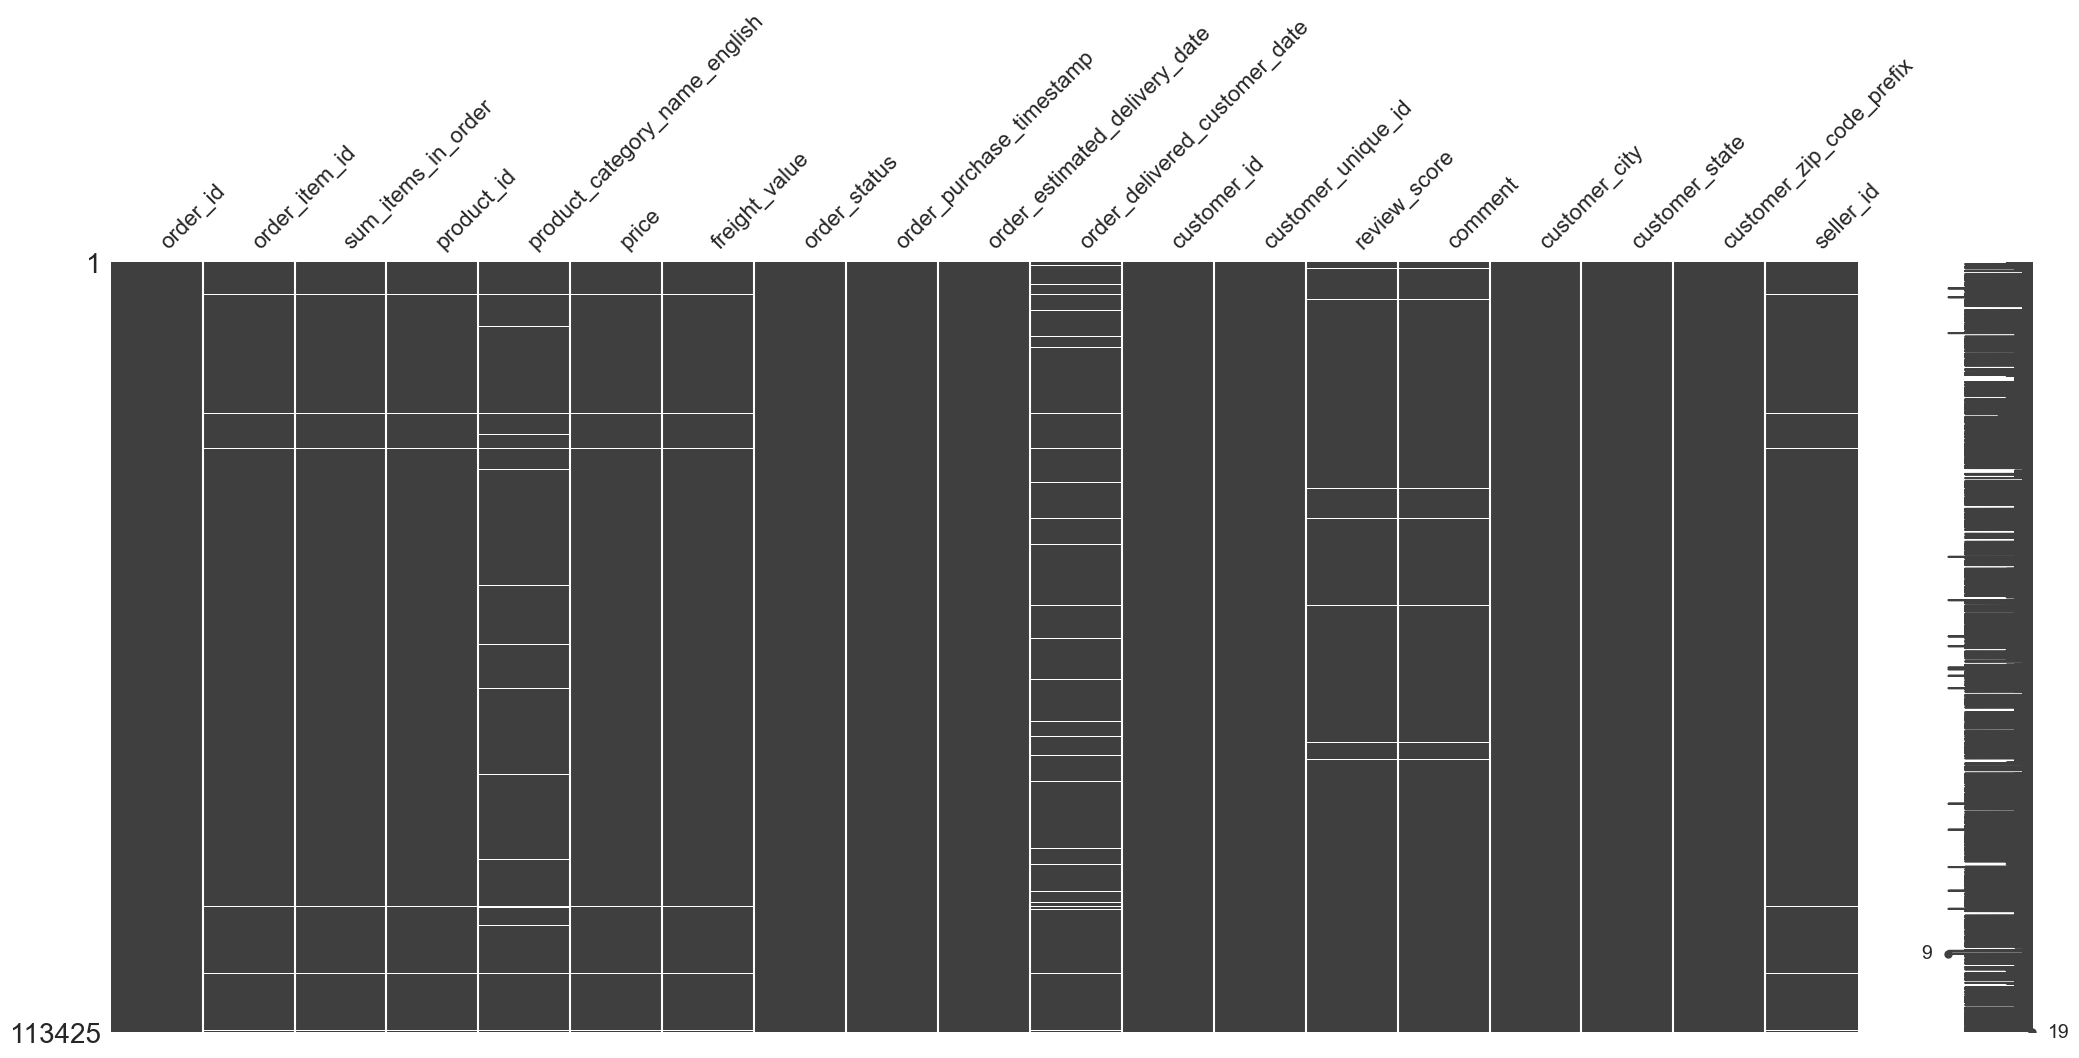

In [103]:
msno.matrix(master_df)

As we've explained in the data understanding section, most of the missing order_delivered_customer_date are normal because the item status aren't delivered, however there are some with delivered status and no delivery date, which needs to be eliminated.

Product category name with the 'unavailable'  delivery status is listed as nan.

In [104]:
master_df[(master_df['order_delivered_customer_date'].isnull()) & (master_df['order_status']=='delivered')]


order_id  order_item_id  sum_items_in_order  \
3376    2d1e2d5bf4dc7227b3bfebb81328c15f            1.0                 1.0   
23485   f5dd62b788049ad9fc0526e3ad11a097            1.0                 1.0   
49966   2ebdfc4f15f23b91474edf87475f108e            1.0                 1.0   
90294   e69f75a717d64fc5ecdfae42b2e8e086            1.0                 1.0   
94388   0d3268bad9b086af767785e3f0fc0133            1.0                 1.0   
105606  2d858f451373b04fb5c984a1cc2defaf            1.0                 1.0   
111339  ab7c89dc1bf4a1ead9d6ec1ec8968a84            1.0                 1.0   
111783  20edc82cf5400ce95e1afacc25798b31            1.0                 1.0   

                              product_id   product_category_name_english  \
3376    a50acd33ba7a8da8e9db65094fa990a4                            auto   
23485   2167c8f6252667c0eb9edd51520706a1  industry_commerce_and_business   
49966   e7d5464b94c9a5963f7c686fc80145ad                   watches_gifts   
90294   e7d5464b94c9a5963f7c686fc80145ad                   watches_gifts   
94388   ec165cd31c50585786ffda6feff5d0a6                            toys   
105606  30b5b5635a79548a48d04162d971848f                  sports_leisure   
111339  a2a7efc985315e86d4f0f705701b342b           computers_accessories   
111783  55bfa0307d7a46bed72c492259921231          books_general_interest   

         price  freight_value order_status order_purchase_timestamp  \
3376    117.30          17.53    delivered      2017-11-28 17:44:07   
23485   329.00          25.24    delivered      2018-06-20 06:58:43   
49966   139.00          19.07    delivered      2018-07-01 17:05:11   
90294   139.00          19.07    delivered      2018-07-01 22:05:55   
94388   188.99          15.63    delivered      2018-07-01 21:14:02   
105606  179.00          15.00    delivered      2017-05-25 23:22:43   
111339  110.99           9.13    delivered      2018-06-08 12:09:39   
111783   45.90           9.07    delivered      2018-06-27 16:09:12   

       order_estimated_delivery_date order_delivered_customer_date  \
3376                      2017-12-18                           NaT   
23485                     2018-07-16                           NaT   
49966                     2018-07-30                           NaT   
90294                     2018-07-30                           NaT   
94388                     2018-07-24                           NaT   
105606                    2017-06-23                           NaT   
111339                    2018-06-26                           NaT   
111783                    2018-07-19                           NaT   

                             customer_id                customer_unique_id  \
3376    ec05a6d8558c6455f0cbbd8a420ad34f  13467e882eb3a701826435ee4424f2bd   
23485   5e89028e024b381dc84a13a3570decb4  2f17c5b324ad603491521b279a9ff4de   
49966   29f0540231702fda0cfdee0a310f11aa  1bd06a0c0df8b23dacfd3725d2dc0bb9   
90294   cfda40ca8dd0a5d486a9635b611b398a  3bc508d482a402715be4d5cf4020cc81   
94388   4f1d63d35fb7c8999853b2699f5c7649  ebf7e0d43a78c81991a4c59c145c75db   
105606  e08caf668d499a6d643dafd7c5cc498a  d77cf4be2654aa70ef150f8bfec076a6   
111339  dd1b84a7286eb4524d52af4256c0ba24  cce5e8188bf42ffb3bb5b18ff58f5965   
111783  28c37425f1127d887d7337f284080a0f  175378436e2978be55b8f4316bce4811   

        review_score      comment    customer_city customer_state  \
3376             5.0  Has comment        cerquilho             SP   
23485            5.0  Has comment           quadra             SP   
49966            5.0   No comment  pindamonhangaba             SP   
90294            5.0   No comment           sumare             SP   
94388            5.0  Has comment       sao carlos             SP   
105606           5.0   No comment     porto alegre             RS   
111339           1.0  Has comment        guarulhos             SP   
111783           5.0  Has comment   ribeirao pires             SP   

        customer_zip_code_prefix       

In [105]:
master_df['order_delivered_customer_date'] = master_df['order_delivered_customer_date'].fillna(master_df['order_estimated_delivery_date'])

In [106]:
finder(master_df,'order_id', '2d1e2d5bf4dc7227b3bfebb81328c15f','equal')

order_id  order_item_id  sum_items_in_order  \
3376  2d1e2d5bf4dc7227b3bfebb81328c15f            1.0                 1.0   

                            product_id product_category_name_english  price  \
3376  a50acd33ba7a8da8e9db65094fa990a4                          auto  117.3   

      freight_value order_status order_purchase_timestamp  \
3376          17.53    delivered      2017-11-28 17:44:07   

     order_estimated_delivery_date order_delivered_customer_date  \
3376                    2017-12-18                    2017-12-18   

                           customer_id                customer_unique_id  \
3376  ec05a6d8558c6455f0cbbd8a420ad34f  13467e882eb3a701826435ee4424f2bd   

      review_score      comment customer_city customer_state  \
3376           5.0  Has comment     cerquilho             SP   

      customer_zip_code_prefix                         seller_id  
3376                     18520  8581055ce74af1daba164fdbd55a40de

Delivery anomalies are dealt with.

Along the line I also found some products that doesn't have a product category name but has a price. This will be problematic once we start to groupby so it's best we fill it with 'unknown'.

In [107]:
nulls = master_df[master_df['product_category_name_english'].isnull()]
nulls

order_id  order_item_id  sum_items_in_order  \
6       136cce7faa42fdb2cefd53fdc79a6098            1.0                 1.0   
122     bfe42c22ecbf90bc9f35cf591270b6a7            1.0                 1.0   
212     58ac1947c1a9067b9f416cba6d844a3f            1.0                 1.0   
264     e22b71f6e4a481445ec4527cb4c405f7            1.0                 1.0   
303     a094215e786240fcfefb83d18036a1cd            1.0                 1.0   
...                                  ...            ...                 ...   
113204  aaab15da689073f8f9aa978a390a69d1            NaN                 NaN   
113236  3a3cddda5a7c27851bd96c3313412840            NaN                 NaN   
113324  a89abace0dcc01eeb267a9660b5ac126            NaN                 NaN   
113325  a69ba794cc7deb415c3e15a0a3877e69            NaN                 NaN   
113397  5fabc81b6322c8443648e1b21a6fef21            NaN                 NaN   

                              product_id product_category_name_english  \
6       a1804276d9941ac0733cfd409f5206eb                           NaN   
122     71225f49be70df4297892f6a5fa62171                           NaN   
212     9820e04e332fc450d6fd975befc1bc28                           NaN   
264     3bc5164bc7f4be77002d6651da65c98c                           NaN   
303     5a848e4ab52fd5445cdc07aab1c40e48                           NaN   
...                                  ...                           ...   
113204                               NaN                           NaN   
113236                               NaN                           NaN   
113324                               NaN                           NaN   
113325                               NaN                           NaN   
113397                               NaN                           NaN   

         price  freight_value order_status order_purchase_timestamp  \
6        49.90          16.05     invoiced      2017-04-11 12:22:08   
122      27.30          15.10    delivered      2018-01-27 22:04:34   
212     110.00          14.16    delivered      2017-09-13 09:18:50   
264      22.50          11.74    delivered      2017-04-22 13:48:18   
303     122.99           9.06    delivered      2018-02-08 18:56:45   
...        ...            ...          ...                      ...   
113204     NaN            NaN  unavailable      2018-01-16 14:27:59   
113236     NaN            NaN     canceled      2018-08-31 16:13:44   
113324     NaN            NaN     canceled      2018-09-06 18:45:47   
113325     NaN            NaN  unavailable      2017-08-23 16:28:04   
113397     NaN            NaN  unavailable      2017-10-10 10:50:03   

       order_estimated_delivery_date order_delivered_customer_date  \
6                         2017-05-09           2017-05-09 00:00:00   
122                       2018-02-26           2018-02-09 20:16:40   
212                       2017-09-25           2017-09-21 21:16:17   
264                       2017-05-11           2017-05-02 15:45:27   
303                       2018-02-22           2018-02-19 13:28:50   
...                              ...                           ...   
113204                    2018-02-06           2018-02-06 00:00:00   
113236                    2018-10-01           2018-10-01 00:00:00   
113324                    2018-09-27           2018-09-27 00:00:00   
113325                    2017-09-15           2017-09-15 00:00:00   
113397                    2017-10-23           2017-10-23 00:00:00   

                             customer_id                customer_unique_id  \
6       ed0271e0b7da060a393796590e7b737a  36edbb3fb164b1f16485364b6fb04c73   
122     803ac05904124294f8767894d6da532b  34c58672601f2c6d29db7efd1f6bf958   
212     ee8e1d37f563ecc11cc4dcb4dfd794c2  5cbf29b2dcf212a6a5d864b887238c72   
264     1faf89c8f142db3fca6cf314c51a37b6  1268b060098ed3f22c2e7c34cc72a1a8   
303     86acfb656743da0c113d176832c9d535  f5cb81f98962f7504bef1e75579b6dff   
...                             

In [108]:
#filling the product_category_name but only the ones with price values.
master_df.loc[master_df['price'].notnull(), 'product_category_name_english'] = master_df.loc[master_df['price'].notnull(), 'product_category_name_english'].fillna('unknown')

In [109]:
master_df

order_id  order_item_id  sum_items_in_order  \
0       e481f51cbdc54678b7cc49136f2d6af7            1.0                 1.0   
1       53cdb2fc8bc7dce0b6741e2150273451            1.0                 1.0   
2       47770eb9100c2d0c44946d9cf07ec65d            1.0                 1.0   
3       949d5b44dbf5de918fe9c16f97b45f8a            1.0                 1.0   
4       ad21c59c0840e6cb83a9ceb5573f8159            1.0                 1.0   
...                                  ...            ...                 ...   
113420  63943bddc261676b46f01ca7ac2f7bd8            1.0                 1.0   
113421  83c1379a015df1e13d02aae0204711ab            1.0                 1.0   
113422  11c177c8e97725db2631073c19f07b62            1.0                 2.0   
113423  11c177c8e97725db2631073c19f07b62            2.0                 2.0   
113424  66dea50a8b16d9b4dee7af250b4be1a5            1.0                 1.0   

                              product_id product_category_name_english  \
0       87285b34884572647811a353c7ac498a                    housewares   
1       595fac2a385ac33a80bd5114aec74eb8                     perfumery   
2       aa4383b373c6aca5d8797843e5594415                          auto   
3       d0b61bfb1de832b15ba9d266ca96e5b0                      pet_shop   
4       65266b2da20d04dbe00c5c2d3bb7859e                    stationery   
...                                  ...                           ...   
113420  f1d4ce8c6dd66c47bbaa8c6781c2a923                          baby   
113421  b80910977a37536adeddd63663f916ad             home_appliances_2   
113422  d1c427060a0f73f6b889a5c7c61f2ac4         computers_accessories   
113423  d1c427060a0f73f6b889a5c7c61f2ac4         computers_accessories   
113424  006619bbed68b000c8ba3f8725d5409e                 health_beauty   

         price  freight_value order_status order_purchase_timestamp  \
0        29.99           8.72    delivered      2017-10-02 10:56:33   
1       118.70          22.76    delivered      2018-07-24 20:41:37   
2       159.90          19.22    delivered      2018-08-08 08:38:49   
3        45.00          27.20    delivered      2017-11-18 19:28:06   
4        19.90           8.72    delivered      2018-02-13 21:18:39   
...        ...            ...          ...                      ...   
113420  174.90          20.10    delivered      2018-02-06 12:58:58   
113421  205.99          65.02    delivered      2017-08-27 14:46:43   
113422  179.99          40.59    delivered      2018-01-08 21:28:27   
113423  179.99          40.59    delivered      2018-01-08 21:28:27   
113424   68.50          18.36    delivered      2018-03-08 20:57:30   

       order_estimated_delivery_date order_delivered_customer_date  \
0                         2017-10-18           2017-10-10 21:25:13   
1                         2018-08-13           2018-08-07 15:27:45   
2                         2018-09-04           2018-08-17 18:06:29   
3                         2017-12-15           2017-12-02 00:28:42   
4                         2018-02-26           2018-02-16 18:17:02   
...                              ...                           ...   
113420                    2018-03-02           2018-02-28 17:37:56   
113421                    2017-09-27           2017-09-21 11:24:17   
113422                    2018-02-15           2018-01-25 23:32:54   
113423                    2018-02-15           2018-01-25 23:32:54   
113424                    2018-04-03           2018-03-16 13:08:30   

                             customer_id                customer_unique_id  \
0       9ef432eb6251297304e76186b10a928d  7c396fd4830fd04220f754e42b4e5bff   
1       b0830fb4747a6c6d20dea0b8c802d7ef  af07308b275d755c9edb36a90c618231   
2       41ce2a54c0b03bf3443c3d931a367089  3a653a41f6f9fc3d2a113cf8398680e8   
3       f88197465ea7920adcdbec7375364d82  7c142cf63193a1473d2e66489a9ae977   
4       8ab97904e6daea8866dbdbc4fb7aad2c  72632f0f9dd73dfee390c9b22eb56dd6   
...                             

In [110]:
finder(master_df,'product_category_name_english','unknown','equal')

order_id  order_item_id  sum_items_in_order  \
6       136cce7faa42fdb2cefd53fdc79a6098            1.0                 1.0   
122     bfe42c22ecbf90bc9f35cf591270b6a7            1.0                 1.0   
212     58ac1947c1a9067b9f416cba6d844a3f            1.0                 1.0   
264     e22b71f6e4a481445ec4527cb4c405f7            1.0                 1.0   
303     a094215e786240fcfefb83d18036a1cd            1.0                 1.0   
...                                  ...            ...                 ...   
112996  1a10e938a1c7d8e5eecc3380f71ca76b            1.0                 1.0   
113166  e33865519137f5737444109ae8438633            1.0                 1.0   
113173  f0dd9af88d8ef5a8e4670fbbedaf19c4            1.0                 1.0   
113179  272874573723eec18f23c0471927d778            1.0                 1.0   
113197  dff2b9b8d7cfc595836945e1443789c3            1.0                 1.0   

                              product_id product_category_name_english  \
6       a1804276d9941ac0733cfd409f5206eb                       unknown   
122     71225f49be70df4297892f6a5fa62171                       unknown   
212     9820e04e332fc450d6fd975befc1bc28                       unknown   
264     3bc5164bc7f4be77002d6651da65c98c                       unknown   
303     5a848e4ab52fd5445cdc07aab1c40e48                       unknown   
...                                  ...                           ...   
112996  8d39a63db6a98e40571f486e0c711cf7                       unknown   
113166  e9cbc0910ab050cbd92fbeb051c270ea                       unknown   
113173  0c877471e35049402bca235e06cb8063                       unknown   
113179  5a848e4ab52fd5445cdc07aab1c40e48                       unknown   
113197  bfa0e398bef2d28bb421d42997982cab                       unknown   

         price  freight_value order_status order_purchase_timestamp  \
6        49.90          16.05     invoiced      2017-04-11 12:22:08   
122      27.30          15.10    delivered      2018-01-27 22:04:34   
212     110.00          14.16    delivered      2017-09-13 09:18:50   
264      22.50          11.74    delivered      2017-04-22 13:48:18   
303     122.99           9.06    delivered      2018-02-08 18:56:45   
...        ...            ...          ...                      ...   
112996  127.20          18.99    delivered      2018-07-25 08:58:35   
113166   33.85           8.29    delivered      2018-05-28 00:44:06   
113173   84.90          15.35    delivered      2017-09-02 20:38:29   
113179  122.99           9.06    delivered      2017-12-20 23:10:33   
113197  219.99          15.13    delivered      2018-07-16 12:59:02   

       order_estimated_delivery_date order_delivered_customer_date  \
6                         2017-05-09           2017-05-09 00:00:00   
122                       2018-02-26           2018-02-09 20:16:40   
212                       2017-09-25           2017-09-21 21:16:17   
264                       2017-05-11           2017-05-02 15:45:27   
303                       2018-02-22           2018-02-19 13:28:50   
...                              ...                           ...   
112996                    2018-08-10           2018-08-01 19:28:20   
113166                    2018-06-20           2018-06-01 22:25:39   
113173                    2017-09-19           2017-09-15 14:59:50   
113179                    2018-01-09           2017-12-26 22:29:32   
113197                    2018-08-07           2018-07-20 20:41:32   

                             customer_id                customer_unique_id  \
6       ed0271e0b7da060a393796590e7b737a  36edbb3fb164b1f16485364b6fb04c73   
122     803ac05904124294f8767894d6da532b  34c58672601f2c6d29db7efd1f6bf958   
212     ee8e1d37f563ecc11cc4dcb4dfd794c2  5cbf29b2dcf212a6a5d864b887238c72   
264     1faf89c8f142db3fca6cf314c51a37b6  1268b060098ed3f22c2e7c34cc72a1a8   
303     86acfb656743da0c113d176832c9d535  f5cb81f98962f7504bef1e75579b6dff   
...                             

In [111]:
category_unique_values = master_df['product_category_name_english'].unique().tolist()
category_unique_values

['housewares',
 'perfumery',
 'auto',
 'pet_shop',
 'stationery',
 'unknown',
 'furniture_decor',
 'office_furniture',
 'garden_tools',
 'computers_accessories',
 'bed_bath_table',
 'toys',
 'construction_tools_construction',
 'telephony',
 'health_beauty',
 'electronics',
 'baby',
 'cool_stuff',
 'watches_gifts',
 'air_conditioning',
 'sports_leisure',
 'books_general_interest',
 'small_appliances',
 'food',
 'luggage_accessories',
 'fashion_underwear_beach',
 'christmas_supplies',
 'fashion_bags_accessories',
 'musical_instruments',
 'construction_tools_lights',
 'books_technical',
 'costruction_tools_garden',
 'home_appliances',
 'market_place',
 'agro_industry_and_commerce',
 'party_supplies',
 'home_confort',
 'cds_dvds_musicals',
 'industry_commerce_and_business',
 'consoles_games',
 'furniture_bedroom',
 'construction_tools_safety',
 'fixed_telephony',
 'drinks',
 'kitchen_dining_laundry_garden_furniture',
 nan,
 'fashion_shoes',
 'home_construction',
 'audio',
 'home_appliances

Found some typos. Not sure if this is overkill or not but I feel compelled to fix them.

List of typos:
- home_confort
- costruction_tools_tools
- fashio_female_clothing
- costruction_tools_tools
- costruction_tools_garden

In [112]:
typos = {'home_confort': 'home_comfort', 'costruction_tools_tools': 'construction_tools_tools', 'fashio_female_clothing': 'fashion_female_clothing', 'costruction_tools_garden':'construction_tools_garden'}

master_df['product_category_name_english'] = master_df['product_category_name_english'].replace(typos)


In [113]:
finder(master_df,"product_category_name_english","home_comfort","equal").head(2)

order_id  order_item_id  sum_items_in_order  \
218  5487a8ac1699754d975f853ce8bb9321            1.0                 1.0   
337  c26b94aa87e95d1c1eb1b592f43eb223            2.0                 2.0   

                           product_id product_category_name_english   price  \
218  73e0db4719016f90a37238ca8e5a1cab                  home_comfort  159.99   
337  35afc973633aaeb6b877ff57b2793310                  home_comfort   89.90   

     freight_value order_status order_purchase_timestamp  \
218          27.20    delivered      2018-03-29 14:29:44   
337          12.13    delivered      2017-06-29 00:10:49   

    order_estimated_delivery_date order_delivered_customer_date  \
218                    2018-04-20           2018-04-08 16:22:04   
337                    2017-07-19           2017-07-10 17:36:56   

                          customer_id                customer_unique_id  \
218  a51b373c427132a77b112ca10f502c4f  995fe9426f030109b1614044edaf46d9   
337  7aed8da5ae4e0e34226c47f3bf041956  7e69734dad7cfcbe95aa59f38095057d   

     review_score      comment customer_city customer_state  \
218           3.0  Has comment     sao paulo             SP   
337           5.0  Has comment        osasco             SP   

     customer_zip_code_prefix                         seller_id  
218                      2537  11305281b50fff20ae8bb473f8e11876  
337                      6144  4a3ca9315b744ce9f8e9374361493884

In [114]:
finder(master_df,"product_category_name_english","home_confort","equal").head(2)

Empty DataFrame
Columns: [order_id, order_item_id, sum_items_in_order, product_id, product_category_name_english, price, freight_value, order_status, order_purchase_timestamp, order_estimated_delivery_date, order_delivered_customer_date, customer_id, customer_unique_id, review_score, comment, customer_city, customer_state, customer_zip_code_prefix, seller_id]
Index: []

Typos fixed.

### Column Description Cheatsheet

In [115]:
master_display = master_df.describe(include='all').T
master_display = pd.DataFrame(master_display)
master_display["desc"] = ["Unique identifier of an order", "Sequence of items per order",
                          "Total amount of item in order",
                          "Product unique identifier.", 
                          "Category name in English", "Item price",
                          "Cost of freight / delivery", "Last status of order.", 
                          "When order was made.", "When customer is told order would arrive.",
                          "Actual delivery date to customer.", "Unique customer per order",
                          "Identifier of customer", "Score / rating", 
                          "Has comment or not",
                          "City customer in", "State customer in",
                          "Zip code for joining lat/long", "unique id of seller"]

#in case we forget which column's for what
dtype_list = master_df.dtypes.tolist()
master_display["dtype"] = dtype_list
master_display


C:\Users\santo\AppData\Local\Temp\ipykernel_26988\580463191.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  master_display = master_df.describe(include='all').T
C:\Users\santo\AppData\Local\Temp\ipykernel_26988\580463191.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  master_display = master_df.describe(include='all').T
C:\Users\santo\AppData\Local\Temp\ipykernel_26988\580463191.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence

count unique  \
order_id                         113425  99441   
order_item_id                  112650.0    NaN   
sum_items_in_order             112650.0    NaN   
product_id                       112650  32951   
product_category_name_english    112650     74   
price                          112650.0    NaN   
freight_value                  112650.0    NaN   
order_status                     113425      8   
order_purchase_timestamp         113425  98875   
order_estimated_delivery_date    113425    459   
order_delivered_customer_date    113425  96088   
customer_id                      113425  99441   
customer_unique_id               113425  96096   
review_score                   112464.0    NaN   
comment                          112464      2   
customer_city                    113425   4119   
customer_state                   113425     27   
customer_zip_code_prefix       113425.0    NaN   
seller_id                        112650   3095   

                                                            top    freq  \
order_id                       8272b63d03f5f79c56e9e4120aec44ef      21   
order_item_id                                               NaN     NaN   
sum_items_in_order                                          NaN     NaN   
product_id                     aca2eb7d00ea1a7b8ebd4e68314663af     527   
product_category_name_english                    bed_bath_table   11115   
price                                                       NaN     NaN   
freight_value                                               NaN     NaN   
order_status                                          delivered  110197   
order_purchase_timestamp                    2017-07-16 18:19:25      21   
order_estimated_delivery_date               2017-12-20 00:00:00     611   
order_delivered_customer_date               2018-02-06 00:00:00      24   
customer_id                    fc3d1daec319d62d49bfb5e1f83123e9      21   
customer_unique_id             c8460e4251689ba205045f3ea17884a1      24   
review_score                                                NaN     NaN   
comment                                              No comment   64531   
customer_city                                         sao paulo   17946   
customer_state                                               SP   47820   
customer_zip_code_prefix                                    NaN     NaN   
seller_id                      6560211a19b47992c3666cc44a7e94c0    2033   

                                            first                last  \
order_id                                      NaT                 NaT   
order_item_id                                 NaT                 NaT   
sum_items_in_order                            NaT                 NaT   
product_id                                    NaT                 NaT   
product_category_name_english                 NaT                 NaT   
price                                         NaT                 NaT   
freight_value                                 NaT                 NaT   
order_status                                  NaT                 NaT   
order_purchase_timestamp      2016-09-04 21:15:19 2018-10-17 17:30:18   
order_estimated_delivery_date 2016-09-30 00:00:00 2018-11-12 00:00:00   
order_delivered_customer_date 2016-09-30 00:00:00 2018-11-12 00:00:00   
customer_id                                   NaT                 NaT   
customer_unique_id                            NaT                 NaT   
review_score                                  NaT                 NaT   
comment                                       NaT                 NaT   
customer_city                                 NaT                 NaT   
customer_state                                NaT                 NaT   
customer_zip_code_prefix                      NaT                 NaT   
seller_id                                     NaT                 NaT   

                                       mean           std     min      

In [116]:
df_order.describe() #unique count for order_id different because removed 8 anomalies

order_id                       customer_id  \
count                              99441                             99441   
unique                             99441                             99441   
top     e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
freq                                   1                                 1   

       order_status order_purchase_timestamp    order_approved_at  \
count         99441                    99441                99281   
unique            8                    98875                90733   
top       delivered      2018-04-11 10:48:14  2018-02-27 04:31:10   
freq          96478                        3                    9   

       order_delivered_carrier_date order_delivered_customer_date  \
count                         97658                         96476   
unique                        81018                         95664   
top             2018-05-09 15:48:00           2018-05-08 23:38:46   
freq                             47                             3   

       order_estimated_delivery_date  
count                          99441  
unique                           459  
top              2017-12-20 00:00:00  
freq                             522

# EDA

In [117]:
# Temp

brazil = ["#009739","#FDD301"]
brazil_blue = ["#012169", "#FDD301"]
brazil_r = brazil[::-1]
gb = ['#009C3B','#002776'] #greenblue
basic = ['blue', 'green', 'red', 'purple', 'orange']

sns.color_palette(brazil)

[(0.0, 0.592156862745098, 0.2235294117647059),
 (0.9921568627450981, 0.8274509803921568, 0.00392156862745098)]

## Deciding our focus

First we're curious about how many items actually get delivered.

[Text(5, 0, '96478'), Text(5, 0, '609')]

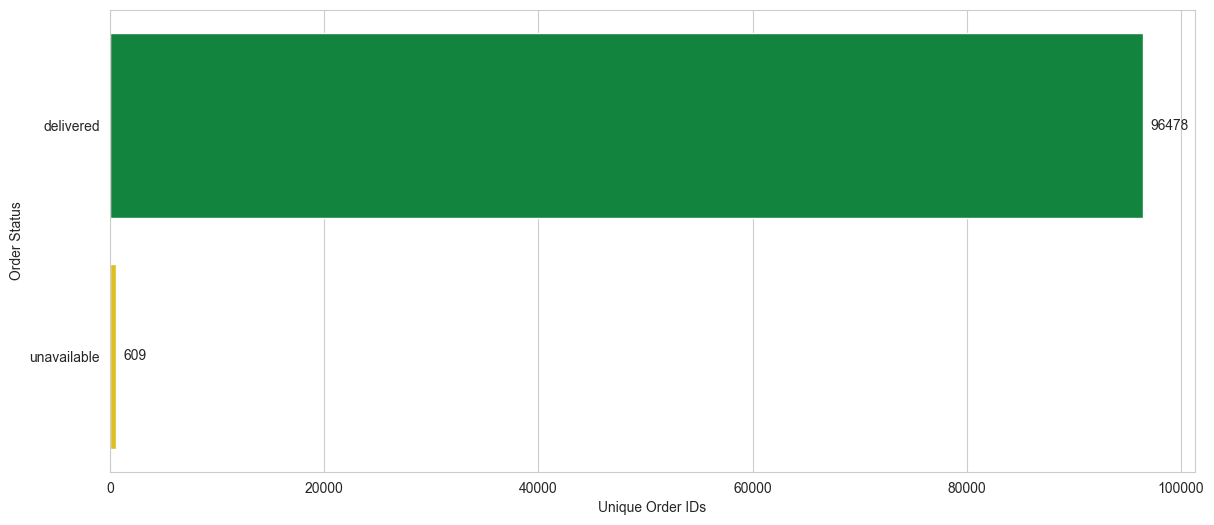

In [118]:
order_status = master_df.groupby("order_status")["order_id"].nunique().sort_values(ascending=False).reset_index()
order_status = order_status[order_status["order_status"].isin(["delivered", "unavailable"])]

order_status

plt.figure(figsize=(14,6))
ax = sns.barplot(data=order_status,
                 y="order_status",
                 x="order_id",
                 order=order_status["order_status"].value_counts().index,
                 palette=brazil)
ax.set(xlabel="Unique Order IDs", ylabel="Order Status")
ax.bar_label(ax.containers[0],padding=5)

In [119]:
available_revenue = round(master_df[master_df['order_status'] == 'delivered']['price'].sum(),2)

total_revenue = round(master_df['price'].sum(),2)

potential_loss = round(total_revenue - available_revenue,2)

loss_usd = round(potential_loss * 0.3272,2) 

print(f"Total revenue in dataframe  : {total_revenue:,}",
      f"\nAvailable revenue           : {available_revenue:,}",
      f"\nPotential loss              : {potential_loss:,}",
      f"\nPotential loss USD          : {loss_usd:,}")

Total revenue in dataframe  : 13,591,643.7 
Available revenue           : 13,221,498.11 
Potential loss              : 370,145.59 
Potential loss USD          : 121,111.64


Assuming once the item is delivered the sales process is concluded, we assume the entries with `delivered` `order_status` as completed sales process. All other status either show that the item has not yet been delivered, or will ever be, or out of stock and cancelled, which we do not consider them to be completed.

With this in mind, accumulating all of the total revenue listed in the dataframe and subtracting it with rows that are not delivered, there is a potential loss of around 370,145 Brazilian Real.

This, according to [Exchange Rates](https://www.exchangerates.org.uk/BRL-USD-spot-exchange-rates-history-2017.html#:~:text=Average%20exchange%20rate%20in%202017%3A%200.3134%20USD.), translates to $121,111.64 in 2017.

This amount is not small, especially for a start up company like Olist that frontlines for small medium enterprises.

In [120]:
#getting rid of duplicate orders, relying on sum_items_in_order
daily_items_sold = master_df.drop_duplicates(subset=["order_id"])

#groupby to get numbers / day
daily_items_sold = daily_items_sold.groupby(daily_items_sold['order_purchase_timestamp'].dt.date)['sum_items_in_order'].sum()


In [121]:
daily_items_sold.head(5)

order_purchase_timestamp
2016-09-04    2.0
2016-09-05    1.0
2016-09-13    0.0
2016-09-15    3.0
2016-10-02    1.0
Name: sum_items_in_order, dtype: float64

There appears to be incomplete dates included in the dataframe that needs to be filled to get a more accurate visualization.

In [122]:
# df with full range of dates
date_range = pd.date_range(start=daily_items_sold.index.min(), end=daily_items_sold.index.max())

# filling as 0 to signify no sales
daily_items_sold = daily_items_sold.reindex(date_range, fill_value=0)

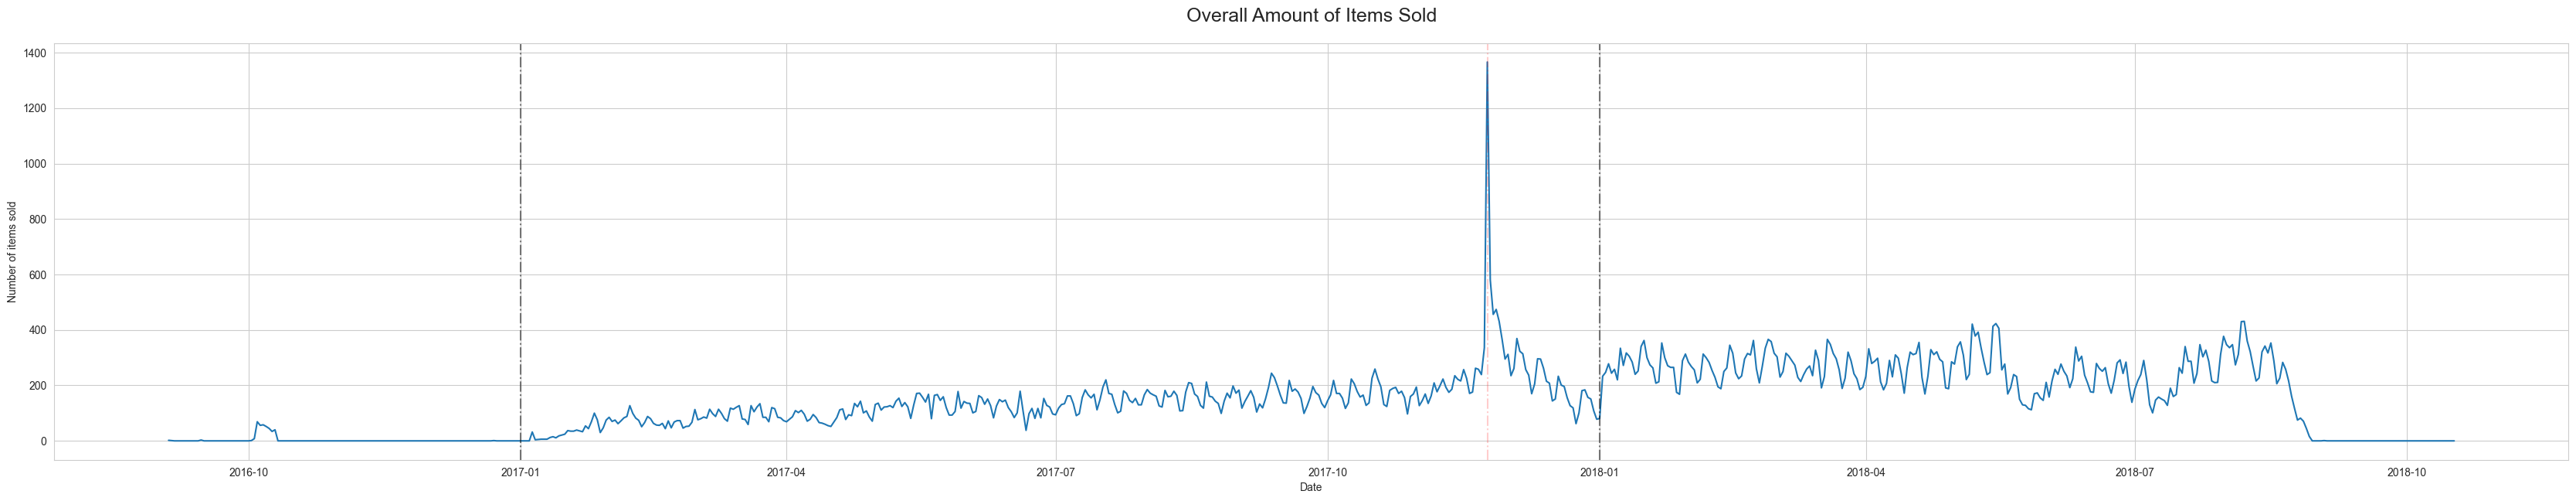

In [123]:

plt.figure(figsize=(42,7))

plt.plot(daily_items_sold.index, daily_items_sold.values)
plt.axvline(x=pd.to_datetime('2017-01-01'), linestyle='-.', color='black',alpha=0.5)
plt.axvline(x=pd.to_datetime('2018-01-01'), linestyle='-.', color='black',alpha=0.5)
plt.axvline(x=pd.to_datetime('2017-11-24'), linestyle='-.', color='red',alpha=0.2)
plt.xlabel('Date')
plt.ylabel('Number of items sold')
plt.title('Overall Amount of Items Sold',pad=20,fontsize="18")
plt.show()

We can see from the visualization results above, there is an anomalous trend at the end of 2016 to the beginning of 2017. Crosschecking with outside sources, this may be because Olist was just starting to operate after its inception in 2015, which explains why there were missing dates for quite a long time between October 2016 to January 2017.

Regular sales activity starts to be seen in January 2017 with a steady pattern until a slight spike in April, and some significant spikes before it reached a significant spike, marked by the faint red line, which happened on 2017 - 11 - 24, the last Friday of November, which turns out to be Black Friday. Unfortunately we don't have information of Black Friday sales in 2018 for comparison.

Steep fall from Black Friday and steady decline slope until January where items sold climbs again. Seasonal pattern starts to show and there is one more spike, the highest so far in 2018, excluding 2018 Black Friday, and then a steady seasaonal pattern until May where there's a decline.

Same activity until there's a slight spike in August and flatlines before October 2018.

Because there are many types of product sold on Olist, over 70 categories, it's best to choose the right one to focus on first. In order for us to be able to choose the right one, we'll try to take a look at the situation from a broader perspective.

Text(0.5, 1.0, 'Top 10 Overall Least Ordered Items')

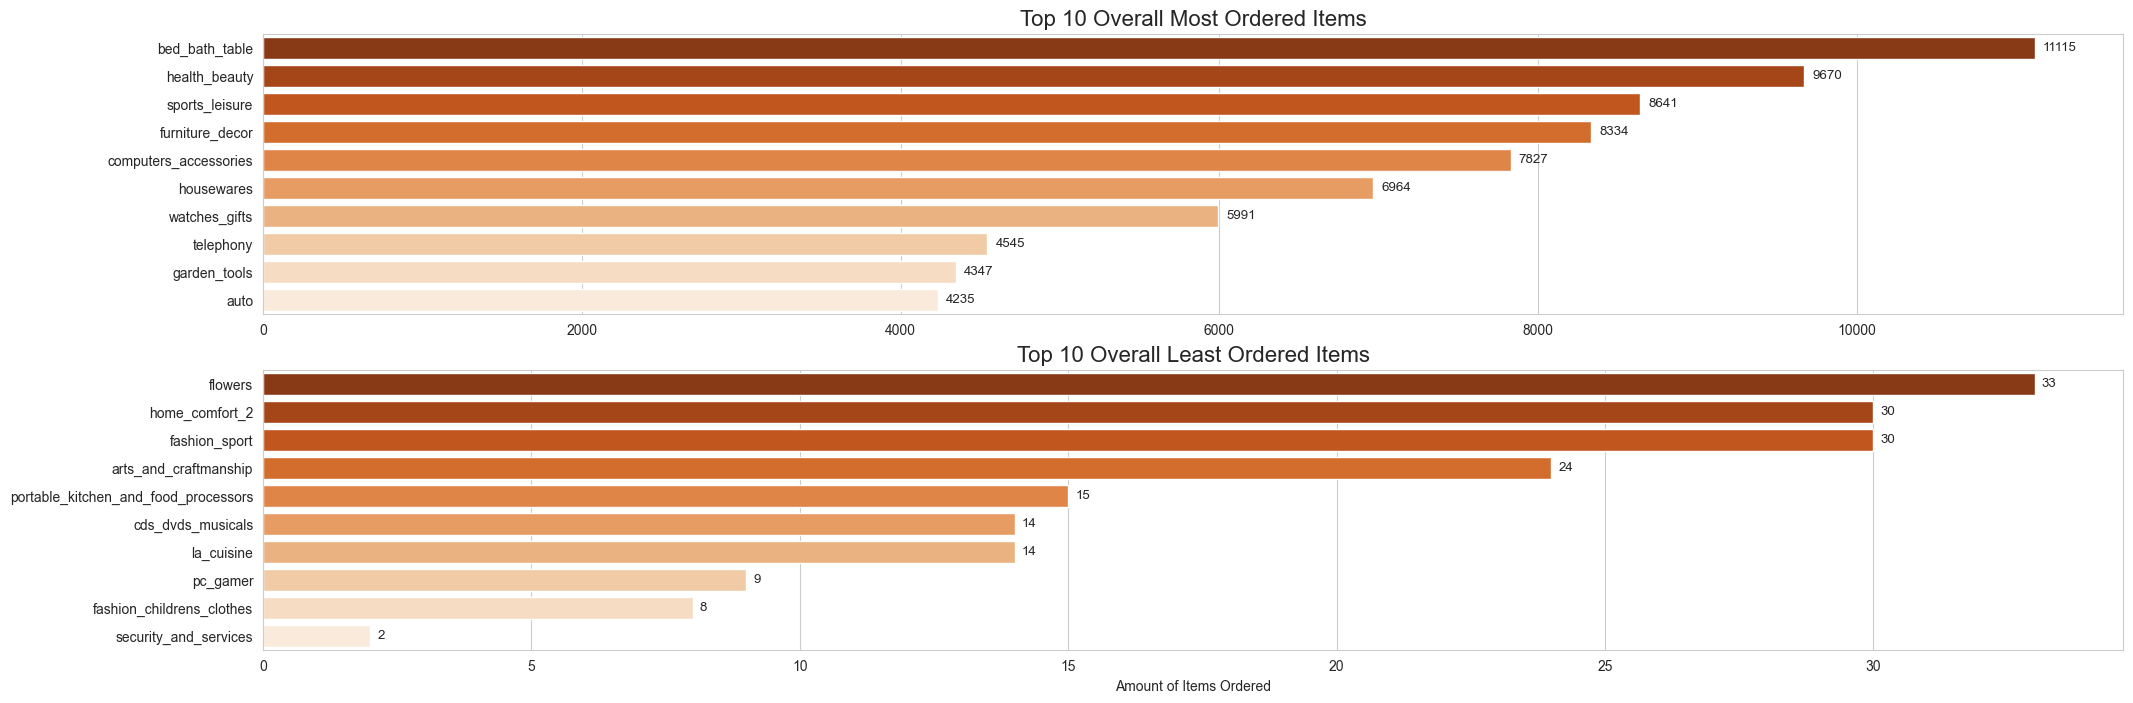

In [124]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(24, 8))

# Top
sns.set(font_scale=0.8)
ax1 = sns.countplot(data=master_df, y="product_category_name_english", palette ="Oranges_r",
                    order=master_df["product_category_name_english"].value_counts().index[:10],
                    ax=axs[0])
ax1.set_ylabel("", labelpad=0.001)
ax1.set_xlabel("")
ax1.bar_label(ax1.containers[0], padding=6)
ax1.set_title("Top 10 Overall Most Ordered Items", fontsize=16)

# Bottom
sns.set(font_scale=0.8)
ax2 = sns.countplot(data=master_df, y="product_category_name_english", palette ="Oranges_r",
                    order=master_df["product_category_name_english"].value_counts().index[-10:],
                    ax=axs[1])
ax2.set_ylabel("", labelpad=0.01)
ax2.set_xlabel("Amount of Items Ordered")
ax2.bar_label(ax2.containers[0], padding=5)
ax2.set_title("Top 10 Overall Least Ordered Items", fontsize=16)






From here we have an idea of which are the top 10 selling items and which items are at the bottom 10. From here we're going to narrow our findings even further to focus on the top 5 and the shares. 

Text(0.5, 1.0, 'Top 5 Ordered Items 2018')

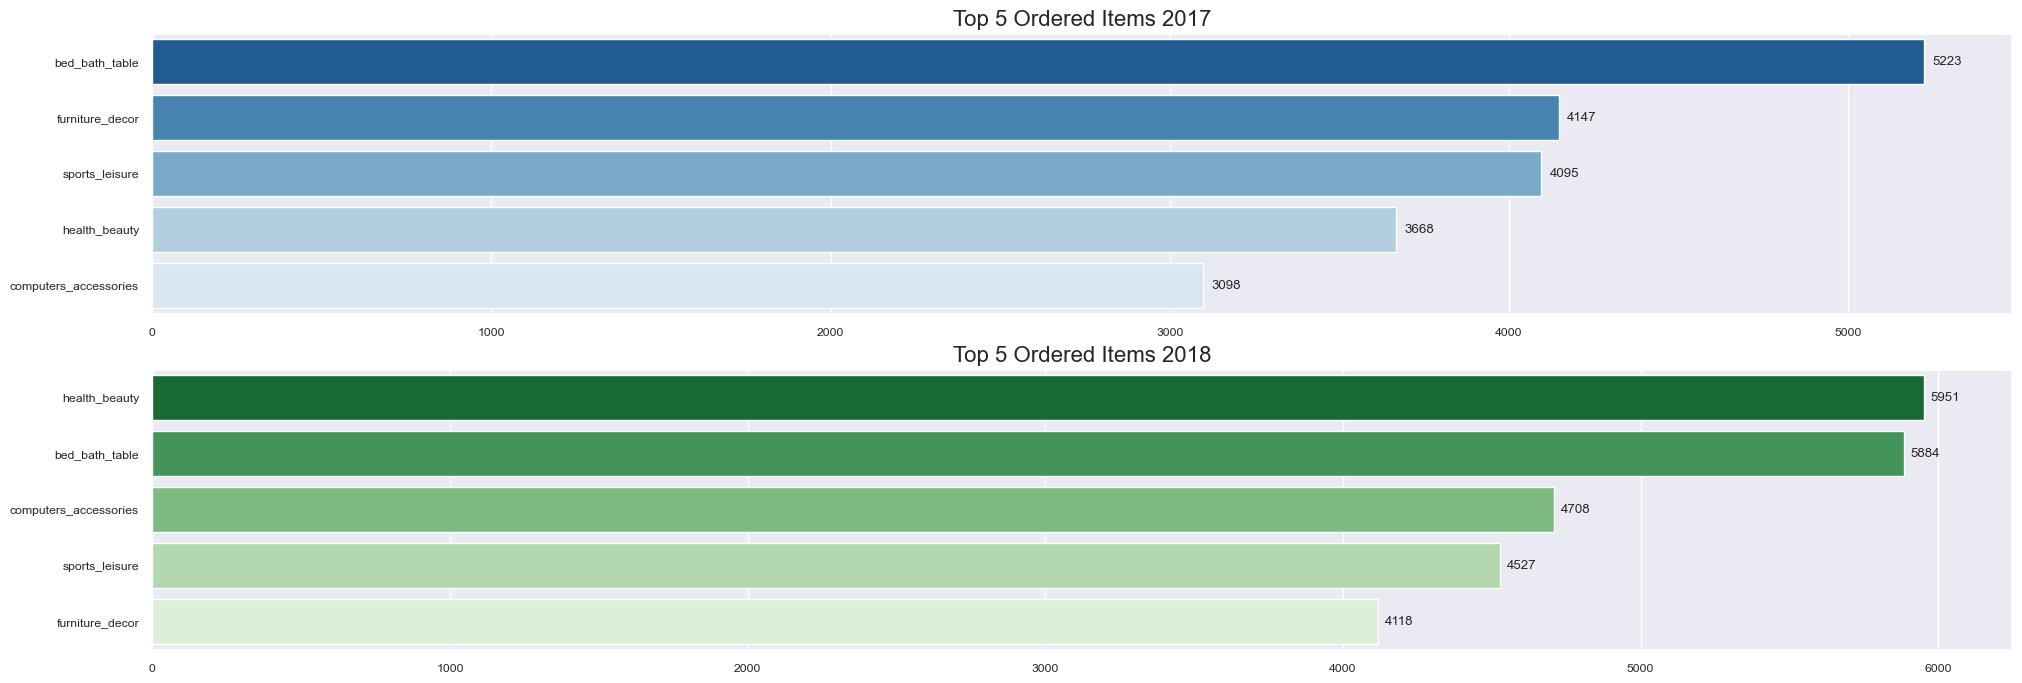

In [125]:
master_df_2017 = master_df[master_df['order_purchase_timestamp'].dt.year == 2017]
master_df_2018 = master_df[master_df['order_purchase_timestamp'].dt.year == 2018]

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(24, 8))

#top
sns.set(font_scale=0.8)
ax1 = sns.countplot(data=master_df_2017, y="product_category_name_english", palette ="Blues_r",
                    order=master_df_2017["product_category_name_english"].value_counts().index[:5],
                    ax=axs[0])
ax1.set_ylabel("", labelpad=0.001)
ax1.set_xlabel("")
ax1.bar_label(ax1.containers[0], padding=6)
ax1.set_title("Top 5 Ordered Items 2017", fontsize=16)

#bottom
sns.set(font_scale=0.8)
ax2 = sns.countplot(data=master_df_2018, y="product_category_name_english", palette ="Greens_r",
                    order=master_df_2018["product_category_name_english"].value_counts().index[:5],
                    ax=axs[1])
ax2.set_ylabel("", labelpad=0.001)
ax2.set_xlabel("")
ax2.bar_label(ax2.containers[0], padding=5)
ax2.set_title("Top 5 Ordered Items 2018", fontsize=16)

Above is the comparison of the top 5 items ordered in 2017 and 2018. Note that there are missing months in 2018 and the chart only represents ordered items up to October 2018.

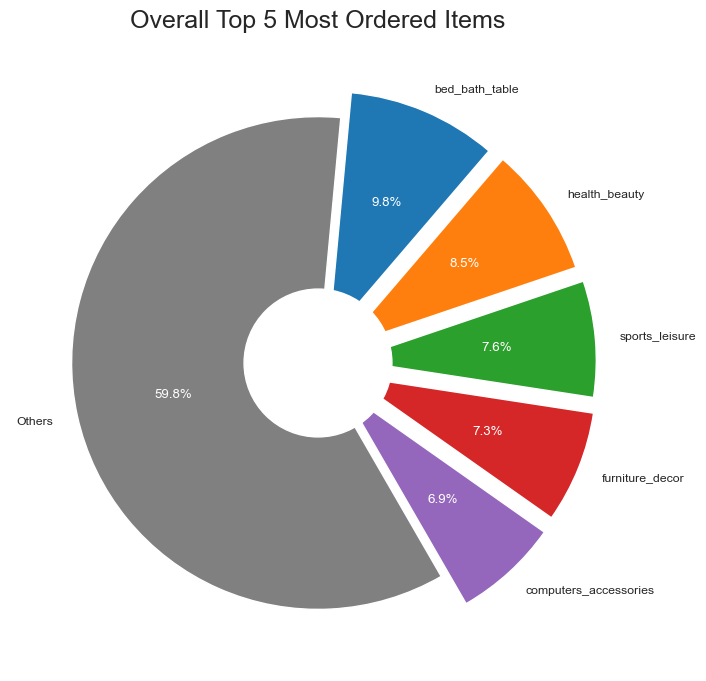

In [126]:
#copy so I don't mess up
pie5 = master_df.copy()

#top 5
top_categories = pie5['product_category_name_english'].value_counts().nlargest(5).index

#the rest
pie5.loc[~pie5['product_category_name_english'].isin(top_categories), 'product_category_name_english'] = 'Others'

#category values
category_counts = pie5['product_category_name_english'].value_counts()


#setting color, greying out the 'others' to focus on the top 5, others is just used as comparison with the rest.
colormap = plt.cm.tab10
colors_dict = {}
colors_dict['Others'] = 'grey'
for i, category in enumerate(top_categories):
    colors_dict[category] = colormap(i)

#pie
fig,ax = plt.subplots(figsize=(8,8))
_,_, autotexts = plt.pie(category_counts, labels=category_counts.index, 
                         autopct='%1.1f%%', startangle=-60,
                         counterclock=False,
                         explode=(0.00,0.11,0.12,0.13,0.14,0.15,),
                         colors=[colors_dict.get(category, colormap(len(colors_dict))) for category in category_counts.index])

plt.title('Overall Top 5 Most Ordered Items',pad=20,fontsize="18")

#text color
for i in autotexts:

    i.set_color("white")

#fancy art stuff
circle = plt.Circle((-0.0,-0.0),0.3,color="white")

ax.add_artist(circle)

plt.show()

The top 5 categories account for 40.2% of the total items sold, indicating that these items are the most popular. The share of the 5 items is relatively evenly distributed, with no significant differences in popularity.

Because there's a possibility for the top 5 categories in 2018 to show the same category from the plot above, we're going to extract the colors to use for a dictionary, so the colors could remain the same, for your convenience.

In [127]:
import matplotlib.colors as mcolors

#Extracting Colors
for i, category in enumerate(top_categories):
    color = colors_dict.get(category, colormap(len(colors_dict)))
    rgba_color = mcolors.to_rgba(color)
    color_name = mcolors.to_hex(rgba_color)
    print(f"Category: {category}, Color: {color_name}")

Category: bed_bath_table, Color: #1f77b4
Category: health_beauty, Color: #ff7f0e
Category: sports_leisure, Color: #2ca02c
Category: furniture_decor, Color: #d62728
Category: computers_accessories, Color: #9467bd


[Text(0, 5, '5223'),
 Text(0, 5, '4147'),
 Text(0, 5, '4095'),
 Text(0, 5, '3668'),
 Text(0, 5, '3098')]

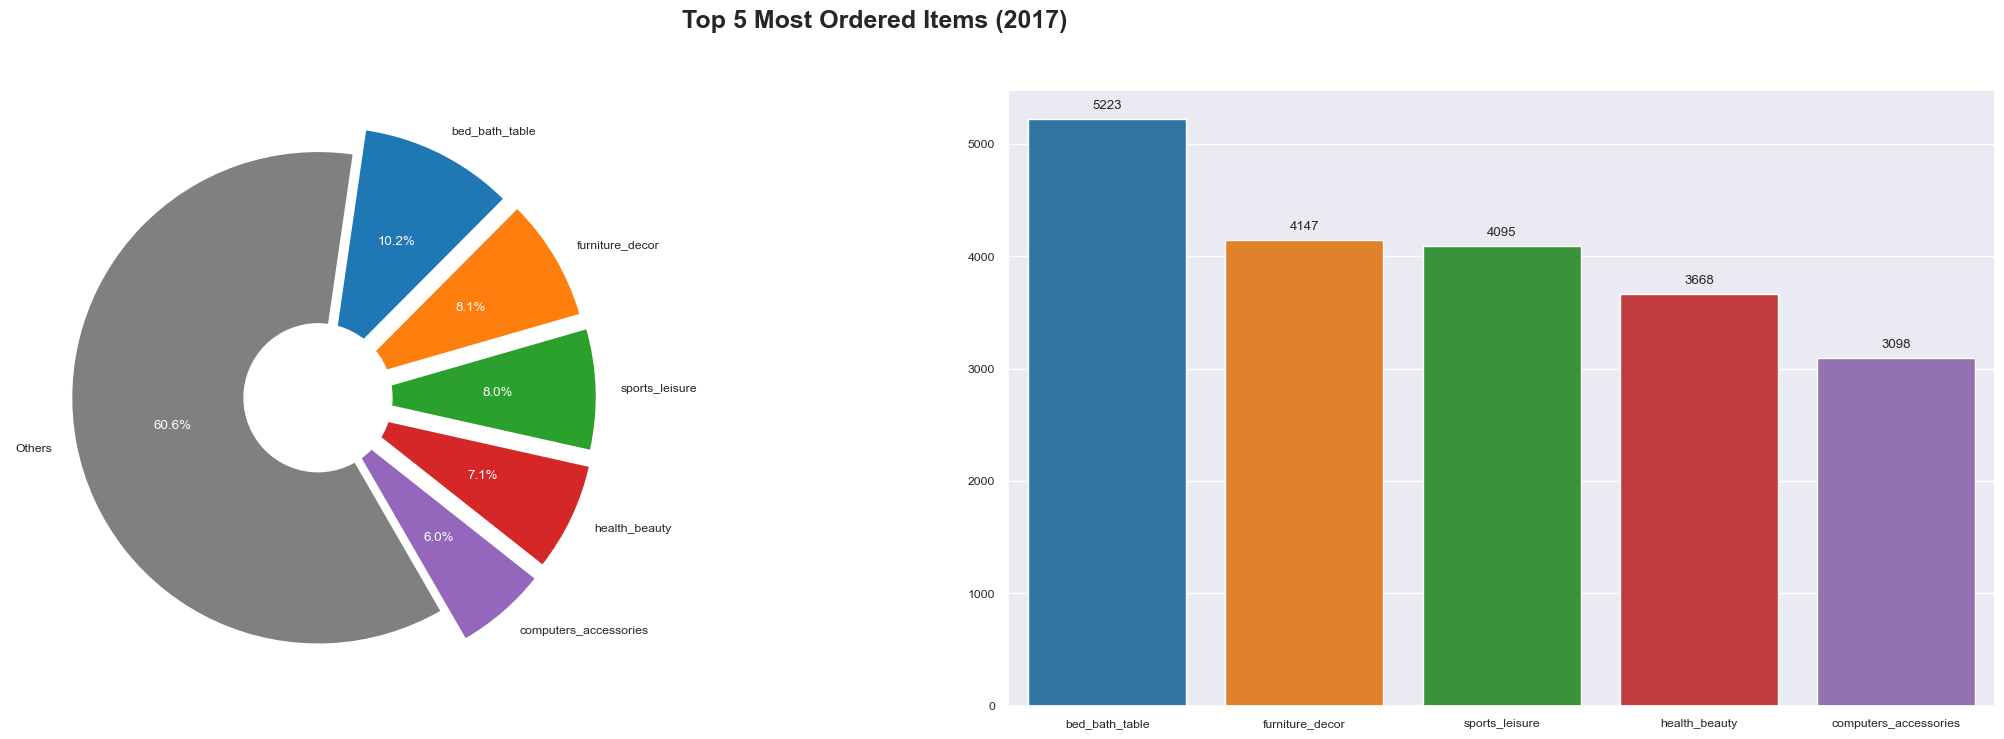

In [128]:
#dictionary to match colors
category_colors = {'bed_bath_table': '#1f77b4', 'health_beauty': '#d62728', 'sports_leisure': '#2ca02c',
                   'furniture_decor': '#ff7f0e', 'computers_accessories':'#9467bd', 'Others': 'grey'}

#2017 
master_df_2017 = master_df[master_df['order_purchase_timestamp'].dt.year == 2017]



#pie stuff 2017 data
pie5_2017 = master_df_2017.copy()
top_categories2017 = pie5_2017['product_category_name_english'].value_counts().nlargest(5).index #getting top5
pie5_2017.loc[~pie5_2017['product_category_name_english'].isin(top_categories), 'product_category_name_english'] = 'Others' #grouping the others
category_counts_2017 = pie5_2017['product_category_name_english'].value_counts() #category values

#arranging colors for emphasis on pies that matters
colors_2017 = [category_colors.get(category, 'grey') for category in category_counts_2017.index]
    
#plots 
fig, (box1, box2) = plt.subplots (1,2, figsize = (28,8))
fig.suptitle('Top 5 Most Ordered Items (2017)',fontsize=18,fontweight="bold")

#pie 2017
_,_, autotexts = box1.pie(category_counts_2017, labels=category_counts_2017.index, 
                         autopct='%1.1f%%', startangle=-60,
                         counterclock=False,
                         colors=colors_2017,
                         explode=(0.00,0.11,0.12,0.13,0.14,0.15,))

for i in autotexts:
    i.set_color("white")
box1.add_artist(plt.Circle((0,0),0.3,color="white"))



#chart 2017
box2 = sns.countplot(data=master_df_2017, x="product_category_name_english", 
                    palette = colors_2017[1:],
                    order=master_df_2017["product_category_name_english"].value_counts().index[:5],
                    )
box2.set_ylabel("")
box2.set_xlabel("")
box2.bar_label(box2.containers[0], padding=5)


Based on the visualization we could see that bed_bath_table is the most ordered item in 2017, which is followed by furniture_decor, sports_leisure, health_beauty, and computers_accessories.

Considering the maximum gap between these top 5 categories is 1.9% max between one category to the next, the gap share between categories is not too large.

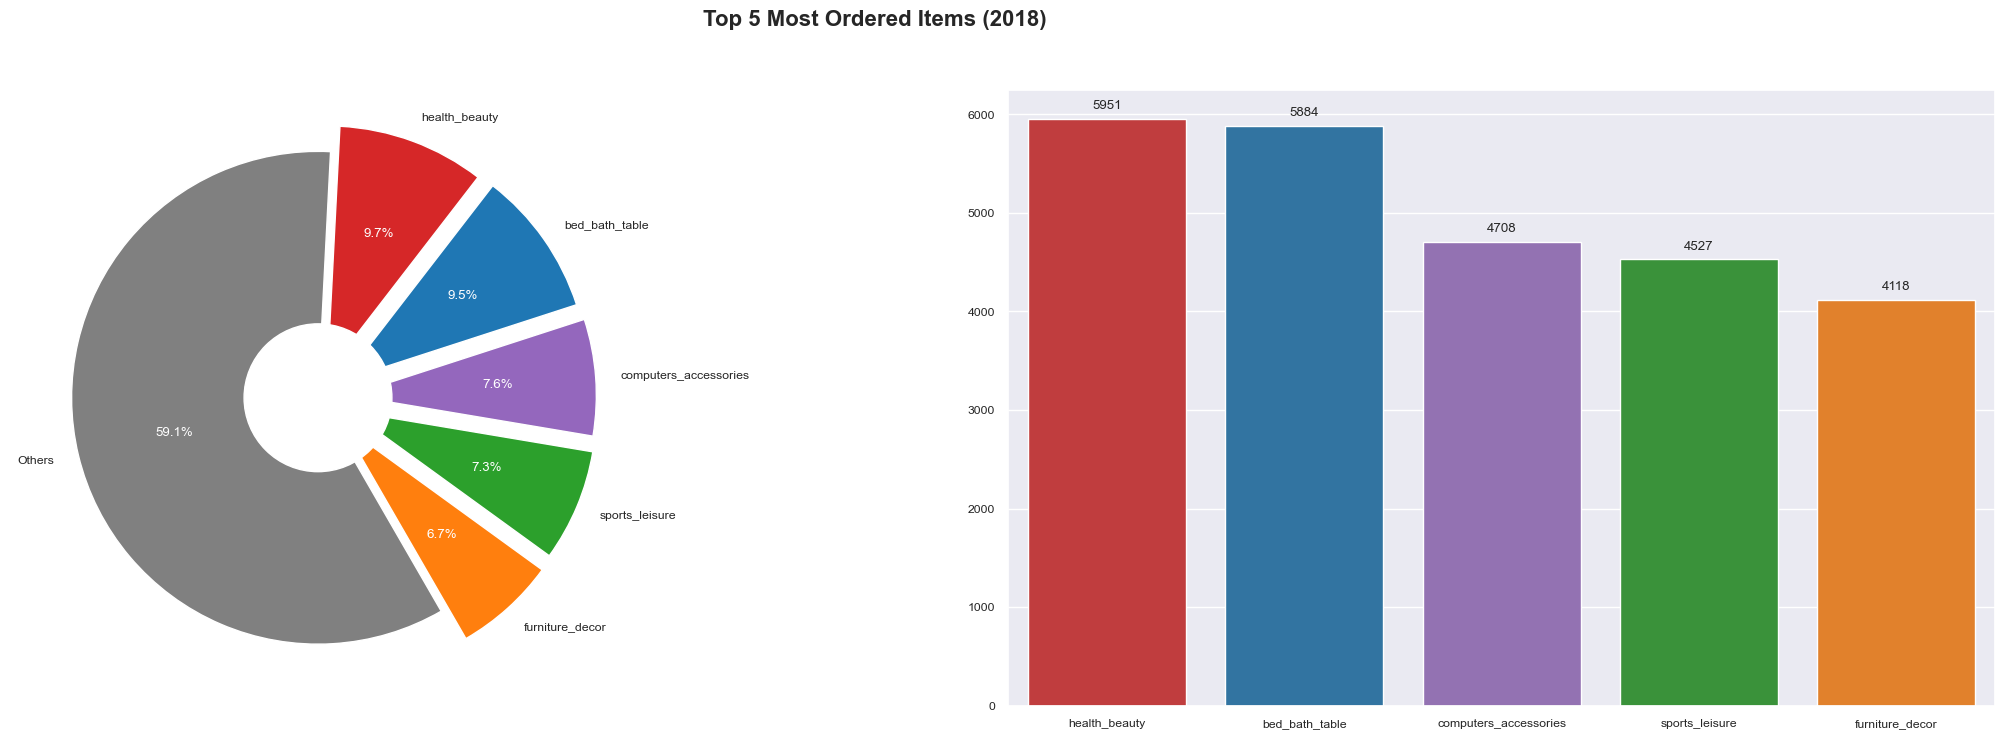

In [129]:
#2018
master_df_2018 = master_df[master_df['order_purchase_timestamp'].dt.year == 2018]

#pie stuff 2018 data
pie5_2018 = master_df_2018.copy()
top_categories2018 = pie5_2018['product_category_name_english'].value_counts().nlargest(5).index #getting values
pie5_2018.loc[~pie5_2018['product_category_name_english'].isin(top_categories), 'product_category_name_english'] = 'Others' #grouping the others
category_counts_2018 = pie5_2018['product_category_name_english'].value_counts() #category values

#arranging colors for emphasis on pies that matters
colors_2018 = [category_colors.get(category, 'grey') for category in category_counts_2018.index]
    
#plots 
fig, (box1, box2) = plt.subplots (1,2, figsize = (28,8))
fig.suptitle('Top 5 Most Ordered Items (2018)',fontsize=16,fontweight="bold")

#pie 2018
_, _, autotexts = box1.pie(category_counts_2018, labels=category_counts_2018.index,
                            autopct='%1.1f%%', startangle=-60,
                            counterclock=False, colors=colors_2018,
                            explode=(0.00, 0.11, 0.12, 0.13, 0.14, 0.15,))

for i in autotexts:
    i.set_color("white")
box1.add_artist(plt.Circle((0,0),0.3,color="white"))

#barchart 2018
box2 = sns.countplot(data=master_df_2018, x='product_category_name_english',
                     palette=colors_2018[1:], order=top_categories2018)
                    
box2.set_ylabel("")
box2.set_xlabel("")
box2.bar_label(box2.containers[0], padding=5)

for category in top_categories2018:
    if category not in colors_dict:
        colors_dict[category] = colors_dict['Others']


This visualization shows the share between top 5 items sold in 2018. Keep in mind that in 2018, the dataset stops in around September.

With that being said, there's are significant increases in the top 5 most ordered items.

One interesting finding is health_beauty is the category that is most in demand in 2018, closely competing with bed_bath_table.

In [130]:
#top 5 categories
categories =['bed_bath_table', 'health_beauty','sports_leisure','furniture_decor','computers_accessories']

# grouping by day and category
grouped_data = master_df.groupby([pd.Grouper(key='order_purchase_timestamp', freq='D'), 'product_category_name_english'])['order_item_id'].count().reset_index()

# order per day
grouped_data = grouped_data.rename(columns={'order_item_id': 'order_per_day'})

#filter top 5
grouped_data_top_5 = grouped_data[grouped_data['product_category_name_english'].isin(categories)]

#getting rid of all entries in 2016, due to incomplete date entries
grouped_data_top_5 = grouped_data_top_5[~(grouped_data_top_5['order_purchase_timestamp'].dt.year == 2016)]



In [131]:
grouped_data_top_5.head(5)

order_purchase_timestamp product_category_name_english  order_per_day
145               2017-01-06                 health_beauty              1
148               2017-01-07               furniture_decor              1
149               2017-01-07                 health_beauty              1
151               2017-01-08                bed_bath_table              1
154               2017-01-08               furniture_decor              2

We can see from the table above the earliest entry in 2017 for the top 5 categories is in 6th of January, meaning there are 5 days worth of missing data even in 2017.

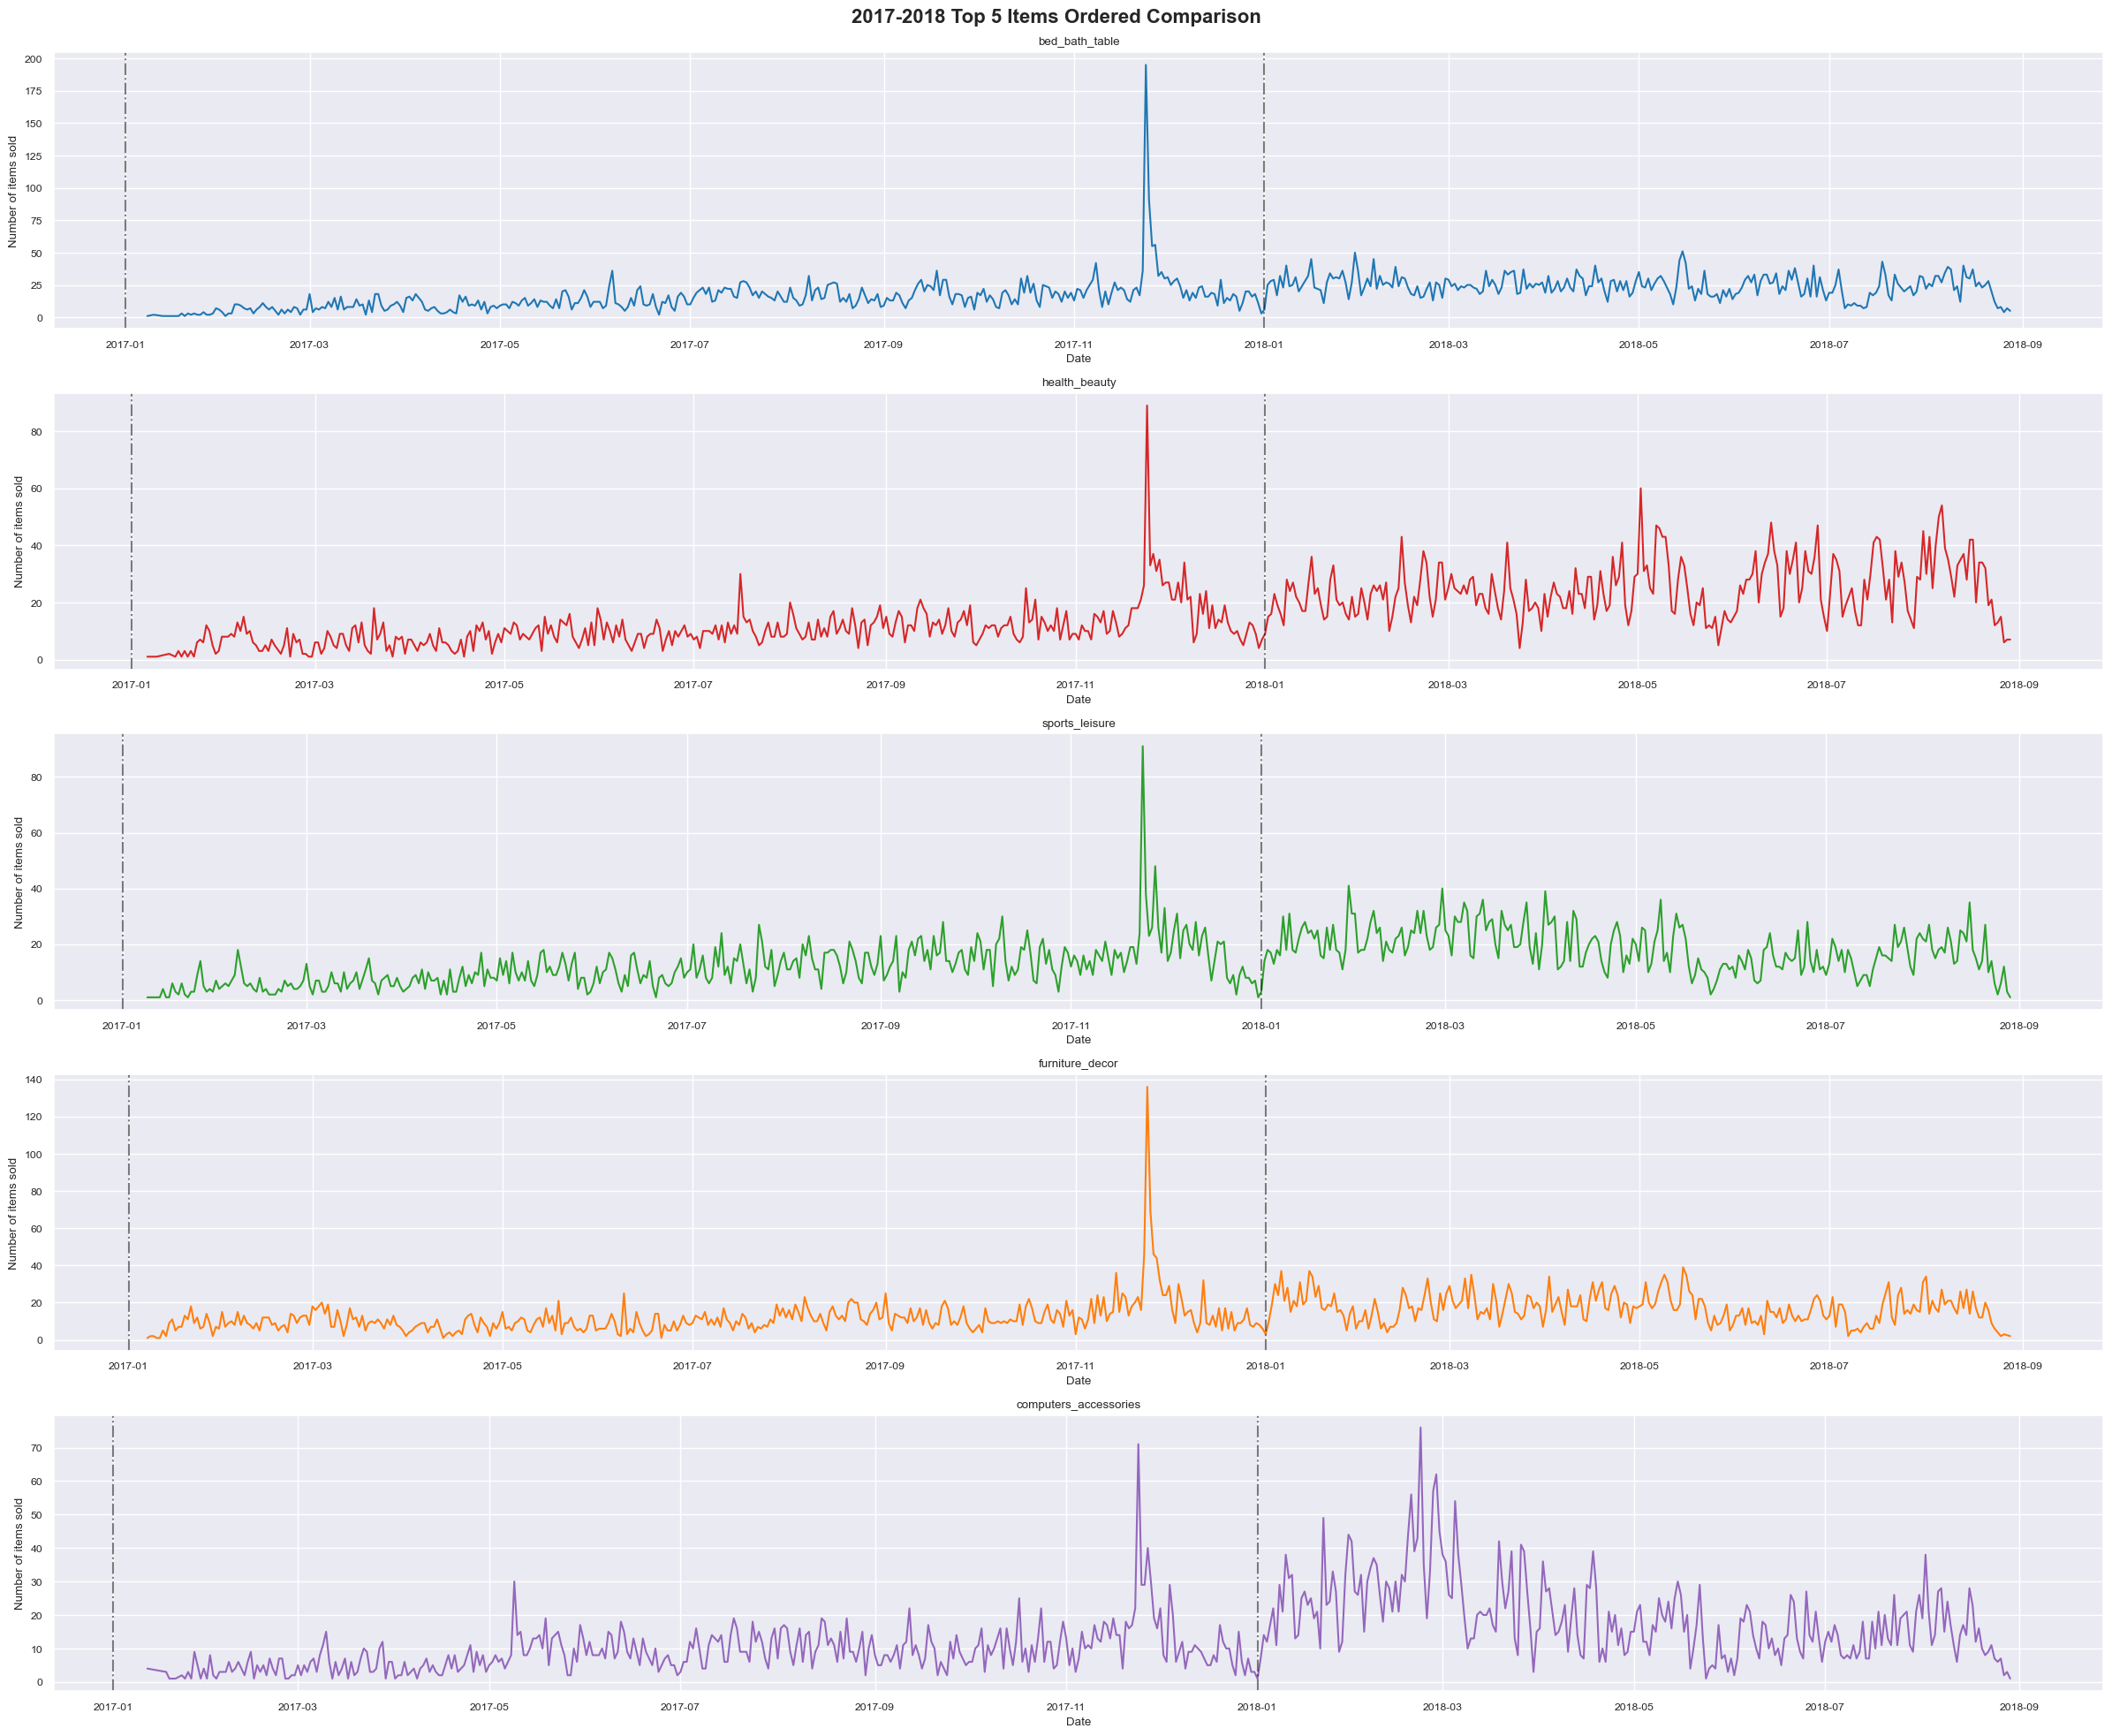

In [132]:

fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(24, 20))
fig.suptitle('2017-2018 Top 5 Items Ordered Comparison\n',fontsize=16,fontweight="bold")

#subplot loops
for i, category in enumerate(categories):
    category_df = grouped_data_top_5[grouped_data_top_5['product_category_name_english'] == category]
    axs[i].plot(category_df['order_purchase_timestamp'], category_df['order_per_day'],color=category_colors.get(category, 'grey'))
    axs[i].set_xlabel('Date')
    axs[i].set_ylabel('Number of items sold')
    axs[i].set_title(category)



#year lines
for ax in axs:
    ax.axvline(x=pd.to_datetime('2017-01-01'), linestyle='-.', color='black',alpha=0.5)
    ax.axvline(x=pd.to_datetime('2018-01-01'), linestyle='-.', color='black',alpha=0.5)

fig.tight_layout()

And now we want to find out about the situation from a revenue perspective.

In [133]:
#revenue analysis
grouped_revenue = master_df.groupby('product_category_name_english')['price','freight_value'].sum().reset_index()
grouped_revenue



C:\Users\santo\AppData\Local\Temp\ipykernel_26988\2703631548.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_revenue = master_df.groupby('product_category_name_english')['price','freight_value'].sum().reset_index()


product_category_name_english       price  freight_value
0     agro_industry_and_commerce    72530.47        5843.60
1               air_conditioning    55024.96        6749.23
2                            art    24202.64        4045.17
3          arts_and_craftmanship     1814.01         370.13
4                          audio    50688.50        5710.44
..                           ...         ...            ...
69        tablets_printing_image     7528.41        1226.20
70                     telephony   323667.53       71215.79
71                          toys   483946.60       77425.95
72                       unknown   179535.28       28169.81
73                 watches_gifts  1205005.68      100535.93

[74 rows x 3 columns]

In [134]:
#I strongly, strongly believe, freight_value shouldn't considered as revenue
grouped_revenue = grouped_revenue.drop('freight_value',axis=1)

#top 5 revenue source
top_5_revenue = grouped_revenue.sort_values('price', ascending=False).head(5)
top_5_revenue

#others combined
others_revenue = grouped_revenue[~grouped_revenue['product_category_name_english'].isin(top_5_revenue['product_category_name_english'])]['price'].sum()
others_revenue

#top categories
top_categories_revenue_pie = pd.concat([top_5_revenue, pd.DataFrame({'product_category_name_english': ['Others'], 'price': [others_revenue]})])

top_categories_revenue_pie.rename(columns = {"price" : "revenue"}, inplace=True)

In [135]:
#for bar chart
top_categories_revenue_bar = top_categories_revenue_pie
top_categories_revenue_bar = top_categories_revenue_bar[top_categories_revenue_bar['product_category_name_english'] != 'Others']

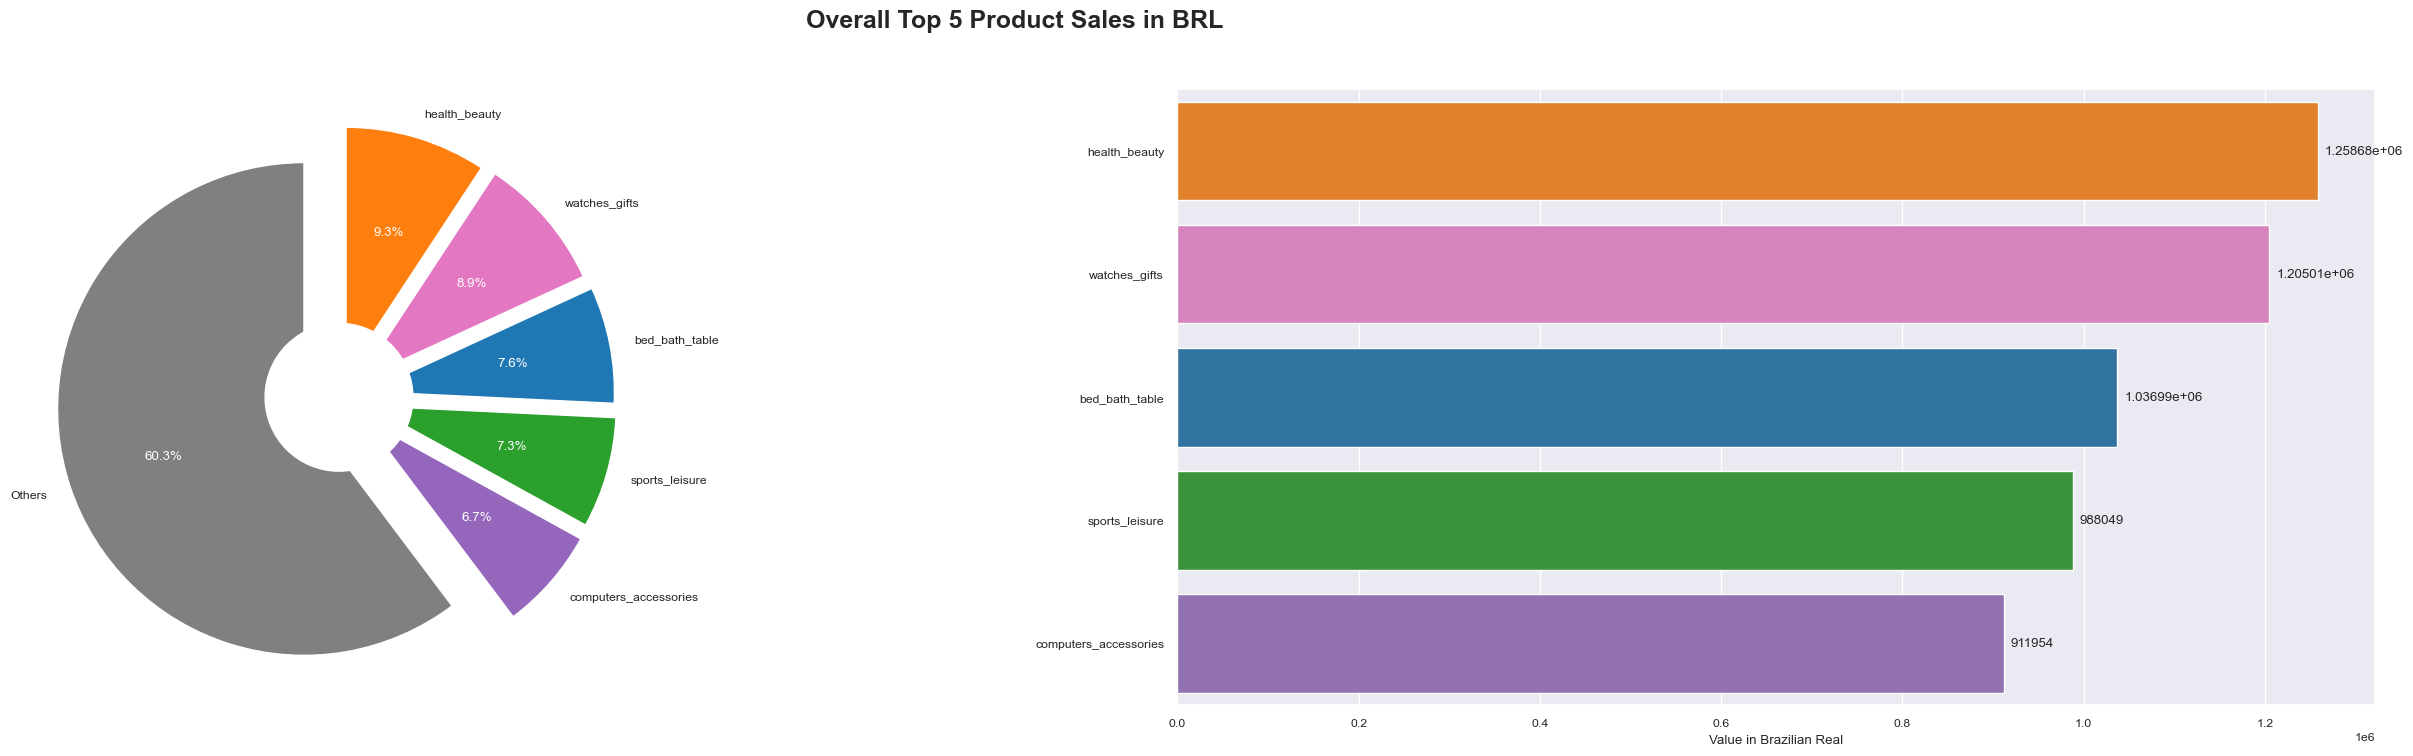

In [136]:
fig, (box1, box2) = plt.subplots (1,2, figsize = (34,8))
fig.suptitle('Overall Top 5 Product Sales in BRL',fontsize=18,fontweight="bold")



#arranging colors for emphasis on pies that matters
colormap = plt.cm.tab10
colors_dict2 = {}
colors_dict2['Others'] = 'grey'
for i, category in enumerate(top_categories):
    colors_dict2[category] = colormap(i)
    
#pie
_,_, autotexts = box1.pie(top_categories_revenue_pie['revenue'],
                         labels= top_categories_revenue_pie['product_category_name_english'],
                         autopct='%1.1f%%', startangle=90,
                         counterclock=False,
                         colors=[colors_dict2.get(category, colormap(len(colors_dict))) for category in top_categories_revenue_pie['product_category_name_english']], #careful not to use index
                         explode=(0.10,0.11,0.12,0.13,0.14,0.15,))

for i in autotexts:
    i.set_color("white")

circle = plt.Circle((-0.0,-0.0),0.3,color="white")
box1.add_artist(circle)

#bar
box2 = sns.barplot(data=top_categories_revenue_bar, y="product_category_name_english",
                   x= "revenue",
                    palette =[colors_dict2.get(category, colormap(len(colors_dict))) for category in top_categories_revenue_bar['product_category_name_english']], #careful not to use index
                    )
box2.set_ylabel("")
box2.set_xlabel("Value in Brazilian Real")
box2.bar_label(box2.containers[0], padding=5)


plt.show()

It seems health_beauty is the number one product category source of revenue, very closely followed by watches_gifts.

It's interesting because furniture_decor was part of the top 5 most ordered items but isn't part of top 5 revenue source.

This might be because:
- watches and gifts are generally more expensive, espeically if it's a luxury watch.
- there's more demand for furniture_decor but the items cost less.

This finding narrows down our candidates to:
- health_beauty
- bed_bath_table
- sports_leisure

While we're on the subject we might as well explore the sales trend. 

In [137]:
#top 5 revenue
top_5_categories_revenue = top_categories_revenue_bar["product_category_name_english"].tolist()

#grouping per day
grouped_data_revenue = master_df.groupby([pd.Grouper(key='order_purchase_timestamp', freq='D'),'product_category_name_english' ])['price'].sum().reset_index()

#revenue per day
grouped_data_revenue = grouped_data_revenue.rename(columns={'price': 'revenue'})

grouped_data_revenue = grouped_data_revenue[~(grouped_data_revenue['order_purchase_timestamp'].dt.year == 2016)]

In [138]:
grouped_data_revenue['revenue'].sum()

13541857.780000001

In [139]:
master_df['price'].sum() #just checking in case I messed up, the mismatch is because 2016 entries removed.

13591643.7

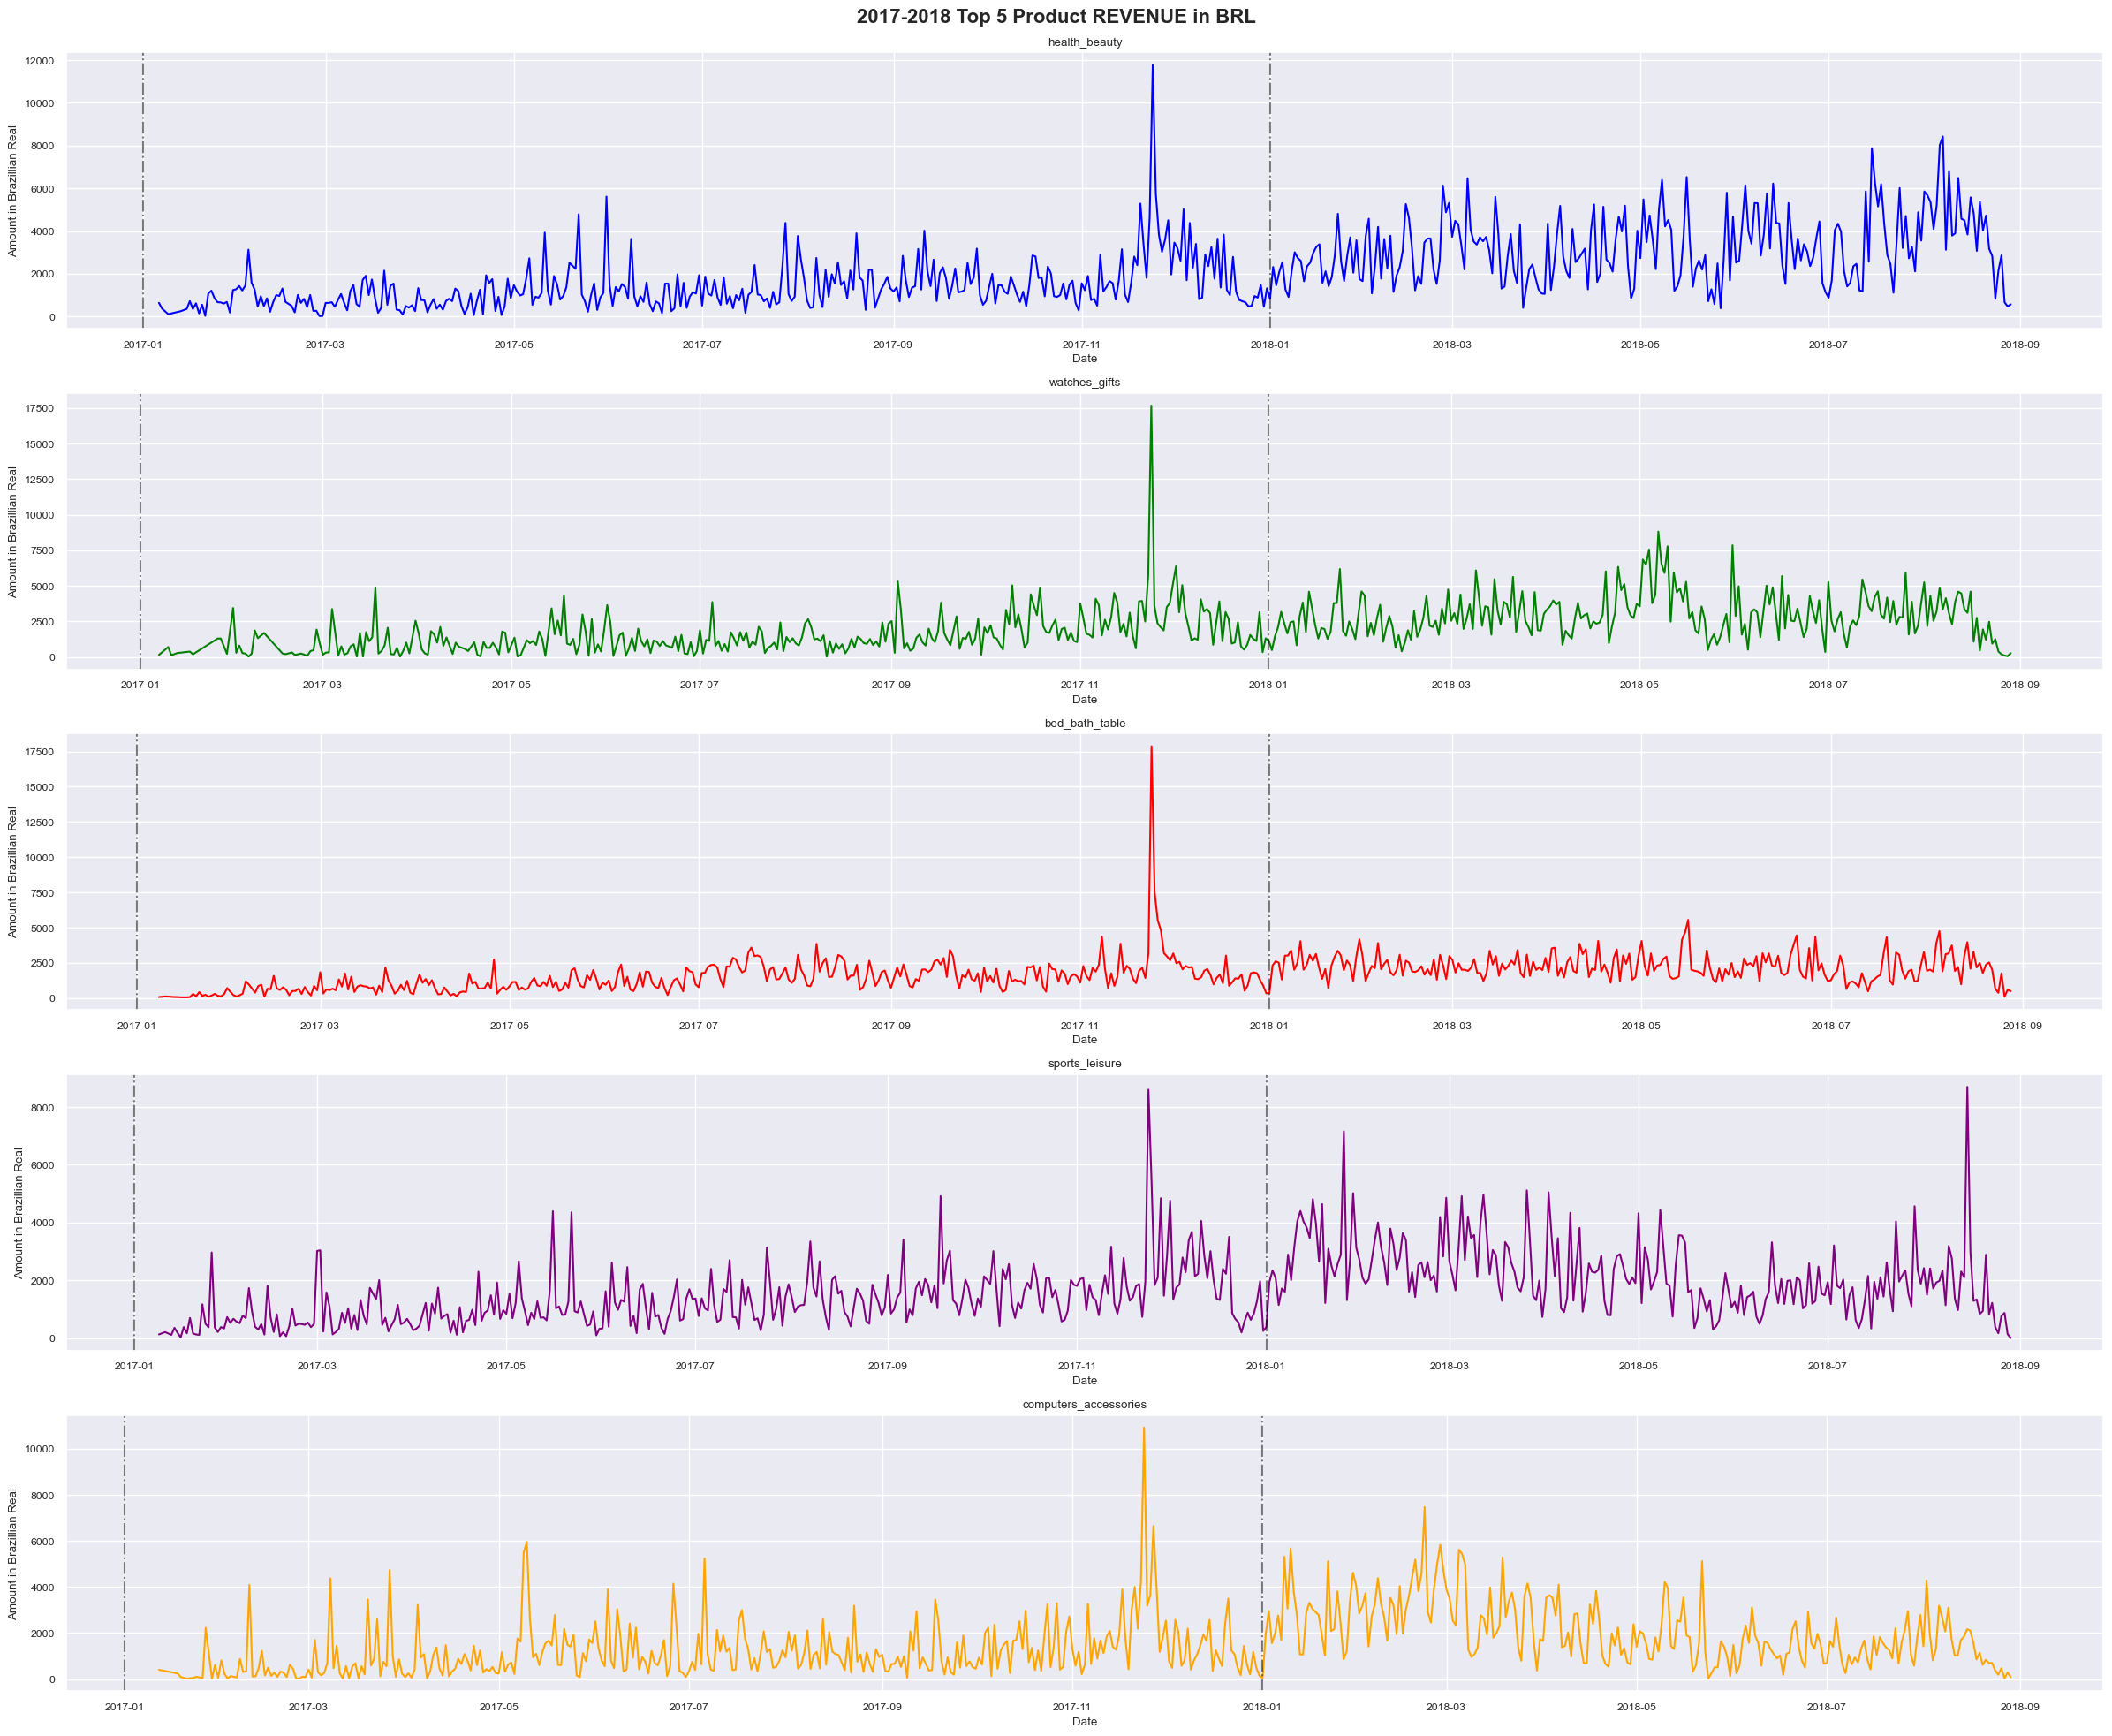

In [140]:
fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(24, 20))
fig.suptitle('2017-2018 Top 5 Product REVENUE in BRL\n',fontsize=16,fontweight="bold")
#subplot loops
for i, category in enumerate(top_5_categories_revenue):
    categories_revenue_df = grouped_data_revenue[grouped_data_revenue['product_category_name_english'] == category]
    axs[i].plot(categories_revenue_df['order_purchase_timestamp'], categories_revenue_df['revenue'],color=basic[i])
    axs[i].set_xlabel('Date')
    axs[i].set_ylabel('Amount in Brazillian Real')
    axs[i].set_title(category)



#year lines
for ax in axs:
    ax.axvline(x=pd.to_datetime('2017-01-01'), linestyle='-.', color='black',alpha=0.5)

for ax in axs:
    ax.axvline(x=pd.to_datetime('2018-01-01'), linestyle='-.', color='black',alpha=0.5)

fig.tight_layout()

This lineplot also starts from 2017 and ends in September 2018.

There is noticable increase in sales revenue for all of the top 5 product categories except bed_bath_table.

Lineplot also shows some noticable spikes in sports_leisure revenue in late August - early September, unfortunately we haven't came across any explanation as to what happened there. 

Finally we're going to take a look at the price range of each of the top 5 categories.

<AxesSubplot: xlabel='product_category_name_english', ylabel='price'>

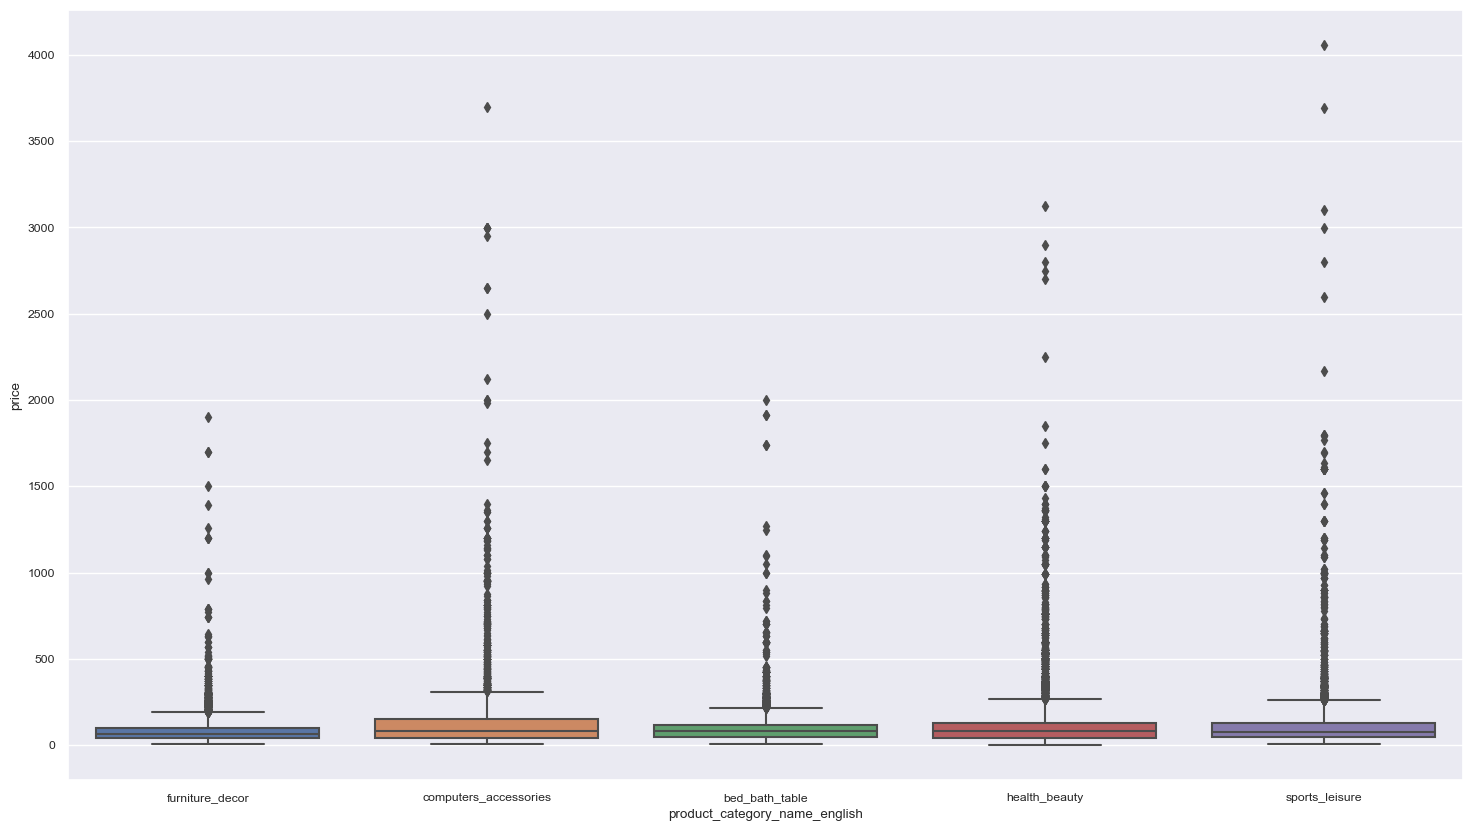

In [141]:
plt.figure(figsize=(18,10))
filtered_data = master_df[master_df['product_category_name_english'].isin(categories)]
sns.boxplot(x='product_category_name_english', y='price', data=filtered_data)

All of the top 5 categories have outliers with sports_leisure and computers_accessories as the ones with the most severe outliers. 

From our findings above, we have decided to narrow down our focus on health_beauty because of the following reasons:
- Based on the lineplot there's steady sales between 2017 - 2018.
- There's even a significant increase in 2018 sales.
- It is the second most ordered item in overall item category.
- Even though only by a small margin, it is the time most in demand in 2018 (at least until September 2018)
- From Olist's perspective as a for profit company, health_beauty is the product category with the highest revenue.
- Although all 5 top items in demand are all subject for cost efficiency improvement, health_beauty is a special case considering it is the only product category with a limited shelf life (it's the only product with both an expiry date and highly affected by which makeup product type is trending)

[Jeff Bezos](https://www.cnbc.com/2017/11/09/jeff-bezos-says-you-should-have-this-mindset-to-be-successful.html#:~:text=%E2%80%9CBig%20things%20start%20small.,big%20business%20on%20its%20own.%E2%80%9D) once said, “Big things start small. The biggest oak starts from an acorn”.

Ideally, all top products should be addressed but we believe our output would be more optimal if we focus on small things and thoroughly address the problem instead of taking the overall approach, which then can be used as a baseline for other and even larger approaches.

## Health and Beauty

Filtering a dataset for health and beauty.

In [142]:
df_hb = master_df[master_df['product_category_name_english'] == 'health_beauty']

In [143]:
df_hb.head(5)

order_id  order_item_id  sum_items_in_order  \
21  203096f03d82e0dffbc41ebc2e2bcfb7            1.0                 1.0   
22  f848643eec1d69395095eb3840d2051e            1.0                 1.0   
40  434d158e96bdd6972ad6e6d73ddcfd22            1.0                 1.0   
46  ee64d42b8cf066f35eac1cf57de1aa85            1.0                 1.0   
82  974c1993ab8024d3ed16229183c2308d            1.0                 1.0   

                          product_id product_category_name_english   price  \
21  5ac9d9e379c606e36a8094a6046f75dc                 health_beauty  109.90   
22  2b4609f8948be18874494203496bc318                 health_beauty   79.99   
40  c7df652246ed7b3300aaf46960c141e4                 health_beauty  445.00   
46  c50ca07e9e4db9ea5011f06802c0aea0                 health_beauty   14.49   
82  5e2ba75ad255ff60b1c76c5bf526ae9b                 health_beauty   69.90   

    freight_value order_status order_purchase_timestamp  \
21           8.96    delivered      2017-09-18 14:31:30   
22           8.91    delivered      2018-03-15 08:52:40   
40          63.17    delivered      2018-06-01 12:23:13   
46           7.87      shipped      2018-06-04 16:44:48   
82          14.66    delivered      2017-02-20 11:45:39   

   order_estimated_delivery_date order_delivered_customer_date  \
21                    2017-09-28           2017-10-09 22:23:46   
22                    2018-03-29           2018-03-19 18:08:32   
40                    2018-07-17           2018-06-18 21:32:52   
46                    2018-06-28           2018-06-28 00:00:00   
82                    2017-03-21           2017-03-09 14:27:58   

                         customer_id                customer_unique_id  \
21  d2b091571da224a1b36412c18bc3bbfe  d699688533772c15a061e8ce81cb56df   
22  4fa1cd166fa598be6de80fa84eaade43  68954feaafe4dd638f3bd3e2afa174ec   
40  2a1dfb647f32f4390e7b857c67458536  5f7d7732b351ce851a158528581af05f   
46  caded193e8e47b8362864762a83db3c5  08fb46d35bb3ab4037202c23592d1259   
82  a90391a47de936d56c66a5366cba1462  32de2a7a93dbfc527b3f584744b9c6ce   

    review_score      comment            customer_city customer_state  \
21           2.0  Has comment                sao paulo             SP   
22           5.0   No comment                sao paulo             SP   
40           5.0  Has comment  jaboatao dos guararapes             PE   
46           1.0   No comment                  jundiai             SP   
82           5.0  Has comment      bom jardim de minas             MG   

    customer_zip_code_prefix                         seller_id  
21                      4001  633ecdf879b94b5337cca303328e4a25  
22                      8473  cc419e0650a3c5ba77189a1882b7556a  
40                     54330  a5cba26a62b8b4d0145b68b841e62e7f  
46                     13215  e9779976487b77c6d4ac45f75ec7afe9  
82                     37310  f84a00e60c73a49e7e851c9bdca3a5bb

#### Where

In [144]:
import folium
from folium.plugins import HeatMap
import requests
import json

df_hb_customer_map = df_hb[['order_id','customer_unique_id','customer_zip_code_prefix']] #selecting columns from df_hb
df_hb_customer_map = df_hb_customer_map.rename(columns={"customer_zip_code_prefix":"geolocation_zip_code_prefix"}) #renaming to match other df

df_geolocation_grouped = df_geolocation.groupby('geolocation_zip_code_prefix').agg('first').reset_index() #removing noise

#combine
df_map_merged = pd.merge(
    df_hb_customer_map, 
    df_geolocation_grouped[['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng']], 
    on='geolocation_zip_code_prefix', 
    how='left'
)

#the map
df_map_merged = df_map_merged.dropna(subset=['geolocation_lat', 'geolocation_lng'])
map_brazil = folium.Map(location=[-15.77972, -47.92972], zoom_start=5,tiles="Stamen Toner")
locations = df_map_merged[['geolocation_lat', 'geolocation_lng']].values.tolist()
heat_layer = HeatMap(locations,min_opacity=0.25)
heat_layer.add_to(map_brazil)

map_brazil

Based on the heatmap visualization above:
- It appears customers are highly concentrated in Sao Paolo and surrounding areas.
- Surrounding areas include Rio de Janeiro and Minas Gerais.
- Most heatspots are in cities, which makes sense considering over 40% of Brazil is the Amazon rainforest.

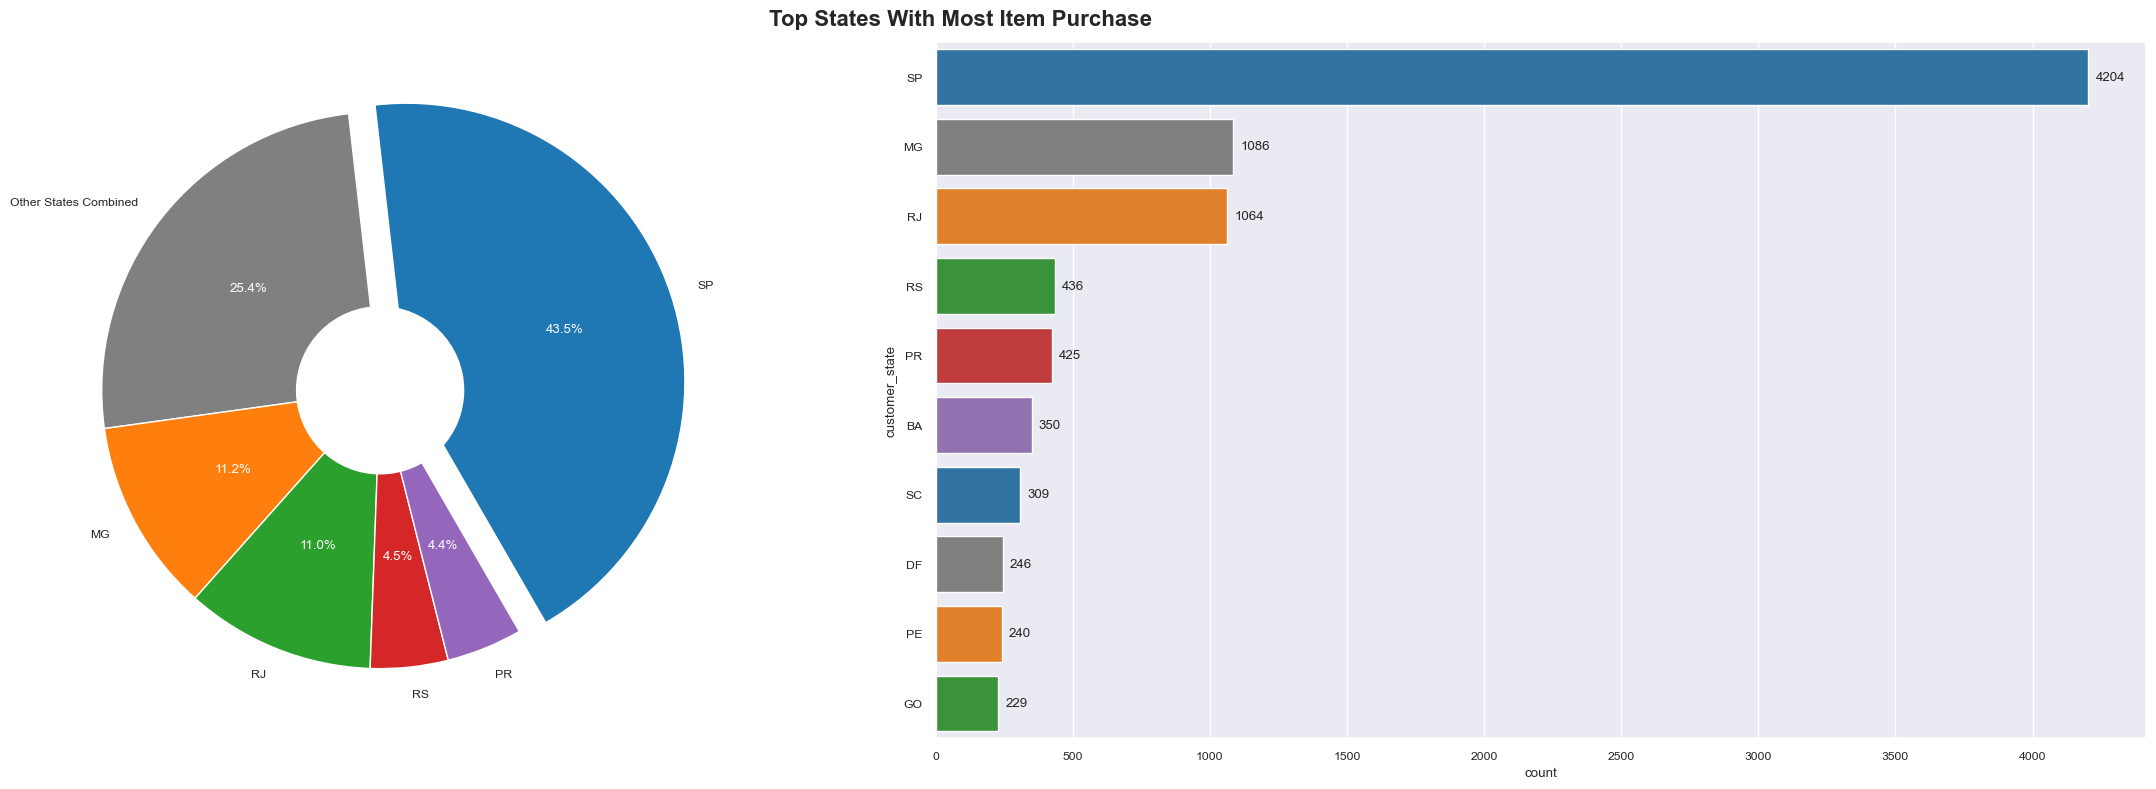

In [145]:
#pie stuff hb state
pie5_hb_state = df_hb.copy()
top_customer_states = pie5_hb_state['customer_state'].value_counts().nlargest(5).index #top 5 states
pie5_hb_state.loc[~pie5_hb_state['customer_state'].isin(top_customer_states), 'customer_state'] = 'Other States Combined' #grouping the others
top_customer_states_cat_count = pie5_hb_state['customer_state'].value_counts() #category values


colormap = plt.cm.tab10
colors_dict = {}
colors_dict = {}
colors_dict['Other States Combined'] = 'grey'
for i, category in enumerate(top_customer_states):
    colors_dict[category] = colormap(i)

#plots 
fig, (box1, box2) = plt.subplots (1,2, figsize = (24,8))
fig.suptitle('Top States With Most Item Purchase',fontsize=16,fontweight="bold")

#countplot
box2 = sns.countplot(data=df_hb, y = "customer_state", order = df_hb["customer_state"].value_counts().index[:10],
                     palette =[colors_dict.get(category, colormap(len(colors_dict))) for category in top_customer_states_cat_count.index][0:])
box2.bar_label(box2.containers[0],padding=5)

#pie
_,_, autotexts = box1.pie(top_customer_states_cat_count, labels=top_customer_states_cat_count.index, 
                         autopct='%1.1f%%', startangle=-60,
                         counterclock=True,
                         colors=[colors_dict.get(category, colormap(len(colors_dict))) for category in top_customer_states_cat_count.index],
                         explode=(0.10,0.0,0.0,0.0,0.0,0.0,))

for i in autotexts:
    i.set_color("white")
box1.add_artist(plt.Circle((0,0),0.3,color="white"))

fig.tight_layout()

It is clear that most Health and Beauty sales are made in Sao Paolo.


To quote Wikipedia: 

_São Paulo (/ˌsaʊ ˈpaʊloʊ/, Portuguese: [sɐ̃w̃ ˈpawlu] (listen); Portuguese for 'Saint Paul') is the most populous city in Brazil, and is the capital of the state of São Paulo, the most populous and wealthiest Brazilian state._

Sao Paolo is the number one state for health and beauty purchases, it makes up 43.5% of the total health and beauty product purchases. 

Second in the list is Minas Gerais with 11.2% which in turn is closely followed by 11% in Rio de Janeiro State.

Based on previous EDA, we've seen that health and beauty wasn't always number one in terms of revenue and items purchased, so I'm curious if Sao Paolo's always been the state with most customers.

C:\Users\santo\AppData\Local\Temp\ipykernel_26988\1764257665.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hb_2['year'] = pd.DatetimeIndex(df_hb_2['order_purchase_timestamp']).year


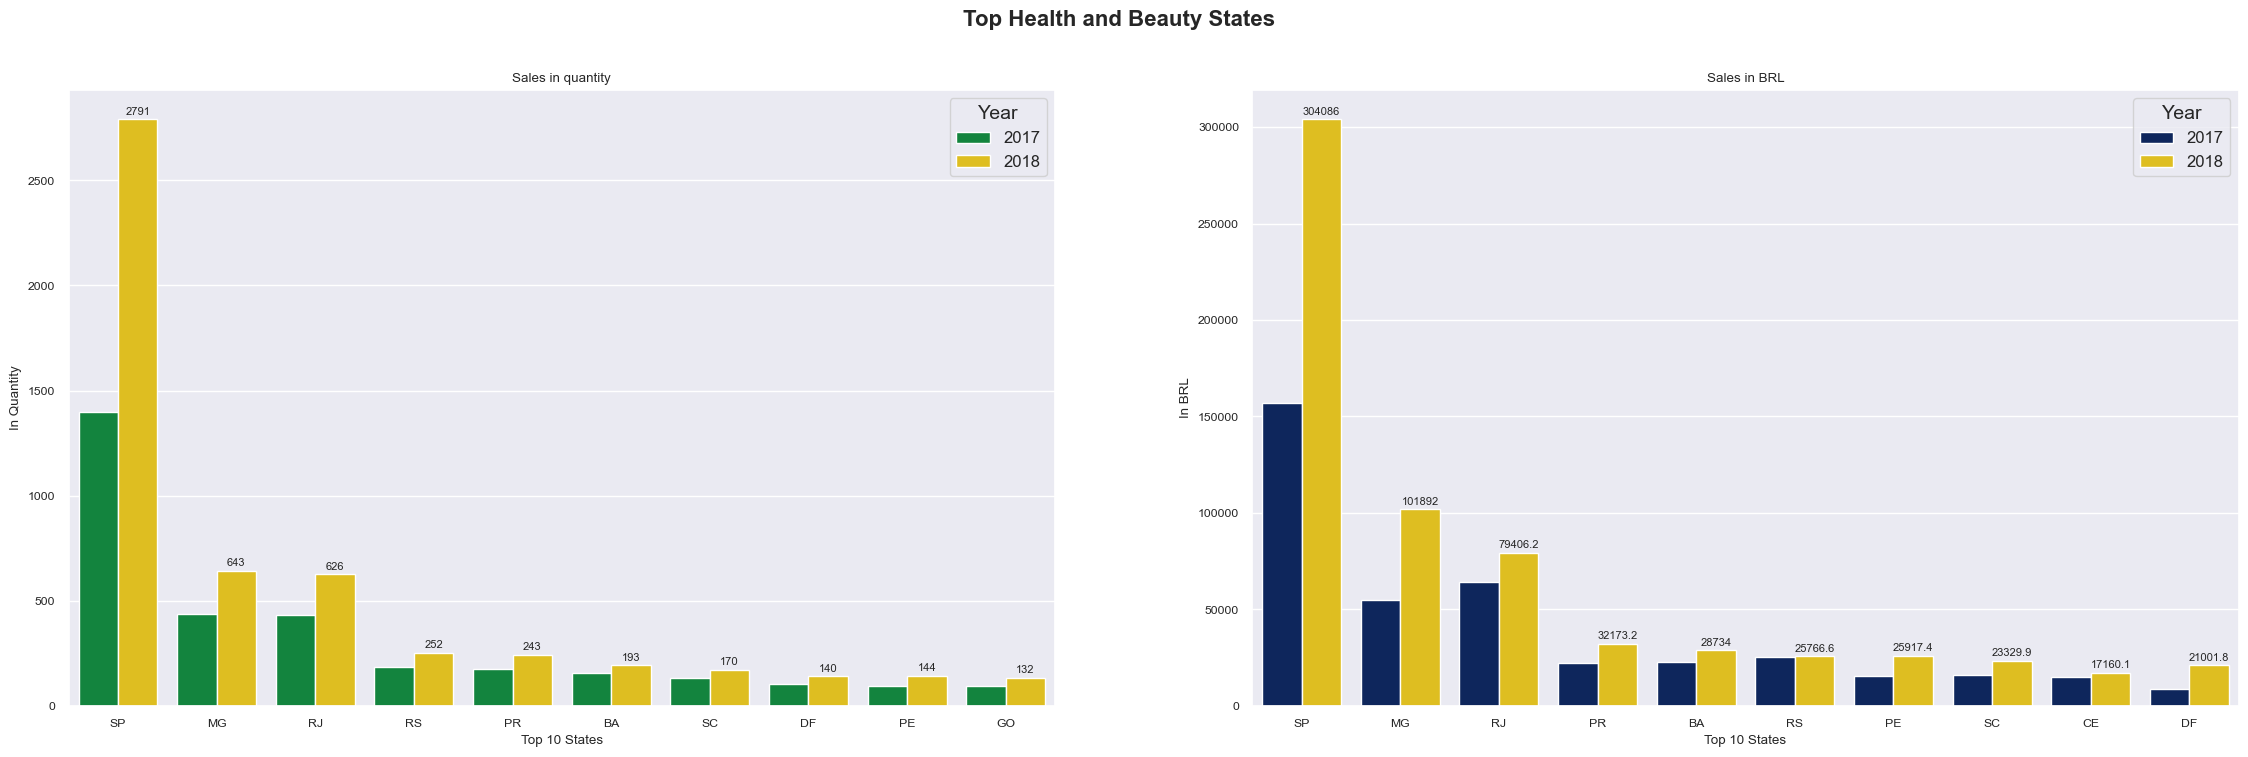

In [146]:
fig = plt.figure(figsize=(28,8))
fig.suptitle('Top Health and Beauty States', fontsize=16, fontweight='bold')

df_hb_2 = df_hb[df_hb['order_purchase_timestamp'].dt.year != 2016]

#left
plt.subplot(121)
ax1 = sns.countplot(data=df_hb_2, x='customer_state', hue=df_hb_2['order_purchase_timestamp'].dt.year,
              order=df_hb_2['customer_state'].value_counts().index[:10], dodge=True,
              palette=brazil)
plt.xlabel('Top 10 States')
plt.ylabel('In Quantity')
plt.legend(title='Year', loc='best', prop={'size': 12}, title_fontsize=14)
ax1.set_title('Sales in quantity')

#right
plt.subplot(122)
df_hb_2['year'] = pd.DatetimeIndex(df_hb_2['order_purchase_timestamp']).year
price_by_state = df_hb_2.groupby('customer_state')['price'].sum().reset_index()
top_10_states = price_by_state.sort_values('price', ascending=False).head(10)
price_by_state_year = df_hb_2.groupby(['customer_state', 'year'])['price'].sum().reset_index()
price_by_state_year = price_by_state_year[price_by_state_year['customer_state'].isin(top_10_states['customer_state'])]

ax2 = sns.barplot(x='customer_state', y='price', hue='year', data=price_by_state_year,
            order=top_10_states['customer_state'], palette=brazil_blue)
plt.xlabel('Top 10 States')
plt.ylabel('In BRL')
plt.legend(title='Year', loc='best', prop={'size': 12}, title_fontsize=14)
ax2.set_title('Sales in BRL')

for i, container in enumerate(ax1.containers):
    if i == 1:
        ax1.bar_label(container, label_type='edge', fontsize=8, padding=2)

for i, container in enumerate(ax2.containers):
    if i == 1:
        ax2.bar_label(container, label_type='edge', fontsize=8, padding=2)

plt.show()

Sao Paolo has always been the state with most health and beauty product customers and is also the main source of revenue and as it turns out, there are nearly double the purchase in 2018 in SP. Bear in mind 2018 data is only until September and there's a possibility that it will go even higher than this.

Other cities have slight increases, such as Minas Gerais and Rio de Janeiro, both having similar increases and similar amount in 2017 - 2018.

If we take a close look at the top 10 states, the rank is different between top 10 sales quantity and top 10 sales value.

For instance:
- RS state is number 4 state with most health and beauty products ordered but is number 6 in terms of spending amount. 
- RS shows no significant growth in sales value but shows growth in sales quantity. Considering all other states in the top 10 sales value have shown at least significant increases, RS could be a state to focus on.
- BA state may have bought less amount of health and beauty products than state RS but have spent more money on purchasing the products.
- Most interestingly, state DF is ranked 8th in terms of product quantity but ranked last in terms of sales value.

This tells us, in terms of sales of health and beauty products, more quantity sold does not always mean more revenue. 

From this visualization we learn the top cities to focus on in terms of health and beauty product categories. With the information included, Olist could decide if they want to focus on maximizing product quantity sold or maximize sales value.

However, Sao Paolo is a big state, according to Wiki the state size is 248,222 km2 and for comparison Jakarta is 661.5 km2, that means it's roughly 375 times bigger!

**So, which cities in Sao Paolo should Olist and the beauty_health merchants pay attention to?**

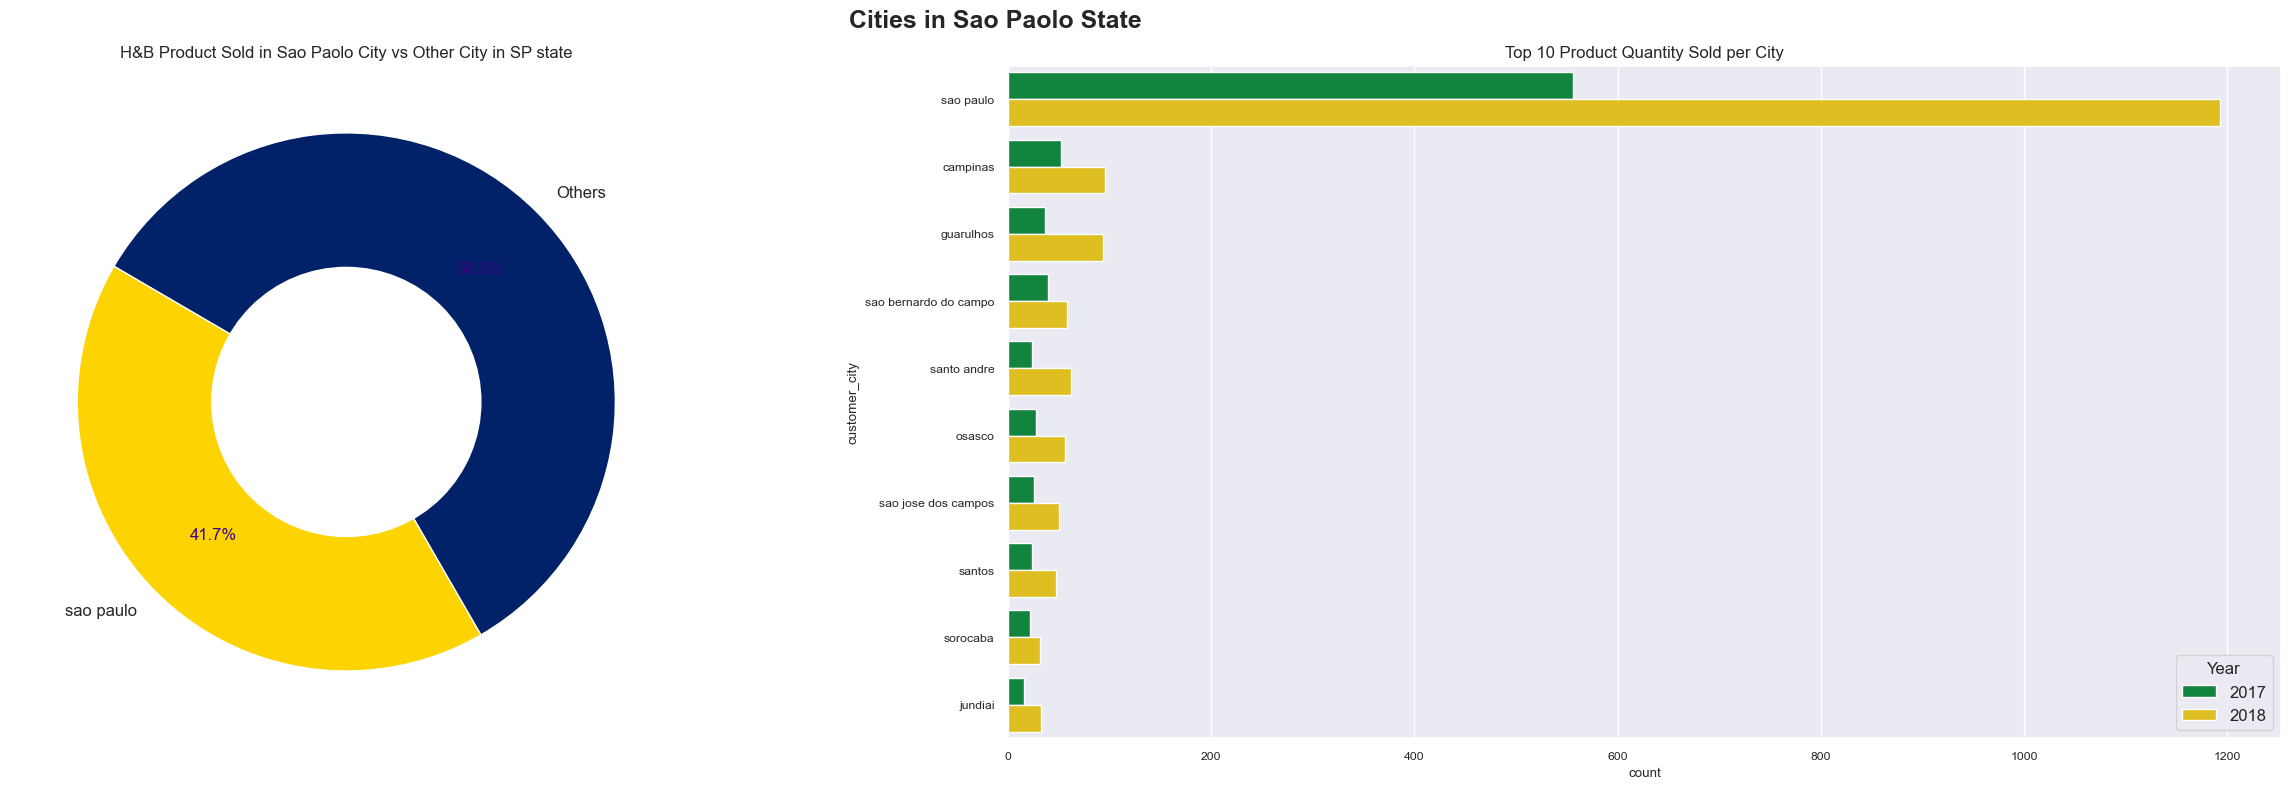

In [147]:
#Bar stuff, filtering SP state
city_grouped_for_count_sp = df_hb_2[df_hb_2['customer_state'] =='SP']

#Pie stuff
city_grouped_for_count_sp_pie = city_grouped_for_count_sp.copy()
top_customer_states1 = city_grouped_for_count_sp_pie['customer_city'].value_counts().nlargest(1).index #top 5 states
city_grouped_for_count_sp_pie.loc[~city_grouped_for_count_sp_pie['customer_city'].isin(top_customer_states1), 'customer_city'] = 'Others' #grouping the others
top_customer_city_cat_count = city_grouped_for_count_sp_pie['customer_city'].value_counts() #category values

fig, (box1, box2) = plt.subplots (1,2, figsize = (26,8))



_,_, autotexts = box1.pie(top_customer_city_cat_count, labels=top_customer_city_cat_count.index, 
                         autopct='%1.1f%%',
                         pctdistance=0.7,
                         textprops={'fontsize': 12},
                         startangle=-60,
                         counterclock=True,
                         colors=brazil_blue,
                         )

for i in autotexts:
    i.set_color("#380282")

box1.add_artist(plt.Circle((0,0),0.5,color="white"))
box1.set_title("H&B Product Sold in Sao Paolo City vs Other City in SP state",fontsize=12)

box2 = sns.countplot(data=city_grouped_for_count_sp, y='customer_city', hue=city_grouped_for_count_sp['order_purchase_timestamp'].dt.year,
              order=city_grouped_for_count_sp['customer_city'].value_counts().index[:10], dodge=True,
              palette=brazil)
box2.set_title("Top 10 Product Quantity Sold per City",fontsize=12)
box2.legend(title='Year', loc='best', prop={'size': 12}, title_fontsize=12)

fig.suptitle('Cities in Sao Paolo State',fontsize=18,fontweight="bold")
fig.tight_layout()


Surprisingly, but not really, the city with most items ordered is Sao Paolo yet again!

No this is not a mistake, there is a city named Sao Paolo City in Sao Paolo State, which happens to be the capital of Sao Paolo State. 

If we take a look at the bar chart to the right, Sao Paolo's health beauty product purchase quantity dwarfs all other cities that are in the same state. 

If we take a look at the pie chart, it is very clear that Sao Paolo City, even against all other cities combined, holds over 40% of the share.

Maybe it's no secret that Sao Paolo is the wealthiest state and city in Brazil but this is evidence that should want to maintain or even increase sales of health_beauty products, Sao Paolo State and Sao Paolo City should be a priority.

**But what about the other cities?**
- Campinas is the second city in SP state with most items purchased with a noticable growth from 2017-2018.
- Guarulhos, even though in total has lower product purchase quantity than Campinas, has an even more significant growth in items purchased between 2017-2018, which shows there's an increase in demand and a potential market share increase.
- All the other top 10 cities in SP have experienced an increase in products sold by almost double the amount from 2017-2018.

**What can Olist and the customers do about this piece of information?**
- For one, knowing where your most potential market is located is an important part of customer segmentation.
- Considering the merchants now know where the majority of their customers are located, they could make strategic business decisions such as opening a warehouse in Sao Paolo. If the merchants could be closer to their main customers, there can be a reduction of shipping cost or even free shipping cost promo which in turn could lead in higher customer interest and eventually higher sales. 

We've shown you where to focus on, but **when** to do it?

#### When

First we'll set our playground.

In [148]:
pd.options.mode.chained_assignment = None 

#col selection
df_hb_time = df_hb[['order_id','product_id','product_category_name_english','price','order_status','order_purchase_timestamp','customer_unique_id','review_score']]
df_hb_time['order_purchase_timestamp'] = pd.to_datetime(df_hb_time['order_purchase_timestamp'])

#new time columns - self explanatory
df_hb_time['year'] = df_hb_time['order_purchase_timestamp'].dt.year
df_hb_time['month'] = df_hb_time['order_purchase_timestamp'].dt.month
df_hb_time['day_of_week'] = df_hb_time['order_purchase_timestamp'].dt.day_name()
df_hb_time['week_of_year'] = df_hb_time['order_purchase_timestamp'].dt.isocalendar().week
df_hb_time['year_week'] = df_hb_time['year'].astype(str) + '-' + df_hb_time['week_of_year'].astype(str)
df_hb_time['year_week'] = pd.to_datetime(df_hb_time['year_week'] + '-1', format='%Y-%U-%w') #changing format
df_hb_time['hour'] = df_hb_time['order_purchase_timestamp'].dt.hour
df_hb_time = df_hb_time[df_hb_time["year"]!= 2016] #2016 ruins my charts

In [149]:
df_hb_time.head(5)

order_id                        product_id  \
21  203096f03d82e0dffbc41ebc2e2bcfb7  5ac9d9e379c606e36a8094a6046f75dc   
22  f848643eec1d69395095eb3840d2051e  2b4609f8948be18874494203496bc318   
40  434d158e96bdd6972ad6e6d73ddcfd22  c7df652246ed7b3300aaf46960c141e4   
46  ee64d42b8cf066f35eac1cf57de1aa85  c50ca07e9e4db9ea5011f06802c0aea0   
82  974c1993ab8024d3ed16229183c2308d  5e2ba75ad255ff60b1c76c5bf526ae9b   

   product_category_name_english   price order_status  \
21                 health_beauty  109.90    delivered   
22                 health_beauty   79.99    delivered   
40                 health_beauty  445.00    delivered   
46                 health_beauty   14.49      shipped   
82                 health_beauty   69.90    delivered   

   order_purchase_timestamp                customer_unique_id  review_score  \
21      2017-09-18 14:31:30  d699688533772c15a061e8ce81cb56df           2.0   
22      2018-03-15 08:52:40  68954feaafe4dd638f3bd3e2afa174ec           5.0   
40      2018-06-01 12:23:13  5f7d7732b351ce851a158528581af05f           5.0   
46      2018-06-04 16:44:48  08fb46d35bb3ab4037202c23592d1259           1.0   
82      2017-02-20 11:45:39  32de2a7a93dbfc527b3f584744b9c6ce           5.0   

    year  month day_of_week  week_of_year  year_week  hour  
21  2017      9      Monday            38 2017-09-18    14  
22  2018      3    Thursday            11 2018-03-19     8  
40  2018      6      Friday            22 2018-06-04    12  
46  2018      6      Monday            23 2018-06-11    16  
82  2017      2      Monday             8 2017-02-20    11

Checking if I can use average for stuff.

In [150]:
check_distribution = df_hb_time.groupby('day_of_week')['product_id'].count().reset_index()  #per day
check_distribution2 = df_hb_time.groupby('hour')['product_id'].count().reset_index() #hour
check_distribution3 = df_hb_time.groupby('month')['product_id'].count().reset_index()  #per month

<AxesSubplot: xlabel='product_id'>

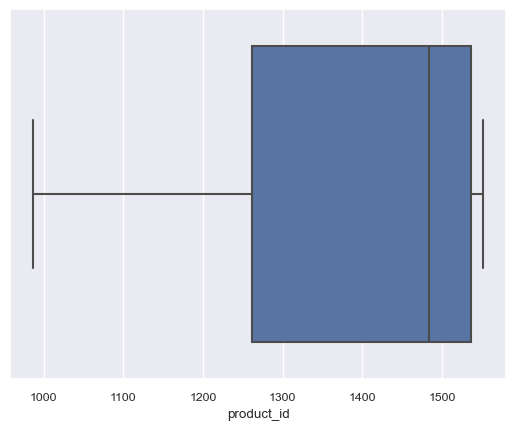

In [151]:
sns.boxplot(data=check_distribution,x='product_id') #surprisingly there are no outliers in orders per days SO THAT MEANS I CAN USE AVERAGE LETS GO

<AxesSubplot: xlabel='product_id'>

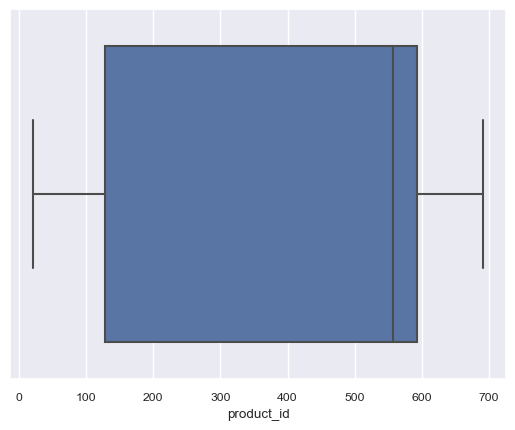

In [152]:
sns.boxplot(data=check_distribution2,x='product_id')#hour

<AxesSubplot: xlabel='product_id'>

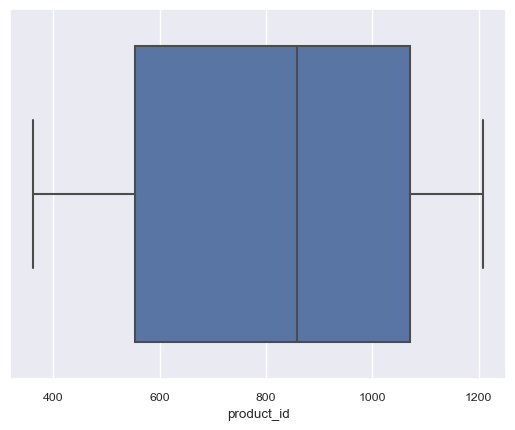

In [153]:
sns.boxplot(data=check_distribution3,x='product_id')#month

Although we've seen the top 5 products amount sold per day chart before, let's take a closer look at the Health and Beauty product category.

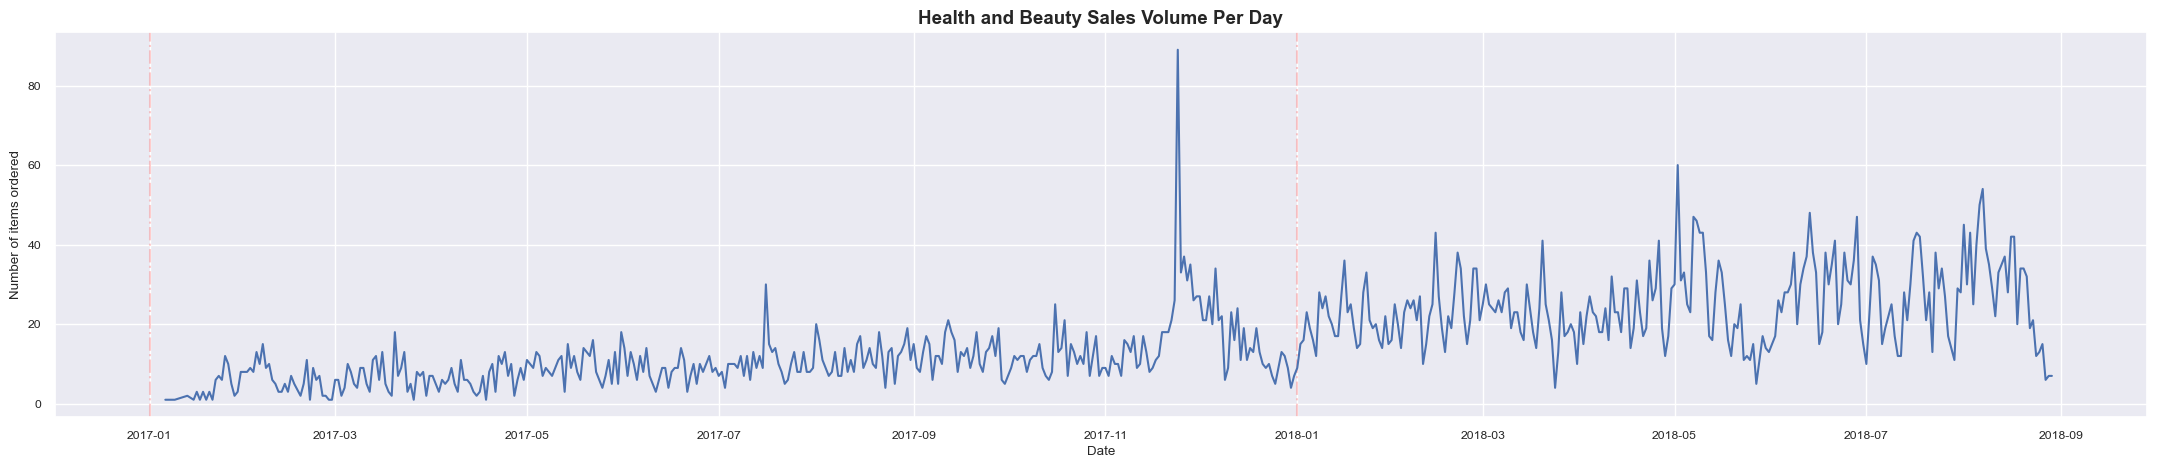

In [154]:
fig, ax = plt.subplots(figsize=(27,5))
#df grouped by day and count
df_by_day = df_hb_time.groupby(df_hb_time['order_purchase_timestamp'].dt.date)['product_id'].count()

ax.axvline(x=pd.to_datetime('2017-01-01'), linestyle='-.', color='red',alpha=0.2)
ax.axvline(x=pd.to_datetime('2018-01-01'), linestyle='-.', color='red',alpha=0.2)
ax.set_title('Health and Beauty Sales Volume Per Day',fontweight="bold",fontsize = 13.5)

#chart
plt.plot(df_by_day.index, df_by_day.values)
plt.xlabel('Date')
plt.ylabel('Number of items ordered')
plt.show()

The faint red dash-dotted lines mark the start of a year.
<br/><br/>
Here's a brief summary of what we've learned through this chart:
- Even though 2016 is removed due to incomplete entries, there are still dates without information in early 2017.
- As with the others, there is a clear and noticable spike identified as Black Friday.
- Although Black Friday, marking the start of Christmas shopping season, might be a common phenomenon in Brazil and perhaps many countries in North and South America **it's worth acknowledging** the impact it brings.
- Black Friday doesn't only cause a spike in amount of items ordered, it also leaves a lingering high for around a month.
- There is a significant overall increase in 2018, starting from the end of 2017.
- It is unclear what caused this quantity sold increase. At first this analyst assumed it's because of Christmas, New Years, and summer in Brazil which lasts from November - March, but the high spikes remain constant even until the end.

Text(0.5, 1.0, 'Health and Beauty Sales Volume Per Week')

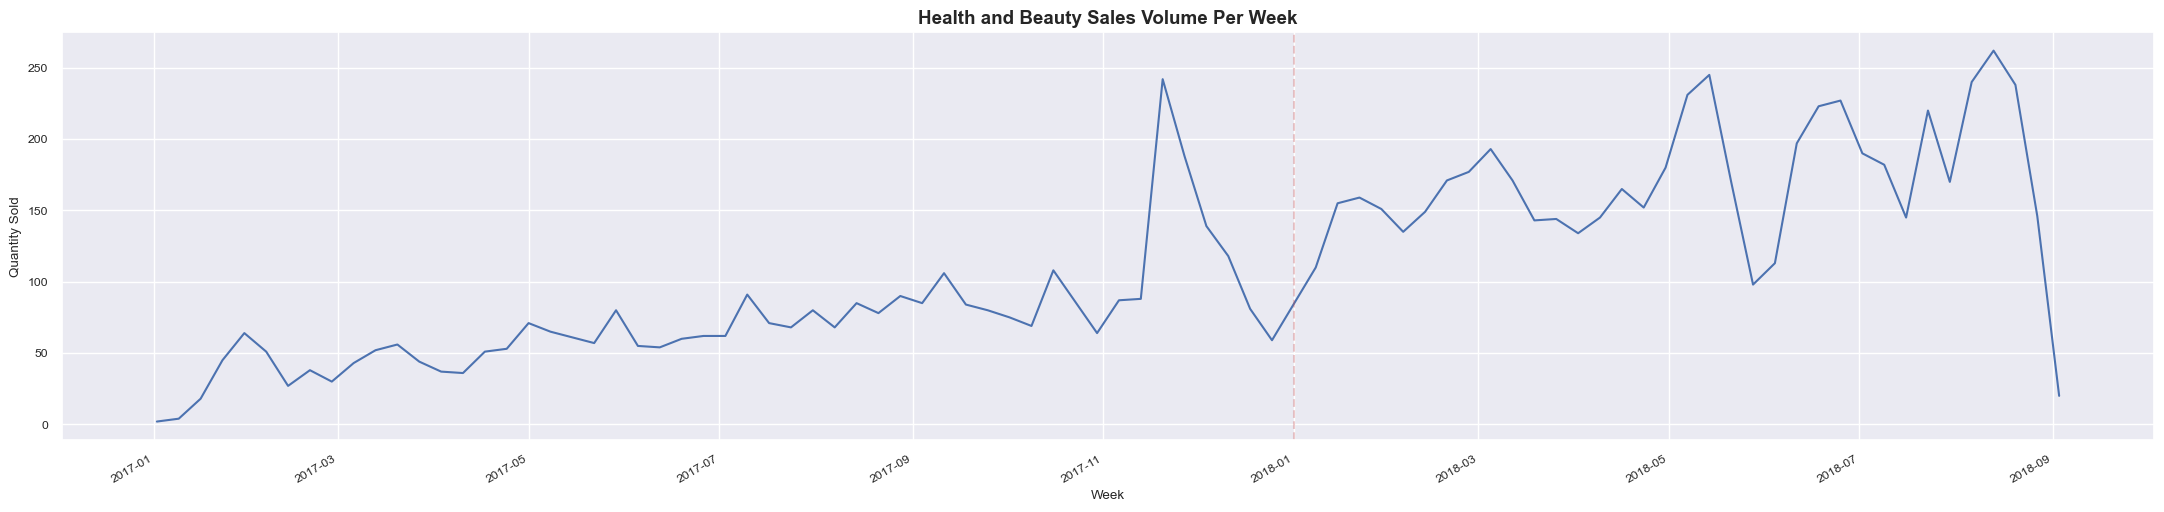

In [155]:
fig, ax = plt.subplots(figsize=(27,6))

weekly_sales = df_hb_time.groupby(['year_week'])['product_id'].count()

#linechart
weekly_sales.plot.line()

plt.axvline(x='2018-1', color='r', linestyle='--', alpha=0.3)

plt.xlabel('Week')
plt.ylabel('Quantity Sold')
ax.set_title('Health and Beauty Sales Volume Per Week',fontweight="bold",fontsize = 13.5)


This is a visualization of total item quantity ordered per week. The faint red line resembles the start of 2018.

Through this visualization the increase is even more obvious, due to the removal of turbulent spikes and dips in amount of items ordered per day. 

One concerning thing about the final week of this chart is the sharp drop at the end of the plot.



In [156]:
weekly_sales.tail()

year_week
2018-08-06    240
2018-08-13    262
2018-08-20    238
2018-08-27    146
2018-09-03     20
Name: product_id, dtype: int64

It turns out the drop is caused by the last entry being not a complete week and only recording 20 items per day, breaking the pattern of the previous entry.

It's best to not consider this anomaly in our analysis and later on in our modeling. 

Let's try to see how it looks per month.

Text(0.5, 1.0, 'H & B Product Sales Volume Per Month (2017)')

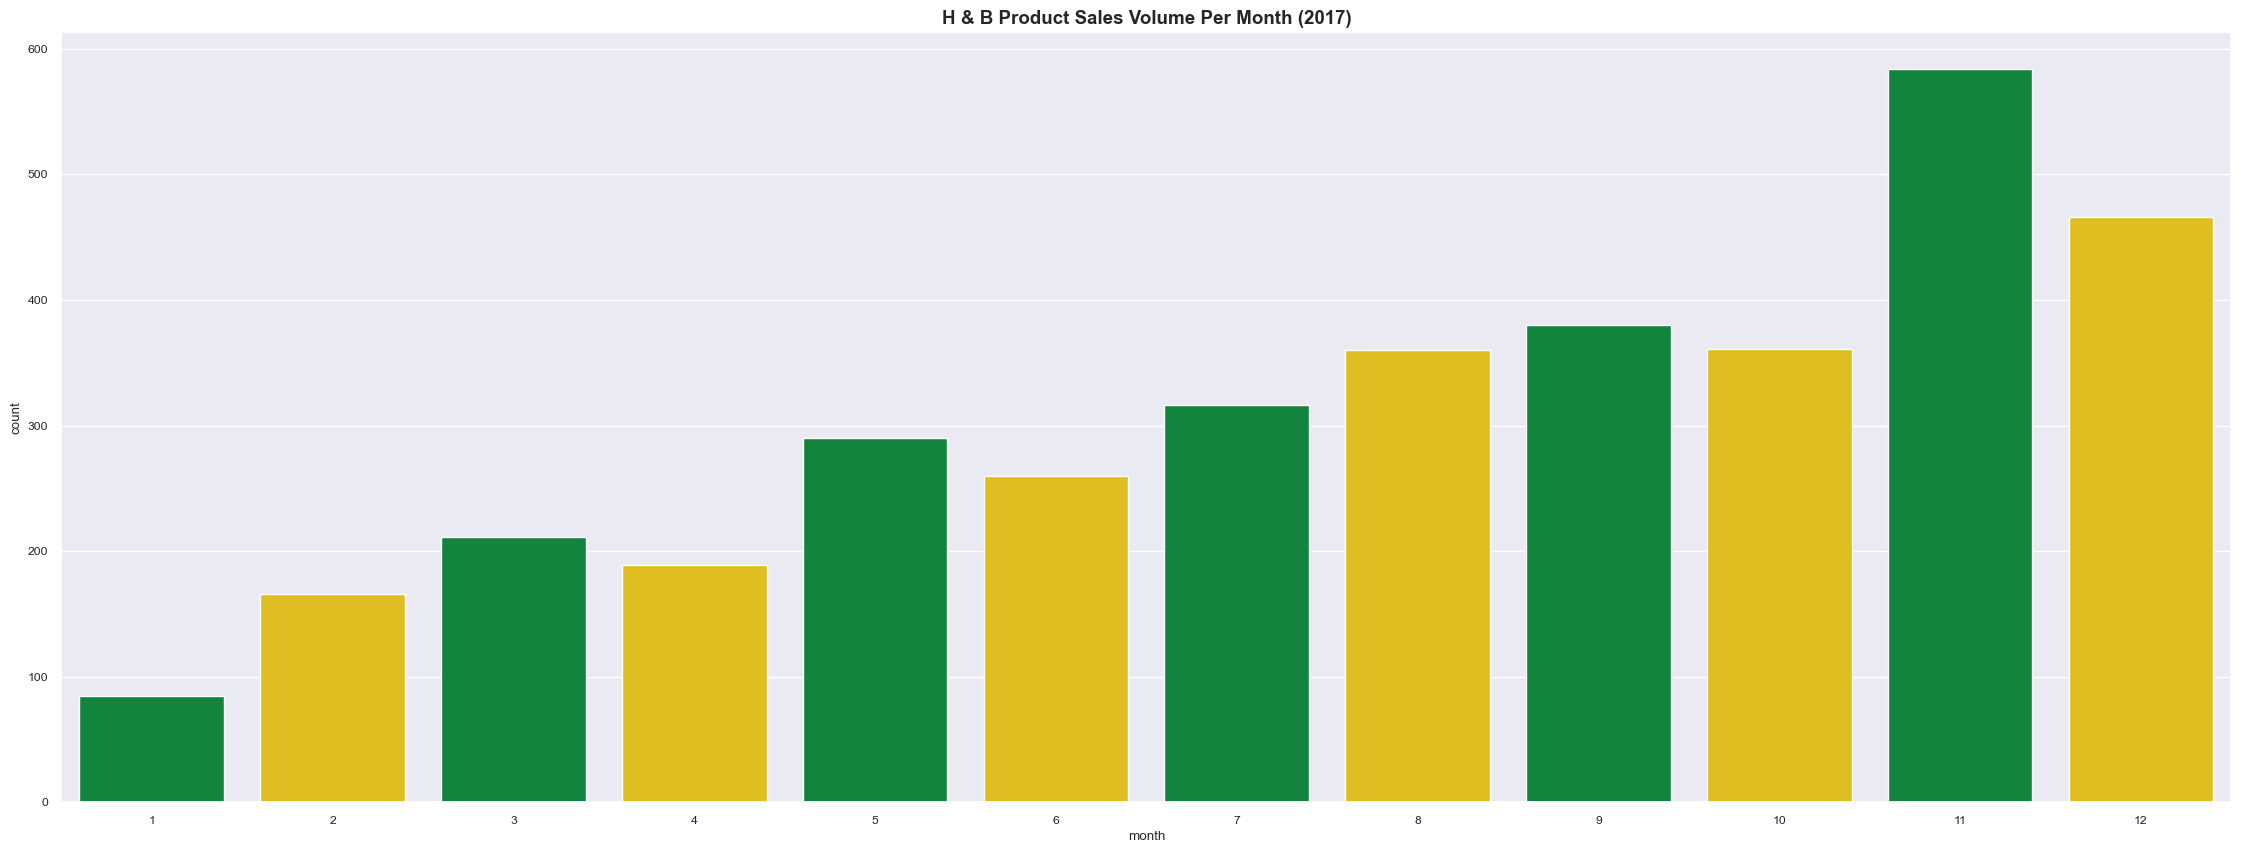

In [157]:
fig, ax = plt.subplots(figsize=(28,10))


df_hb_time_2017 = df_hb_time[df_hb_time['year']==2017]
df_hb_time_2018 = df_hb_time[df_hb_time['year']==2018]

sns.countplot(data=df_hb_time_2017, x='month',
              
                dodge=True,
              palette=brazil)

ax.set_title('H & B Product Sales Volume Per Month (2017)',fontweight="bold",fontsize = 13.5)

This visualization is very limited because:
- 2016 has too many missing entries to be included.
- 2018 entries end in September, which prevents us from making a balanced comparison.
- We are left with only 2017 as the year with relatively complete entries.
- Even then we're not sure why there's such low sales volume in January 2017, considering the sales volume in January 2018 is not as low.
<br/><br/>

However, there is information that we could extract from this visualization:

- November is month with highest sales volume, perchance because affected by Black Friday and Christmas.
- December is the second highest month with sales volume, which could be because it's around the time Brazillians get their [13th paycheck.](https://boundlesshq.com/guides/brazil/benefits/#:~:text=The%2013th%20salary%20can%20be,along%20with%20their%20vacation%20bonus.)
- Interestingly, it shows somewhat of a linear pattern.

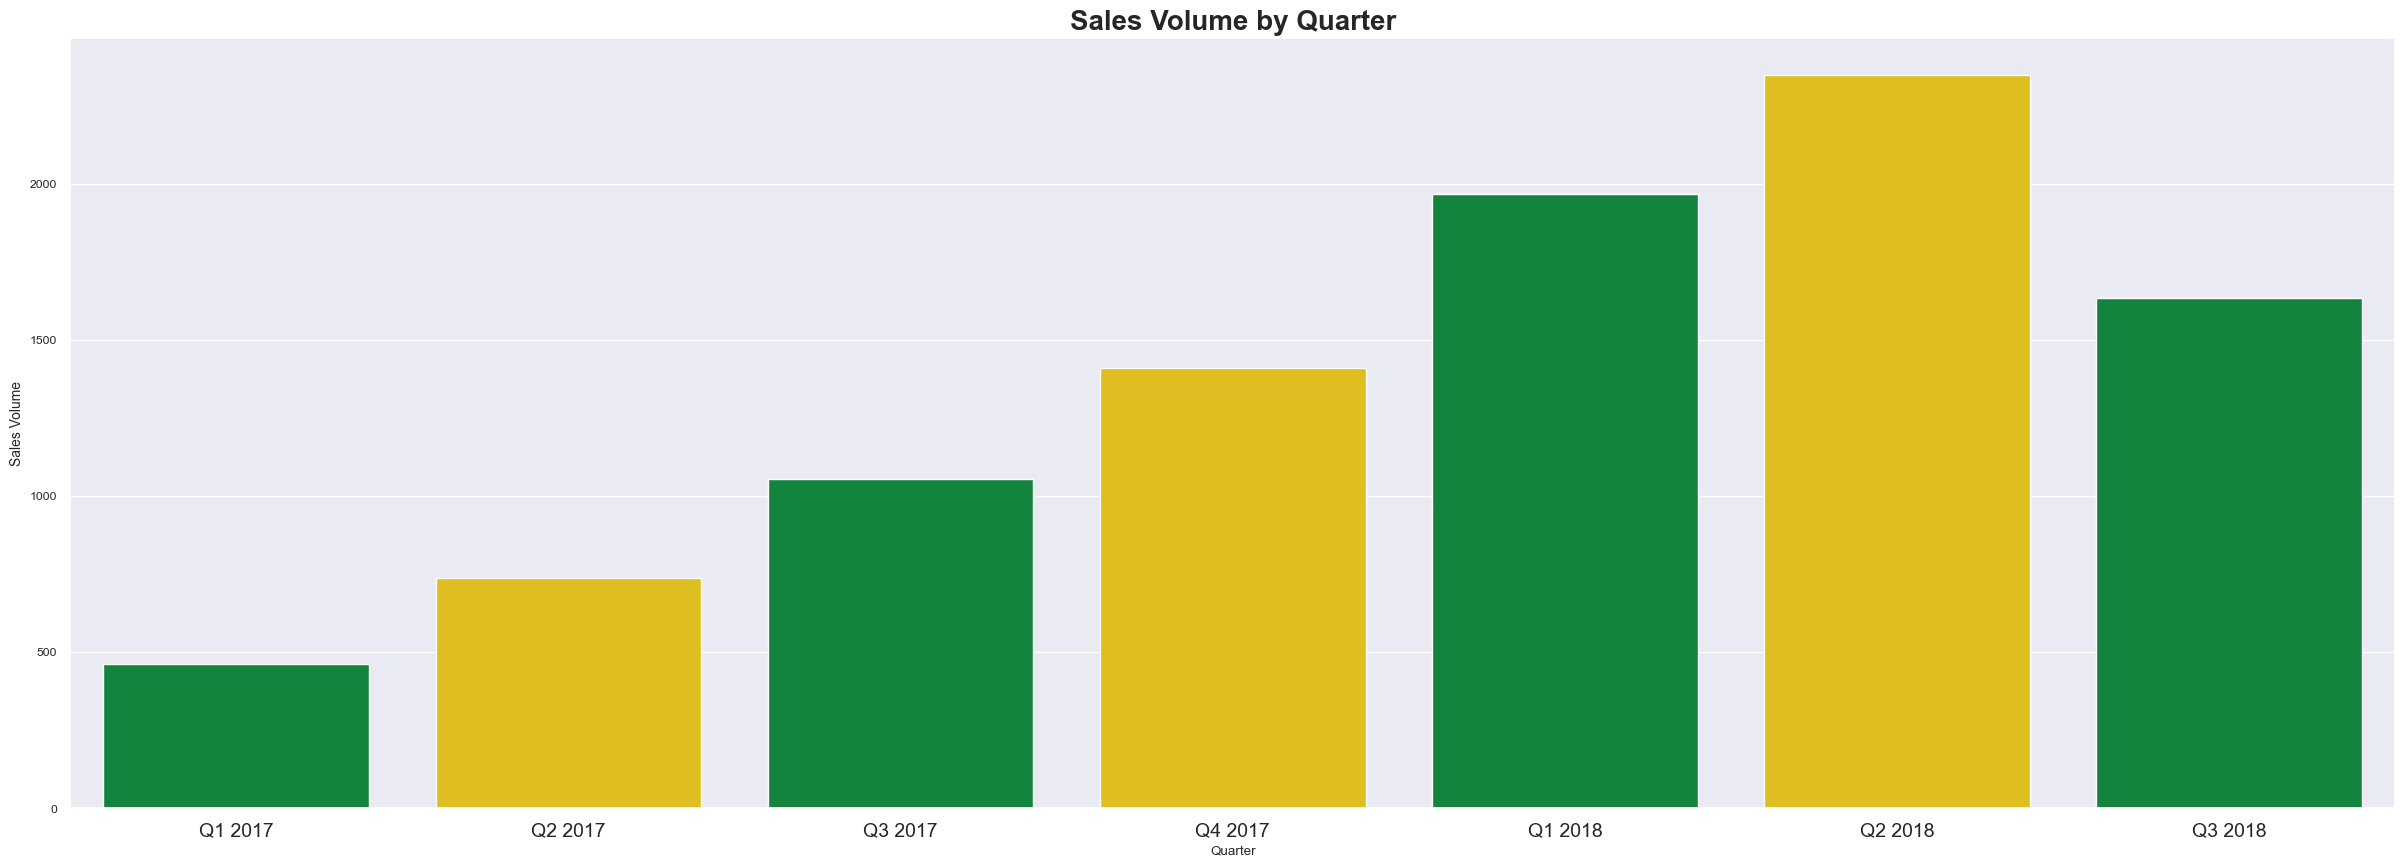

In [158]:
#quarterly df
df_hb_q = df_hb_time

#quarter col
df_hb_q['quarter'] = 'Q' + df_hb_q['order_purchase_timestamp'].dt.quarter.astype(str) + ' ' + df_hb_q['order_purchase_timestamp'].dt.year.astype(str)

#volume by quarter
volume_by_quarter = df_hb_q.groupby('quarter')['product_id'].count().reset_index()

# setting the orders
order = ['Q1 2017', 'Q2 2017', 'Q3 2017', 'Q4 2017', 'Q1 2018', 'Q2 2018', 'Q3 2018']

#bar
plt.figure(figsize=(30,10))
sns.barplot(x='quarter', y='product_id', data=volume_by_quarter, order=order,palette=brazil)
plt.xlabel('Quarter')
plt.ylabel('Sales Volume',fontsize=10)
plt.title('Sales Volume by Quarter',fontsize=20,fontweight='bold')
plt.xticks(fontsize=14)
plt.show()

The linear trend is even more noticable if binned per quarter, from Q1 2017 to Q2 2018.

Q3 2018 doesn't really capture the sales volume accurately because there is incomplete entry in the months of that quarter, so it's best we ignore it for now.

Text(0.5, 1.0, 'H & B Sales Volume Per Day of Week')

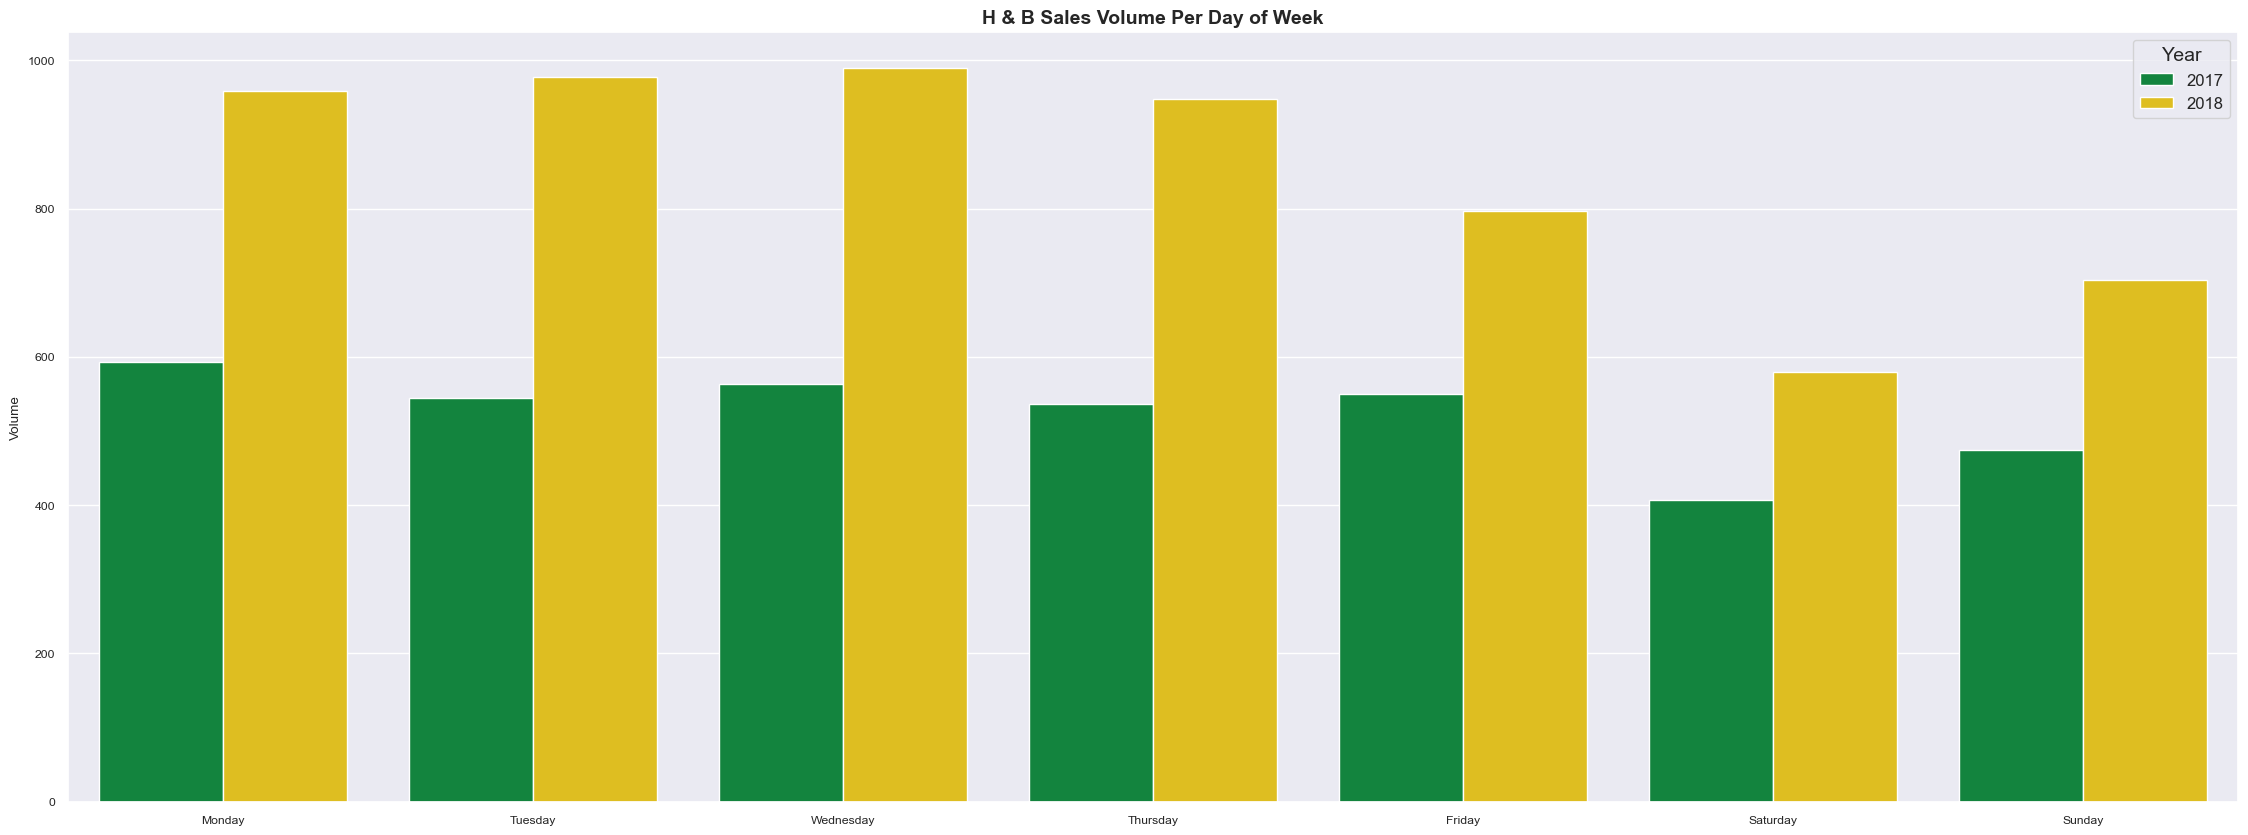

In [159]:
fig, ax = plt.subplots(figsize=(28,10))

day_order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

sns.countplot(data=df_hb_time, x='day_of_week',
              order=day_order,
              dodge=True,
              hue='year',
              palette=brazil)

plt.xlabel('')
plt.ylabel('Volume')
plt.legend(title='Year', loc='best', prop={'size': 12}, title_fontsize=14)

ax.set_title('H & B Sales Volume Per Day of Week',fontweight="bold",fontsize = 14)

Surprisingly, weekends aren't popular days to shop for health & beauty products. 

Most sales volume are in weekdays with Wednesday, of all days, is the day with most sales volumes.

Comparing the sales volume between 2017 and 2018, there's the obvious increase but weekends remains the days with less sales volume and weekdays with higher sales volume, with Wednesday as the highest day.

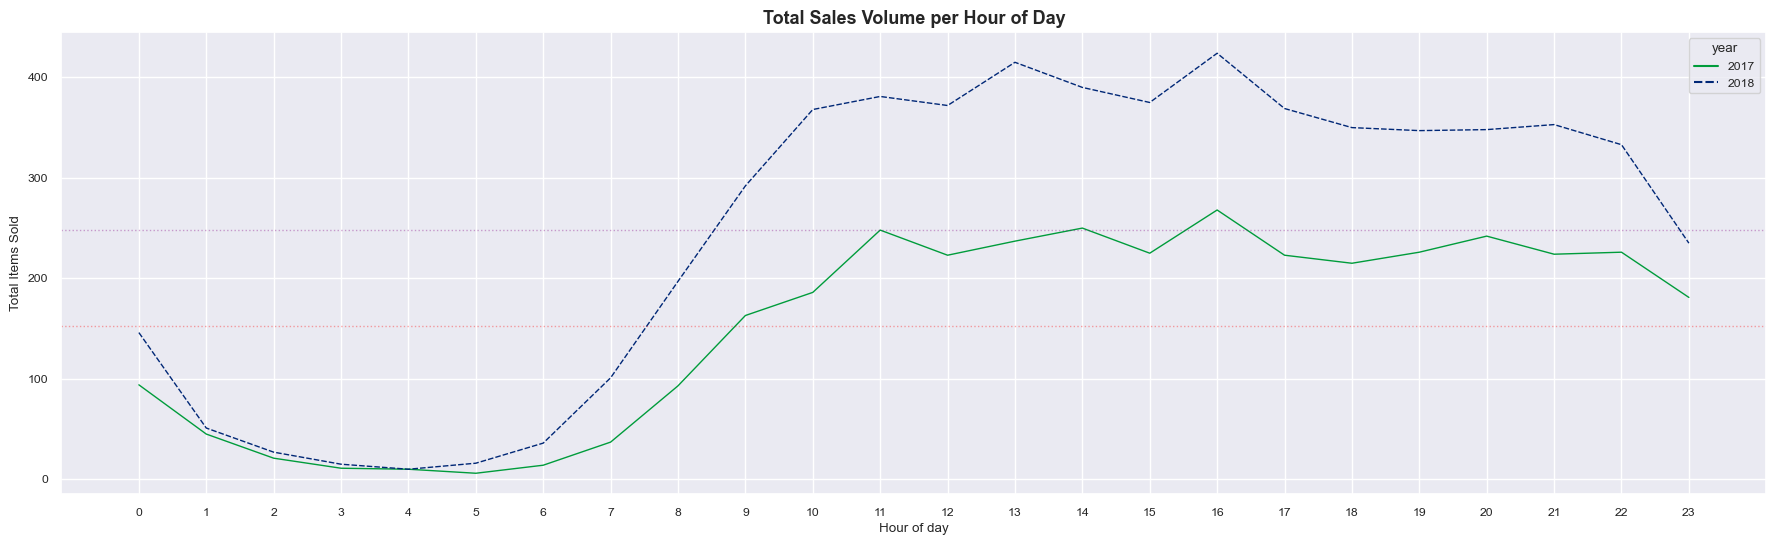

In [160]:
plt.figure(figsize=(22,6))
#grouping based on hour and year for comparison
counts_by_hour = df_hb_time.groupby(['hour','year'])['product_id'].count().reset_index() 



#the lineplot
product_sold_hour = sns.lineplot(data=counts_by_hour, x='hour', y='product_id', hue='year', 
                                 linewidth=1, palette=gb, style='year',
                                 legend='auto')

#plot customization
plt.title('Total Sales Volume per Hour of Day',fontweight="bold",fontsize = 13)
plt.xlabel('Hour of day')
plt.ylabel('Total Items Sold')
product_sold_hour.set_xticks(range(24))

#average line for comparison
counts_by_hour2017 = counts_by_hour[counts_by_hour['year']==2017]
counts_by_hour2018 = counts_by_hour[counts_by_hour['year']==2018]


plt.axhline(counts_by_hour2017['product_id'].mean()#The mean line
             ,alpha=0.35, c="red", linewidth=1, linestyle=":")
plt.axhline(counts_by_hour2018['product_id'].mean()#The mean line
             ,alpha=0.35, c="purple", linewidth=1, linestyle=":")

plt.show()# I found a pattern.

The line chart visualization shows the amount of products sold per hour of day, excluding Black Friday 2017. Even though Black Friday only accounts for 89 products sold, we want to see what a regular day is like for health_beauty products.

The reason why both years are included is so we could compare and identify any patterns between the two. 

**Some basic facts:**
- The green solid line represents 2017, lower overall sales volume.
- The faint red dotted horizontal line represents the **2017 average threshold**.
- The blue dashed line represents 2018, higher overall items sales volume.
- The faint purple dotted line represents the **2018 average threshold**.

<br/>

What we can learn from this graph is, even though 2018 shows higher amount of items ordered than 2017, there is a clear similar pattern.
- Both years show below average sales volume from 00:00 to 08:00.
- Both years also breach each corresponding average line threshold between 08:00 - 09:00.
- After breaching the average threshold, both years stay above the threshold until it peaks at 16:00.
- After that the sales volume is steady throughout the night until it steeply declines and the cycle starts over again.
- One random, but interesting, finding is that Brazillians still actively shop for health and beauty products late at night.

This tells us that even though the sales volume for health and beauty product category, the buying pattern is the same. This pattern gives us a major insight on the Health and Beauty customer shopping habits.

</br>

**How could Olist and its merchants use this information?**

- Firstly, being able to know when the customers are active gives insight as to when to push promotions and ads. With this information, Olist could better target their audience to increase the chance of them buying health and beauty products.

- Olist could prioritize certain hours, such as at 13:00 and at 16:00, to push sales through event promotions such as special flash sales.

- This information could also help the merchants with inventory management. By knowing when the customers usually shop, they can anticipate and make sure they have enough products during peak hours to reduce stockouts and lost sales.



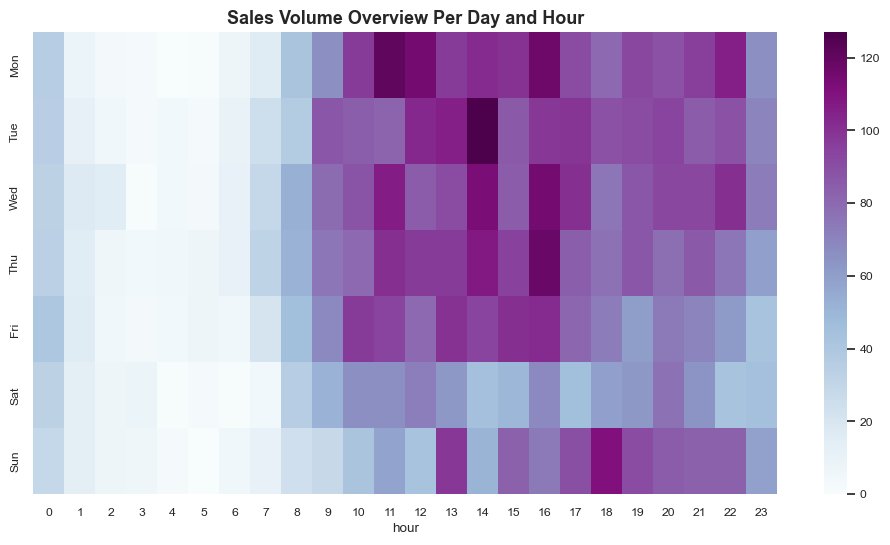

In [161]:
import calendar #for day abbreviation, string too long for viz

#data
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_hb_time2 = df_hb_time
df_hb_time2['day_of_week'] = pd.Categorical(df_hb_time2['day_of_week'], categories=day_order, ordered=True)
pivot_table = df_hb_time2.pivot_table(values='product_id', index='day_of_week', columns='hour', aggfunc='count')

#viz
fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_table, cmap='BuPu')

plt.ylabel('')
abbrev_day_names = [calendar.day_abbr[i] for i in range(7)]
ax.set_yticklabels(abbrev_day_names)

plt.title('Sales Volume Overview Per Day and Hour',fontweight="bold",fontsize = 13)
plt.show()

This visualization is a summary of sales volume made based on hour of day and days.

The thing about heatmap matrix visualization is it allows you to have a better perspective of the bigger picture and allows you to immediately identify the heat spots. 

Even at a glance you can immediately tell:
- The hotter areas are in weekdays between 09:00 to 22:00.
- Saturday shows an overall cool temperature meaning there it's the day with least sales in all hours.
- Sunday is interesting because it is a weekend but has some hot hot spots such as at 13:00 and 18:00
- Even though our previous findings show Wednesday as the day with most sales, Tuesday at 14:00 shows much heat, and perhaps even the time of the week with most activity.


# Machine Learning Model Data Preparation

The first step in this process is to prepare the data from the order table.

Based on data understanding, there are some missing values in the order_approved_at, order_delivered_carrier_date, and order_delivered_customer_date variables. 

However, the relevant variable for our project is only the order purchase timestamp, so it's more efficient for us to remove irrelevant variables than to handle the missing values of said variables.

The order purchase timestamp should also be formatted as a datetime variable. Dates will be trimmed to date only (no time), so they can be grouped by day later.

In [162]:
# Drop Unused Columns
drop_cols = ['order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date']
df_order.drop(columns=drop_cols, inplace=True)

In [163]:
# Converting Date Variables to datetime datatypes and only take the dates (Year-Month-Day)
df_order['order_purchase_timestamp'] = pd.to_datetime(df_order['order_purchase_timestamp'], format='%Y-%m-%d').dt.date
df_order.sort_values(by = 'order_purchase_timestamp', inplace = True)

In [164]:
df_order.head()

order_id                       customer_id  \
4541   2e7a8482f6fb09756ca50c10d7bfc047  08c5351a6aca1c1589a38f244edeee9d   
4396   e5fa5a7210941f7d56d0208e4e071d35  683c54fc24d40ee9f8a6fc179fd9856c   
10071  809a282bbd5dbcabb6f2f724fca862ec  622e13439d6b5a0b486c435618b2679e   
30710  bfbd0f9bdef84302105ad712db648a6c  86dc2ffce2dfff336de2f386a786e574   
83078  71303d7e93b399f5bcd537d124c0bcfa  b106b360fe2ef8849fbbd056f777b4d5   

      order_status order_purchase_timestamp  
4541       shipped               2016-09-04  
4396      canceled               2016-09-05  
10071     canceled               2016-09-13  
30710    delivered               2016-09-15  
83078     canceled               2016-10-02

The next step is to prepare the data from the order item table that is already merged with product table. 

From the data understanding process we conclude that there are repeating records (duplicated records) in the table. The duplicated records are in reality the same order line but broken down into multiple entries. 

In other words: The structure of this order item table is not using order quantities but repeating order lines ('order_item_id' is a running order line count). The duplicated records is demonstrated as the following.

In [165]:
# Sample repeating orders
df_product_order_items[df_product_order_items['order_id'] == '0148d3df00cebda592d4e5f966e300cc']

order_id  order_item_id  \
13262  0148d3df00cebda592d4e5f966e300cc              1   
13263  0148d3df00cebda592d4e5f966e300cc              2   
13264  0148d3df00cebda592d4e5f966e300cc              3   
13265  0148d3df00cebda592d4e5f966e300cc              4   
13266  0148d3df00cebda592d4e5f966e300cc              5   

                             product_id                         seller_id  \
13262  ed08ea04c92f5f434c2362f7310fb328  0adac9fbd9a2b63cccaac4f8756c1ca8   
13263  ed08ea04c92f5f434c2362f7310fb328  0adac9fbd9a2b63cccaac4f8756c1ca8   
13264  ed08ea04c92f5f434c2362f7310fb328  0adac9fbd9a2b63cccaac4f8756c1ca8   
13265  ed08ea04c92f5f434c2362f7310fb328  0adac9fbd9a2b63cccaac4f8756c1ca8   
13266  ed08ea04c92f5f434c2362f7310fb328  0adac9fbd9a2b63cccaac4f8756c1ca8   

       shipping_limit_date  price  freight_value  \
13262  2017-08-24 19:24:32   5.53          11.85   
13263  2017-08-24 19:24:32   5.53          11.85   
13264  2017-08-24 19:24:32   5.53          11.85   
13265  2017-08-24 19:24:32   5.53          11.85   
13266  2017-08-24 19:24:32   5.53          11.85   

      product_category_name_english  sum_items_in_order  
13262                    housewares                   5  
13263                    housewares                   5  
13264                    housewares                   5  
13265                    housewares                   5  
13266                    housewares                   5

As you can see from the sample order records above, the 'order_item_id' value is a running order line count that makes the others variables value repeat the same value.

We need a quantity variable for an order profile analysis. A new quantity column will be added which accumulates the order quantity.

Before that, let's check the assumption that 1 order_id may have more than 1 product ( multiple items in 1 transaction).

In [166]:
#1 order_id may have more than 1 product ?
df_product_order_items[df_product_order_items['order_id'] == 'ead893b6feb078f2a8f88787db56dcc7']

order_id  order_item_id  \
110792  ead893b6feb078f2a8f88787db56dcc7              1   
110793  ead893b6feb078f2a8f88787db56dcc7              2   

                              product_id                         seller_id  \
110792  d5cf579c6679ff170fe911659e186285  ae45df84722b1d15c5f32b23a095746c   
110793  9a36ef546bfd8ad2c01c308dcfe4084f  ae45df84722b1d15c5f32b23a095746c   

        shipping_limit_date  price  freight_value  \
110792  2018-06-25 09:58:12  99.99           7.96   
110793  2018-06-25 09:58:12  99.90           7.96   

       product_category_name_english  sum_items_in_order  
110792                 health_beauty                   2  
110793                 health_beauty                   2

from the table above, the assumption is that 1 order can have more than 1 product_id is valid, because we can see that in the table above, the order_id is same, but have more that 1 product_id

Therefore, we need to group by order_id and product_id to get the real quantity of each order and product id. 

In [167]:
# Grouping by SKU and order ID:
new_df_order_items = df_product_order_items\
    .groupby(by = ['order_id','product_id'], as_index=False)\
    .agg({
        'order_item_id': 'count', 
        'product_category_name_english' : 'last'
        })
  
new_df_order_items.rename(columns={'order_item_id':'quantity'},inplace=True)

In [168]:
# Check after grouping
new_df_order_items[new_df_order_items['order_id'] == 'ead893b6feb078f2a8f88787db56dcc7']

order_id                        product_id  \
94009  ead893b6feb078f2a8f88787db56dcc7  9a36ef546bfd8ad2c01c308dcfe4084f   
94010  ead893b6feb078f2a8f88787db56dcc7  d5cf579c6679ff170fe911659e186285   

       quantity product_category_name_english  
94009         1                 health_beauty  
94010         1                 health_beauty

The next step is to narrow the scope. As the EDA suggests, health & beauty is the selected product category.

In [169]:
# Filter bookings that buy products with the health and beauty category
new_df_order_items = new_df_order_items[new_df_order_items['product_category_name_english'] == 'health_beauty']

In [170]:
# Check after grouping
new_df_order_items[new_df_order_items['order_id'] == 'ead893b6feb078f2a8f88787db56dcc7']

order_id                        product_id  \
94009  ead893b6feb078f2a8f88787db56dcc7  9a36ef546bfd8ad2c01c308dcfe4084f   
94010  ead893b6feb078f2a8f88787db56dcc7  d5cf579c6679ff170fe911659e186285   

       quantity product_category_name_english  
94009         1                 health_beauty  
94010         1                 health_beauty

We know that after the grouping step based on order_id and product_id, of course there are still duplicate order_id values because the different products purchased cause the creation of different records with the same order_id. therefore we will need to have a variable for the total price of an order. the column is generated from adding the prices of the total prices of several different products with the same order_id.

We also need to remove some variables from the order items table. this is done because not all variables are used for our project. Variables used are listed as follows.
- order_id -> for joining with order table
- quantity -> target variables for forecasting
- total_product_price (without freight value) -> target variables for forecasting in future works



## Combine Order & Order Item Table

In [171]:
data_for_ml = pd.merge(df_order,new_df_order_items, on = 'order_id')
data_for_ml.head()

order_id                       customer_id  \
0  bfbd0f9bdef84302105ad712db648a6c  86dc2ffce2dfff336de2f386a786e574   
1  985db56d4cabd2577d0960194dd2cd5a  93b0959b3704e65ceaf6cd4bcdfea834   
2  51725d3e4bdfc97e28b40543310da8a3  a0f95ab56c6d3a5ba0036b7fdfeda07f   
3  51725d3e4bdfc97e28b40543310da8a3  a0f95ab56c6d3a5ba0036b7fdfeda07f   
4  b0cfee6ce5503781be6004e0e31e4309  9e18a290b9d17b14fe33b68a0ea2bfeb   

  order_status order_purchase_timestamp                        product_id  \
0    delivered               2016-09-15  5a6b04657a4c5ee34285d1e4619a96b4   
1    delivered               2016-10-04  062619359d5f9a664606cb2a6ccb477a   
2    delivered               2016-10-04  79938780eb7ffb7289f59a9a283bc06b   
3    delivered               2016-10-04  8f1e43e0e3374ed8c84df748034d6179   
4    delivered               2016-10-04  44377a26f7c80dbf0a9b2b300604e6bf   

   quantity product_category_name_english  
0         3                 health_beauty  
1         1                 health_beauty  
2         1                 health_beauty  
3         1                 health_beauty  
4         1                 health_beauty

In [172]:
data_for_ml.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
product_id                       0
quantity                         0
product_category_name_english    0
dtype: int64

In [173]:
data_for_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9022 entries, 0 to 9021
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       9022 non-null   object
 1   customer_id                    9022 non-null   object
 2   order_status                   9022 non-null   object
 3   order_purchase_timestamp       9022 non-null   object
 4   product_id                     9022 non-null   object
 5   quantity                       9022 non-null   int64 
 6   product_category_name_english  9022 non-null   object
dtypes: int64(1), object(6)
memory usage: 563.9+ KB


seems order_purchase_timestamp are still in object datatype, lets convert to datetime

In [174]:
data_for_ml['order_purchase_timestamp'] = pd.to_datetime(data_for_ml['order_purchase_timestamp'])

## Creating Daily Orders Summary Table

In [175]:
df_orders_daily=data_for_ml.groupby('order_purchase_timestamp').agg({
        'quantity':'sum',
        }).reset_index()

df_orders_daily.rename(columns={
    'order_purchase_timestamp' : 'date',
    },inplace=True)

df_orders_daily

date  quantity
0   2016-09-15         3
1   2016-10-04        11
2   2016-10-05         4
3   2016-10-06         8
4   2016-10-07         7
..         ...       ...
597 2018-08-25        13
598 2018-08-26        15
599 2018-08-27         6
600 2018-08-28         7
601 2018-08-29         7

[602 rows x 2 columns]

based on the EDA process, we already know that our dataset has missing dates. because our goal is to forecast with a model that produces predictive results as accurately as possible, we need to need full date data. let's check the missing date data again.

In [176]:
# because the first and last date in the dataset has changed due to the previous process, we need to define the updated date range again
# Define the start and end dates
start_date = '2016-09-15' # first entry is updated to  September 15th, 2016
end_date = '2018-08-29' # last entry is on August 29th, 2018

# Create a date range
date_range = pd.date_range(start=start_date, end=end_date)

# Create a dataframe with the date range as a column
df_date = pd.DataFrame({'Date': date_range})
df_date["Date"] = pd.to_datetime(df_date["Date"])

# store missing dates
missing_dates = pd.DataFrame({'dates':df_date["Date"][df_date["Date"].isin(df_orders_daily['date']) == False]})
missing_dates['year'] = missing_dates['dates'].dt.year

In [177]:
print("Missing dates in 2016")
display(missing_dates[missing_dates['year'] == 2016])

Missing dates in 2016


dates  year
1   2016-09-16  2016
2   2016-09-17  2016
3   2016-09-18  2016
4   2016-09-19  2016
5   2016-09-20  2016
..         ...   ...
103 2016-12-27  2016
104 2016-12-28  2016
105 2016-12-29  2016
106 2016-12-30  2016
107 2016-12-31  2016

[100 rows x 2 columns]

In [178]:
print("Missing dates in 2017")
display(missing_dates[missing_dates['year'] == 2017])


Missing dates in 2017


dates  year
108 2017-01-01  2017
109 2017-01-02  2017
110 2017-01-03  2017
111 2017-01-04  2017
112 2017-01-05  2017
115 2017-01-08  2017
117 2017-01-10  2017
118 2017-01-11  2017
119 2017-01-12  2017
121 2017-01-14  2017
155 2017-02-17  2017
247 2017-05-20  2017

In [179]:
print("Missing dates in 2018")
display(missing_dates[missing_dates['year'] == 2018])

Missing dates in 2018


Empty DataFrame
Columns: [dates, year]
Index: []

After examining the transaction data, we identified missing dates in both 2016 and 2017. There are 100 missing dates in 2016, spanning from September to December, and 12 missing dates in 2017, including 10 days in January, 1 day in February, and 1 day in May.

To address these missing values, we decided to take the following steps:

1. Since there are so many missing dates in 2016, we chose to exclude this year from our analysis. Additionally, Olist shops was established in 2016, so the data for this year is incomplete and less useful for forecasting purposes.

2. For the 12 missing dates in 2017, we decided to use the forward fill (ffill) method to replace the missing values. This method fills in the missing values with the most recent non-null value in the dataset. In this case, the ffill method allows us to maintain the continuity of the data, so that the quantity data for missing dates follows its neighbors.

After applying these steps, the complete date range for our dataset is from January 15, 2017 to August 29, 2018. This ensures that we have a clean, continuous dataset for our analysis and forecasting.

In [180]:
# merge daily orders table and Date
df_orders_daily = pd.merge(df_orders_daily,df_date,how='right', left_on='date',right_on="Date")
df_orders_daily.drop(columns='date',inplace=True)
df_orders_daily

quantity       Date
0         3.0 2016-09-15
1         NaN 2016-09-16
2         NaN 2016-09-17
3         NaN 2016-09-18
4         NaN 2016-09-19
..        ...        ...
709      13.0 2018-08-25
710      15.0 2018-08-26
711       6.0 2018-08-27
712       7.0 2018-08-28
713       7.0 2018-08-29

[714 rows x 2 columns]

In [181]:
# Take data which dates are within range of 5 January 2017 - 29 August 2018 
df_orders_daily = df_orders_daily[(df_orders_daily['Date'] >= '2017-01-15') & (df_orders_daily['Date'] <= '2018-08-29')]
df_orders_daily

quantity       Date
122       1.0 2017-01-15
123       3.0 2017-01-16
124       1.0 2017-01-17
125       3.0 2017-01-18
126       1.0 2017-01-19
..        ...        ...
709      13.0 2018-08-25
710      15.0 2018-08-26
711       6.0 2018-08-27
712       7.0 2018-08-28
713       7.0 2018-08-29

[592 rows x 2 columns]

In [182]:
df_orders_daily.fillna(method='ffill',inplace=True)

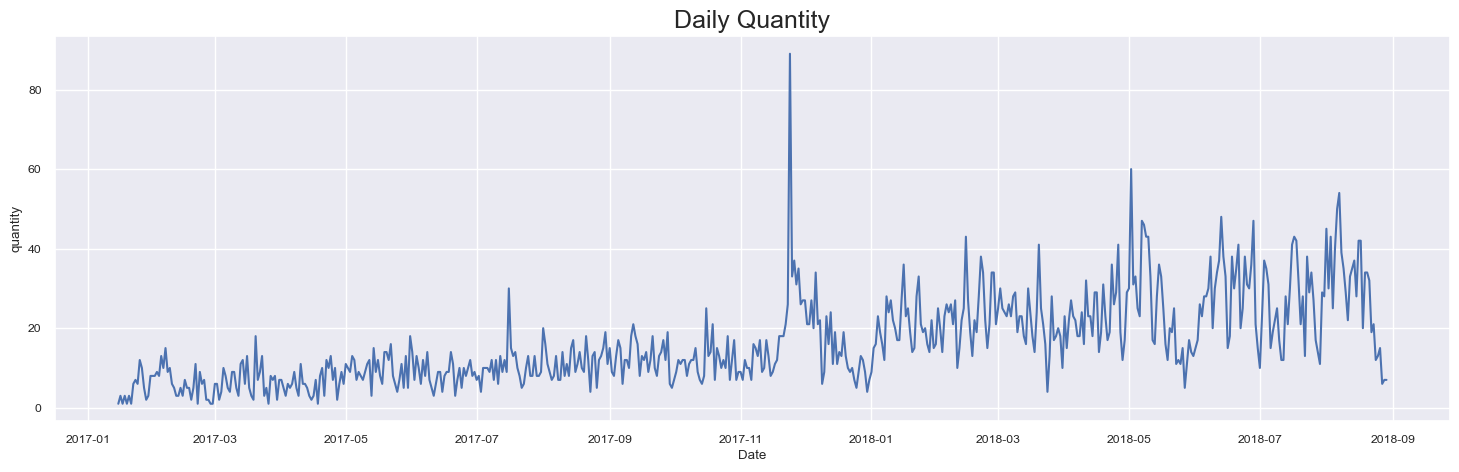

In [183]:
plt.figure(figsize=(18,5))
sns.lineplot(x=df_orders_daily['Date'],y=df_orders_daily['quantity'])
plt.title("Daily Quantity",fontdict={'fontsize' : 18})
plt.show()

## Creating Weekly Orders Summary Table

In [184]:
# group DataFrame by week, starting on Tuesday
df_orders_weekly = (df_orders_daily.set_index('Date')
                  .groupby(pd.Grouper(freq='W'))
                  .sum())

# print first few rows of df_orders_weekly
df_orders_weekly.reset_index(inplace=True)
df_orders_weekly

Date  quantity
0  2017-01-15       1.0
1  2017-01-22      18.0
2  2017-01-29      45.0
3  2017-02-05      64.0
4  2017-02-12      51.0
..        ...       ...
81 2018-08-05     240.0
82 2018-08-12     262.0
83 2018-08-19     238.0
84 2018-08-26     146.0
85 2018-09-02      20.0

[86 rows x 2 columns]

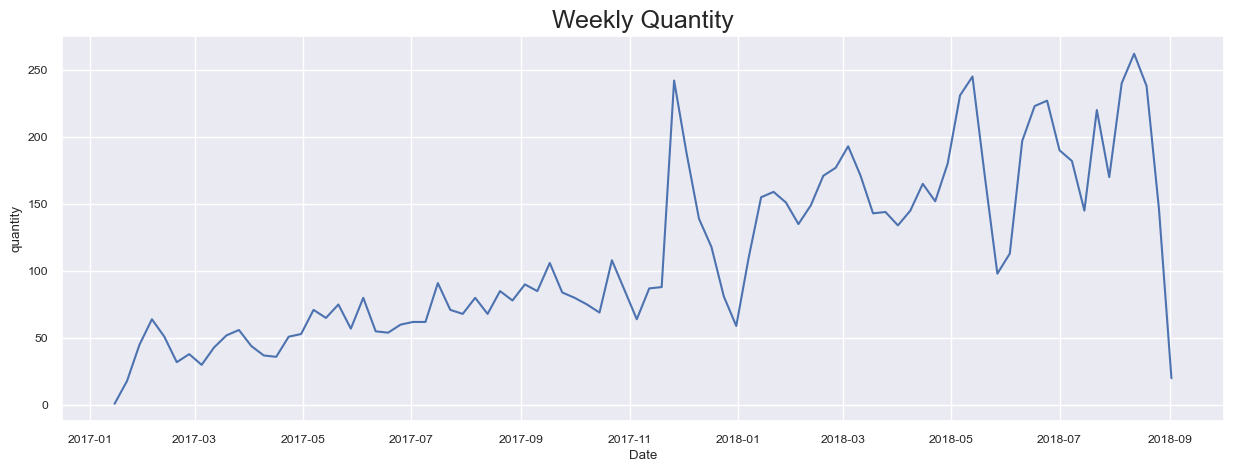

In [185]:
plt.figure(figsize=(15,5))
sns.lineplot(x=df_orders_weekly['Date'],y=df_orders_weekly['quantity'])
plt.title("Weekly Quantity",fontdict={'fontsize':18})
plt.show()

As stated previously during the EDA, we've noticed that there's an anomaly in the weekly chart, there's a sharp drop in the last entry due to the last entry being an incomplete week, with only 1 day entry of said week. 

On the other hand, we also assume that orders in the last week may not have been fully delivered so that the data is not recorded in this dataset.

In [186]:
# Drop last week
df_orders_weekly = df_orders_weekly[:-1]

## Splitting

Considering the relatively complex nature of our dataset, with the seasonality, trends, and other factors that causes spikes or drips, we believe that an **80-20** test-train split is most ideal.

A larger training set allows the model to learn more complex relationships between the features and the target which could hopefully improve the predictive accuracy while at the same time. 

### Daily orders

In [187]:
size = round(len(df_orders_daily)*0.8)
print(f"train size : {size}")
print(f"test size : {len(df_orders_daily) - size}")

train size : 474
test size : 118


In [188]:
daily_train = df_orders_daily[:size]
daily_test = df_orders_daily[size:]

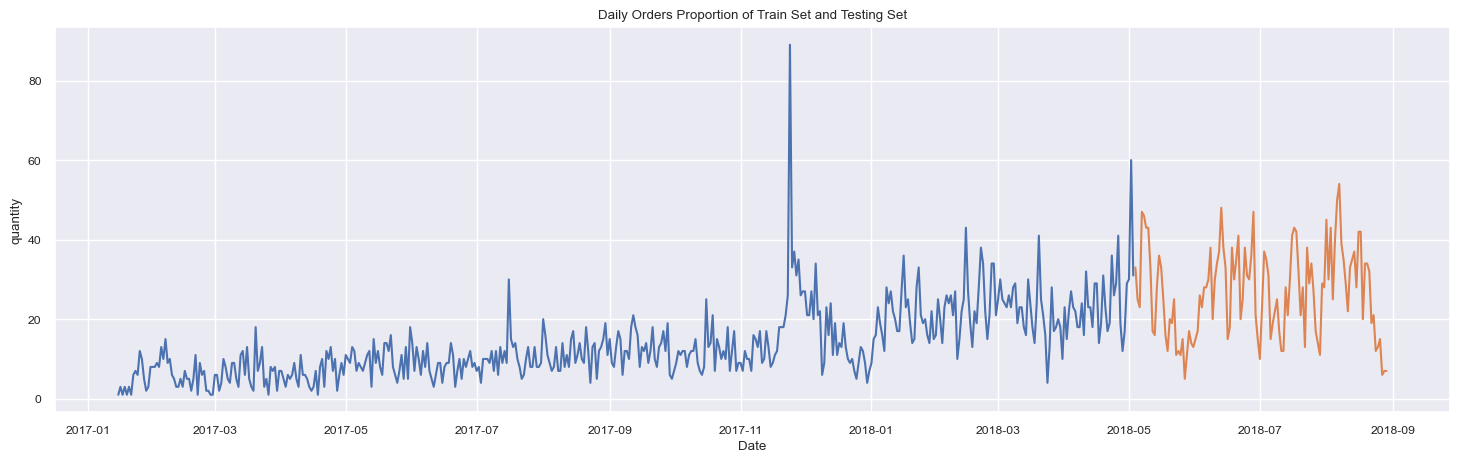

In [189]:
plt.figure(figsize=(18,5))
sns.lineplot(x=daily_train['Date'],y=daily_train['quantity'])
sns.lineplot(x=daily_test['Date'],y=daily_test['quantity'])
plt.title("Daily Orders Proportion of Train Set and Testing Set")
plt.show()

### Weekly Order

In [190]:
size = round(len(df_orders_weekly)*0.8)

In [191]:
weekly_train = df_orders_weekly[:size]
weekly_test = df_orders_weekly[size:]

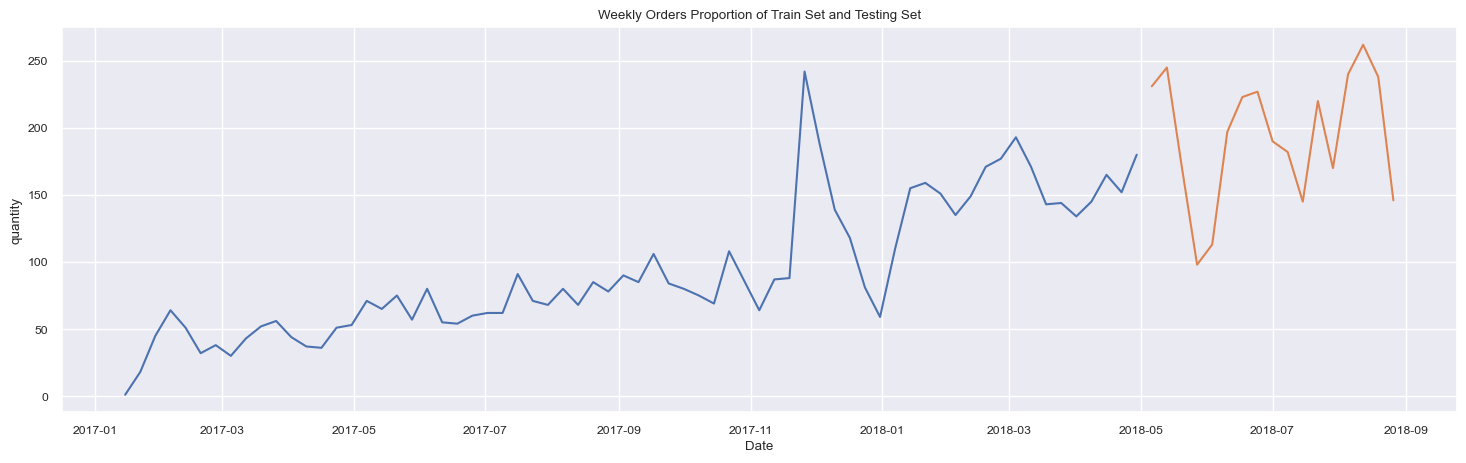

In [192]:
plt.figure(figsize=(18,5))
sns.lineplot(x=weekly_train['Date'],y=weekly_train['quantity'])
sns.lineplot(x=weekly_test['Date'],y=weekly_test['quantity'])
plt.title("Weekly Orders Proportion of Train Set and Testing Set")
plt.show()

# Time Series Model (Auto ARIMA)

Quantity forecasting is done by using machine learning methods. However, there are many machine learning methods for Timeseries Forecasting, we do not know what method is most suitable and produces the smallest prediction error. Popular algorithms for forecasting are ARIMA, SARIMA, and SARIMAX. We will benchmark the three algorithms to find which algorithm can produce the lowest error. The stages of model building are illustrated in the figure below.

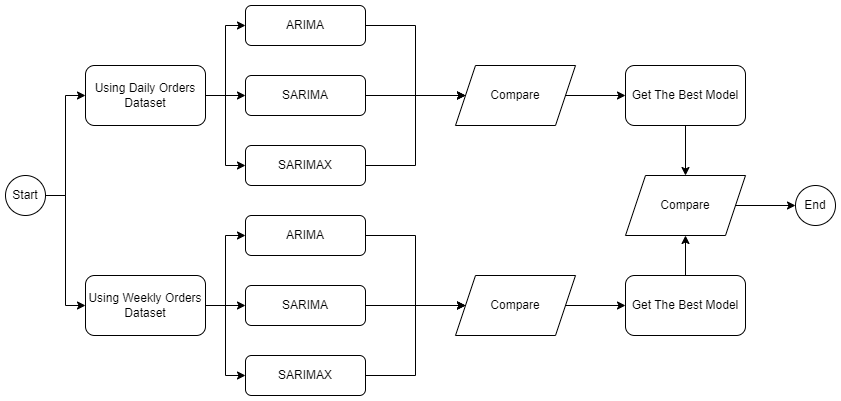

The evaluation metrics used are MAE and MAPE. The reason is because we want to directly represent the results of the model's performance against the business.

<b>Mean Absolute Error (MAE)</b>, as the name implies, MAE is the average of the absolute errors. Compared to MSE or RMSE, MAE is a more direct representation of the amount of error. MSE penalizes large prediction errors by squaring them, whereas MAE treats all errors in the same way. The MAE calculation formula is shown in Figure below.

<img src="https://miro.medium.com/max/640/1*tu6FSDz_FhQbR3UHQIaZNg.webp">

Simply put, MAE gives the error range of a model in predicting. If there is a quantity prediction model that gives an MAE value of 10, then it can be said that the predicted quantity can be off by 10 from the original quantity. But one of the first problems with this metric is that it is not scaled to the average of the original prices. If someone tells you that the MAE is 10 dollars for a particular item, you can't tell if this is good or bad. If the average original price is 1000, of course this is a good thing. However, if the average original price is 1, this is very poor accuracy. To overcome this, the MAPE evaluation metric is used.

<b>Mean Absolute Percentage Error (MAPE)</b>, is the average percentage error based on actual values. The MAPE calculation formula is shown in Figure below.

<img src="https://miro.medium.com/max/640/1*Txq63FvjzmdK-sDeCCDx1A.webp">

By using MAPE, the average error value of a prediction model will be more clearly good and bad because it has been interpreted in the form of a percentage based on actual values.

## How ARIMA, SARIMA, and SARIMAX Works ?

<b>ARIMA</b>

So let's start with ARIMA. ARIMA stands for Autoregressive Integrated Moving Average. It is a popular time series forecasting model that is used to make predictions based on past patterns and trends in data. ARIMA is made up of three main components: the autoregressive (AR) component, the integrated (I) component, and the moving average (MA) component.

1. <b>Autoregressive (AR)</b> component: This component looks at the correlation between an observation and a number of lagged observations. In other words, it measures how well past values of a time series can predict future values.

1. <b>Integrated (I)</b> component: This component refers to the differencing of observations. This means that the data is transformed from a non-stationary process (one that has a trend or seasonality) to a stationary process (one that has a constant mean and variance) through differencing.

1. <b>Moving Average (MA)</b> component: This component looks at the correlation between the error term (the difference between the predicted and actual values) and a lagged moving average of the error term. In other words, it measures how well past errors can predict future errors.


ARIMA models are specified by three parameters: p, d, and q. These parameters correspond to the order of the AR, I, and MA components, respectively. The value of p indicates the number of lagged observations included in the autoregressive component, while the value of q indicates the number of lagged forecast errors included in the moving average component. The value of d indicates the number of times the data needs to be differenced to become stationary. The ARIMA model uses these components and parameters to make predictions about future values of the time series.

<b>SARIMA</b>

SARIMA stands for Seasonal ARIMA. SARIMA is a time series forecasting model that extends the ARIMA model to handle time series data with seasonal patterns. It is particularly useful for forecasting data with seasonal trends, such as monthly or quarterly data. There are additional components in SARIMA, which is Seasonal (S) component.

1. <b>Seasonal (S)</b> component: This component captures the seasonal patterns in the data by taking the difference between observations separated by a fixed seasonality period (e.g. 12 for monthly data with yearly seasonality). 

SARIMA models are specified by four parameters: D, p, d, q. These parameters correspond to the order of the S, AR, I, and MA components, respectively. The description of p, d, and q is the same as ARIMA, and D is The number of times the seasonal difference needs to be taken to remove the seasonal pattern. the difference between D and d is d is a non seasonal difference while D is a seasonal difference.

To build a SARIMA model, we need to specify the values of the following parameters:

1. Seasonal period (m): The number of time periods in a seasonal cycle.

1. Order of seasonal differencing (D): The number of times the seasonal difference needs to be taken to remove the seasonal pattern.

1. Order of non-seasonal differencing (d): The number of times the non-seasonal difference needs to be taken to remove the trend.

1. Order of autoregression (p): The number of lagged values of the time series included in the model.

1. Order of moving average (q): The number of lagged errors of the time series included in the model.

In summary, SARIMA is an extension of the ARIMA model that can handle time series data with seasonal patterns. It incorporates seasonal differencing and non-seasonal differencing to capture the seasonal and non-seasonal trends in the data, and includes autoregression and moving average terms to model the relationship between the current observation and the past values of the series.

<b> SARIMAX </b>

SARIMAX is a time series forecasting model that extends the popular ARIMA model to include exogenous variables. The acronym SARIMAX stands for Seasonal AutoRegressive Integrated Moving Average with eXogenous variables.

The SARIMAX model is used when there is a time series with a seasonal component and there are additional exogenous variables that can be used to help forecast the future values of the time series.

the main components of SARIMAX is just the same as SARIMA. The eXogenous (X) variable refers to any external variable that can influence the time series. For example, if we were trying to predict sales of a product, we might include the price of the product as an exogenous variable.

## How to find the best p, d, and q combinations ?

In order to build an effective ARIMA model, we need to choose the optimal values for the three parameters p, d, and q. This process is called parameter tuning or hyperparameter optimization, and it involves selecting the combination of values that results in the best model performance.

The reason we need to do this is that the performance of an ARIMA model is highly dependent on the values of its parameters. If we choose the wrong values, the model may not be able to capture the underlying patterns and trends in the data, resulting in poor forecasts. On the other hand, if we choose the optimal values, the model will be able to accurately capture the dynamics of the time series, resulting in more accurate forecasts.

hence, selecting the optimal values for the p, d, and q parameters is a critical step in building an effective ARIMA model. By doing so, we can ensure that the model captures the underlying patterns and trends in the data and produces accurate forecasts.

There are various methods for selecting the optimal values of p, d, and q. We use Auto ARIMA.



<b> Auto ARIMA </b>

Auto ARIMA is an automated algorithm for selecting the optimal values of p, d, and q for an ARIMA model. It uses a stepwise approach to search through the possible combinations of p, d, and q and select the optimal values based on a selected information criterion.

The information criterion used by Auto ARIMA to select the optimal model is the Akaike Information Criterion (AIC) or the Bayesian Information Criterion (BIC). These criteria balance the trade-off between model complexity and goodness of fit, and aim to select the simplest model that still adequately describes the data.

To find the best combination of p, d, and q, Auto ARIMA starts with an initial model and iteratively adds or removes AR and MA terms, as well as differencing terms, based on the selected information criterion. This process continues until the algorithm finds the optimal model with the lowest AIC or BIC.

## Using Daily Order Dataset

### ARIMA

In [193]:
arima_model = auto_arima(
    daily_train['quantity'],
     start_p=0, # The starting value of p, the order (or number of time lags) of the auto-regressive (“AR”) model
     strt_q=0, # The starting value of q, the order of the moving-average (“MA”) model
     max_p=5, # The maximum value of p
     max_q=5, # The maximum value of q
     m=1, # Refers to the number of periods in each season
     d=None, # The order of first-differencing. we set the value to None so the value will automatically be selected based on the results of the test (Augmented Dickey-Fuller will be conducted to find the most probable value).
     test='adf', # Type test to use in order to detect stationarity, 'adf' means Augmented Dikey Fuller
     seasonal = False, # indicates whether we use seasonal for the model -> SARIMA/SARIMAX
     trace=True, # indicates whether to print status on the fits.
     stepwise=True # The stepwise algorithm can be significantly faster than fitting all (or a random subset of) hyper-parameter combinations.
     )

Performing stepwise search to minimize aic
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=3499.222, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3998.712, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=3234.552, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=3664.403, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=3170.931, Time=0.03 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=3150.153, Time=0.04 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=3134.065, Time=0.06 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=3123.205, Time=0.08 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=3096.770, Time=0.18 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=3096.100, Time=0.14 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=3095.356, Time=0.11 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=3093.392, Time=0.08 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=3103.017, Time=0.04 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=3095.370, Time=0.12 sec
 ARIMA(1,0,2)(0,0,0)[0]          

In [194]:
predicted = arima_model.predict(len(daily_test))
print(f"MAE : {mean_absolute_error(daily_test['quantity'],predicted)}")
print(f"MAPE : {round(mean_absolute_percentage_error(daily_test['quantity'],predicted)*100)}%")

MAE : 10.515291830586055
MAPE : 47%


c:\Users\santo\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [195]:
daily_train

quantity       Date
122       1.0 2017-01-15
123       3.0 2017-01-16
124       1.0 2017-01-17
125       3.0 2017-01-18
126       1.0 2017-01-19
..        ...        ...
591      17.0 2018-04-29
592      29.0 2018-04-30
593      30.0 2018-05-01
594      60.0 2018-05-02
595      31.0 2018-05-03

[474 rows x 2 columns]

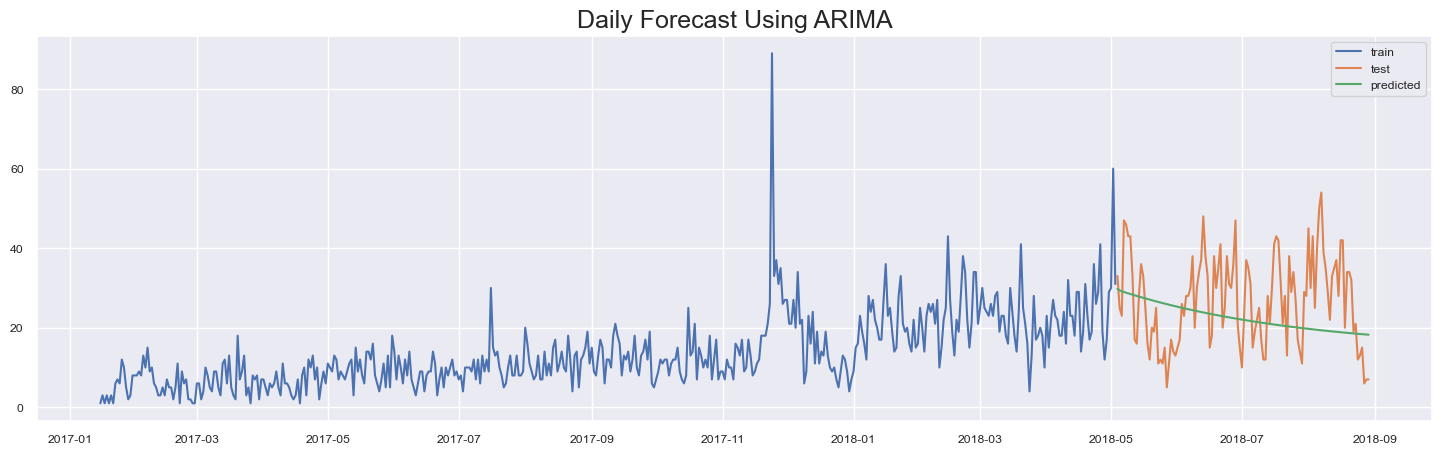

In [196]:
plt.figure(figsize=(18,5))
plt.plot(daily_train['Date'],daily_train['quantity'],label='train')
plt.plot(daily_test['Date'],daily_test['quantity'],label='test')
plt.plot(daily_test['Date'],predicted,label='predicted')
plt.legend()
plt.title("Daily Forecast Using ARIMA",fontdict={'fontsize':18})
plt.show()


### SARIMA

To see if there is a seasonal pattern we can use seasonal decompose

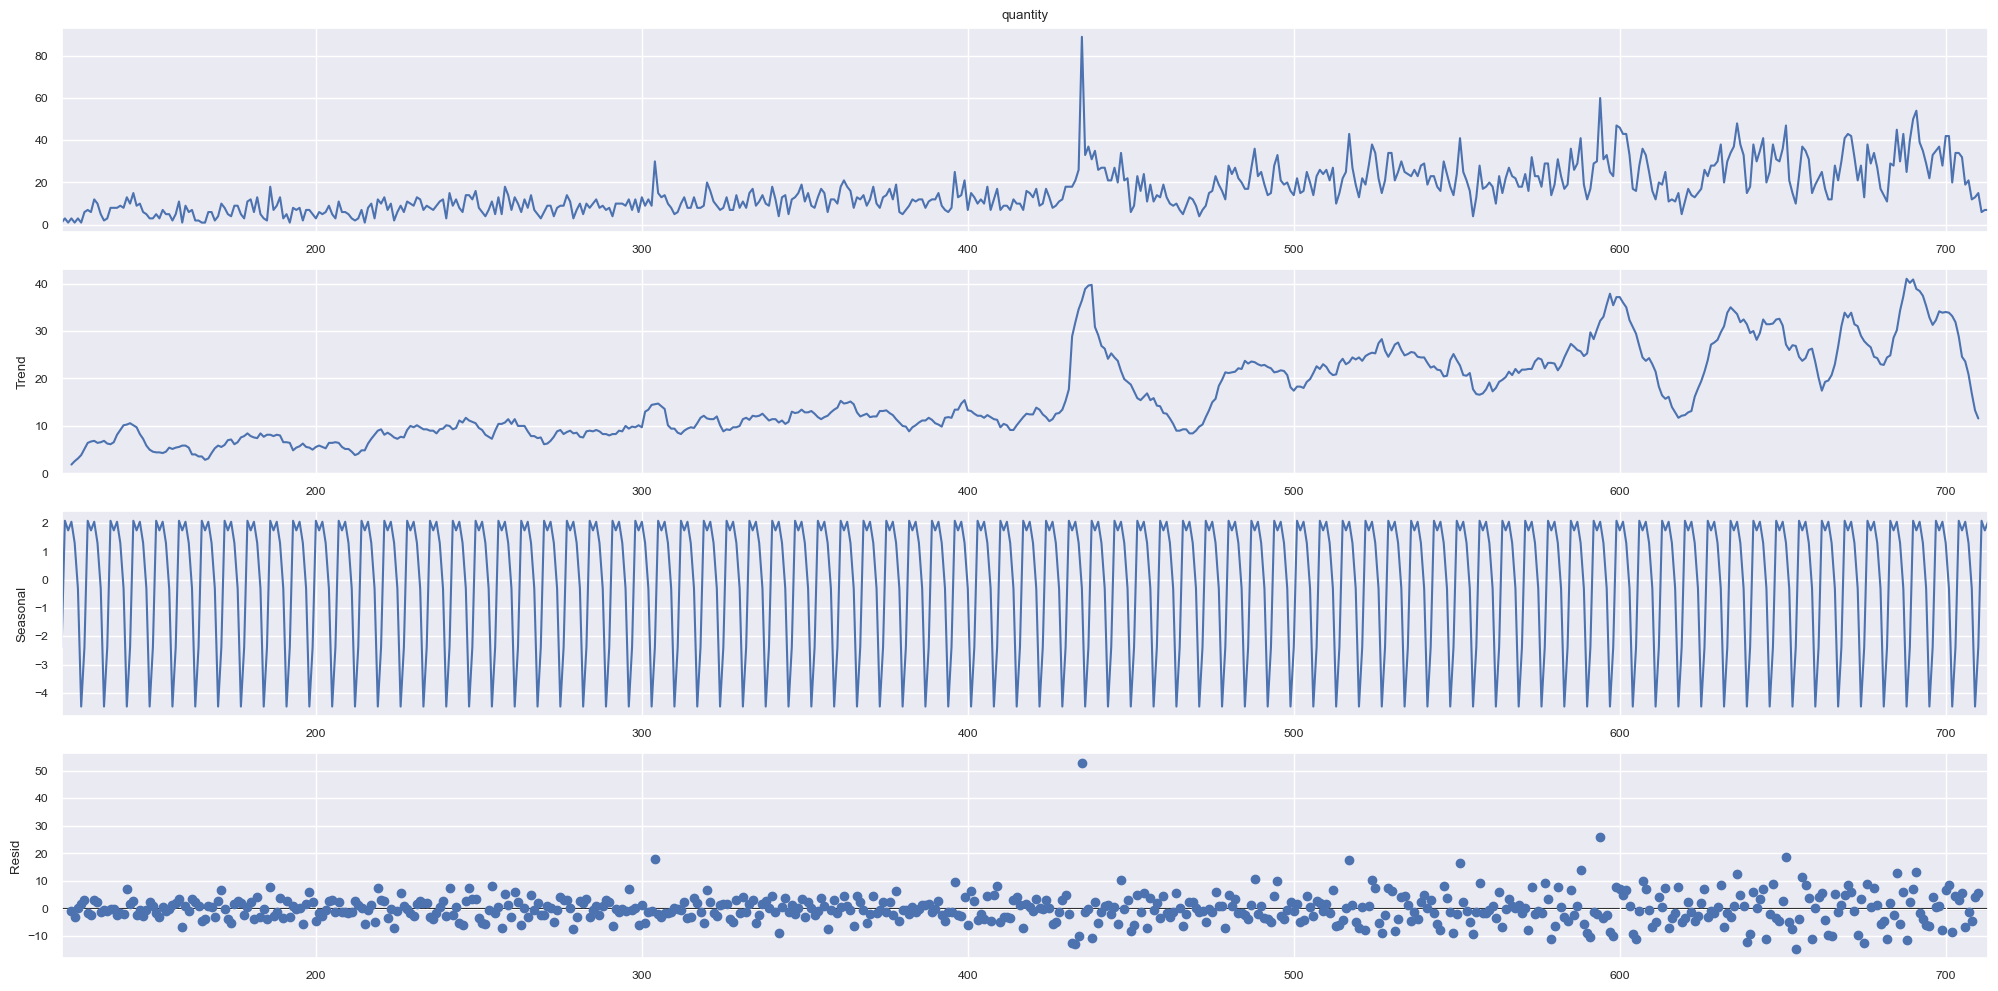

In [197]:
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams

rcParams['figure.figsize'] = 20, 10

series = df_orders_daily['quantity']
result = seasonal_decompose(series, model='additive', period = 7)

result.plot()
plt.show()

Based on the EDA and visualization, we've identified a clear pattern of seasonality occurring on a weekly basis. The sales quantity/sales spike every week. As also mentioned in the EDA, the highest amount of sales volume occurs between Monday to Wednesday. This is why we have defined the seasonality as weekly, with m set as 7 to capture this pattern.

In [198]:
# Sarima

arima_model = auto_arima(
    daily_train['quantity'],
     start_p=0,
     strt_q=0,
     max_p=5,
     max_q=5,
     m=7,
     d=None,
     test='adf',
     seasonal = True,
     trace=True,
     stepwise=True
     )

Performing stepwise search to minimize aic
 ARIMA(0,0,2)(1,0,1)[7] intercept   : AIC=3107.763, Time=0.63 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=3442.104, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=3142.287, Time=0.12 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=3222.288, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=3998.712, Time=0.01 sec
 ARIMA(0,0,2)(0,0,1)[7] intercept   : AIC=3178.434, Time=0.19 sec
 ARIMA(0,0,2)(1,0,0)[7] intercept   : AIC=3155.672, Time=0.25 sec
 ARIMA(0,0,2)(2,0,1)[7] intercept   : AIC=3121.433, Time=0.94 sec
 ARIMA(0,0,2)(1,0,2)[7] intercept   : AIC=3117.273, Time=1.34 sec
 ARIMA(0,0,2)(0,0,0)[7] intercept   : AIC=3227.541, Time=0.11 sec
 ARIMA(0,0,2)(0,0,2)[7] intercept   : AIC=3165.503, Time=0.36 sec
 ARIMA(0,0,2)(2,0,0)[7] intercept   : AIC=3144.809, Time=0.55 sec
 ARIMA(0,0,2)(2,0,2)[7] intercept   : AIC=inf, Time=1.26 sec
 ARIMA(0,0,1)(1,0,1)[7] intercept   : AIC=3132.936, Time=0.53 sec
 ARIMA(1,0,2)(1,0,1)[7] intercept   : 

In [199]:
predicted = arima_model.predict(len(daily_test))
print(f"MAE : {mean_absolute_error(daily_test['quantity'],predicted)}")
print(f"MAPE : {round(mean_absolute_percentage_error(daily_test['quantity'],predicted)*100)}%")

MAE : 9.675188645902658
MAPE : 44%


c:\Users\santo\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


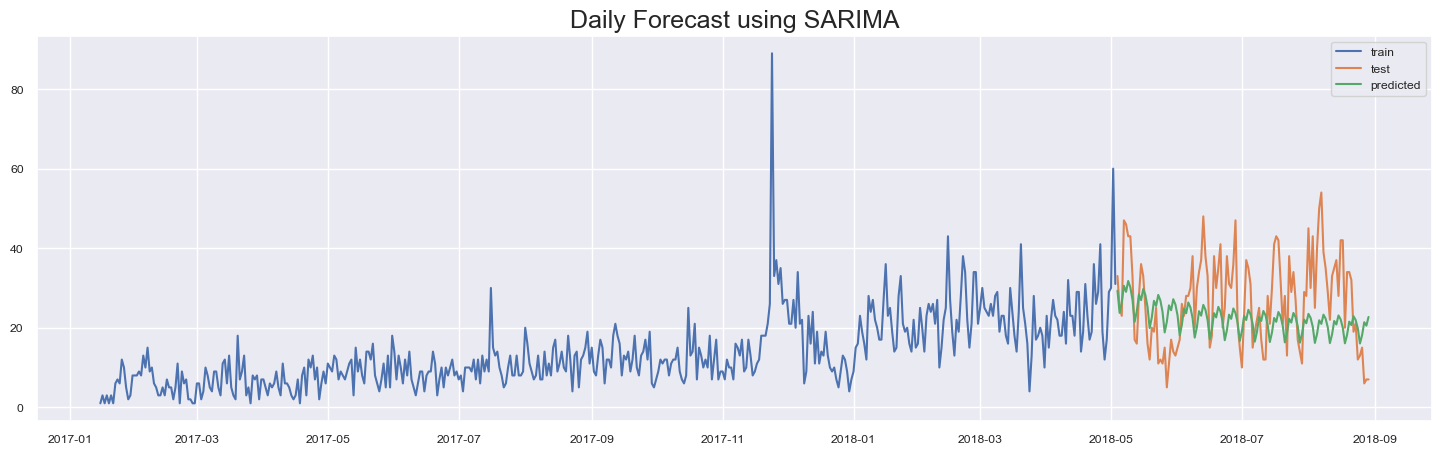

In [200]:
plt.figure(figsize=(18,5))
plt.plot(daily_train['Date'],daily_train['quantity'],label='train')
plt.plot(daily_test['Date'],daily_test['quantity'],label='test')
plt.plot(daily_test['Date'],predicted,label='predicted')
plt.legend()
plt.title("Daily Forecast using SARIMA",fontdict={'fontsize':18})
plt.show()

### SARIMAX

for SARIMAX, we will need exogenous variables. the exogenous variables used are month index, weekly index, and dayofweek. besides that we know that there is a very high spike in 2017, precisely on november 24, 2017. it seems that the date coincides with <i>Black Friday</i>. according to wikipedia black friday can occur every year in the range of 23 - 29 november.

In [201]:
daily_train['month'] = daily_train['Date'].dt.month
daily_train['week'] = daily_train['Date'].dt.week
daily_train['weekday'] = daily_train['Date'].dt.weekday
blackfriday = (daily_train['Date'] >= '23-11-2017') & (daily_train['Date'] <= '29-11-2017')
daily_train['black_friday'] = np.where(blackfriday,1,0)

daily_test['month'] = daily_test['Date'].dt.month
daily_test['week'] = daily_test['Date'].dt.week
daily_test['weekday'] = daily_test['Date'].dt.weekday
blackfriday = (daily_test['Date'] >= '23-11-2017') & (daily_test['Date'] <= '29-11-2017')
daily_test['black_friday'] = np.where(blackfriday,1,0)



C:\Users\santo\AppData\Local\Temp\ipykernel_26988\3042272815.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  daily_train['week'] = daily_train['Date'].dt.week
C:\Users\santo\AppData\Local\Temp\ipykernel_26988\3042272815.py:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  blackfriday = (daily_train['Date'] >= '23-11-2017') & (daily_train['Date'] <= '29-11-2017')
C:\Users\santo\AppData\Local\Temp\ipykernel_26988\3042272815.py:8: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  daily_test['week'] = daily_test['Date'].dt.week
C:\Users\santo\AppData\Local\Temp\ipykernel_26988\3042272815.py:10: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specifi

In [202]:
# Sarimax

arima_model = auto_arima(
    daily_train['quantity'], exogenous = daily_train[['month','week','weekday','black_friday']],
     start_p=0,
     strt_q=0,
     max_p=5,
     max_q=5,
     m=7,
     d=None,
     test='adf',
     seasonal = True,
     trace=True,
     stepwise=True
     )

Performing stepwise search to minimize aic
 ARIMA(0,0,2)(1,0,1)[7] intercept   : AIC=3107.763, Time=0.62 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=3442.104, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=3142.287, Time=0.12 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=3222.288, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=3998.712, Time=0.01 sec
 ARIMA(0,0,2)(0,0,1)[7] intercept   : AIC=3178.434, Time=0.18 sec
 ARIMA(0,0,2)(1,0,0)[7] intercept   : AIC=3155.672, Time=0.25 sec
 ARIMA(0,0,2)(2,0,1)[7] intercept   : AIC=3121.433, Time=0.95 sec
 ARIMA(0,0,2)(1,0,2)[7] intercept   : AIC=3117.273, Time=1.33 sec
 ARIMA(0,0,2)(0,0,0)[7] intercept   : AIC=3227.541, Time=0.12 sec
 ARIMA(0,0,2)(0,0,2)[7] intercept   : AIC=3165.503, Time=0.36 sec
 ARIMA(0,0,2)(2,0,0)[7] intercept   : AIC=3144.809, Time=0.56 sec
 ARIMA(0,0,2)(2,0,2)[7] intercept   : AIC=inf, Time=1.26 sec
 ARIMA(0,0,1)(1,0,1)[7] intercept   : AIC=3132.936, Time=0.54 sec
 ARIMA(1,0,2)(1,0,1)[7] intercept   : 

In [203]:
predicted = arima_model.predict(len(daily_test), exogenous=daily_test[['month','week','weekday','black_friday']])
print(f"MAE : {mean_absolute_error(daily_test['quantity'],predicted)}")
print(f"MAPE : {round(mean_absolute_percentage_error(daily_test['quantity'],predicted)*100)}%")

MAE : 9.675188645902658
MAPE : 44%


c:\Users\santo\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


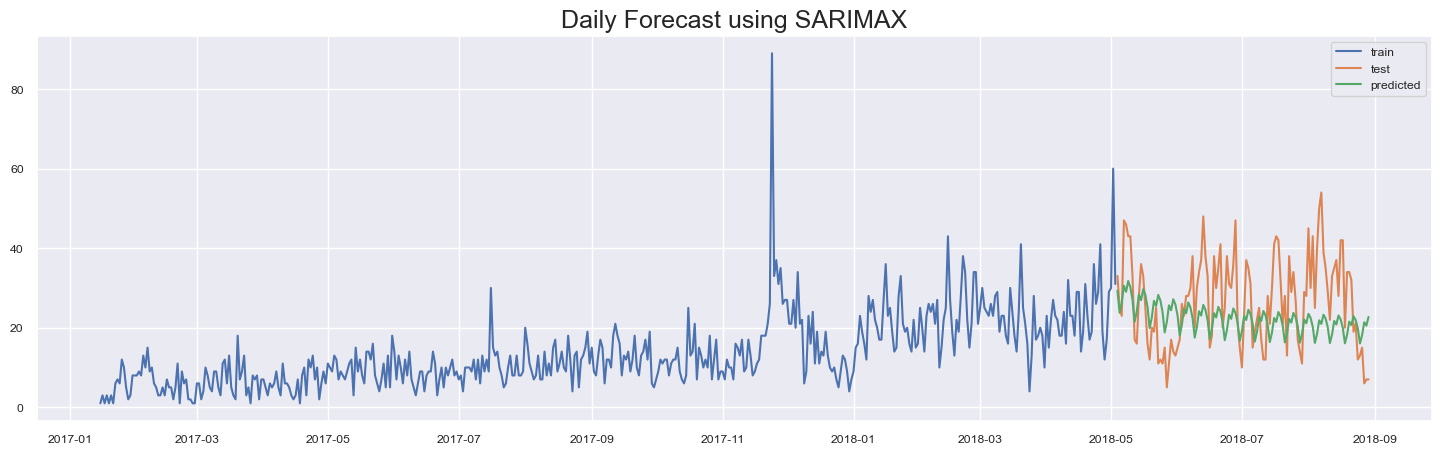

In [204]:
plt.figure(figsize=(18,5))
plt.plot(daily_train['Date'],daily_train['quantity'],label='train')
plt.plot(daily_test['Date'],daily_test['quantity'],label='test')
plt.plot(daily_test['Date'],predicted,label='predicted')
plt.legend()
plt.title("Daily Forecast using SARIMAX",fontdict={'fontsize':18})
plt.show()

From the three experiments for forecasting quantity using the ARIMA, SARIMA, and SARIMAX methods. The best model produces MAE: 9.67 and MAPE of 44%, which is the model using the SARIMA and SARIMAX methods. It seems that the addition of exogenous variables has no impact at all on the accuracy of the model. Let's repeat the three modeling approaches above with a dataset that has been transformed into weekly orders.

## Using Weekly Order Dataset

### ARIMA

In [205]:
arima_model = auto_arima(
    weekly_train['quantity'],
     start_p=0,
     strt_q=0,
     max_p=5,
     max_q=5,
     m=1,
     d=None,
     test='adf',
     seasonal = False,
     trace=True,
     stepwise=True
     )

Performing stepwise search to minimize aic
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=730.307, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=828.377, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=649.894, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=762.719, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=651.518, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=651.424, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=646.827, Time=0.07 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=646.856, Time=0.07 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=647.767, Time=0.08 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=647.885, Time=0.04 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=653.126, Time=0.04 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=0.14 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=651.663, Time=0.03 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0]          
Total fit time: 0.608 seconds


In [206]:
predicted = arima_model.predict(len(weekly_test))
print(f"MAE : {mean_absolute_error(weekly_test['quantity'],predicted)}")
print(f"MAPE : {round(mean_absolute_percentage_error(weekly_test['quantity'],predicted)*100)}%")

MAE : 51.882521610731494
MAPE : 26%


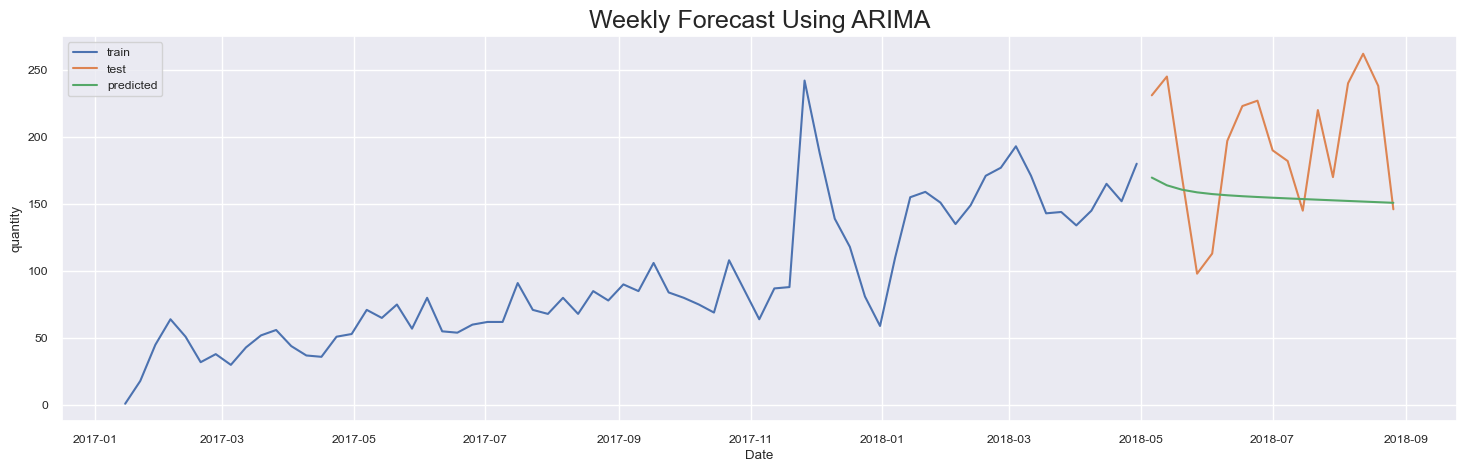

In [207]:
plt.figure(figsize=(18,5))
sns.lineplot(x=weekly_train['Date'],y=weekly_train['quantity'], legend='brief', label='train')
sns.lineplot(x=weekly_test['Date'],y=weekly_test['quantity'], legend='brief', label='test')
sns.lineplot(x=weekly_test['Date'],y=predicted, legend='brief', label='predicted')
plt.title("Weekly Forecast Using ARIMA",fontdict={'fontsize':18})
plt.show()

### SARIMA

We've tried to use seasonal decompose to see the weekly seasonal trend, however...

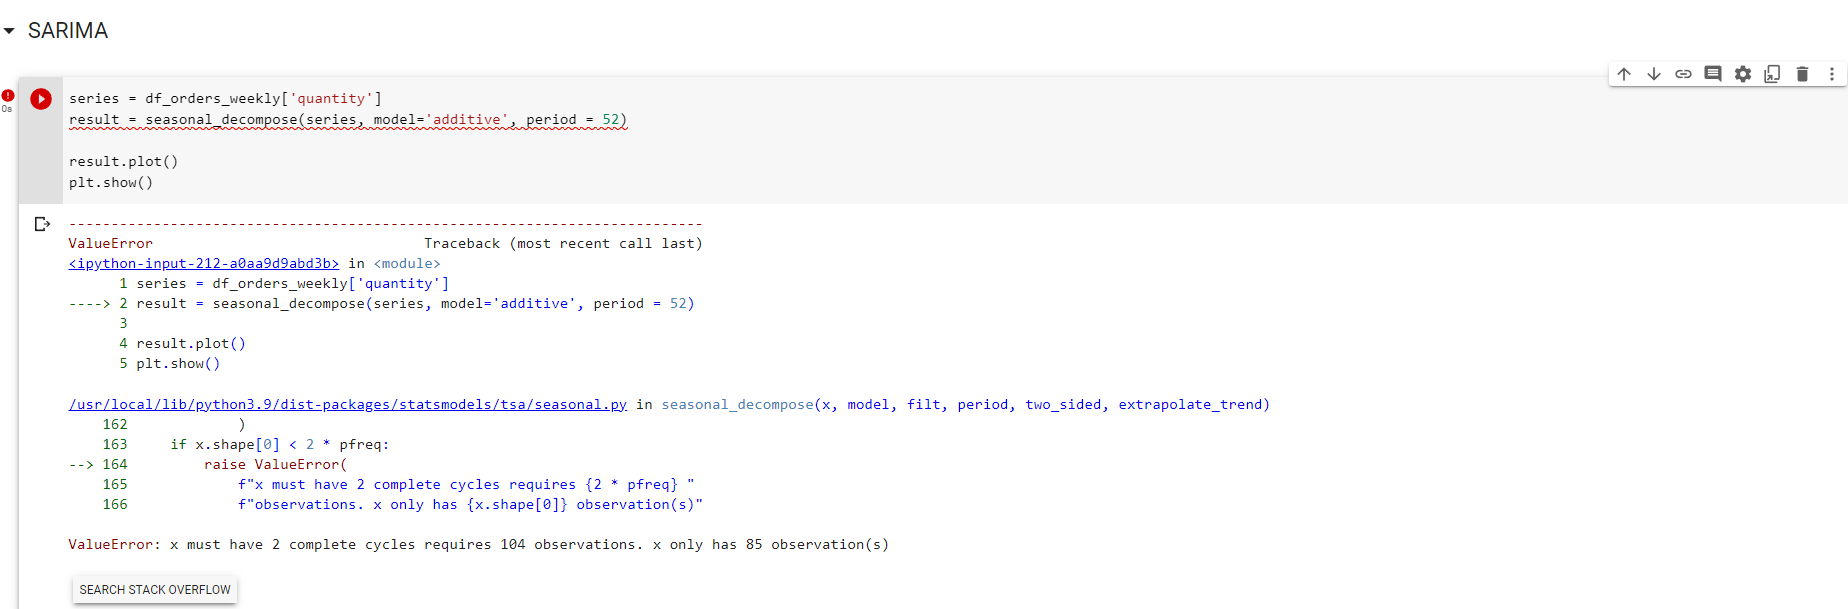

The error above shows that we don't have adequate data to see the weekly seasonal trend in a year. We will then proceed to minimize the periods to 4, which indicates number of week in a month.

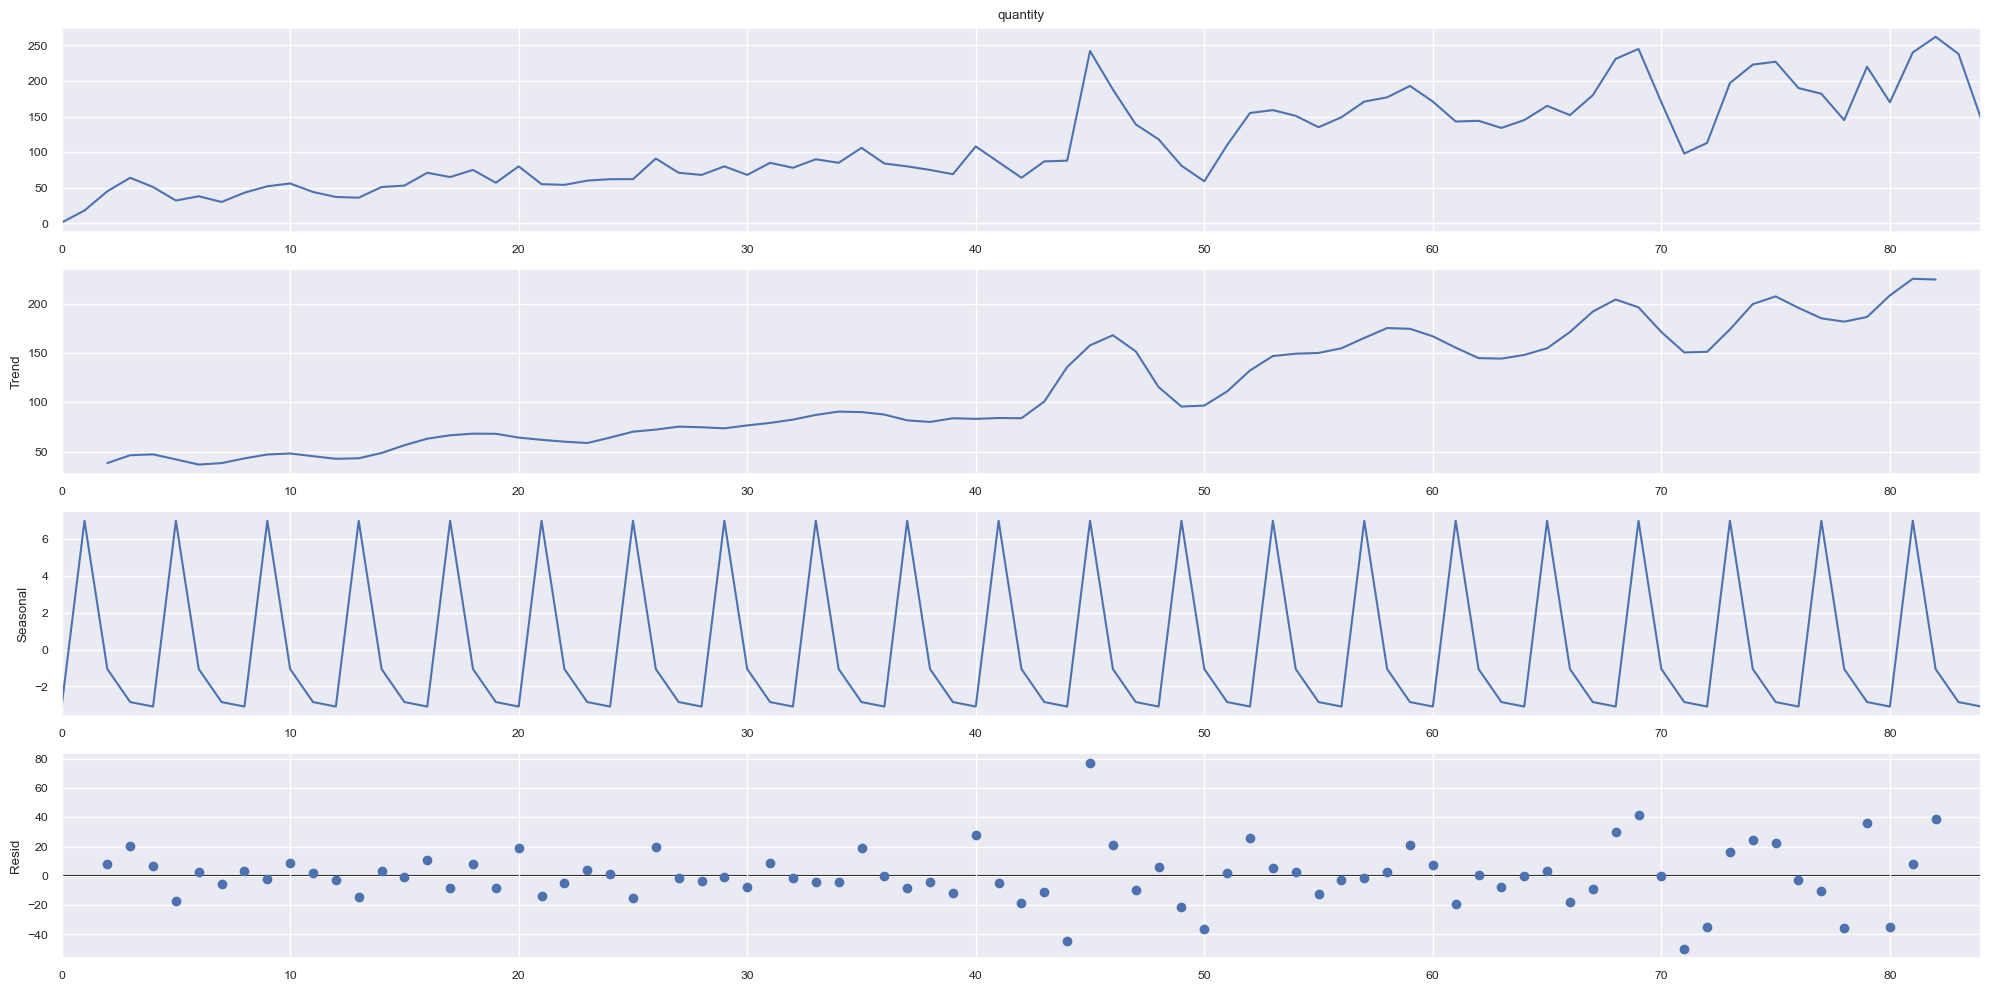

In [208]:
series = df_orders_weekly['quantity']
result = seasonal_decompose(series, model='additive', period = 4)

result.plot()
plt.show()

Based on the visualization, we can observe a recurring pattern every week, specifically spiking in quantity/sales between Monday to Wednesday. Therefore, we define the seasonality as weekly, with a period of 52 weeks, corresponding to one year of data.

In [209]:
# Sarima

arima_model = auto_arima(
    weekly_train['quantity'],
     start_p=0,
     strt_q=0,
     max_p=5,
     max_q=5,
     m=52,
     d=1,
     test='adf',
     seasonal = True,
     trace=True,
     stepwise=True
     )

Performing stepwise search to minimize aic
 ARIMA(0,1,2)(1,0,1)[52] intercept   : AIC=inf, Time=1.00 sec
 ARIMA(0,1,0)(0,0,0)[52] intercept   : AIC=637.841, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[52] intercept   : AIC=inf, Time=0.66 sec
 ARIMA(0,1,1)(0,0,1)[52] intercept   : AIC=inf, Time=0.60 sec
 ARIMA(0,1,0)(0,0,0)[52]             : AIC=636.474, Time=0.01 sec
 ARIMA(0,1,0)(1,0,0)[52] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(0,1,0)(0,0,1)[52] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(0,1,0)(1,0,1)[52] intercept   : AIC=629.443, Time=0.63 sec
 ARIMA(0,1,0)(2,0,1)[52] intercept   : AIC=631.443, Time=4.69 sec
 ARIMA(0,1,0)(1,0,2)[52] intercept   : AIC=inf, Time=4.71 sec
 ARIMA(0,1,0)(0,0,2)[52] intercept   : AIC=inf, Time=5.48 sec
 ARIMA(0,1,0)(2,0,0)[52] intercept   : AIC=inf, Time=3.70 sec
 ARIMA(0,1,0)(2,0,2)[52] intercept   : AIC=633.443, Time=6.06 sec
 ARIMA(1,1,0)(1,0,1)[52] intercept   : AIC=inf, Time=0.79 sec
 ARIMA(0,1,1)(1,0,1)[52] intercept   : AIC=631.135, Time=0.67 sec
 AR

In [210]:
predicted = arima_model.predict(len(weekly_test))
print(f"MAE : {mean_absolute_error(weekly_test['quantity'],predicted)}")
print(f"MAPE : {round(mean_absolute_percentage_error(weekly_test['quantity'],predicted)*100)}%")

MAE : 38.612735470802455
MAPE : 25%


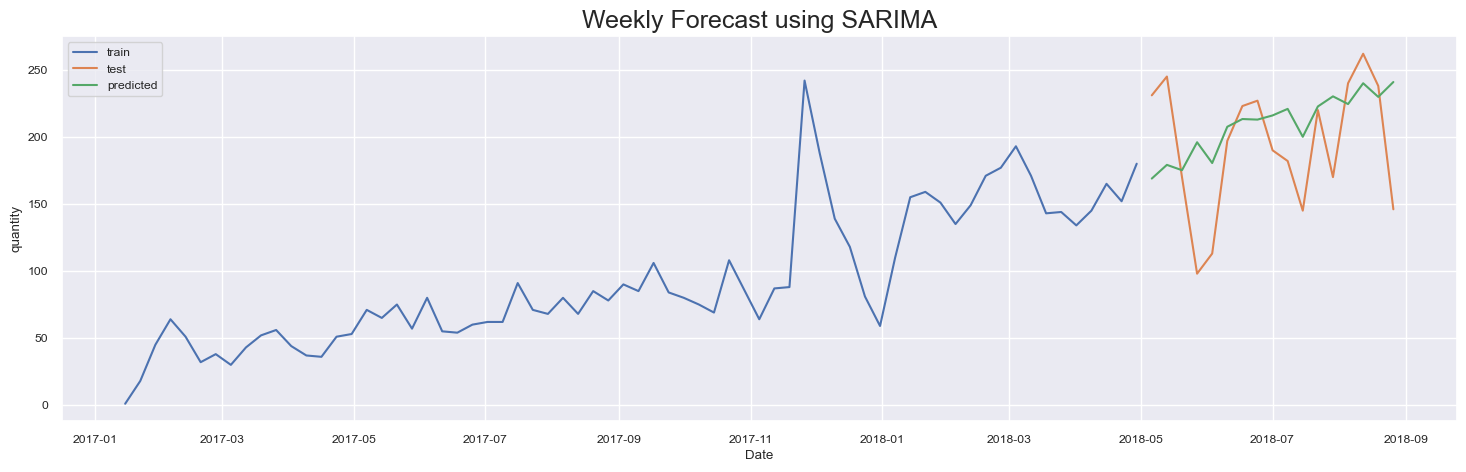

In [211]:
plt.figure(figsize=(18,5))
sns.lineplot(x=weekly_train['Date'],y=weekly_train['quantity'], legend='brief', label='train')
sns.lineplot(x=weekly_test['Date'],y=weekly_test['quantity'], legend='brief', label='test')
sns.lineplot(x=weekly_test['Date'],y=predicted, legend='brief', label='predicted')
plt.title("Weekly Forecast using SARIMA",fontdict={'fontsize':18})
plt.show()

### SARIMAX

For the SARIMAX forecast using weekly order data, we will require exogenous variables as in the previous process. However, the exogenous variables used will differ in this case. We will only use month index and weekly index as exogenous variables, as day of the week will be the same for every row. Additionally, we cannot use the variable black_friday, as there is no data available on the weekly occurrence of Black Friday.

In [212]:
weekly_train['month'] = weekly_train['Date'].dt.month
weekly_train['week'] = weekly_train['Date'].dt.week

weekly_test['month'] = weekly_test['Date'].dt.month
weekly_test['week'] = weekly_test['Date'].dt.week


C:\Users\santo\AppData\Local\Temp\ipykernel_26988\2619016358.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  weekly_train['week'] = weekly_train['Date'].dt.week
C:\Users\santo\AppData\Local\Temp\ipykernel_26988\2619016358.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  weekly_test['week'] = weekly_test['Date'].dt.week


In [213]:
# Sarimax

arima_model = auto_arima(
    weekly_train['quantity'], exogenous = weekly_train[['month','week']],
     start_p=0,
     strt_q=0,
     max_p=5,
     max_q=5,
     m=52,
     d=1,
     test='adf',
     seasonal = True,
     trace=True,
     stepwise=True
     )

Performing stepwise search to minimize aic
 ARIMA(0,1,2)(1,0,1)[52] intercept   : AIC=inf, Time=0.98 sec
 ARIMA(0,1,0)(0,0,0)[52] intercept   : AIC=637.841, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[52] intercept   : AIC=inf, Time=0.65 sec
 ARIMA(0,1,1)(0,0,1)[52] intercept   : AIC=inf, Time=0.60 sec
 ARIMA(0,1,0)(0,0,0)[52]             : AIC=636.474, Time=0.01 sec
 ARIMA(0,1,0)(1,0,0)[52] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(0,1,0)(0,0,1)[52] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(0,1,0)(1,0,1)[52] intercept   : AIC=629.443, Time=0.61 sec
 ARIMA(0,1,0)(2,0,1)[52] intercept   : AIC=631.443, Time=4.28 sec
 ARIMA(0,1,0)(1,0,2)[52] intercept   : AIC=inf, Time=5.02 sec
 ARIMA(0,1,0)(0,0,2)[52] intercept   : AIC=inf, Time=6.04 sec
 ARIMA(0,1,0)(2,0,0)[52] intercept   : AIC=inf, Time=3.96 sec
 ARIMA(0,1,0)(2,0,2)[52] intercept   : AIC=633.443, Time=6.65 sec
 ARIMA(1,1,0)(1,0,1)[52] intercept   : AIC=inf, Time=0.81 sec
 ARIMA(0,1,1)(1,0,1)[52] intercept   : AIC=631.135, Time=0.68 sec
 AR

In [214]:
predicted = arima_model.predict(len(weekly_test), exogenous=weekly_test[['month','week']])
print(f"MAE : {mean_absolute_error(weekly_test['quantity'],predicted)}")
print(f"MAPE : {round(mean_absolute_percentage_error(weekly_test['quantity'],predicted)*100)}%")

MAE : 38.612735470802455
MAPE : 25%


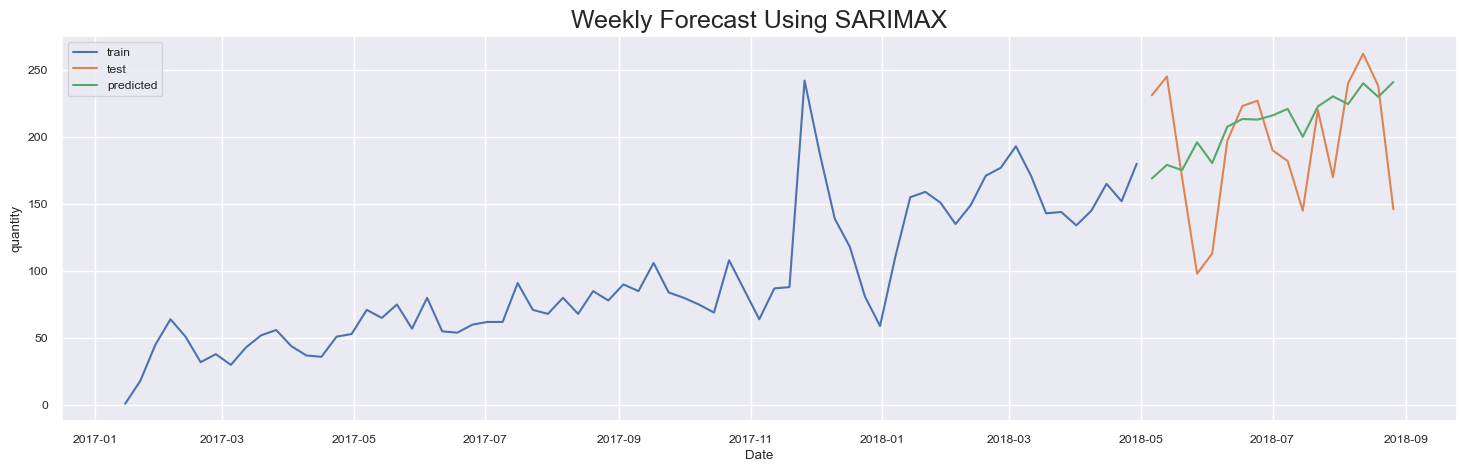

In [215]:
plt.figure(figsize=(18,5))
sns.lineplot(x=weekly_train['Date'],y=weekly_train['quantity'], legend='brief', label='train')
sns.lineplot(x=weekly_test['Date'],y=weekly_test['quantity'], legend='brief', label='test')
sns.lineplot(x=weekly_test['Date'],y=predicted, legend='brief', label='predicted')
plt.title("Weekly Forecast Using SARIMAX",fontdict={'fontsize':18})
plt.show()

Based on the results of the three experiments for weekly sales volume forecasting using ARIMA, SARIMA, and SARIMAX methods, we've come to the conclusion that the SARIMA & SARIMAX method performed best. 

This model achieved an MAE value of 38.6 and a MAPE of 25%. This indicates that the model's predictions can deviate from the actual value by around 38.6 on average.

Based on our experiments with the ARIMA, SARIMA, and SARIMAX algorithms, we can draw the following temporary conclusions:

Modeling with weekly order data yields better results than modeling with daily order data. 

- The best model using daily order data has an MAE of 9.6, which means the prediction will miss by approximately 67 if we convert the value into weekly. 
- The best model using weekly order data has an MAE of 38.6.
- Adding exogenous variables does not seem to have a significant impact on model performance.

To see if we could improve the performance we will try to develop the forecasting model through a different approach, which is using time series forecasting using regression algorithms. 

The process of developing a regression model is similar to developing a time series forecasting model. In this project, we will use both daily and weekly datasets to build benchmark models for comparison.

By doing this, we will be able to assess the performance of the models and determine which forecast period is more suitable for our analysis. 

The benchmark models will serve as a basis for evaluating the effectiveness of other machine learning algorithms that we will use to predict order quantity.

# Time Series Model with Regression Algorithms

The regression algorithms used for model performance comparison are algorithms for linear models, namely Ridge, Lasso, Elastic Net, and Linear Regression. 

The other algorithms are used for comparison only, namely Support Vector Regression, K Nearest Neighbor, Random Forest, and XGBoost. To test which algorithm is robust, we will perform cross validation with the expanding window method. 

<b>Cross Validation</b>

Cross Validation is a statistical method used to estimate the performance of machine learning models. It is a method to assess how the results of a statistical analysis will generalize to an independent data set.

<b>Expanding Window CV</b>

This method is another version of K Fold Cross validation, where the model will be tested in split diversity, the difference is that the split starts from the beginning of the dataset and every K-th fold, the proportion of split trains is added based on the previous split train. The illustration of expanding window cross validation is as follows.

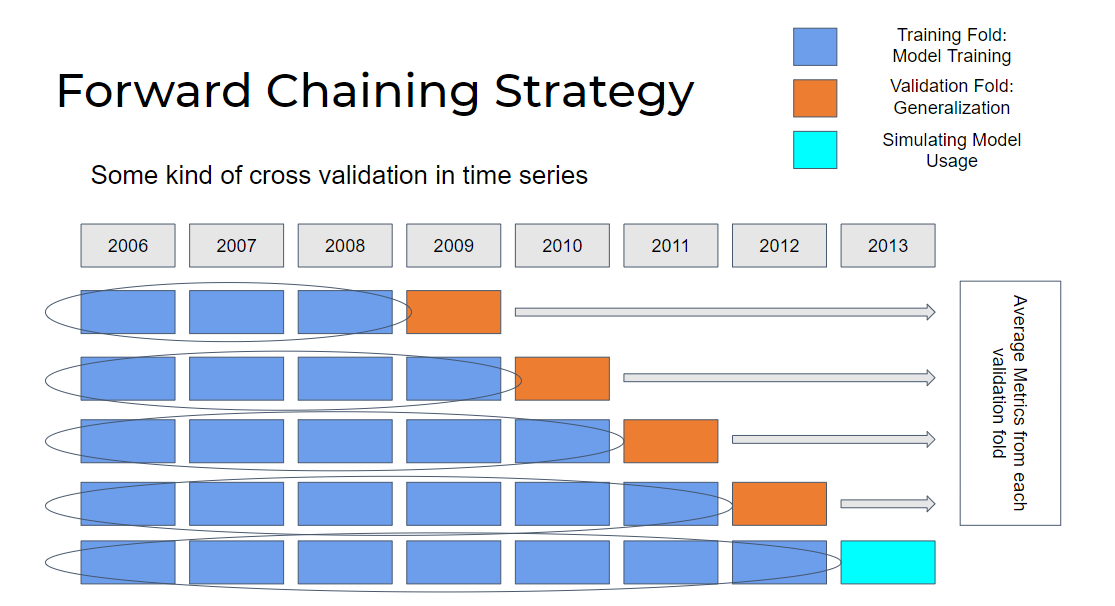

The stages of model building with this regression algorithm are the same as the stages of model building with the ARIMA, SARIMA, and SARIMAX algorithms. namely by building using daily order datasets and weekly order datasets. after that a comparison is made which model produces the most optimal MAE and MAE.

considering our main goal is to do timeseries forecasting, so we need a sequence of dates as input. so for this approach, the date variable will be reduced to day, month, and year. other supporting variables are the same as exogenous variables such as black_friday and week number.

## Using Daily Orders

In [216]:
daily_train

quantity       Date  month  week  weekday  black_friday
122       1.0 2017-01-15      1     2        6             0
123       3.0 2017-01-16      1     3        0             0
124       1.0 2017-01-17      1     3        1             0
125       3.0 2017-01-18      1     3        2             0
126       1.0 2017-01-19      1     3        3             0
..        ...        ...    ...   ...      ...           ...
591      17.0 2018-04-29      4    17        6             0
592      29.0 2018-04-30      4    18        0             0
593      30.0 2018-05-01      5    18        1             0
594      60.0 2018-05-02      5    18        2             0
595      31.0 2018-05-03      5    18        3             0

[474 rows x 6 columns]

In [217]:
# Get Week of month
# Define a function to get the week number of a date
def get_week_num(date):
    year = date.year
    month = date.month
    day = date.day
    cal = calendar.monthcalendar(year, month)
    week_num = 0
    for week in cal:
        if day in week:
            week_num = cal.index(week) + 1
            break
    return week_num

In [218]:
daily_train['week_of_month'] = daily_train['Date'].apply(get_week_num)
daily_train['year'] = daily_train['Date'].dt.year

daily_test['week_of_month'] = daily_test['Date'].apply(get_week_num)
daily_test['year'] = daily_test['Date'].dt.year

In [219]:
X_daily_train = daily_train[['month','weekday','black_friday','week_of_month','year']]
y_daily_train = daily_train[['quantity']]

In [220]:
X_daily_test = daily_test[['month','weekday','black_friday','week_of_month','year']]
y_daily_test = daily_test[['quantity']]

Should we Scale ?

Scaling ordinal variables can be a tricky task as ordinal variables have a natural ordering to them. Unlike interval or ratio variables, ordinal variables don't have a true zero point, and the distance between each value is not necessarily equal. Therefore, scaling ordinal variables using techniques such as standardization or normalization may not be appropriate as it could alter the ordinal relationship between the values.

For example, suppose you have an ordinal variable that represents education level, with values ranging from 1 to 5, where 1 represents "less than high school" and 5 represents "graduate degree." If you were to standardize or normalize this variable, the distances between each education level would become equal, which could alter the ordinal relationship between the values. It could also introduce an artificial zero point which is not meaningful in the context of education level.

In [221]:
ridge = Ridge()
lasso = Lasso()
elasticnet = ElasticNet()
linreg = LinearRegression()
svr = SVR()
knn = KNeighborsRegressor()
xgb = xgboost.XGBRegressor()
rf = RandomForestRegressor()

models = [ridge,lasso,elasticnet,linreg,svr,knn,xgb,rf]

# Evaluation metric
mean_mape = []
mean_mae = []

for i in models:
    tscv = TimeSeriesSplit(n_splits=5)

    estimator=Pipeline([
        ('model',i)
        ])
    model_cv=cross_val_score(estimator,X_daily_train,y_daily_train,cv=tscv)

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X_daily_train, 
        y_daily_train, 
        cv=tscv, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    mean_mae.append(model_cv_mae.mean())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X_daily_train, 
        y_daily_train, 
        cv=tscv, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    mean_mape.append(model_cv_mape.mean())

c:\Users\santo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\santo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\santo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\santo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataC

In [222]:
# Compare algorithm

df_eval = pd.DataFrame({
    'Model': ['Ridge', 'Lasso', 'Elastic Net', 'Linear Regressor','SVR','KNN', 'XGBoost Regressor', 'Random Forest'],
    'Mean_MAE': mean_mae,
    'Mean_MAPE': mean_mape,
})
df_eval.sort_values(by='Mean_MAE',ascending=False)

Model  Mean_MAE  Mean_MAPE
0              Ridge -5.621688  -0.410160
3   Linear Regressor -5.635207  -0.409543
7      Random Forest -6.021089  -0.418769
6  XGBoost Regressor -6.877518  -0.478264
1              Lasso -6.947117  -0.437002
2        Elastic Net -7.086559  -0.443510
4                SVR -7.676890  -0.444238
5                KNN -7.872405  -0.524715

From the above comparison results, it can be seen that the model performance with the lowest MAE value is using the Ridge algorithm, while when viewed from the MAPE value, the best model is using the Linear Regression algorithm. So that these two algorithms will be tested on testing data.

In [223]:
# TEST MODEL
score_mae = []
score_mape = []

# Prediksi pada test set
for i in [ridge,linreg]:

    model = Pipeline([
        ('model', i)
        ])

    model.fit(X_daily_train, y_daily_train)
    y_daily_pred = model.predict(X_daily_test)
    score_mae.append(mean_absolute_error(y_daily_test, y_daily_pred))
    score_mape.append(mean_absolute_percentage_error(y_daily_test, y_daily_pred))

test_eval = pd.DataFrame({'MAE': score_mae, 'MAPE': score_mape}, index=['Ridge','Linear Regressor'])
test_eval

MAE      MAPE
Ridge             8.867704  0.470095
Linear Regressor  8.850421  0.470881

The model using the Linear Regression ALgorithm algorithm seems to be better than the model with the Ride algorithm. According to MAPE, it can be said that the two algorithms have similar performance, because the difference is very small. We can conclude that Linear Regression is the choosen model for further comparison.

In [224]:
linreg.fit(X_daily_train,y_daily_train)
y_daily_pred = linreg.predict(X_daily_test)

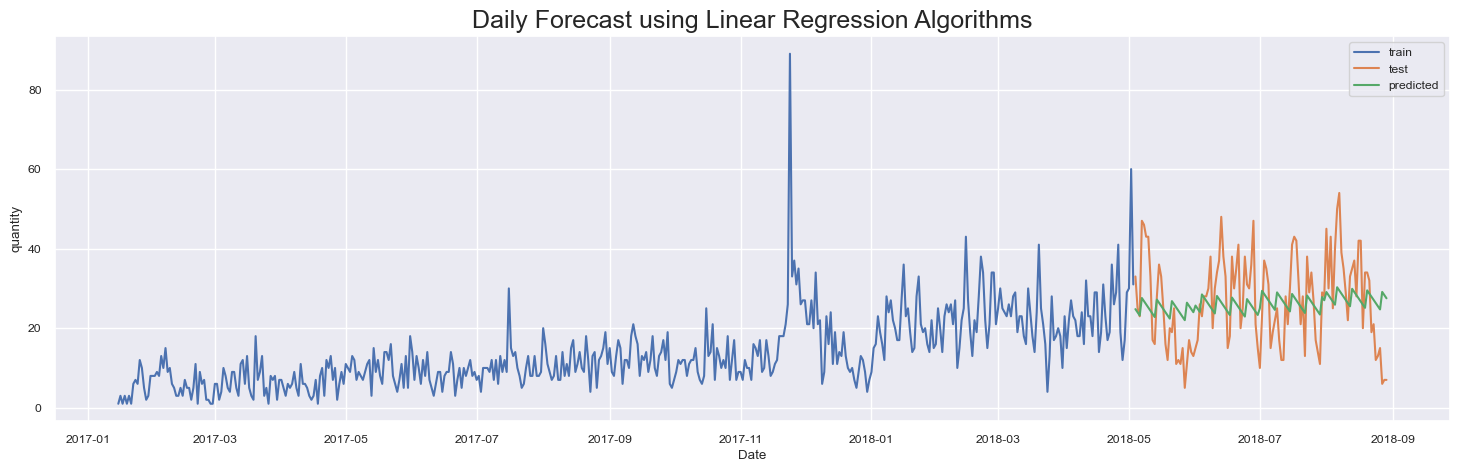

In [225]:
plt.figure(figsize=(18,5))
sns.lineplot(x=daily_train['Date'],y=daily_train['quantity'], legend='brief', label='train')
sns.lineplot(x=daily_test['Date'],y=daily_test['quantity'], legend='brief', label='test')
sns.lineplot(x=daily_test['Date'],y=y_daily_pred.reshape(-1), legend='brief', label='predicted')
plt.title('Daily Forecast using Linear Regression Algorithms',fontdict={'fontsize':18})
plt.show()

## Using Weekly Orders

In [226]:
weekly_train

Date  quantity  month  week
0  2017-01-15       1.0      1     2
1  2017-01-22      18.0      1     3
2  2017-01-29      45.0      1     4
3  2017-02-05      64.0      2     5
4  2017-02-12      51.0      2     6
..        ...       ...    ...   ...
63 2018-04-01     134.0      4    13
64 2018-04-08     145.0      4    14
65 2018-04-15     165.0      4    15
66 2018-04-22     152.0      4    16
67 2018-04-29     180.0      4    17

[68 rows x 4 columns]

Just like in daily orders, we need year and week number variables per month.

In [227]:
weekly_train['week_of_month'] = weekly_train['Date'].apply(get_week_num)
weekly_train['year'] = weekly_train['Date'].dt.year

weekly_test['week_of_month'] = weekly_test['Date'].apply(get_week_num)
weekly_test['year'] = weekly_test['Date'].dt.year

In [228]:
X_weekly_train = weekly_train[['month','week_of_month','year']]
y_weekly_train = weekly_train[['quantity']]

In [229]:
X_weekly_test = weekly_test[['month','week_of_month','year']]
y_weekly_test = weekly_test[['quantity']]

In [230]:
X_weekly_test = X_weekly_test
y_weekly_test = y_weekly_test

In [231]:
ridge = Ridge()
lasso = Lasso()
elasticnet = ElasticNet()
linreg = LinearRegression()
svr = SVR()
knn = KNeighborsRegressor()
xgb = xgboost.XGBRegressor()
rf = RandomForestRegressor()

models = [ridge,lasso,elasticnet,linreg,svr,knn,xgb,rf]

# Evaluation metric
mean_mape = []
mean_mae = []

for i in models:
    tscv = TimeSeriesSplit(n_splits=5)

    estimator=Pipeline([
        ('model',i)])
    model_cv=cross_val_score(estimator,X_weekly_train,y_weekly_train,cv=tscv)

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X_weekly_train, 
        y_weekly_train, 
        cv=tscv, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    mean_mae.append(model_cv_mae.mean())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X_weekly_train, 
        y_weekly_train, 
        cv=tscv, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    mean_mape.append(model_cv_mape.mean())

c:\Users\santo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\santo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\santo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\santo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataC

In [232]:
# Compare algorithm

df_eval = pd.DataFrame({
    'Model': ['Ridge', 'Lasso', 'Elastic Net', 'Linear Regressor','SVR','KNN', 'XGBoost Regressor', 'Random Forest'],
    'Mean_MAE': mean_mae,
    'Mean_MAPE': mean_mape,
})
df_eval.sort_values(by='Mean_MAE', ascending=False)

Model   Mean_MAE  Mean_MAPE
1              Lasso -28.751953  -0.241959
3   Linear Regressor -28.775061  -0.245902
0              Ridge -29.481459  -0.246950
7      Random Forest -35.165273  -0.320713
6  XGBoost Regressor -37.536793  -0.350528
2        Elastic Net -41.332876  -0.321185
4                SVR -48.619946  -0.395032
5                KNN -49.807273  -0.389488

From the comparison results above, it can be seen that the model performance with the lowest MAE and MAPE values is using the Lasso algorithm, followed by the Linear Regression algorithm. So that these two algorithms will be tested on testing data.

In [233]:
# TEST MODEL
score_mae = []
score_mape = []

# Test set prediction
for i in [lasso,linreg]:
    
    model = Pipeline([
        ('model', i)
        ])

    model.fit(X_weekly_train, y_weekly_train)
    y_weekly_pred = model.predict(X_weekly_test)
    score_mae.append(mean_absolute_error(y_weekly_test, y_weekly_pred))
    score_mape.append(mean_absolute_percentage_error(y_weekly_test, y_weekly_pred))

test_eval = pd.DataFrame({'MAE': score_mae, 'MAPE': score_mape}, index=['Lasso','LinReg'])
test_eval

MAE      MAPE
Lasso   41.569975  0.232503
LinReg  40.487557  0.234557

The model using the Linear Regression algorithm seems better than the model with the Lasso algorithm in terms of MAE. while in terms of MAPE it can be said that these two algorithms have the same MAPE value, because there is very little difference in the MAPE value of the two algorithms.

In [234]:
linreg.fit(X_weekly_train, y_weekly_train)
y_weekly_pred = linreg.predict(X_weekly_test)

C:\Users\santo\AppData\Local\Temp\ipykernel_26988\723494632.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sns.lineplot(x=weekly_test['Date'],y=weekly_test['quantity'][:-1], legend='brief', label='test')


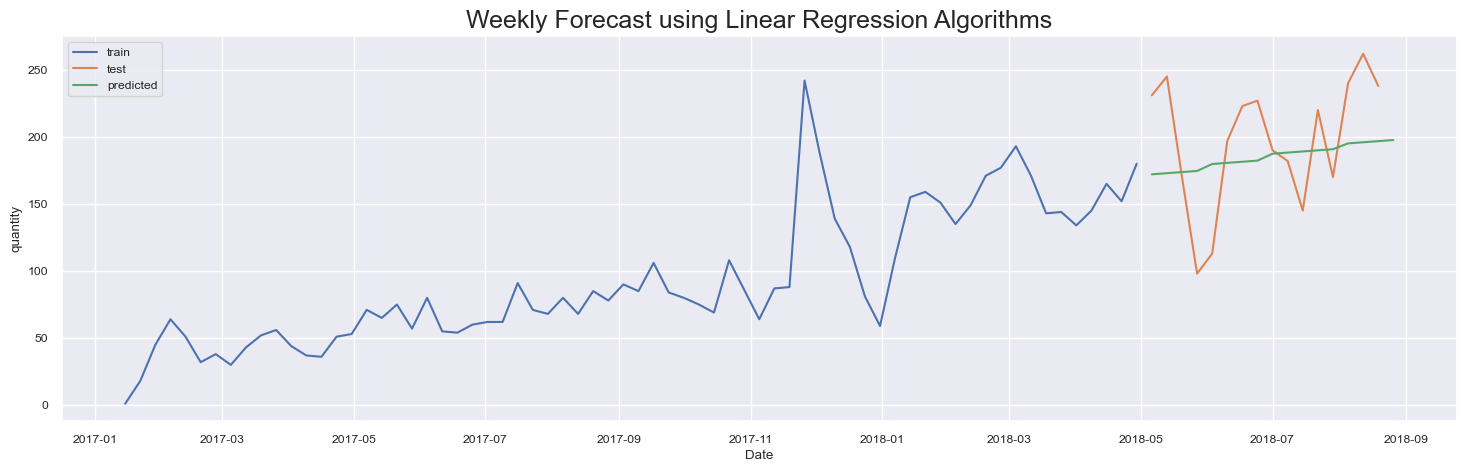

In [235]:
plt.figure(figsize=(18,5))
sns.lineplot(x=weekly_train['Date'],y=weekly_train['quantity'], legend='brief', label='train')
sns.lineplot(x=weekly_test['Date'],y=weekly_test['quantity'][:-1], legend='brief', label='test')
sns.lineplot(x=weekly_test['Date'],y=y_weekly_pred.reshape(-1), legend='brief', label='predicted')
plt.title('Weekly Forecast using Linear Regression Algorithms',fontdict={'fontsize':18})
plt.show()

The conclusions regarding the forecasting process with the regression algorithm are:
1. If we look at MAE, modeling using weekly order data is better than modeling using daily order data. This is because the best model when using daily order data has an MAE of 8.8, if we convert the value into weekly, the prediction will miss by 8.8 x 7 = 61.6. While the best model when using weekly order data has an MAE value of 40.
1. it can be interpreted that, based on the best model, the weekly quantity prediction will be off by 40 from the actual quantity.

Since we have chosen the best model which is Weekly Forecast using Linear Regression algorithm, the next step should be Hyperparameter Tuning, but unfortunately, Linear Regression Algorithm has no parameters that can be tuned.

## How Linear Regression Works ?

Linear regression analysis is used to predict the value of a variable based on the value of another variable. The variable you want to predict is called the dependent variable. The variable you are using to predict the other variable's value is called the independent variable.

This form of analysis estimates the coefficients of the linear equation, involving one or more independent variables that best predict the value of the dependent variable. Linear regression fits a straight line or surface that minimizes the discrepancies between predicted and actual output values.

Linear-regression models are relatively simple and provide an easy-to-interpret mathematical formula that can generate predictions. Linear regression can be applied to various areas in business and academic study.

You’ll find that linear regression is used in everything from biological, behavioral, environmental and social sciences to business. Linear-regression models have become a proven way to scientifically and reliably predict the future. Because linear regression is a long-established statistical procedure, the properties of linear-regression models are well understood and can be trained very quickly.

Business and organizational leaders can make better decisions by using linear regression techniques. Organizations collect masses of data, and linear regression helps them use that data to better manage reality — instead of relying on experience and intuition. You can take large amounts of raw data and transform it into actionable information.

You can also use linear regression to provide better insights by uncovering patterns and relationships that your business colleagues might have previously seen and thought they already understood. For example, performing an analysis of sales and purchase data can help you uncover specific purchasing patterns on particular days or at certain times. Insights gathered from regression analysis can help business leaders anticipate times when their company’s products will be in high demand.

# Conclusion & Recomendation

## **Model Conclusion**

Based on our conducted experiments using ARIMA, SARIMA, SARIMAX, and also using various regression algorithms, the best performing model is the weekly forecast using SARIMA or SARIMAX, with the following details:

- MAE : 38.6
- MAPE : 25%

Overall the model performed with acceptable accuracy as a baseline model, considering the business context and the condition of the available dataset. 

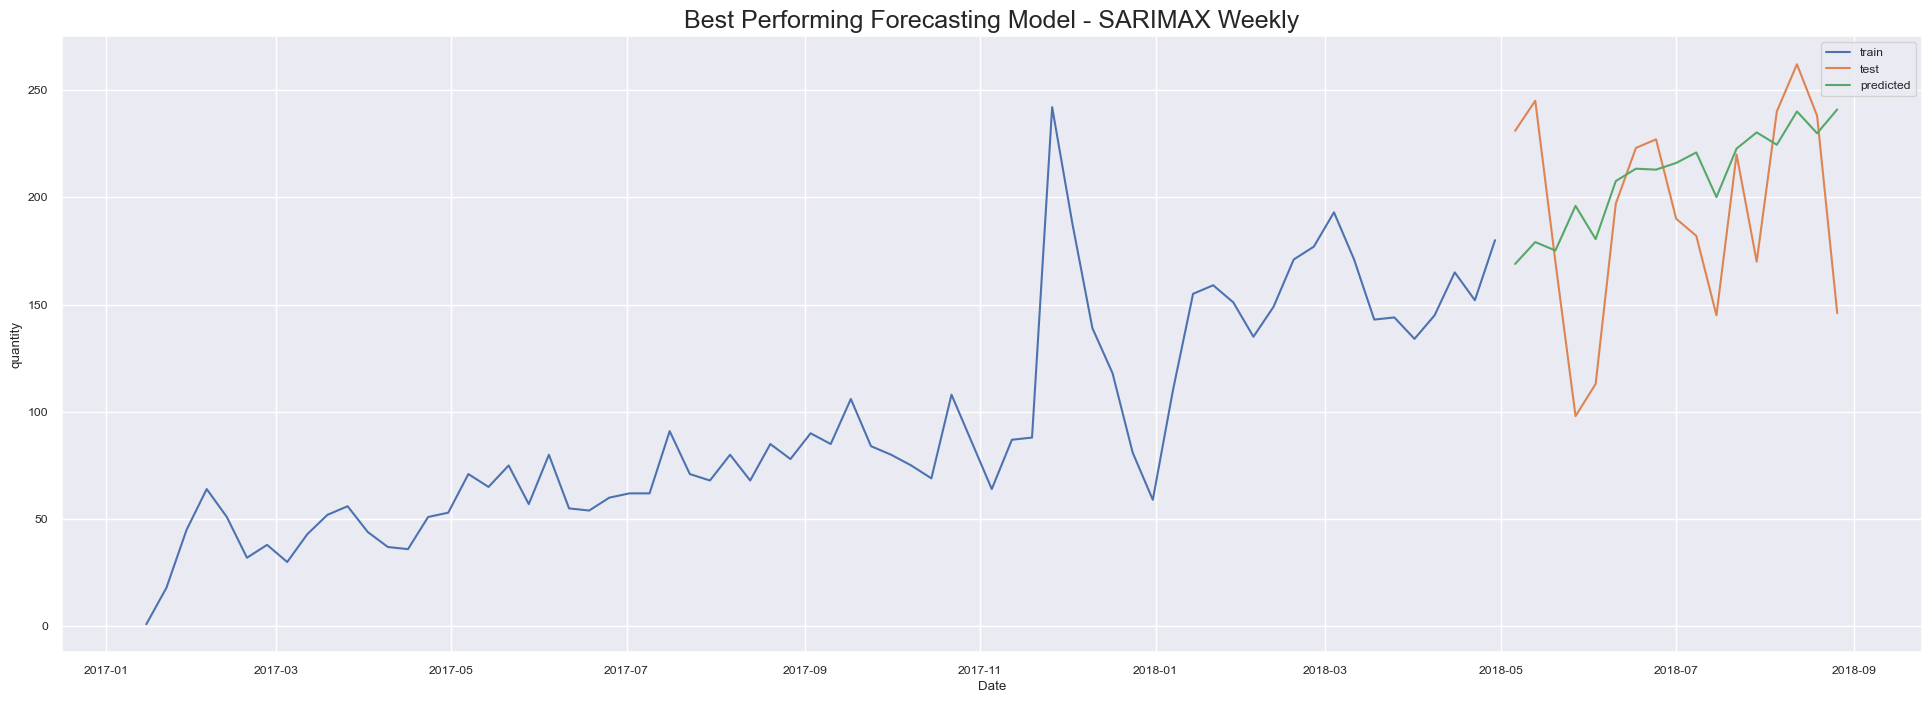

In [236]:
plt.figure(figsize=(24,8))
sns.lineplot(x=weekly_train['Date'],y=weekly_train['quantity'], legend='brief', label='train')
sns.lineplot(x=weekly_test['Date'],y=weekly_test['quantity'], legend='brief', label='test')
sns.lineplot(x=weekly_test['Date'],y=predicted, legend='brief', label='predicted')
plt.title("Best Performing Forecasting Model - SARIMAX Weekly",fontdict={'fontsize':18})
plt.show()





</br>

#### **Limitations**

From the modelling and the EDA we have discovered some limitations:

- Even though the dataset is said to encompass 2016 - 2018, it turns out the only usable data are 2017 and partially 2018.

- One of the biggest misfortunes that we've encountered is the 2018 entry does not include 2018 Black Friday, which could better provide pattern to the model.

- Although the data shows indication that it is feasible for time series forecasting, with 592 days worth of data for the model to train and test, it appears more data is required to better capture the overall pattern.

- In the sales volume line chart, there are some spikes that might be very contextual and unfortunately, even though we have adequate domain knowledge of the industry and have tried to acquire more through extensive research, there are some factors that we might have not understood well due to cultural habit of the customers. One example of this that we've managed to identify, due to its drastic spike, is Black Friday. However, there are many other cultural events related to shopping habit that we might not have identified as an exogenous variable. 

- One other external factor is the condition of Olist itself. In 2015 it was founded, in 2016 it appears it has just started to do testing, or at least in the data collection, and only in 2017 has it steadily collected data. One other issue that we noticed is the sudden increase in overall sales volume after 2018 in which we're not sure what caused it; is it because the market demand has increased or is it because Olist has more funds to push? Because during that year, Olist has received Series B Funding. 

- We initially wanted to forecast per day, however it appears the data proves to be much more complex as there are too many exogenous factors that needs to be identified and incorporated in the model and because there aren't enough entries for the model to capture the pattern on its own. Because we felt the performance was not satisfying, we decided to broaden our scope to weekly forecasting, which improved much better if compared to the former.

- We've also considered modeling a monthly forecasting however the main, and very unfortunate challenge, is the timeframe limitation in the data does not cover two complete cycles.

</br>

#### **Some good news**

However, this is not all bad news, because if we compare the MAE and the MAPE that our weekly forecast model has achieved with the challenges mentioned above, we believe it has performed quite well as a baseline model. We believe that it has potential to be improved significantly due to to the following:

- Even though daily sales volume forecast model did not perform as well as we'd hope, the weekly performance has a modest but acceptable performance.

- The weekly forecast shows not only the highest in terms of the metrics but also, based on the prediction line in plot above, it shows that the model is not oversimplified and could, to some degree, capture the complexity of the data. 

- The point above could be seen by how the prediction line goes upwards which means the model could identify the rising trend and also could somewhat capture the seasonality. This tells us that this baseline model is starting strong.  

- In terms of utility, weekly forecasts are still very much usable and still could prove to be useful in being able to have an idea of how many products to stock and when. 

- Pairing this with business context, most merchants restock their products weekly or monthly and not daily, and insights provided by this model could still greatly benefit them. 

- Combining the performance of the model with all of the information from various analysis that we have conducted, this could provide valuable insights to Olist's customers that could be used to optimize sales and efficiency.




</br>

#### **How to improve**

Some of the limitations have been mentioned above and these are the ways to address them in the future:

- Most importantly, in order to identify exogenous factors, external factors, this model needs input from someone that understands the e-commerce market and trends in Brazil.

- Better yet, this model could drastically improve if there is input from someone in Olist.

- As stated before, more data is needed for the model to capture patterns, especially for daily forecasts. As time passes and more data is collected, we are sure the model will naturally improve. 

- With more data combined with expert knowledge of the e-commerce climate in Brazil, we believe this model could have potential to highly contribute to both Olist and its merchants. 

- With more data, perhaps a monthly forecast model could be developed.

- Once the forecast model is perfected for health_beauty products, it could be replicated for other product categories as well. 


</br>

#### **Potential users of this model**

It's true this model has much room for improvement and even we, as the developers of this model, highly suggest against deploying this model until more data and more domain knowledge is collected, preferably from a key person in Olist that understands the e-commerce scene in Brazil.

However, once improved this model could be beneficial for:

- Client Relations: Considering this whole analysis and modelling is focusing on benefitting the merchants of Olist, client relation departments could use this model along with the information that we've collected to give to the merchants. With this information and model, Client / Merchant Relations could improve Olist's services to their main clientele by helping their business improve their efficiency by reducing the risk of overstocking and understocking and ultimately maximize profit. For this particular model and EDA, the client relations could focus on health and beauty merchants, until a model developed for other categories have been developed. 

- Marketing: Marketing could utilize this model to estimate growth, plan for marketing campaigns, and decide on when to have promotions. Along with the insights that we've obtained from the EDA, information regarding customer shopping habit, geolocation, and time-related insights could be used to make strategic decisions.

- Logistics Departments / Sister Companies: As of December 2020, Olist has acquired the logistics startup PAX. By knowing the sales volume, they can collaborate with Olist and make enticing promotions that is mutually beneficial for Olist, PAX, and also the merchants as well, such as one of the most attractive one of all; free delivery.


## Business Recommendations

As mentioned earlier before in this notebook, potential loss of revenue due to unconcluded transactions is equivalent to 121,111 USD throughout the 2016-2018 period. 

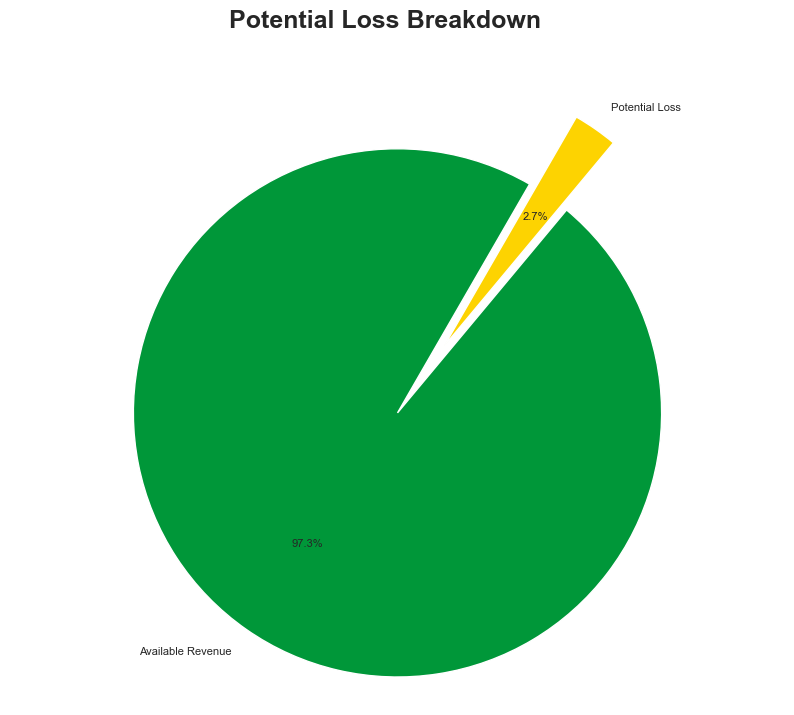

In [237]:
labels = ['Available Revenue', 'Potential Loss']
sizes = [available_revenue, potential_loss]
colors = ['#1f77b4', '#ff7f0e']

fig, ax = plt.subplots(figsize = (10,8))
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=60,
       textprops={'fontsize': 8},colors=brazil, explode=(0.00,0.31))
ax.axis('equal')
fig.suptitle('Potential Loss Breakdown',fontsize=18,fontweight="bold")

plt.show()

As can be seen from the visualization above, said potential loss is worth 2.7% of the total available revenue. 

If translated to monetary value, it's even higher.

In [238]:
print(f"Total revenue in dataframe  : {total_revenue:,}",
      f"\nAvailable revenue           : {available_revenue:,}",
      f"\nPotential loss              : {potential_loss:,}",
      f"\nPotential loss USD          : {loss_usd:,}")

Total revenue in dataframe  : 13,591,643.7 
Available revenue           : 13,221,498.11 
Potential loss              : 370,145.59 
Potential loss USD          : 121,111.64


Perhaps this number might not seem significant in the context of corporations but in the context of a business that represents mostly small to medium enterprises, that has a mission to help these merchants grow, this value is a lot and it is a problem.

Not to mention if this potential loss rate remains the same as it is right now, the monetary value that the percentage represents will also grow as rapid.

In order to help prevent this from happening, to minimize potential loss and maximize profit both for Olist and their merchants, here are some business recommendations based on the insights obtained from the EDA.

### Focus on consumer goods.

Olist is an online department store that sells virtually everything, starting from food to industrial equipments. 

Text(0.5, 1.0, 'Top 10 Overall Most Ordered Items')

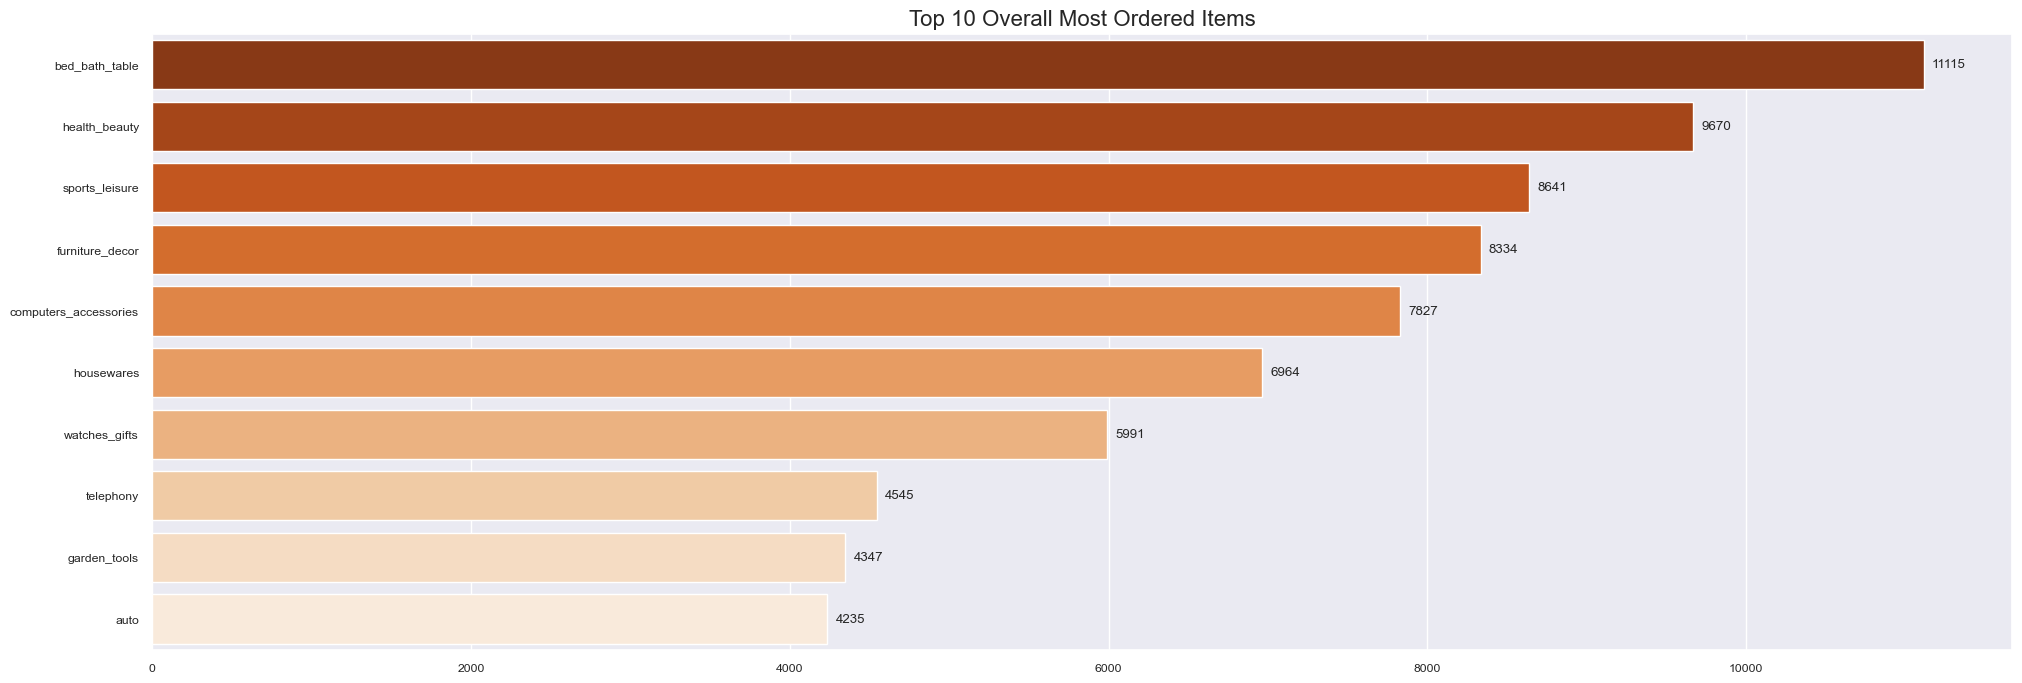

In [239]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(24, 8))

# Top
sns.set(font_scale=0.8)
ax1 = sns.countplot(data=master_df, y="product_category_name_english", palette ="Oranges_r",
                    order=master_df["product_category_name_english"].value_counts().index[:10],
                    )
ax1.set_ylabel("", labelpad=0.001)
ax1.set_xlabel("")
ax1.bar_label(ax1.containers[0], padding=6)
ax1.set_title("Top 10 Overall Most Ordered Items", fontsize=16)



Based on this finding however, their top 10 most ordered items could be categorized as consumer goods, bought by end-customers to be used in their daily lives. 

We recommend that Olist could focus on promoting these products and improve Olist's service to their merchants by also improving the services of the merchants to the end users. 

In order to avoid loss of potential revenue, Olist could emphasize the importance of item availability to the merchants that sell items falling under the top 10 most ordered items category.

In terms of promotions, now we know which items sells best, Olist could focus on promoting these items or even come up with special bundles between category, promoting partnership between its merchants, and helping them grow together. 

### The money makers. 

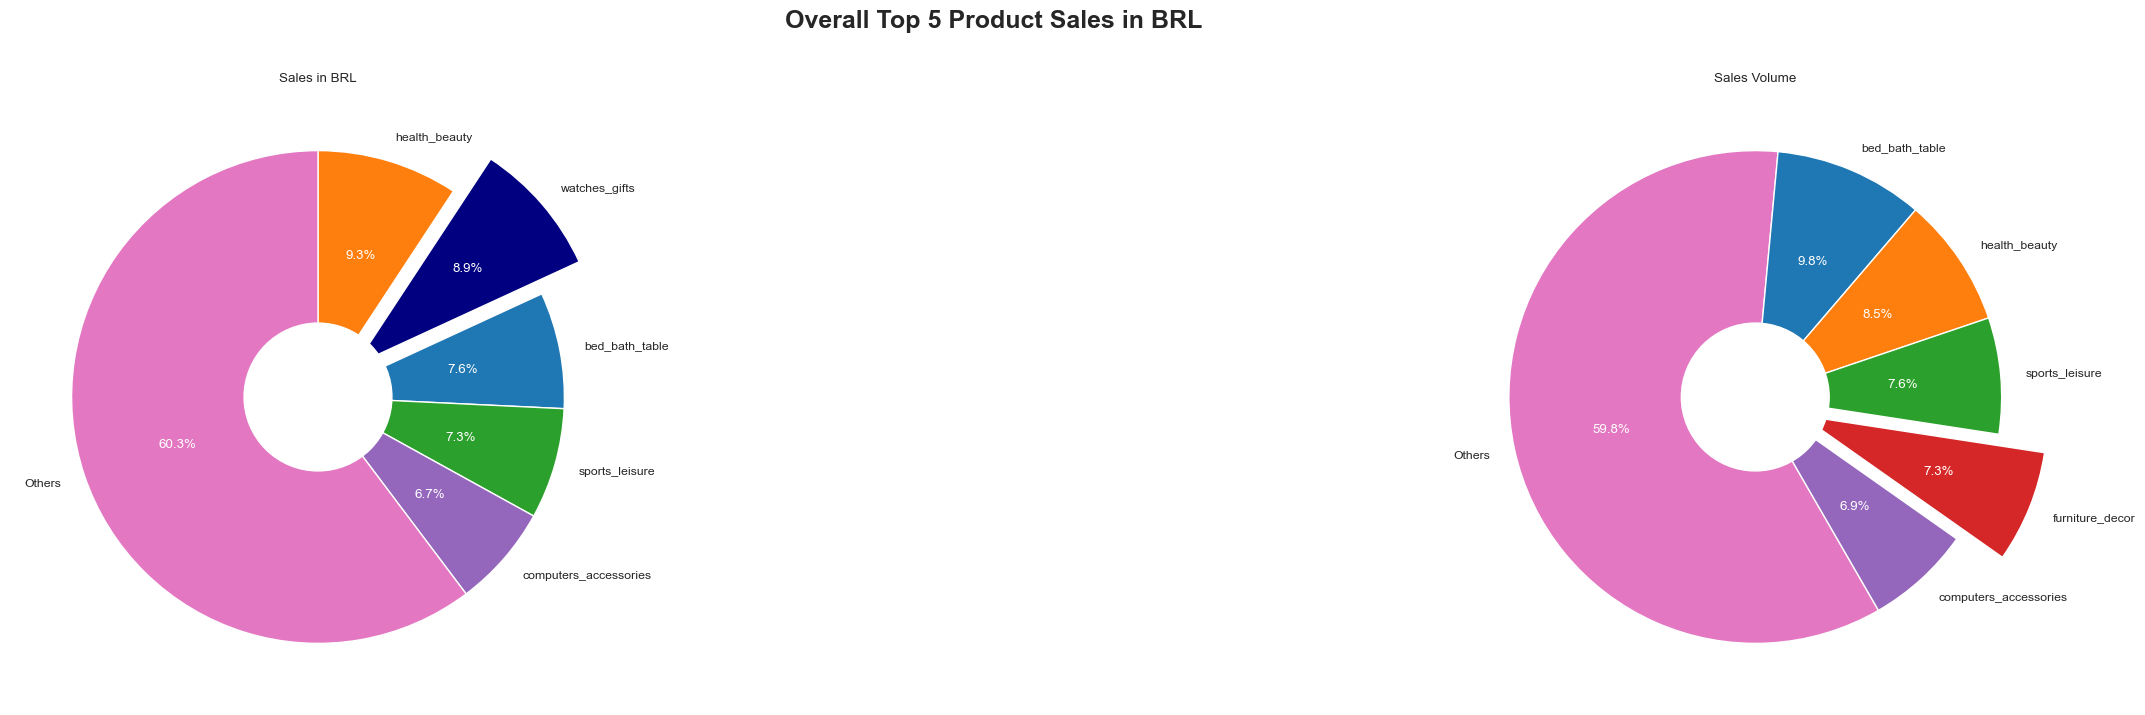

In [240]:
fig, (box1, box2) = plt.subplots (1,2, figsize = (34,8))
fig.suptitle('Overall Top 5 Product Sales in BRL',fontsize=18,fontweight="bold")



#arranging colors for emphasis on pies that matters

category_colors = {}
for i, category in enumerate(top_categories):
    if category == 'Others':
        category_colors[category] = 'grey'
    else:
        category_colors[category] = colormap(i)

category_colors['watches_gifts'] = 'navy'
    
#pie
_,_, autotexts = box1.pie(top_categories_revenue_pie['revenue'],
                         labels= top_categories_revenue_pie['product_category_name_english'],
                         autopct='%1.1f%%', startangle=90,
                         counterclock=False,
                         colors=[category_colors.get(category, colormap(len(category_colors))) for category in top_categories_revenue_pie['product_category_name_english']], #careful not to use index
                         explode=(0.00,0.20,0.00,0.00,0.00,0.00,))

for i in autotexts:
    i.set_color("white")

circle = plt.Circle((-0.0,-0.0),0.3,color="white")
box1.add_artist(circle)



_, _, autotexts = box2.pie(category_counts, labels=category_counts.index, 
                         autopct='%1.1f%%', startangle=-60,
                         counterclock=False,
                         explode=(0.00,0.00,0.00,0.00,0.20,0.00,),
                         colors=[category_colors.get(category, colormap(len(category_colors))) for category in category_counts.index])

for i in autotexts:
    i.set_color("white")

box2.add_artist(plt.Circle((0,0),0.3,color="white"))

box1.set_title('Sales in BRL')
box2.set_title('Sales Volume')

plt.show()

Not only have we identified the top 10 most ordered product categories, we have also identified the top product categories that brings in the most revenue.

From this EDA we suggest:

- Using this data not only as an indicator of market share within Olist's inventory, but also use it to categorize different characteristics of each market.

- We recommend not only focusing on products with high sales volume but also to also pay attention to the other low-volume high-revenue products, such as watches and gifts. Perhaps a different, more tailored approach, that could be appealing to those markets could be made by the marketing department to ensure they continue to recieve a constant or even increasing revenue stream from those product categories. 

- One other rather bold recommendation that we have is, if Olist doesn't have a marketing department that specifically focuses on Health and Beauty product, they should make one. Not only is Health and Beauty the category that shows significant growth between 2017 and 2018, it is also one of the most popular product category that Olist sells and is also the biggest contributor to Olist's overall revenue. 

- It may be worth considering to increase the sales volume of watches_gifts, considering it contributes a large portion of the total revenue. One product that performs well in terms of volume but not revenue is furniture and decor, perhaps marketing efforts could be less concentrated in that category and reallocated to watches and gifts.

In [241]:
top_categories_revenue_pie

product_category_name_english     revenue
43                 health_beauty  1258681.34
73                 watches_gifts  1205005.68
7                 bed_bath_table  1036988.68
67                sports_leisure   988048.97
15         computers_accessories   911954.32
0                         Others  8190964.71

If watches and gifts could increase its share by 5%, that potentially could increase the revenue of watches_gifts by 5% as well and increase Olist's overall revenue.  

In [242]:
top_categories_revenue_pie [top_categories_revenue_pie["product_category_name_english"] == 'watches_gifts']["revenue"] * 0.05

73    60250.284
Name: revenue, dtype: float64

Based on the rough calculation above, that potential 5% represents a 60,250 BRL increase. 

### Now we know where the customers are, what can we do?

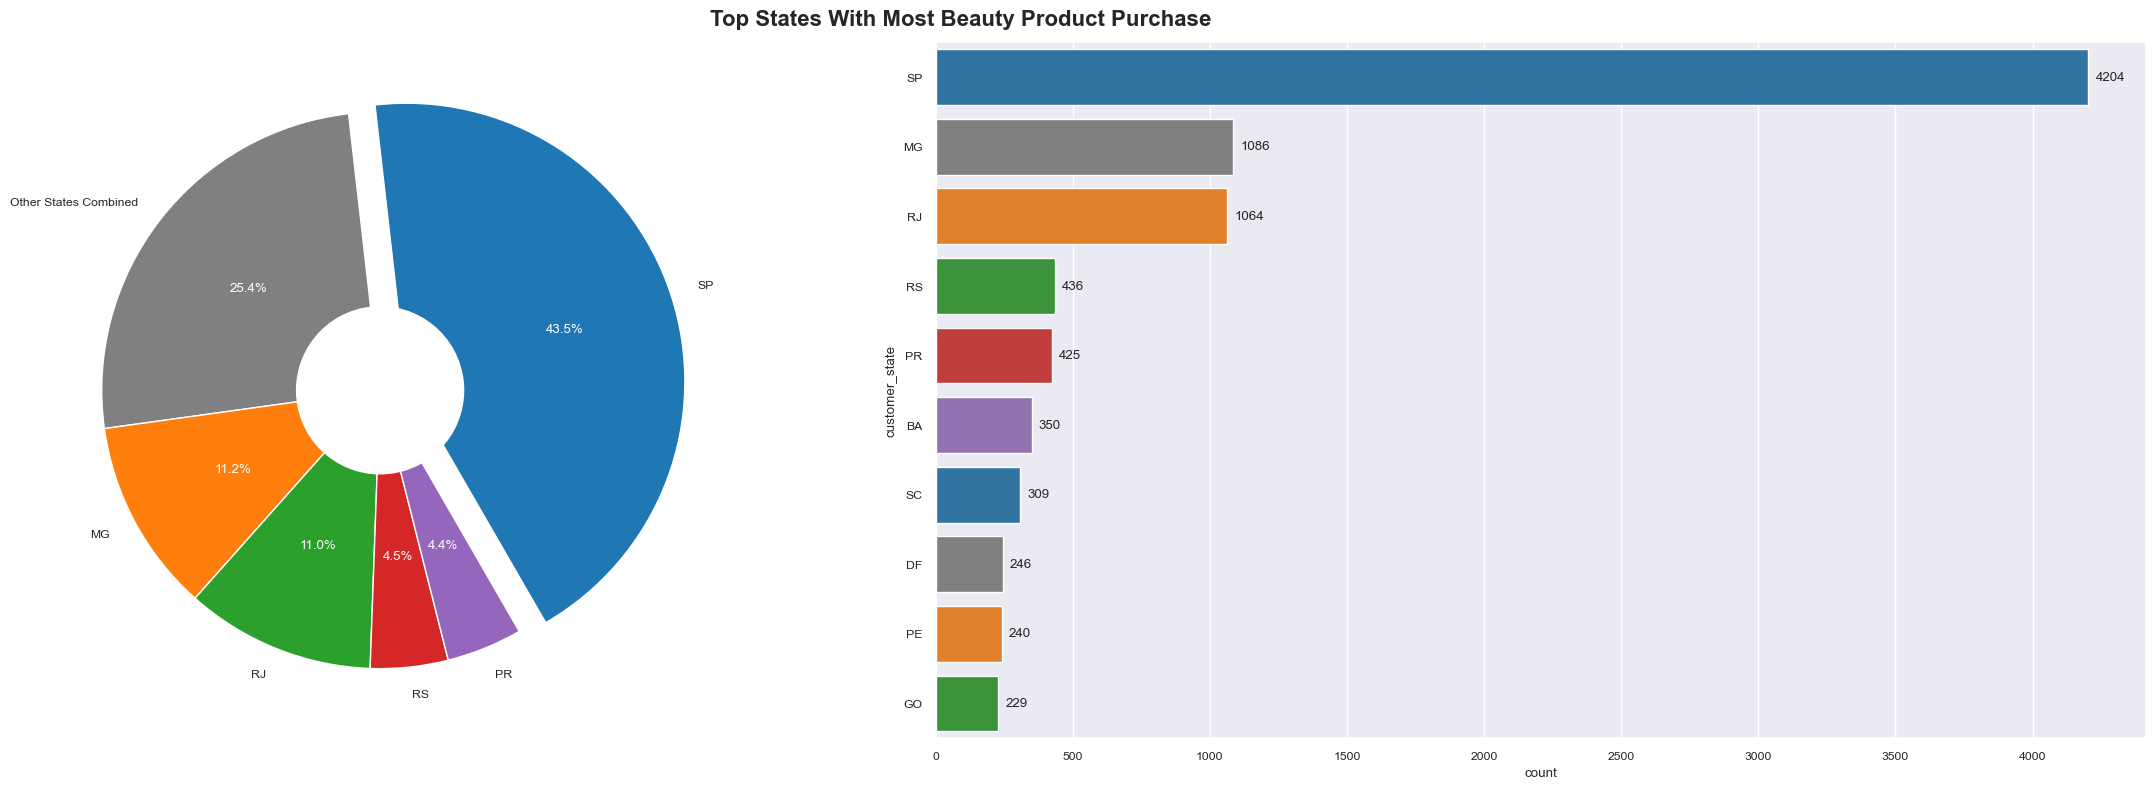

In [243]:
#pie stuff hb state
pie5_hb_state = df_hb.copy()
top_customer_states = pie5_hb_state['customer_state'].value_counts().nlargest(5).index #top 5 states
pie5_hb_state.loc[~pie5_hb_state['customer_state'].isin(top_customer_states), 'customer_state'] = 'Other States Combined' #grouping the others
top_customer_states_cat_count = pie5_hb_state['customer_state'].value_counts() #category values


colormap = plt.cm.tab10
colors_dict = {}
colors_dict = {}
colors_dict['Other States Combined'] = 'grey'
for i, category in enumerate(top_customer_states):
    colors_dict[category] = colormap(i)

#plots 
fig, (box1, box2) = plt.subplots (1,2, figsize = (24,8))
fig.suptitle('Top States With Most Beauty Product Purchase',fontsize=16,fontweight="bold")

#countplot
box2 = sns.countplot(data=df_hb, y = "customer_state", order = df_hb["customer_state"].value_counts().index[:10],
                     palette =[colors_dict.get(category, colormap(len(colors_dict))) for category in top_customer_states_cat_count.index][0:])
box2.bar_label(box2.containers[0],padding=5)

#pie
_,_, autotexts = box1.pie(top_customer_states_cat_count, labels=top_customer_states_cat_count.index, 
                         autopct='%1.1f%%', startangle=-60,
                         counterclock=True,
                         colors=[colors_dict.get(category, colormap(len(colors_dict))) for category in top_customer_states_cat_count.index],
                         explode=(0.10,0.0,0.0,0.0,0.0,0.0,))

for i in autotexts:
    i.set_color("white")
box1.add_artist(plt.Circle((0,0),0.3,color="white"))

fig.tight_layout()

The suggestion based on this EDA is for those in the marketing department, particularly those in charge of promotion, and also for the merchants.

This geographic analysis is practically a geographic segmentation. By knowing where your customers are the merchants can make impactful decisions such as:

- Moving near your main customer location / opening a branch warehouse in that area.
- Now you're closer to your customer, you have more flexibility in offering very interesting promos such as free shipping / delivery.
- [Studies](https://www.invespcro.com/blog/free-shipping/) show that 9 out of 10 consumers say that free shipping is the top incentive to shop online more. 
- Studies show, free shipping encourages customers to spend 30% more.
- Based on previous EDA, we have learned that Health and Beauty contributes most to Olist's 2016-2018 revenue.


In [244]:
SP_revenue = df_hb [df_hb["customer_state"] == 'SP']["price"] 


print (f"Total Health Beauty Revenue from Sao Paolo: {SP_revenue.sum():,} BRL",
       f"\n\nPotential additional revenue through free shipping promotions: {SP_revenue.sum()*0.3:,} BRL")

Total Health Beauty Revenue from Sao Paolo: 462,305.22 BRL 

Potential additional revenue through free shipping promotions: 138,691.566 BRL


- Sao Paolo state on its own contributes 462,305.22 BRL to Olist's 2016-2018 revenue from Health and Beauty product sales.
- With the facts stated above if health and beauty vendors could reallocate and offer free shipping to all of Sao Paolo customers, that's an increase of 30% from the current revenue, meaning there's a potential **138,691.56 BRL** additional revenue.
- Of course there is cost for free shipping but that cost should be much lower now the distance is much closer.
- Olist on the other hand, could even cover that shipping cost for the merchants as a form of their service, build their reputation, and they could also consider the expense as promotional and branding expense, which makes it cost efficient for all parties involved. 

### The Model is Okay, But How Can We Translate That to Cold Hard Cash?

There are many similar inventory solution services that provides similar utility as what we offer from our demand time series forecast model.

One example that we've found is [cogsy](https://cogsy.com/pricing/).

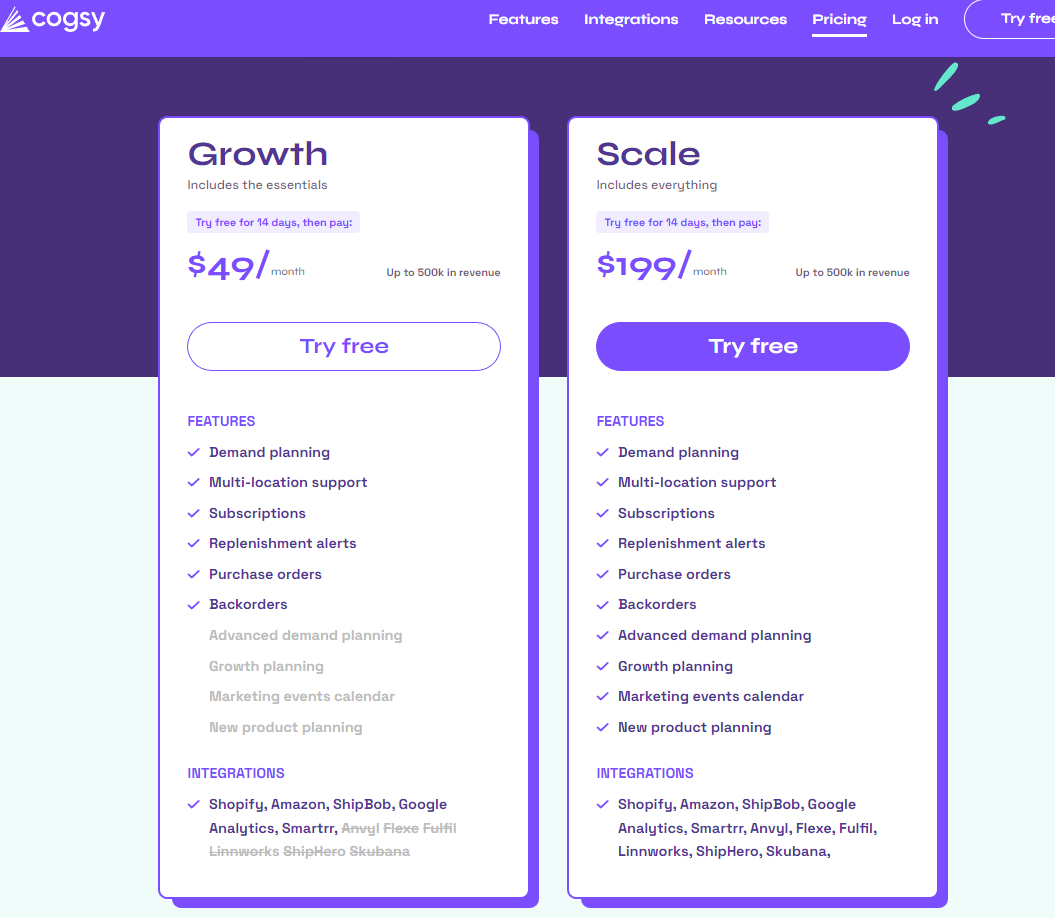

Cogsy offers services that revolves around demand planning, which is exactly the objective of the model that we're developing. Cogsy, however, charges 49 USD per account. 

Another example of a similar service is [StockTrim](https://www.stocktrim.com/), which labels themselves as a "Smart inventory forecasting software". Their main service also revolves around inventory data management and forecasting modules.  

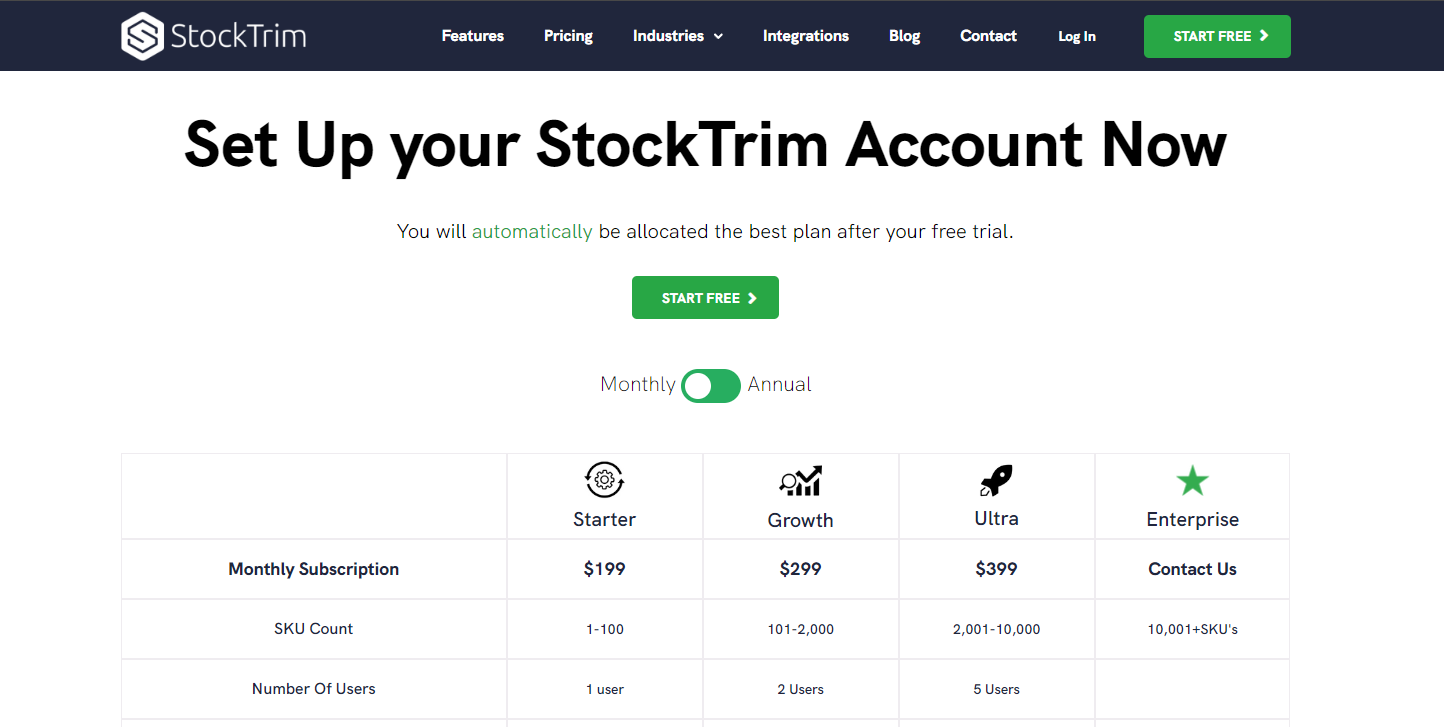

In [246]:
unique_seller_count = df_hb['seller_id'].nunique()
model_value = 49
model_value_year_customer = 49 * 12
model_value_year_total_customer = unique_seller_count * model_value_year_customer

print (f"Number of unique health & beauty merchants : {unique_seller_count}",
       f"\nModel Value Per Month                      : {model_value} USD",
       f"\nModel Value per Year Per Merchants         : {model_value_year_customer} USD",
       f"\nModel Value per Year Total Merchants       : {model_value_year_total_customer:,} USD")

Number of unique health & beauty merchants : 492 
Model Value Per Month                      : 49 USD 
Model Value per Year Per Merchants         : 588 USD 
Model Value per Year Total Merchants       : 289,296 USD


There are 492 unique health & beauty sellers that are under Olist in the 2016-2018 period. 

If we take the cheaper subscription per month from the examples, being 49 USD, and multiply it by 12 months in a year one merchant could save 588 USD per year by using the free alternative from Olist. 

</br>

In turn, if we multiply the cost for a demand forecasting service by the total amount of merchants, that means:

- Olist could could help their merchants save **289,296** USD in total, per year.
- Once developed and ready to deploy this model is worth **289,296** USD per year. 
- This value will only scale up as Olist has more merchants. 
- This number only represents a fractional amount of the total merchants under Olist, considering this number only represents health & beauty merchants.
- The facts mentioned above is ultimately evidence of Olist's commitment in prioritizing their clients, the merchants, and helping them grow by providing tools of such worth. 

# Closing Statement

That concludes our analysis and effort to solve the problem that we've identified.

We understand that there may be many, many, room for improvements, we would like to say we've tried our best under the circumstances, with the knowledge, information, and time limitations that we have, and we certainly will always continue to try and improve.

# **Thank You**